# Forest Fire Span Prediction
---

## Objectives: 
---
 This notebook aims to explore a dataset where you could apply the knn algorithm to predict something. This kind of problems are known as regression problems and some examples related to this category of problems are to predict stock prices or predict house prices based on a serie of events.
 
## The dataset:
---
 The dataset choosen was the 'Forest Fire Data Set'. The aim of the data set is to predict the burned area of forest fires. We have found the data set on http://archive.ics.uci.edu/ml/datasets/Forest+Fires and the dataset is properlly referenced in [1](#references)

| Data Set Characteristics | Number of Instances | Area     | Attribute Characteristics | Number of Attributes |Associated Tasks | Missing Values? |
|--------------------------|---------------------|----------|---------------------------|----------------------|------------------------|-----------------|
| Multivariate             | 517                 | Physical | Real                      | 13                   | Regression        | N/A

**Data set abstract:** This is a difficult regression task, where the aim is to predict the burned area of forest fires, in the northeast region of Portugal, by using meteorological and other data.

### Participants:
 * *Marco Olimpio* - marco.olimpio at gmail
 * *Rebecca Betwel* - bekbetwel at gmail
 * *Victor Hugo* - victorhugo.automacao at gmail
 
---
### Contents
1. [Introduction](#intro)
    1. [K Nearest Neighborhoods - KNN](#knn)
    2. [Feature Selection](#feature)
2. [The problem - Forest Fire Detection](#fwi)
3. [Experiments](#experiments)
    1. [Feature Selection](#featureselectionimp)
5. [Statistical Analysis](#stat)
6. [Results and comparitions](#results)
7. [Conclusion](#conclusion)
7. [References](#references)
---

<a id='intro'></a>
## 1. Introduction
---

### Forest Fire Problem

Wildfires are a constant in many countries. Problems with the enviromental impact like fauna and flora, air condition and greenhouse effect. There are not only economical problems concerned with the actions needed to extinguish this wilfires. According to the Final Report of "The Economic Effects of large Wildfires" [5](#reference), not all wildfires bring they concluded that for sme fire sizes the number of employement and wage had a increase. 
<img src="Forestfiresmap-Artboard_2.png"/>
<div style="text-align:center">Portugal and Spain Active Fires 15 - 16 October 2017. This great wildfire made 44 victims. Source: Modis By The New York Times</div>


### Structure of the FWI System and dataset

The diagram below illustrates the components of the FWI System. Calculation of the components is based on consecutive daily observations of temperature, relative humidity, wind speed, and 24-hour rainfall. The six standard components provide numeric ratings of relative potential for wildland fire.

<img src="fwi_structure.gif"/>

<br/>
<img src="park.png" weight="250px"/>
<div style="text-align:center">Mon</div>
* **Location**
    * **X** - X-axis spatial coordinate within the Montesinho park map: 1 to 9
    * **Y** - Y-axis spatial coordinate within the Montesinho park map: 2 to 9
* **Date**
    * **month** - Month of the year: "jan" to "dec"
    * **day** - Day of the week: "mon" to "sun"  
* **Fire Wheater Index - FWI**
    * **FFMC** - Fine Fuel Moisture Code The Fine Fuel Moisture Code (FFMC) is a numeric rating of the moisture content of litter and other cured fine fuels. This code is an indicator of the relative ease of ignition and the flammability of fine fuel: 18.7 to 96.20
    * **DMC** - The Duff Moisture Code (DMC) is a numeric rating of the average moisture content of loosely compacted organic layers of moderate depth. This code gives an indication of fuel consumption in moderate duff layers and medium-size woody material.: 1.1 to 291.3
    * **DC** - The Drought Code (DC) is a numeric rating of the average moisture content of deep, compact organic layers. This code is a useful indicator of seasonal drought effects on forest fuels and the amount of smoldering in deep duff layers and large logs.: 7.9 to 860.6
    * **ISI** - The Initial Spread Index (ISI) is a numeric rating of the expected rate of fire spread. It combines the effects of wind and the FFMC on rate of spread without the influence of variable quantities of fuel.: 0.0 to 56.10
    * **temp** - Temperature ºC: 2.2 to 33.30
    * **RH** - Relative Humidity in %: 15.0 to 100
    * **wind** - Wind speed inkm/h: 0.40 to 9.40
    * **rain** - Outside rain in mm/m2 : 0.0 to 6.4
* **area** - The burned area of the forest (in ha): 0.00 to 1090.84


<a id="knn"></a>
### A. K-Nearest Neighborhood - KNN
---


This is one of the simplest algorithms to Machine Learning. It is based on distance and really simple to undestand. The hypotesis behind it is that given certain amount of data the tend to be concentrated in the same region. One of the advantages of this kind of algorithm is that it could be utilized in both regression and classification problems. To understand the concept we could start the explanation with only 1-nearest neighborhood (1-NN).
The most common used metric to know how close is a certain data is the Euclidian's distance, given by:

$$ d(x_i,x_j) = \sqrt{\sum_{l = 1}^{d}{({x_i^l - x_j^l})^2}}$$
During the fit phase the algorithm 
<img src="1nn.png"/>
<div style="text-align:center">1-NN Example. Source: Facelli et al, 2011</div>


<a id='feature'></a>

### B. Feature Selection
---

The accuracy of the k-NN algorithm can be severely degraded by the presence of noisy or irrelevant features, or if the feature scales are not consistent with their importance. A popular approach is to scale features by the mutual information of the training data with the training classes.

For high-dimensional data (e.g., with number of dimensions more than 10) dimension reduction is usually performed prior to applying the k-NN algorithm in order to avoid the effects of the curse of dimensionality.

For curse of dimensionality understand that as the dimensions of a data set increases, the number of samples required for an estimator to generalize increases exponentially.

In [30]:
Victor acho que poderíamos abordar isso no trabalho
https://machinelearningmastery.com/feature-selection-machine-learning-python/
mas podemos deixar para depois que terminar, seria a cereja do bolo

SyntaxError: invalid syntax (<ipython-input-30-5df58209cc92>, line 1)

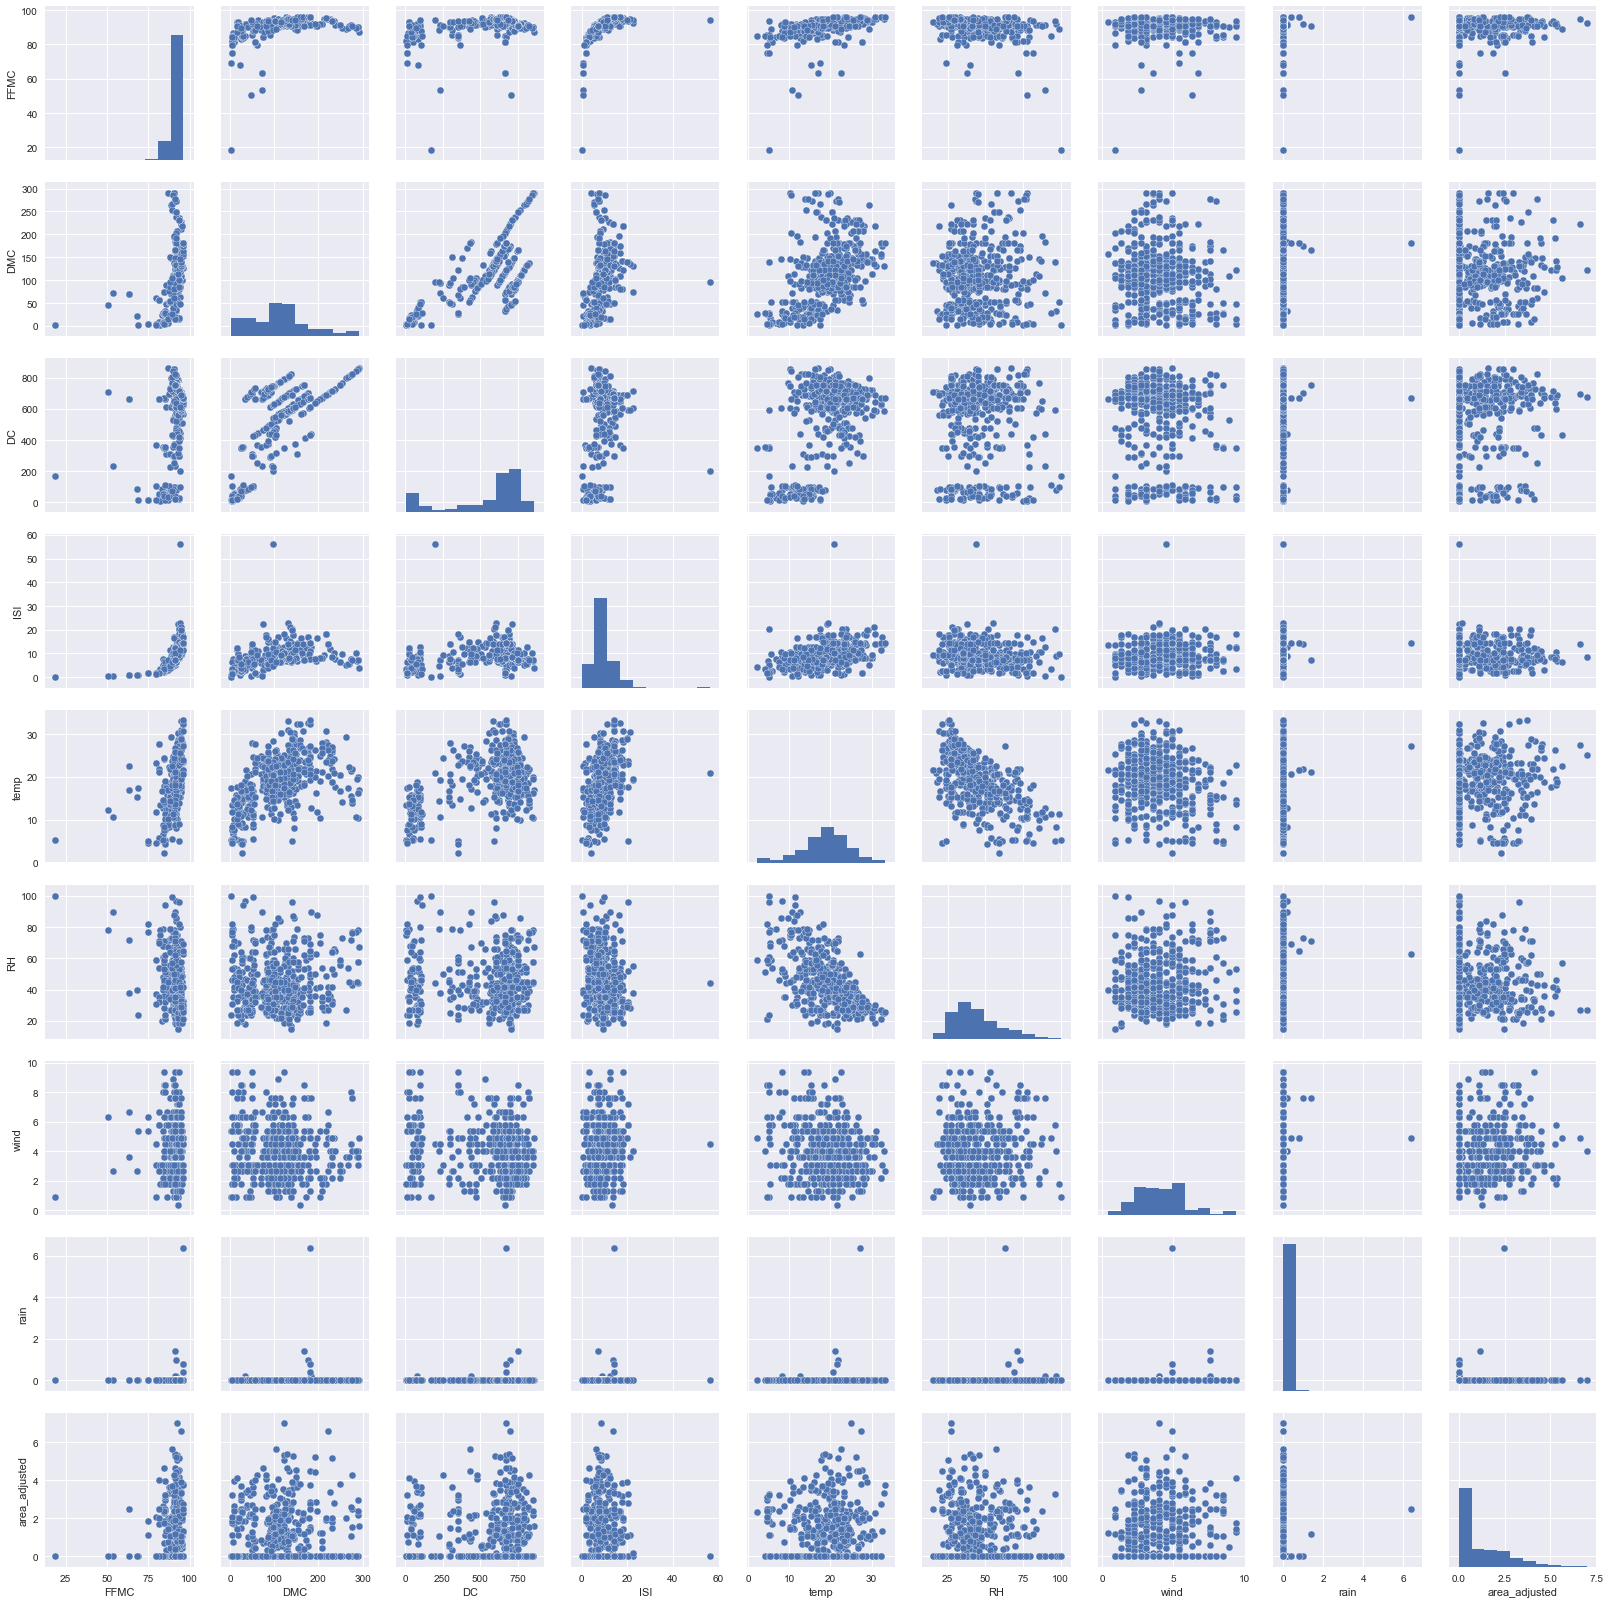

In [89]:
#plt.matshow(firedb.corr())
sns.pairplot(firedb[['FFMC','DMC','DC','ISI','temp','RH','wind','rain','area_adjusted']])

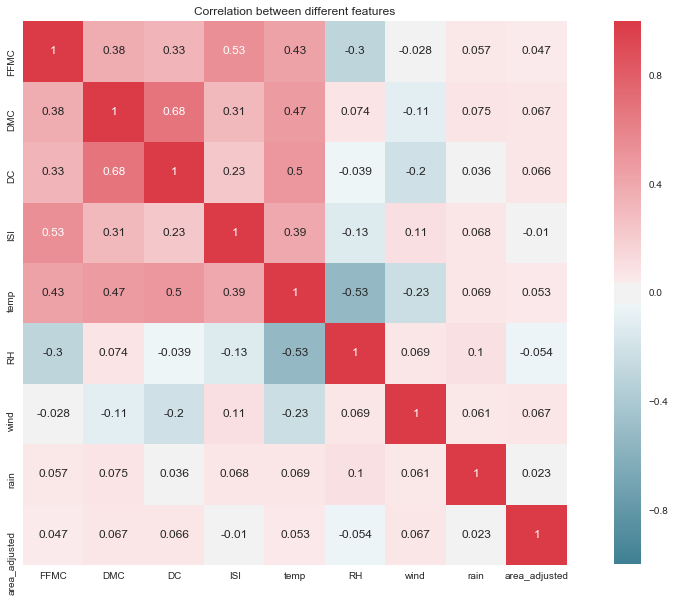

In [152]:
f, ax = plt.subplots(figsize=(17,10))
corr = firedb[['FFMC','DMC','DC','ISI','temp','RH','wind','rain','area_adjusted']].corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax,annot=True)
plt.title('Correlation between different features')

In [93]:
from sklearn import decomposition

In [139]:
pca = decomposition.PCA(n_components=.98)
firedb_pca = pca.fit_transform(firedb[['FFMC', 'DMC', 'DC', 'ISI','temp','RH','wind','rain','area_adjusted']])
firedb_pca.shape

(517, 2)

In [143]:
firedb_pca

array([[ 461.61398549,   -1.72660791],
       [-105.64444863,  -96.51145703],
       [-124.60314178,  -91.62411641],
       ..., 
       [-105.88307728,  -73.18102058],
       [ -72.09284155,   22.63916736],
       [ 453.55676097,  -27.9933382 ]])

In [157]:
pca.components_

array([[ -7.39789122e-03,  -1.79461084e-01,  -9.83656221e-01,
         -4.27009664e-03,  -1.15707733e-02,   2.26096044e-03,
          1.43490479e-03,  -4.47918998e-05,  -3.73605861e-04],
       [  2.40653720e-02,   9.81557167e-01,  -1.79443955e-01,
          1.93782332e-02,   1.95043425e-02,   5.48190274e-02,
          2.08323976e-03,   4.46210143e-04,   8.07844926e-04]])

In [154]:
pca.explained_variance_ratio_*100

array([ 96.26095558,   3.23256131])

Victor, isso aqui mostra que podemos diminuir a dimensionalidade do modelo para somente FFMC e DMC onde eles constituiriam 99,49% da variância.

In [153]:
pca.explained_variance_ratio_.sum()*100

99.493516886301094

## 3. Experiment
---

### Start - Loading, Checking and Adjusting Data Set

In [84]:

# 
import numpy as np
import pandas as pd

#
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
firedb = pd.read_csv("forestfires.csv")
firedb.columns

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')

No null values.


In [41]:
firedb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
X        517 non-null int64
Y        517 non-null int64
month    517 non-null object
day      517 non-null object
FFMC     517 non-null float64
DMC      517 non-null float64
DC       517 non-null float64
ISI      517 non-null float64
temp     517 non-null float64
RH       517 non-null int64
wind     517 non-null float64
rain     517 non-null float64
area     517 non-null float32
dtypes: float32(1), float64(7), int64(3), object(2)
memory usage: 50.6+ KB


In [40]:
firedb['area'] = firedb['area'].astype(np.float32) 

In [24]:
firedb['month'].value_counts()

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
may      2
jan      2
nov      1
Name: month, dtype: int64

In [45]:
firedb['area_adjusted'] = np.log(firedb['area']+1)

<a id='pca'></a>
## Principal Component Analisys
---

<a id='experiments'></a>

## Experiments
---
This section shows how to use the K-Nearest Neighbors Regressor (KNN) to find the burned area of the forrest. Considering the relative low number of lines in the dataset and the fact there is no right way to decide which parameters to use in the KNN, we decide to test a wide range of combination. The number of K-Nearest was made from 1 to 19 and we use nine different numbers of folds for the cross-validation, in a range from 3 to 23. 

We also test 20 different combinations of columns to use as the features of the model. We test all four FWI index alone and all four weather conditions alone. We test the combinations used in [1](#references), which is the four FWI index together and the four FWI index plus the spatial variables (X and Y); and the same logic with the four weather conditions.
We also also analysed the weather conditions used in each index and made some combinations with the conditions that weren't used to calculate the index. At last, we choose some combinations according to the correlation analysis of the data.

Then, with all these parameters sets, we just test the KNN model with every combination, which resulted in 6840 combinations. For every combination we used two different scores metric: mean absolute error and root mean square error.
The elapsed time to run all of these experiment was about 11 minutes. A very short time to make all of these tests.

The results was saved in a .csv file in order to re-use it in the future.

In [189]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
from sklearn import preprocessing, metrics
from IPython.core.display import clear_output
from time import time
import csv
from sklearn import preprocessing
from sklearn import utils
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [186]:
start_time = time()
k = 0
k_total = len(hyper_params) * len(features_list) * len(num_folds) * len(outputs)

for hp in hyper_params:
    for features in features_list:
        for fold in num_folds:
            for output in outputs:
                k += 1
                
                kf = KFold(fold, shuffle=True, random_state=1)
                model = KNeighborsRegressor(n_neighbors = hp, algorithm='auto')
                
                mses = cross_val_score(model, firedb[features],
                                       firedb[output], scoring="neg_mean_squared_error", cv=kf)
                
                rmses = np.sqrt(np.absolute(mses))
                
                avg_rmse = np.mean(rmses)
                avg_rmse_per_area = avg_rmse / np.mean(firedb[output])
                
                std_rmse = np.std(rmses)
                cv_rmse = std_rmse / np.mean(firedb[output])
                                
                maes = cross_val_score(model, firedb[features],
                                       firedb[output], scoring="neg_mean_absolute_error", cv=kf)
                
                maes = np.absolute(maes)
                
                avg_mae = np.mean(maes)
                avg_mae_per_area = avg_mae / np.mean(firedb[output])
                
                std_mae = np.std(maes)
                cv_mae = std_mae / np.mean(firedb[output])
                
                
                db_row = [ hp, ', '.join(features), fold, output, 
                           avg_rmse, avg_rmse_per_area, std_rmse, cv_rmse,
                           avg_mae, avg_mae_per_area, std_mae, cv_mae ]
                
                print('ITERATION %d OF %d' % (k, k_total) )
                print( 'HP: ', hp )
                print('FEATURES: ', ', '.join(features) )
                print('FOLDS: ', fold)
                print('OUTPUT: ', output)
                print('AVG_RMSE: ', avg_rmse)
                print('AVG_RMSE_PER_AREA: ', avg_rmse_per_area)
                print('STD_RMSE: ', std_rmse)
                print('CV_RMSE: ', cv_rmse)
                print('AVG_MAE: ', avg_mae)
                print('AVG_MAE_PER_AREA: ', avg_mae_per_area)
                print('STD_MAE: ', std_mae)
                print('CV_MAE: ', cv_mae)
                print('\n\n')
                
                #clear_output(wait = True)
                
                #open the file that will act like a database in the 'append' mode
                #which allow us to append a row each time we open it
                file = open('results_db.csv','a')
                writer = csv.writer(file)                        
                #write the row mounted
                writer.writerow(db_row)

                #close the file
                file.close()

end_time = time()
elapsed_time = end_time - start_time
print('Elapsed time: ', elapsed_time)

ITERATION 1 OF 6840
HP:  1
FEATURES:  FFMC
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  64.2344754166
AVG_RMSE_PER_AREA:  4.9998462883
STD_RMSE:  33.7842096465
CV_RMSE:  2.62967595063
AVG_MAE:  22.5848137538
AVG_MAE_PER_AREA:  1.75794379088
STD_MAE:  6.83852245852
CV_MAE:  0.532292992353



ITERATION 2 OF 6840
HP:  1
FEATURES:  FFMC
FOLDS:  3
OUTPUT:  area_adjusted
AVG_RMSE:  2.11825422389
AVG_RMSE_PER_AREA:  1.9065743525
STD_RMSE:  0.170288115374
CV_RMSE:  0.153271004795
AVG_MAE:  1.57709169388
AVG_MAE_PER_AREA:  1.41949089074
STD_MAE:  0.144545609391
CV_MAE:  0.130100980573



ITERATION 3 OF 6840
HP:  1
FEATURES:  FFMC
FOLDS:  5
OUTPUT:  area
AVG_RMSE:  74.6012032095
AVG_RMSE_PER_AREA:  5.80676570566
STD_RMSE:  66.2672325665
CV_RMSE:  5.15807087448
AVG_MAE:  25.3803131104
AVG_MAE_PER_AREA:  1.97553826785
STD_MAE:  20.7315642369
CV_MAE:  1.61369161697



ITERATION 4 OF 6840
HP:  1
FEATURES:  FFMC
FOLDS:  5
OUTPUT:  area_adjusted
AVG_RMSE:  2.06872143002
AVG_RMSE_PER_AREA:  1.86199143447
STD_RMS

ITERATION 30 OF 6840
HP:  1
FEATURES:  DMC
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.83478537147
AVG_RMSE_PER_AREA:  1.6514329074
STD_RMSE:  0.182038707003
CV_RMSE:  0.163847344676
AVG_MAE:  1.30060519955
AVG_MAE_PER_AREA:  1.17063404771
STD_MAE:  0.164453424609
CV_MAE:  0.148019382189



ITERATION 31 OF 6840
HP:  1
FEATURES:  DMC
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  59.0802870227
AVG_RMSE_PER_AREA:  4.59865752567
STD_RMSE:  51.8089392673
CV_RMSE:  4.0326745259
AVG_MAE:  19.8789576213
AVG_MAE_PER_AREA:  1.54732691181
STD_MAE:  11.0582156557
CV_MAE:  0.860743053364



ITERATION 32 OF 6840
HP:  1
FEATURES:  DMC
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:  1.95263526164
AVG_RMSE_PER_AREA:  1.75750590634
STD_RMSE:  0.18633467667
CV_RMSE:  0.167714012564
AVG_MAE:  1.41555624803
AVG_MAE_PER_AREA:  1.27409788993
STD_MAE:  0.173430354246
CV_MAE:  0.156099235691



ITERATION 33 OF 6840
HP:  1
FEATURES:  DMC
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  58.073006072
AVG_RMSE_PER_AREA:  4.52025336826
S

ITERATION 59 OF 6840
HP:  1
FEATURES:  ISI
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  93.7373386337
AVG_RMSE_PER_AREA:  7.29627324897
STD_RMSE:  46.7418010458
CV_RMSE:  3.6382615247
AVG_MAE:  23.3054823194
AVG_MAE_PER_AREA:  1.81403877772
STD_MAE:  7.37779403559
CV_MAE:  0.574268504343



ITERATION 60 OF 6840
HP:  1
FEATURES:  ISI
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.94425874916
AVG_RMSE_PER_AREA:  1.74996646954
STD_RMSE:  0.142949890786
CV_RMSE:  0.128664724182
AVG_MAE:  1.35675523962
AVG_MAE_PER_AREA:  1.22117294199
STD_MAE:  0.113078700524
CV_MAE:  0.101778600416



ITERATION 61 OF 6840
HP:  1
FEATURES:  ISI
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  58.1138141079
AVG_RMSE_PER_AREA:  4.52342976077
STD_RMSE:  37.2073532428
CV_RMSE:  2.89612464027
AVG_MAE:  18.1913695865
AVG_MAE_PER_AREA:  1.41596940142
STD_MAE:  6.28151101259
CV_MAE:  0.488936654616



ITERATION 62 OF 6840
HP:  1
FEATURES:  ISI
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.94386292438
AVG_RMSE_PER_AREA:  1.74961020004
STD_R

ITERATION 89 OF 6840
HP:  1
FEATURES:  temp
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  55.0563510032
AVG_RMSE_PER_AREA:  4.28544469969
STD_RMSE:  52.0222270382
CV_RMSE:  4.04927629718
AVG_MAE:  21.0248244949
AVG_MAE_PER_AREA:  1.63651824089
STD_MAE:  13.678695411
CV_MAE:  1.06471445491



ITERATION 90 OF 6840
HP:  1
FEATURES:  temp
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.85259402589
AVG_RMSE_PER_AREA:  1.66746192006
STD_RMSE:  0.307863906664
CV_RMSE:  0.277098670162
AVG_MAE:  1.37867796939
AVG_MAE_PER_AREA:  1.24090490516
STD_MAE:  0.28701794952
CV_MAE:  0.258335876349



ITERATION 91 OF 6840
HP:  1
FEATURES:  RH
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  59.3894941139
AVG_RMSE_PER_AREA:  4.62272541005
STD_RMSE:  26.2896341839
CV_RMSE:  2.04631748049
AVG_MAE:  19.1971193949
AVG_MAE_PER_AREA:  1.49425437867
STD_MAE:  4.36988972653
CV_MAE:  0.340140972395



ITERATION 92 OF 6840
HP:  1
FEATURES:  RH
FOLDS:  3
OUTPUT:  area_adjusted
AVG_RMSE:  1.95387368001
AVG_RMSE_PER_AREA:  1.75862056797
STD_R

ITERATION 119 OF 6840
HP:  1
FEATURES:  wind
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  50.5793335095
AVG_RMSE_PER_AREA:  3.93696517753
STD_RMSE:  43.8733428136
CV_RMSE:  3.41498811657
AVG_MAE:  16.3434615569
AVG_MAE_PER_AREA:  1.27213299514
STD_MAE:  7.89883165884
CV_MAE:  0.614824732284



ITERATION 120 OF 6840
HP:  1
FEATURES:  wind
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.8062387611
AVG_RMSE_PER_AREA:  1.62573899656
STD_RMSE:  0.173770705947
CV_RMSE:  0.156405575609
AVG_MAE:  1.30320692062
AVG_MAE_PER_AREA:  1.17297577544
STD_MAE:  0.153489195308
CV_MAE:  0.138150822436



ITERATION 121 OF 6840
HP:  1
FEATURES:  wind
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  72.9467649136
AVG_RMSE_PER_AREA:  5.67798848565
STD_RMSE:  103.452626266
CV_RMSE:  8.05248624038
AVG_MAE:  27.4646560669
AVG_MAE_PER_AREA:  2.13777816048
STD_MAE:  43.2109639565
CV_MAE:  3.36343025067



ITERATION 122 OF 6840
HP:  1
FEATURES:  wind
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:  1.96699697961
AVG_RMSE_PER_AREA:  1.770432

ITERATION 149 OF 6840
HP:  1
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  88.6642503828
AVG_RMSE_PER_AREA:  6.90139711279
STD_RMSE:  47.1540183542
CV_RMSE:  3.67034745933
AVG_MAE:  23.8914781298
AVG_MAE_PER_AREA:  1.8596511838
STD_MAE:  10.0888369456
CV_MAE:  0.785289108822



ITERATION 150 OF 6840
HP:  1
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.91587443855
AVG_RMSE_PER_AREA:  1.72441863962
STD_RMSE:  0.0636558335226
CV_RMSE:  0.0572946241353
AVG_MAE:  1.31351520334
AVG_MAE_PER_AREA:  1.1822539382
STD_MAE:  0.115190357224
CV_MAE:  0.103679236543



ITERATION 151 OF 6840
HP:  1
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  83.9553341211
AVG_RMSE_PER_AREA:  6.53486718723
STD_RMSE:  54.9363367863
CV_RMSE:  4.27610310184
AVG_MAE:  23.8045570585
AVG_MAE_PER_AREA:  1.85288547127
STD_MAE:  13.2424419707
CV_MAE:  1.03075760961



ITERATION 152 OF 6840
HP:  1
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  9

ITERATION 177 OF 6840
HP:  1
FEATURES:  X, Y, temp, RH, wind, rain
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  72.5830080394
AVG_RMSE_PER_AREA:  5.64967458652
STD_RMSE:  67.1511482161
CV_RMSE:  5.22687259429
AVG_MAE:  22.3551225662
AVG_MAE_PER_AREA:  1.74006521984
STD_MAE:  14.2278862117
CV_MAE:  1.10746205375



ITERATION 178 OF 6840
HP:  1
FEATURES:  X, Y, temp, RH, wind, rain
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.83389254544
AVG_RMSE_PER_AREA:  1.65062930263
STD_RMSE:  0.240468835791
CV_RMSE:  0.216438475478
AVG_MAE:  1.31318755526
AVG_MAE_PER_AREA:  1.18195903241
STD_MAE:  0.181168542626
CV_MAE:  0.163064136945



ITERATION 179 OF 6840
HP:  1
FEATURES:  X, Y, temp, RH, wind, rain
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  60.5691553046
AVG_RMSE_PER_AREA:  4.71454720182
STD_RMSE:  77.3786041318
CV_RMSE:  6.02295144708
AVG_MAE:  21.9045600269
AVG_MAE_PER_AREA:  1.7049945911
STD_MAE:  22.2682789532
CV_MAE:  1.73330553646



ITERATION 180 OF 6840
HP:  1
FEATURES:  X, Y, temp, RH, wind, rain


ITERATION 206 OF 6840
HP:  1
FEATURES:  temp, RH, wind, rain
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.91251513429
AVG_RMSE_PER_AREA:  1.72139503496
STD_RMSE:  0.12368256144
CV_RMSE:  0.11132280386
AVG_MAE:  1.37913587358
AVG_MAE_PER_AREA:  1.24131705039
STD_MAE:  0.0975300106801
CV_MAE:  0.0877837111636



ITERATION 207 OF 6840
HP:  1
FEATURES:  temp, RH, wind, rain
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  58.8543444334
AVG_RMSE_PER_AREA:  4.58107073589
STD_RMSE:  44.7271921757
CV_RMSE:  3.48144955393
AVG_MAE:  19.8564275742
AVG_MAE_PER_AREA:  1.54557323091
STD_MAE:  9.38703597605
CV_MAE:  0.73066272712



ITERATION 208 OF 6840
HP:  1
FEATURES:  temp, RH, wind, rain
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.90761437857
AVG_RMSE_PER_AREA:  1.71698401807
STD_RMSE:  0.146208080231
CV_RMSE:  0.131597318562
AVG_MAE:  1.39828168154
AVG_MAE_PER_AREA:  1.25854959311
STD_MAE:  0.10417493996
CV_MAE:  0.0937646041069



ITERATION 209 OF 6840
HP:  1
FEATURES:  temp, RH, wind, rain
FOLDS:  11


ITERATION 234 OF 6840
HP:  1
FEATURES:  DMC, wind
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.937778658
AVG_RMSE_PER_AREA:  1.74413394222
STD_RMSE:  0.315725782505
CV_RMSE:  0.284174898629
AVG_MAE:  1.40214820012
AVG_MAE_PER_AREA:  1.26202972551
STD_MAE:  0.256079986818
CV_MAE:  0.230489584087



ITERATION 235 OF 6840
HP:  1
FEATURES:  DC, RH, wind
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  97.0507597738
AVG_RMSE_PER_AREA:  7.55418142493
STD_RMSE:  14.5103218915
CV_RMSE:  1.12944612034
AVG_MAE:  22.4610716502
AVG_MAE_PER_AREA:  1.74831202393
STD_MAE:  3.70622457737
CV_MAE:  0.288482984824



ITERATION 236 OF 6840
HP:  1
FEATURES:  DC, RH, wind
FOLDS:  3
OUTPUT:  area_adjusted
AVG_RMSE:  1.92220216859
AVG_RMSE_PER_AREA:  1.73011403145
STD_RMSE:  0.0792104759524
CV_RMSE:  0.0712948711237
AVG_MAE:  1.38616490364
AVG_MAE_PER_AREA:  1.24764366043
STD_MAE:  0.0634347090296
CV_MAE:  0.0570955968975



ITERATION 237 OF 6840
HP:  1
FEATURES:  DC, RH, wind
FOLDS:  5
OUTPUT:  area
AVG_RMSE:  86.597442

ITERATION 264 OF 6840
HP:  1
FEATURES:  FFMC, DMC
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.89962562689
AVG_RMSE_PER_AREA:  1.70979359263
STD_RMSE:  0.188322143354
CV_RMSE:  0.169502869144
AVG_MAE:  1.34816355055
AVG_MAE_PER_AREA:  1.21343983147
STD_MAE:  0.181669828905
CV_MAE:  0.163515329041



ITERATION 265 OF 6840
HP:  1
FEATURES:  FFMC, DMC
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  58.0268257826
AVG_RMSE_PER_AREA:  4.51665881335
STD_RMSE:  51.760753845
CV_RMSE:  4.02892389661
AVG_MAE:  19.408599472
AVG_MAE_PER_AREA:  1.51071544373
STD_MAE:  10.8454860265
CV_MAE:  0.844184726393



ITERATION 266 OF 6840
HP:  1
FEATURES:  FFMC, DMC
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:  1.97866142071
AVG_RMSE_PER_AREA:  1.78093123783
STD_RMSE:  0.220240938319
CV_RMSE:  0.198231977839
AVG_MAE:  1.41955649058
AVG_MAE_PER_AREA:  1.2776983831
STD_MAE:  0.213960527351
CV_MAE:  0.192579176424



ITERATION 267 OF 6840
HP:  1
FEATURES:  FFMC, DMC
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  56.04484844
AVG_RMSE

ITERATION 293 OF 6840
HP:  1
FEATURES:  X, Y, DMC, wind
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  90.3618457842
AVG_RMSE_PER_AREA:  7.03353357085
STD_RMSE:  51.4478263666
CV_RMSE:  4.00456642686
AVG_MAE:  24.4938073839
AVG_MAE_PER_AREA:  1.90653494313
STD_MAE:  10.950253649
CV_MAE:  0.852339568558



ITERATION 294 OF 6840
HP:  1
FEATURES:  X, Y, DMC, wind
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.93678796839
AVG_RMSE_PER_AREA:  1.74324225351
STD_RMSE:  0.167783545508
CV_RMSE:  0.15101671982
AVG_MAE:  1.37901990754
AVG_MAE_PER_AREA:  1.24121267299
STD_MAE:  0.135663589517
CV_MAE:  0.122106552378



ITERATION 295 OF 6840
HP:  1
FEATURES:  X, Y, DMC, wind
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  85.1411294558
AVG_RMSE_PER_AREA:  6.62716644498
STD_RMSE:  59.4230884842
CV_RMSE:  4.6253403094
AVG_MAE:  24.6524705887
AVG_MAE_PER_AREA:  1.91888487874
STD_MAE:  13.7767208364
CV_MAE:  1.0723445018



ITERATION 296 OF 6840
HP:  1
FEATURES:  X, Y, DMC, wind
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.932

ITERATION 321 OF 6840
HP:  1
FEATURES:  X, Y, DC, RH, wind
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  53.66811949
AVG_RMSE_PER_AREA:  4.17738833068
STD_RMSE:  53.2177339596
CV_RMSE:  4.14233147986
AVG_MAE:  19.2979906484
AVG_MAE_PER_AREA:  1.50210593749
STD_MAE:  12.6012836832
CV_MAE:  0.980851498248



ITERATION 322 OF 6840
HP:  1
FEATURES:  X, Y, DC, RH, wind
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.89485082467
AVG_RMSE_PER_AREA:  1.70549594254
STD_RMSE:  0.257484848735
CV_RMSE:  0.231754056343
AVG_MAE:  1.40358687075
AVG_MAE_PER_AREA:  1.26332462793
STD_MAE:  0.270604176644
CV_MAE:  0.243562352927



ITERATION 323 OF 6840
HP:  1
FEATURES:  X, Y, DC, RH, wind
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  51.8289650222
AVG_RMSE_PER_AREA:  4.03423327913
STD_RMSE:  55.0174965559
CV_RMSE:  4.28242036948
AVG_MAE:  19.4613934807
AVG_MAE_PER_AREA:  1.51482479352
STD_MAE:  14.3870864542
CV_MAE:  1.11985379099



ITERATION 324 OF 6840
HP:  1
FEATURES:  X, Y, DC, RH, wind
FOLDS:  23
OUTPUT:  area_adjuste

ITERATION 347 OF 6840
HP:  1
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  83.3054543611
AVG_RMSE_PER_AREA:  6.48428221888
STD_RMSE:  55.9294157446
CV_RMSE:  4.35340181272
AVG_MAE:  24.7313451767
AVG_MAE_PER_AREA:  1.92502427372
STD_MAE:  12.0266395685
CV_MAE:  0.936122678945



ITERATION 348 OF 6840
HP:  1
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.95975158787
AVG_RMSE_PER_AREA:  1.76391108893
STD_RMSE:  0.161130237666
CV_RMSE:  0.145028285595
AVG_MAE:  1.38318817956
AVG_MAE_PER_AREA:  1.24496440422
STD_MAE:  0.179431967606
CV_MAE:  0.161501100102



ITERATION 349 OF 6840
HP:  1
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  86.7275463416
AVG_RMSE_PER_AREA:  6.75064905345
STD_RMSE:  50.4700586125
CV_RMSE:  3.92845950072
AVG_MAE:  24.6285706626
AVG_MAE_PER_AREA:  1.91702456998
STD_MAE:  10.0622278844
CV_MAE:  0.783217927965



ITERATI

ITERATION 374 OF 6840
HP:  2
FEATURES:  FFMC
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:  1.6949663358
AVG_RMSE_PER_AREA:  1.52558616795
STD_RMSE:  0.280949243828
CV_RMSE:  0.25287362423
AVG_MAE:  1.27671287457
AVG_MAE_PER_AREA:  1.14912931352
STD_MAE:  0.238563119045
CV_MAE:  0.214723199459



ITERATION 375 OF 6840
HP:  2
FEATURES:  FFMC
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  51.9818543681
AVG_RMSE_PER_AREA:  4.04613379242
STD_RMSE:  49.3834285054
CV_RMSE:  3.84387900913
AVG_MAE:  19.0219338066
AVG_MAE_PER_AREA:  1.48061838323
STD_MAE:  10.6721093786
CV_MAE:  0.830689534227



ITERATION 376 OF 6840
HP:  2
FEATURES:  FFMC
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.65534434533
AVG_RMSE_PER_AREA:  1.489923654
STD_RMSE:  0.226971486149
CV_RMSE:  0.20428993336
AVG_MAE:  1.26580932266
AVG_MAE_PER_AREA:  1.13931536758
STD_MAE:  0.177126643441
CV_MAE:  0.159426149949



ITERATION 377 OF 6840
HP:  2
FEATURES:  FFMC
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  55.3593561798
AVG_RMSE_PER_AREA:  4.309029

ITERATION 404 OF 6840
HP:  2
FEATURES:  DC
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.75389779654
AVG_RMSE_PER_AREA:  1.57862853196
STD_RMSE:  0.111291041613
CV_RMSE:  0.100169584561
AVG_MAE:  1.2908832762
AVG_MAE_PER_AREA:  1.16188364867
STD_MAE:  0.101723245429
CV_MAE:  0.0915579105665



ITERATION 405 OF 6840
HP:  2
FEATURES:  DC
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  55.5602569664
AVG_RMSE_PER_AREA:  4.32466744329
STD_RMSE:  41.658081506
CV_RMSE:  3.24255787636
AVG_MAE:  18.2717258453
AVG_MAE_PER_AREA:  1.42222412585
STD_MAE:  7.52677276571
CV_MAE:  0.585864625367



ITERATION 406 OF 6840
HP:  2
FEATURES:  DC
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.7041171682
AVG_RMSE_PER_AREA:  1.53382254589
STD_RMSE:  0.167594183222
CV_RMSE:  0.150846280751
AVG_MAE:  1.27292976379
AVG_MAE_PER_AREA:  1.14572425387
STD_MAE:  0.124431645459
CV_MAE:  0.111997030949



ITERATION 407 OF 6840
HP:  2
FEATURES:  DC
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  55.6810589817
AVG_RMSE_PER_AREA:  4.33407036133


ITERATION 436 OF 6840
HP:  2
FEATURES:  temp
FOLDS:  5
OUTPUT:  area_adjusted
AVG_RMSE:  1.66441436494
AVG_RMSE_PER_AREA:  1.49808729487
STD_RMSE:  0.118330947891
CV_RMSE:  0.106505983942
AVG_MAE:  1.25646226406
AVG_MAE_PER_AREA:  1.13090237258
STD_MAE:  0.090477221303
CV_MAE:  0.081435716108



ITERATION 437 OF 6840
HP:  2
FEATURES:  temp
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  66.4545282751
AVG_RMSE_PER_AREA:  5.17264949052
STD_RMSE:  33.4501446803
CV_RMSE:  2.60367319322
AVG_MAE:  21.0087957382
AVG_MAE_PER_AREA:  1.63527060371
STD_MAE:  5.4768128649
CV_MAE:  0.426301021324



ITERATION 438 OF 6840
HP:  2
FEATURES:  temp
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.66469003097
AVG_RMSE_PER_AREA:  1.49833541324
STD_RMSE:  0.156438960248
CV_RMSE:  0.140805813568
AVG_MAE:  1.24975086961
AVG_MAE_PER_AREA:  1.12486165642
STD_MAE:  0.108981027424
CV_MAE:  0.0980904130637



ITERATION 439 OF 6840
HP:  2
FEATURES:  temp
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  55.4565042757
AVG_RMSE_PER_AREA:  4.31659

ITERATION 465 OF 6840
HP:  2
FEATURES:  RH
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  46.9512903733
AVG_RMSE_PER_AREA:  3.65456763493
STD_RMSE:  47.74109382
CV_RMSE:  3.71604390302
AVG_MAE:  18.0215688756
AVG_MAE_PER_AREA:  1.40275255099
STD_MAE:  11.1205561225
CV_MAE:  0.865595474899



ITERATION 466 OF 6840
HP:  2
FEATURES:  RH
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.65715650323
AVG_RMSE_PER_AREA:  1.49155472062
STD_RMSE:  0.259567606497
CV_RMSE:  0.233628681442
AVG_MAE:  1.26107338541
AVG_MAE_PER_AREA:  1.13505269864
STD_MAE:  0.203280752051
CV_MAE:  0.182966644818



ITERATION 467 OF 6840
HP:  2
FEATURES:  RH
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  47.6749306997
AVG_RMSE_PER_AREA:  3.71089393598
STD_RMSE:  51.1469642474
CV_RMSE:  3.98114809364
AVG_MAE:  18.3770648086
AVG_MAE_PER_AREA:  1.4304234397
STD_MAE:  12.8997436905
CV_MAE:  1.00408285726



ITERATION 468 OF 6840
HP:  2
FEATURES:  RH
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.66562255888
AVG_RMSE_PER_AREA:  1.49917475243
STD_

ITERATION 494 OF 6840
HP:  2
FEATURES:  rain
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.56603840261
AVG_RMSE_PER_AREA:  1.4095421691
STD_RMSE:  0.183127777751
CV_RMSE:  0.164827583182
AVG_MAE:  1.07984982597
AVG_MAE_PER_AREA:  0.971939042778
STD_MAE:  0.138673192518
CV_MAE:  0.124815401877



ITERATION 495 OF 6840
HP:  2
FEATURES:  rain
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  47.4108849971
AVG_RMSE_PER_AREA:  3.69034129789
STD_RMSE:  43.6255249212
CV_RMSE:  3.39569860948
AVG_MAE:  12.9561468601
AVG_MAE_PER_AREA:  1.00847313486
STD_MAE:  7.96190452247
CV_MAE:  0.6197341617



ITERATION 496 OF 6840
HP:  2
FEATURES:  rain
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.49557434972
AVG_RMSE_PER_AREA:  1.34611967971
STD_RMSE:  0.198617944358
CV_RMSE:  0.178769797499
AVG_MAE:  1.06832532883
AVG_MAE_PER_AREA:  0.961566203475
STD_MAE:  0.172483000073
CV_MAE:  0.15524655184



ITERATION 497 OF 6840
HP:  2
FEATURES:  rain
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  46.7560866066
AVG_RMSE_PER_AREA:  3.6393

ITERATION 521 OF 6840
HP:  2
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  53.1985002022
AVG_RMSE_PER_AREA:  4.14083437367
STD_RMSE:  52.407566163
CV_RMSE:  4.07927010316
AVG_MAE:  20.6634997078
AVG_MAE_PER_AREA:  1.60839364916
STD_MAE:  14.3078349989
CV_MAE:  1.11368506163



ITERATION 522 OF 6840
HP:  2
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.65387925461
AVG_RMSE_PER_AREA:  1.48860497168
STD_RMSE:  0.288080591786
CV_RMSE:  0.259292327406
AVG_MAE:  1.24490926318
AVG_MAE_PER_AREA:  1.12050387795
STD_MAE:  0.216810154901
CV_MAE:  0.195144037024



ITERATION 523 OF 6840
HP:  2
FEATURES:  X, Y, temp, RH, wind, rain
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  76.5570604632
AVG_RMSE_PER_AREA:  5.95900460178
STD_RMSE:  19.8554933037
CV_RMSE:  1.54550050971
AVG_MAE:  21.6492958069
AVG_MAE_PER_AREA:  1.68512548102
STD_MAE:  1.68182257737
CV_MAE:  0.130908742019



ITERATION 524 OF 6840
HP:  2
FEATURES:  X, Y, temp, RH, wind, rain
FOLD

ITERATION 548 OF 6840
HP:  2
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.69476101776
AVG_RMSE_PER_AREA:  1.52540136761
STD_RMSE:  0.117010899445
CV_RMSE:  0.105317849637
AVG_MAE:  1.24458168613
AVG_MAE_PER_AREA:  1.1202090361
STD_MAE:  0.0937104241881
CV_MAE:  0.0843458208667



ITERATION 549 OF 6840
HP:  2
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  62.1117514616
AVG_RMSE_PER_AREA:  4.83461891751
STD_RMSE:  37.2511420632
CV_RMSE:  2.89953304938
AVG_MAE:  19.9284415245
AVG_MAE_PER_AREA:  1.55117861151
STD_MAE:  7.88527007854
CV_MAE:  0.613769133768



ITERATION 550 OF 6840
HP:  2
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.69032328677
AVG_RMSE_PER_AREA:  1.52140710479
STD_RMSE:  0.0993567189131
CV_RMSE:  0.0894278740914
AVG_MAE:  1.25458681583
AVG_MAE_PER_AREA:  1.12921434031
STD_MAE:  0.0881436015126
CV_MAE:  0.0793352979472



ITERATION 551 OF 6840
HP:  2
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  11
OU

ITERATION 575 OF 6840
HP:  2
FEATURES:  temp, RH, wind, rain
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  47.491459662
AVG_RMSE_PER_AREA:  3.69661302248
STD_RMSE:  50.9627952087
CV_RMSE:  3.96681284953
AVG_MAE:  18.4990789579
AVG_MAE_PER_AREA:  1.43992070714
STD_MAE:  13.6992180393
CV_MAE:  1.06631188349



ITERATION 576 OF 6840
HP:  2
FEATURES:  temp, RH, wind, rain
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.63246987089
AVG_RMSE_PER_AREA:  1.46933505524
STD_RMSE:  0.216632872821
CV_RMSE:  0.194984470971
AVG_MAE:  1.2545450278
AVG_MAE_PER_AREA:  1.12917672821
STD_MAE:  0.152720076598
CV_MAE:  0.137458562749



ITERATION 577 OF 6840
HP:  2
FEATURES:  DMC, wind
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  78.4788304052
AVG_RMSE_PER_AREA:  6.10859022927
STD_RMSE:  18.4468377971
CV_RMSE:  1.4358543896
AVG_MAE:  21.5139668783
AVG_MAE_PER_AREA:  1.67459182542
STD_MAE:  3.68978152562
CV_MAE:  0.287203099984



ITERATION 578 OF 6840
HP:  2
FEATURES:  DMC, wind
FOLDS:  3
OUTPUT:  area_adjusted
AVG_RMSE:  1.64

ITERATION 605 OF 6840
HP:  2
FEATURES:  DC, RH, wind
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  58.9288447587
AVG_RMSE_PER_AREA:  4.58686964951
STD_RMSE:  40.5023404775
CV_RMSE:  3.15259796847
AVG_MAE:  20.0438199477
AVG_MAE_PER_AREA:  1.5601593711
STD_MAE:  8.74523257509
CV_MAE:  0.680706401778



ITERATION 606 OF 6840
HP:  2
FEATURES:  DC, RH, wind
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.72674619315
AVG_RMSE_PER_AREA:  1.55419022325
STD_RMSE:  0.145275911171
CV_RMSE:  0.130758302356
AVG_MAE:  1.34655337984
AVG_MAE_PER_AREA:  1.21199056719
STD_MAE:  0.140862378083
CV_MAE:  0.12678581931



ITERATION 607 OF 6840
HP:  2
FEATURES:  DC, RH, wind
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  56.1965216749
AVG_RMSE_PER_AREA:  4.37419265106
STD_RMSE:  46.0627267764
CV_RMSE:  3.58540413086
AVG_MAE:  20.3553760529
AVG_MAE_PER_AREA:  1.58441009668
STD_MAE:  10.6319055202
CV_MAE:  0.827560169331



ITERATION 608 OF 6840
HP:  2
FEATURES:  DC, RH, wind
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:  1.74228281

ITERATION 636 OF 6840
HP:  2
FEATURES:  DC, DMC
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.6989898181
AVG_RMSE_PER_AREA:  1.52920757849
STD_RMSE:  0.0987522131314
CV_RMSE:  0.0888837773506
AVG_MAE:  1.28415334225
AVG_MAE_PER_AREA:  1.15582624568
STD_MAE:  0.0733944363358
CV_MAE:  0.066060035833



ITERATION 637 OF 6840
HP:  2
FEATURES:  DC, DMC
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  64.8650183551
AVG_RMSE_PER_AREA:  5.04892612823
STD_RMSE:  36.0014181249
CV_RMSE:  2.80225775362
AVG_MAE:  21.0036578708
AVG_MAE_PER_AREA:  1.63487068533
STD_MAE:  9.03342400549
CV_MAE:  0.703138481191



ITERATION 638 OF 6840
HP:  2
FEATURES:  DC, DMC
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.68345149297
AVG_RMSE_PER_AREA:  1.51522201819
STD_RMSE:  0.11655795054
CV_RMSE:  0.104910164499
AVG_MAE:  1.24569216039
AVG_MAE_PER_AREA:  1.12120853924
STD_MAE:  0.0935142892994
CV_MAE:  0.0841692859898



ITERATION 639 OF 6840
HP:  2
FEATURES:  DC, DMC
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  61.4147818157
AVG_RMSE_PE

ITERATION 665 OF 6840
HP:  2
FEATURES:  X, Y, DMC, wind
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  64.8085038163
AVG_RMSE_PER_AREA:  5.04452718194
STD_RMSE:  55.6049956882
CV_RMSE:  4.32814979028
AVG_MAE:  23.625431973
AVG_MAE_PER_AREA:  1.83894283551
STD_MAE:  14.8081530293
CV_MAE:  1.15262852977



ITERATION 666 OF 6840
HP:  2
FEATURES:  X, Y, DMC, wind
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.69631708534
AVG_RMSE_PER_AREA:  1.52680193535
STD_RMSE:  0.285348463201
CV_RMSE:  0.256833223947
AVG_MAE:  1.28049098409
AVG_MAE_PER_AREA:  1.15252987169
STD_MAE:  0.253588080994
CV_MAE:  0.228246697619



ITERATION 667 OF 6840
HP:  2
FEATURES:  X, Y, DC, RH, wind
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  78.506277082
AVG_RMSE_PER_AREA:  6.11072660797
STD_RMSE:  18.3566457832
CV_RMSE:  1.42883407531
AVG_MAE:  22.5594819387
AVG_MAE_PER_AREA:  1.75597202757
STD_MAE:  3.83871074654
CV_MAE:  0.29879536734



ITERATION 668 OF 6840
HP:  2
FEATURES:  X, Y, DC, RH, wind
FOLDS:  3
OUTPUT:  area_adjusted
AVG_RMS

ITERATION 692 OF 6840
HP:  2
FEATURES:  FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.73777236713
AVG_RMSE_PER_AREA:  1.56411453747
STD_RMSE:  0.0852693566619
CV_RMSE:  0.0767482800844
AVG_MAE:  1.30813924472
AVG_MAE_PER_AREA:  1.17741520604
STD_MAE:  0.0711388297615
CV_MAE:  0.0640298349273



ITERATION 693 OF 6840
HP:  2
FEATURES:  FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  68.849105627
AVG_RMSE_PER_AREA:  5.35903723024
STD_RMSE:  35.7532725477
CV_RMSE:  2.78294274038
AVG_MAE:  22.502167511
AVG_MAE_PER_AREA:  1.75151081999
STD_MAE:  6.44414055853
CV_MAE:  0.50159532002



ITERATION 694 OF 6840
HP:  2
FEATURES:  FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.75010439642
AVG_RMSE_PER_AREA:  1.5752142112
STD_RMSE:  0.126282793163
CV_RMSE:  0.11366319108
AVG_MAE:  1.31886279583
AVG_MAE_PER_AREA:  1.18706713889
STD_MAE:  0.106829447684
CV_MAE:  0.0961538434568



ITERATION 6

ITERATION 717 OF 6840
HP:  2
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  60.109093758
AVG_RMSE_PER_AREA:  4.67873719479
STD_RMSE:  48.6605330651
CV_RMSE:  3.7876106881
AVG_MAE:  22.1383588189
AVG_MAE_PER_AREA:  1.72319288749
STD_MAE:  12.2908503341
CV_MAE:  0.95668816511



ITERATION 718 OF 6840
HP:  2
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.70094462645
AVG_RMSE_PER_AREA:  1.53096704032
STD_RMSE:  0.19591933213
CV_RMSE:  0.176340861065
AVG_MAE:  1.29654392443
AVG_MAE_PER_AREA:  1.16697862104
STD_MAE:  0.187680308007
CV_MAE:  0.168925173229



ITERATION 719 OF 6840
HP:  2
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  55.2370949295
AVG_RMSE_PER_AREA:  4.29951334184
STD_RMSE:  53.7064412935
CV_RMSE:  4.18037120125
AVG_MAE:  21.8341604108
AVG_MAE_PER_AREA:  1.69951486613
STD_MAE:  16.0385154056
CV_MAE:  1.24839677137



ITERATION

ITERATION 747 OF 6840
HP:  3
FEATURES:  DMC
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  64.9805233819
AVG_RMSE_PER_AREA:  5.05791674231
STD_RMSE:  35.0949568326
CV_RMSE:  2.73170113899
AVG_MAE:  20.5758692741
AVG_MAE_PER_AREA:  1.60157272169
STD_MAE:  6.66030727703
CV_MAE:  0.518421181182



ITERATION 748 OF 6840
HP:  3
FEATURES:  DMC
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.58578585968
AVG_RMSE_PER_AREA:  1.42731623736
STD_RMSE:  0.104847409803
CV_RMSE:  0.0943698731728
AVG_MAE:  1.21131234169
AVG_MAE_PER_AREA:  1.09026434008
STD_MAE:  0.0681944919195
CV_MAE:  0.061379728556



ITERATION 749 OF 6840
HP:  3
FEATURES:  DMC
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  59.3863792621
AVG_RMSE_PER_AREA:  4.62248295801
STD_RMSE:  41.3257997624
CV_RMSE:  3.21669392041
AVG_MAE:  20.5186654004
AVG_MAE_PER_AREA:  1.59712011934
STD_MAE:  9.55661891623
CV_MAE:  0.74386262684



ITERATION 750 OF 6840
HP:  3
FEATURES:  DMC
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.54101847371
AVG_RMSE_PER_AREA:  1.3870225

ITERATION 779 OF 6840
HP:  3
FEATURES:  ISI
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  62.3400014713
AVG_RMSE_PER_AREA:  4.85238531097
STD_RMSE:  31.7389224797
CV_RMSE:  2.47047606018
AVG_MAE:  19.3401009696
AVG_MAE_PER_AREA:  1.50538369654
STD_MAE:  5.05473339185
CV_MAE:  0.393447441171



ITERATION 780 OF 6840
HP:  3
FEATURES:  ISI
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.66052657993
AVG_RMSE_PER_AREA:  1.49458802122
STD_RMSE:  0.078579790682
CV_RMSE:  0.0707272110443
AVG_MAE:  1.27482606683
AVG_MAE_PER_AREA:  1.14743105691
STD_MAE:  0.063818970448
CV_MAE:  0.0574414585777



ITERATION 781 OF 6840
HP:  3
FEATURES:  ISI
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  54.9128119685
AVG_RMSE_PER_AREA:  4.27427199055
STD_RMSE:  38.6115559146
CV_RMSE:  3.00542416317
AVG_MAE:  18.4373470942
AVG_MAE_PER_AREA:  1.43511565771
STD_MAE:  6.56605160903
CV_MAE:  0.511084562508



ITERATION 782 OF 6840
HP:  3
FEATURES:  ISI
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.61718553441
AVG_RMSE_PER_AREA:  1.4555781021

ITERATION 808 OF 6840
HP:  3
FEATURES:  temp
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.54788272313
AVG_RMSE_PER_AREA:  1.39320081004
STD_RMSE:  0.238904229942
CV_RMSE:  0.215030222705
AVG_MAE:  1.21865048848
AVG_MAE_PER_AREA:  1.09686917641
STD_MAE:  0.193990329364
CV_MAE:  0.174604626029



ITERATION 809 OF 6840
HP:  3
FEATURES:  temp
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  50.3373638798
AVG_RMSE_PER_AREA:  3.91813088416
STD_RMSE:  49.5986684106
CV_RMSE:  3.86063272953
AVG_MAE:  20.2193432891
AVG_MAE_PER_AREA:  1.57382165637
STD_MAE:  12.9112809737
CV_MAE:  1.0049808897



ITERATION 810 OF 6840
HP:  3
FEATURES:  temp
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.51411375486
AVG_RMSE_PER_AREA:  1.36280641823
STD_RMSE:  0.278312871777
CV_RMSE:  0.250500708231
AVG_MAE:  1.17874598244
AVG_MAE_PER_AREA:  1.06095237903
STD_MAE:  0.195200823885
CV_MAE:  0.175694154274



ITERATION 811 OF 6840
HP:  3
FEATURES:  RH
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  97.5472849098
AVG_RMSE_PER_AREA:  7.592829

ITERATION 838 OF 6840
HP:  3
FEATURES:  wind
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.59892649727
AVG_RMSE_PER_AREA:  1.43914371412
STD_RMSE:  0.226902587411
CV_RMSE:  0.204227919762
AVG_MAE:  1.20195208192
AVG_MAE_PER_AREA:  1.08183946311
STD_MAE:  0.156992121014
CV_MAE:  0.141303696267



ITERATION 839 OF 6840
HP:  3
FEATURES:  wind
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  58.6636813927
AVG_RMSE_PER_AREA:  4.56623001538
STD_RMSE:  47.7069297065
CV_RMSE:  3.71338465633
AVG_MAE:  19.5694520257
AVG_MAE_PER_AREA:  1.52323579262
STD_MAE:  13.3859559266
CV_MAE:  1.04192836667



ITERATION 840 OF 6840
HP:  3
FEATURES:  wind
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.56670875456
AVG_RMSE_PER_AREA:  1.41014553191
STD_RMSE:  0.13688874022
CV_RMSE:  0.123209272195
AVG_MAE:  1.1717699712
AVG_MAE_PER_AREA:  1.05467348957
STD_MAE:  0.124784424795
CV_MAE:  0.112314556592



ITERATION 841 OF 6840
HP:  3
FEATURES:  wind
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  57.2201960337
AVG_RMSE_PER_AREA:  4.4538

ITERATION 868 OF 6840
HP:  3
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  5
OUTPUT:  area_adjusted
AVG_RMSE:  1.65787894243
AVG_RMSE_PER_AREA:  1.49220496555
STD_RMSE:  0.0728523870187
CV_RMSE:  0.0655721542019
AVG_MAE:  1.26494460106
AVG_MAE_PER_AREA:  1.13853705873
STD_MAE:  0.0601397981066
CV_MAE:  0.0541299506646



ITERATION 869 OF 6840
HP:  3
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  64.1162318639
AVG_RMSE_PER_AREA:  4.99064251441
STD_RMSE:  33.91818387
CV_RMSE:  2.64010415946
AVG_MAE:  20.6425158637
AVG_MAE_PER_AREA:  1.60676032073
STD_MAE:  6.40447565073
CV_MAE:  0.498507905656



ITERATION 870 OF 6840
HP:  3
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.62066868706
AVG_RMSE_PER_AREA:  1.45871317889
STD_RMSE:  0.0936418325396
CV_RMSE:  0.0842840836699
AVG_MAE:  1.23486196995
AVG_MAE_PER_AREA:  1.11146062367
STD_MAE:  0.0654938102898
CV_MAE:  0.0589489295182



ITERATION 871 OF 6840
HP:  3
FEATURES:  X, Y, FFMC, DMC

ITERATION 895 OF 6840
HP:  3
FEATURES:  X, Y, temp, RH, wind, rain
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  61.6232028987
AVG_RMSE_PER_AREA:  4.79659155443
STD_RMSE:  46.3263549787
CV_RMSE:  3.6059242718
AVG_MAE:  22.0043498993
AVG_MAE_PER_AREA:  1.712761978
STD_MAE:  10.7569540371
CV_MAE:  0.837293624131



ITERATION 896 OF 6840
HP:  3
FEATURES:  X, Y, temp, RH, wind, rain
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:  1.54048755858
AVG_RMSE_PER_AREA:  1.3865446538
STD_RMSE:  0.218147337212
CV_RMSE:  0.196347592986
AVG_MAE:  1.19553696314
AVG_MAE_PER_AREA:  1.07606541542
STD_MAE:  0.161135081017
CV_MAE:  0.145032644944



ITERATION 897 OF 6840
HP:  3
FEATURES:  X, Y, temp, RH, wind, rain
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  63.3408437774
AVG_RMSE_PER_AREA:  4.93028830087
STD_RMSE:  46.7785830884
CV_RMSE:  3.64112454425
AVG_MAE:  22.0177499621
AVG_MAE_PER_AREA:  1.71380500441
STD_MAE:  10.2306616476
CV_MAE:  0.796328378709



ITERATION 898 OF 6840
HP:  3
FEATURES:  X, Y, temp, RH, wind, rain
F

ITERATION 923 OF 6840
HP:  3
FEATURES:  temp, RH, wind, rain
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  57.5788009792
AVG_RMSE_PER_AREA:  4.48178571544
STD_RMSE:  35.8370068717
CV_RMSE:  2.7894604047
AVG_MAE:  19.7958572933
AVG_MAE_PER_AREA:  1.5408585961
STD_MAE:  6.00845329124
CV_MAE:  0.467682544176



ITERATION 924 OF 6840
HP:  3
FEATURES:  temp, RH, wind, rain
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.55310752801
AVG_RMSE_PER_AREA:  1.39790349344
STD_RMSE:  0.104453465695
CV_RMSE:  0.0940152964061
AVG_MAE:  1.23686596325
AVG_MAE_PER_AREA:  1.11326435534
STD_MAE:  0.0618159748671
CV_MAE:  0.0556386249236



ITERATION 925 OF 6840
HP:  3
FEATURES:  temp, RH, wind, rain
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  54.2135359787
AVG_RMSE_PER_AREA:  4.21984214678
STD_RMSE:  38.8759932917
CV_RMSE:  3.02600728819
AVG_MAE:  19.0695968204
AVG_MAE_PER_AREA:  1.48432834959
STD_MAE:  7.34388557505
CV_MAE:  0.571629157022



ITERATION 926 OF 6840
HP:  3
FEATURES:  temp, RH, wind, rain
FOLDS:  9
OUTPUT:  area

ITERATION 952 OF 6840
HP:  3
FEATURES:  DMC, wind
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.54969873255
AVG_RMSE_PER_AREA:  1.3948353433
STD_RMSE:  0.250096212126
CV_RMSE:  0.225103775703
AVG_MAE:  1.21931911142
AVG_MAE_PER_AREA:  1.097470983
STD_MAE:  0.187685493661
CV_MAE:  0.168929840674



ITERATION 953 OF 6840
HP:  3
FEATURES:  DMC, wind
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  51.9246703347
AVG_RMSE_PER_AREA:  4.0416827344
STD_RMSE:  51.0183306791
CV_RMSE:  3.97113558766
AVG_MAE:  20.7414334753
AVG_MAE_PER_AREA:  1.6144598131
STD_MAE:  13.4562776084
CV_MAE:  1.04740202545



ITERATION 954 OF 6840
HP:  3
FEATURES:  DMC, wind
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.55767919212
AVG_RMSE_PER_AREA:  1.40201830527
STD_RMSE:  0.22911035287
CV_RMSE:  0.206215060377
AVG_MAE:  1.2224196688
AVG_MAE_PER_AREA:  1.10026169769
STD_MAE:  0.175402628527
CV_MAE:  0.157874418064



ITERATION 955 OF 6840
HP:  3
FEATURES:  DC, RH, wind
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  72.3867733458
AVG_RMSE_

ITERATION 981 OF 6840
HP:  3
FEATURES:  FFMC, DMC
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  64.7161624935
AVG_RMSE_PER_AREA:  5.03733957097
STD_RMSE:  35.1418184144
CV_RMSE:  2.73534872394
AVG_MAE:  20.5235219002
AVG_MAE_PER_AREA:  1.59749813679
STD_MAE:  6.87108848423
CV_MAE:  0.534827848



ITERATION 982 OF 6840
HP:  3
FEATURES:  FFMC, DMC
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.62932975777
AVG_RMSE_PER_AREA:  1.46650873766
STD_RMSE:  0.0963574881435
CV_RMSE:  0.0867283603134
AVG_MAE:  1.25524623394
AVG_MAE_PER_AREA:  1.12980786192
STD_MAE:  0.0583006628636
CV_MAE:  0.0524746025739



ITERATION 983 OF 6840
HP:  3
FEATURES:  FFMC, DMC
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  59.1814542736
AVG_RMSE_PER_AREA:  4.60653212418
STD_RMSE:  41.3827392438
CV_RMSE:  3.22112594314
AVG_MAE:  20.5633653294
AVG_MAE_PER_AREA:  1.6005994468
STD_MAE:  10.008910531
CV_MAE:  0.77906784237



ITERATION 984 OF 6840
HP:  3
FEATURES:  FFMC, DMC
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.59675361306
AVG_RMSE

ITERATION 1009 OF 6840
HP:  3
FEATURES:  X, Y, DMC, wind
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  66.112765567
AVG_RMSE_PER_AREA:  5.14604756069
STD_RMSE:  24.4938943798
CV_RMSE:  1.90654171466
AVG_MAE:  20.1862977346
AVG_MAE_PER_AREA:  1.57124947543
STD_MAE:  3.17019686161
CV_MAE:  0.246759966652



ITERATION 1010 OF 6840
HP:  3
FEATURES:  X, Y, DMC, wind
FOLDS:  3
OUTPUT:  area_adjusted
AVG_RMSE:  1.549695226
AVG_RMSE_PER_AREA:  1.39483218716
STD_RMSE:  0.035871316354
CV_RMSE:  0.032286649534
AVG_MAE:  1.21686025461
AVG_MAE_PER_AREA:  1.09525784291
STD_MAE:  0.0339976282204
CV_MAE:  0.0306002014676



ITERATION 1011 OF 6840
HP:  3
FEATURES:  X, Y, DMC, wind
FOLDS:  5
OUTPUT:  area
AVG_RMSE:  68.3839244241
AVG_RMSE_PER_AREA:  5.32282872234
STD_RMSE:  29.2049551909
CV_RMSE:  2.27323856643
AVG_MAE:  21.1525232315
AVG_MAE_PER_AREA:  1.64645798197
STD_MAE:  6.35014157238
CV_MAE:  0.494278680802



ITERATION 1012 OF 6840
HP:  3
FEATURES:  X, Y, DMC, wind
FOLDS:  5
OUTPUT:  area_adjusted
AVG_RMSE

ITERATION 1036 OF 6840
HP:  3
FEATURES:  X, Y, DC, RH, wind
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.62468061184
AVG_RMSE_PER_AREA:  1.46232418687
STD_RMSE:  0.147147593657
CV_RMSE:  0.132442945201
AVG_MAE:  1.28867799044
AVG_MAE_PER_AREA:  1.15989873995
STD_MAE:  0.114383823219
CV_MAE:  0.102953300519



ITERATION 1037 OF 6840
HP:  3
FEATURES:  X, Y, DC, RH, wind
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  62.3222287608
AVG_RMSE_PER_AREA:  4.85100192891
STD_RMSE:  41.2345851495
CV_RMSE:  3.20959400964
AVG_MAE:  21.7162287452
AVG_MAE_PER_AREA:  1.69033536872
STD_MAE:  10.4681768276
CV_MAE:  0.814815949185



ITERATION 1038 OF 6840
HP:  3
FEATURES:  X, Y, DC, RH, wind
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.61222771859
AVG_RMSE_PER_AREA:  1.45111572727
STD_RMSE:  0.160968809724
CV_RMSE:  0.144882989355
AVG_MAE:  1.2918866656
AVG_MAE_PER_AREA:  1.16278676808
STD_MAE:  0.132631620206
CV_MAE:  0.119377571664



ITERATION 1039 OF 6840
HP:  3
FEATURES:  X, Y, DC, RH, wind
FOLDS:  15
OUT

ITERATION 1062 OF 6840
HP:  3
FEATURES:  FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.61691700184
AVG_RMSE_PER_AREA:  1.45533640441
STD_RMSE:  0.244529633113
CV_RMSE:  0.220093472096
AVG_MAE:  1.26696294805
AVG_MAE_PER_AREA:  1.14035370971
STD_MAE:  0.189778030291
CV_MAE:  0.170813267425



ITERATION 1063 OF 6840
HP:  3
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  64.2413886612
AVG_RMSE_PER_AREA:  5.00038439747
STD_RMSE:  26.2542894897
CV_RMSE:  2.04356634044
AVG_MAE:  20.5615495046
AVG_MAE_PER_AREA:  1.60045810767
STD_MAE:  4.36264792237
CV_MAE:  0.339577288993



ITERATION 1064 OF 6840
HP:  3
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  3
OUTPUT:  area_adjusted
AVG_RMSE:  1.61431902181
AVG_RMSE_PER_AREA:  1.45299804387
STD_RMSE:  0.0569124406725
CV_RMSE:  0.0512251072133
AVG_MAE:  1.24573000272
AVG_MAE_PER_AREA:  1.12124259994
STD_MAE:  0.0660653344245
CV_MAE:  0.0594633405

ITERATION 1089 OF 6840
HP:  4
FEATURES:  FFMC
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  65.9956060014
AVG_RMSE_PER_AREA:  5.13692816156
STD_RMSE:  38.6552239103
CV_RMSE:  3.00882316759
AVG_MAE:  23.4810367584
AVG_MAE_PER_AREA:  1.82770348354
STD_MAE:  8.64089990287
CV_MAE:  0.672585415025



ITERATION 1090 OF 6840
HP:  4
FEATURES:  FFMC
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.57684902218
AVG_RMSE_PER_AREA:  1.41927246953
STD_RMSE:  0.113584297395
CV_RMSE:  0.102233672341
AVG_MAE:  1.26847823858
AVG_MAE_PER_AREA:  1.1417175753
STD_MAE:  0.108871312021
CV_MAE:  0.0979916616622



ITERATION 1091 OF 6840
HP:  4
FEATURES:  FFMC
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  57.295638091
AVG_RMSE_PER_AREA:  4.45974504481
STD_RMSE:  41.1345223917
CV_RMSE:  3.20180538204
AVG_MAE:  19.7846319025
AVG_MAE_PER_AREA:  1.53998484057
STD_MAE:  7.76089815079
CV_MAE:  0.604088342926



ITERATION 1092 OF 6840
HP:  4
FEATURES:  FFMC
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.54888260882
AVG_RMSE_PER_AREA:  1.3

OUTPUT:  area_adjusted
AVG_RMSE:  1.56730409375
AVG_RMSE_PER_AREA:  1.41068137809
STD_RMSE:  0.119639050832
CV_RMSE:  0.107683366472
AVG_MAE:  1.23586373329
AVG_MAE_PER_AREA:  1.11236227951
STD_MAE:  0.115084636606
CV_MAE:  0.103584080723



ITERATION 1121 OF 6840
HP:  4
FEATURES:  DC
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  65.090928599
AVG_RMSE_PER_AREA:  5.06651040033
STD_RMSE:  30.9773126749
CV_RMSE:  2.41119431263
AVG_MAE:  21.5764848164
AVG_MAE_PER_AREA:  1.67945806087
STD_MAE:  6.0150517384
CV_MAE:  0.468196150325



ITERATION 1122 OF 6840
HP:  4
FEATURES:  DC
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.56790711796
AVG_RMSE_PER_AREA:  1.41122414131
STD_RMSE:  0.080450988742
CV_RMSE:  0.0724114178734
AVG_MAE:  1.22941405433
AVG_MAE_PER_AREA:  1.10655712527
STD_MAE:  0.0730238230379
CV_MAE:  0.0657264583991



ITERATION 1123 OF 6840
HP:  4
FEATURES:  DC
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  61.5499170438
AVG_RMSE_PER_AREA:  4.79088717206
STD_RMSE:  34.4225128126
CV_RMSE:  2.6793598267
AV

ITERATION 1150 OF 6840
HP:  4
FEATURES:  ISI
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.57398902169
AVG_RMSE_PER_AREA:  1.41669827258
STD_RMSE:  0.228824235208
CV_RMSE:  0.20595753482
AVG_MAE:  1.26212296988
AVG_MAE_PER_AREA:  1.13599739678
STD_MAE:  0.166478561723
CV_MAE:  0.149842144744



ITERATION 1151 OF 6840
HP:  4
FEATURES:  ISI
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  48.303631526
AVG_RMSE_PER_AREA:  3.75983039062
STD_RMSE:  47.2418444151
CV_RMSE:  3.67718361393
AVG_MAE:  21.2589456517
AVG_MAE_PER_AREA:  1.65474162933
STD_MAE:  12.4501915058
CV_MAE:  0.969090871925



ITERATION 1152 OF 6840
HP:  4
FEATURES:  ISI
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.56171714478
AVG_RMSE_PER_AREA:  1.40565274012
STD_RMSE:  0.261611991894
CV_RMSE:  0.235468768774
AVG_MAE:  1.2634145151
AVG_MAE_PER_AREA:  1.13715987623
STD_MAE:  0.177489200176
CV_MAE:  0.159752475923



ITERATION 1153 OF 6840
HP:  4
FEATURES:  temp
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  66.298846225
AVG_RMSE_PER_AREA:  5.16053

ITERATION 1179 OF 6840
HP:  4
FEATURES:  RH
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  54.0054291334
AVG_RMSE_PER_AREA:  4.2036436454
STD_RMSE:  40.7687209618
CV_RMSE:  3.17333233996
AVG_MAE:  19.5005304337
AVG_MAE_PER_AREA:  1.51787111324
STD_MAE:  7.79515785603
CV_MAE:  0.60675503023



ITERATION 1180 OF 6840
HP:  4
FEATURES:  RH
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.56473050101
AVG_RMSE_PER_AREA:  1.40836496779
STD_RMSE:  0.120131983787
CV_RMSE:  0.108127040002
AVG_MAE:  1.23253359795
AVG_MAE_PER_AREA:  1.10936492888
STD_MAE:  0.0910256204672
CV_MAE:  0.0819293130377



ITERATION 1181 OF 6840
HP:  4
FEATURES:  RH
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  51.8958891463
AVG_RMSE_PER_AREA:  4.03944248075
STD_RMSE:  43.4016273381
CV_RMSE:  3.3782709977
AVG_MAE:  18.0308898579
AVG_MAE_PER_AREA:  1.40347807227
STD_MAE:  8.38410707585
CV_MAE:  0.652597322109



ITERATION 1182 OF 6840
HP:  4
FEATURES:  RH
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.50695274025
AVG_RMSE_PER_AREA:  1.356361013

ITERATION 1210 OF 6840
HP:  4
FEATURES:  rain
FOLDS:  5
OUTPUT:  area_adjusted
AVG_RMSE:  1.71426262469
AVG_RMSE_PER_AREA:  1.54295415386
STD_RMSE:  0.0833651537105
CV_RMSE:  0.0750343665852
AVG_MAE:  1.10330286026
AVG_MAE_PER_AREA:  0.993048385165
STD_MAE:  0.0837364461156
CV_MAE:  0.0753685552623



ITERATION 1211 OF 6840
HP:  4
FEATURES:  rain
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  51.3155655875
AVG_RMSE_PER_AREA:  3.99427158813
STD_RMSE:  39.5057644104
CV_RMSE:  3.07502705164
AVG_MAE:  12.9704361643
AVG_MAE_PER_AREA:  1.00958537753
STD_MAE:  5.961886017
CV_MAE:  0.464057867369



ITERATION 1212 OF 6840
HP:  4
FEATURES:  rain
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.6937098737
AVG_RMSE_PER_AREA:  1.52445526573
STD_RMSE:  0.185555248204
CV_RMSE:  0.167012473388
AVG_MAE:  1.11466568708
AVG_MAE_PER_AREA:  1.00327571008
STD_MAE:  0.114965963492
CV_MAE:  0.103477266766



ITERATION 1213 OF 6840
HP:  4
FEATURES:  rain
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  50.7412030368
AVG_RMSE_PER_AREA:  3

ITERATION 1239 OF 6840
HP:  4
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  51.0158553486
AVG_RMSE_PER_AREA:  3.9709429143
STD_RMSE:  47.7118605908
CV_RMSE:  3.71376846368
AVG_MAE:  20.9374096017
AVG_MAE_PER_AREA:  1.62971409052
STD_MAE:  14.0117809061
CV_MAE:  1.0906409728



ITERATION 1240 OF 6840
HP:  4
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.52783042064
AVG_RMSE_PER_AREA:  1.37515235995
STD_RMSE:  0.23495077252
CV_RMSE:  0.211471839372
AVG_MAE:  1.19012580106
AVG_MAE_PER_AREA:  1.07119499773
STD_MAE:  0.189145960623
CV_MAE:  0.170244361293



ITERATION 1241 OF 6840
HP:  4
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  50.0522391247
AVG_RMSE_PER_AREA:  3.89593750686
STD_RMSE:  48.1108659669
CV_RMSE:  3.7448260155
AVG_MAE:  20.7855474431
AVG_MAE_PER_AREA:  1.61789353084
STD_MAE:  13.1441506196
CV_MAE:  1.02310686376



ITERATION 1242 OF 6840
HP:  4
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS: 

ITERATION 1267 OF 6840
HP:  4
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  61.0972809821
AVG_RMSE_PER_AREA:  4.75565514567
STD_RMSE:  34.8313001772
CV_RMSE:  2.71117878333
AVG_MAE:  21.5253359477
AVG_MAE_PER_AREA:  1.67547676453
STD_MAE:  7.57757538507
CV_MAE:  0.58981897054



ITERATION 1268 OF 6840
HP:  4
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.56724569466
AVG_RMSE_PER_AREA:  1.4106288149
STD_RMSE:  0.124059894692
CV_RMSE:  0.111662429714
AVG_MAE:  1.22067322996
AVG_MAE_PER_AREA:  1.09868978273
STD_MAE:  0.0929769473415
CV_MAE:  0.0836856413055



ITERATION 1269 OF 6840
HP:  4
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  61.2994922752
AVG_RMSE_PER_AREA:  4.77139475242
STD_RMSE:  35.8446655829
CV_RMSE:  2.79005653908
AVG_MAE:  20.9452285767
AVG_MAE_PER_AREA:  1.63032269942
STD_MAE:  6.70476776412
CV_MAE:  0.521881871098



ITERATION 1270 OF 6840
HP:  4
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  10
OUTPUT:  area_ad

ITERATION 1294 OF 6840
HP:  4
FEATURES:  temp, RH, wind, rain
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.48434479477
AVG_RMSE_PER_AREA:  1.33601230865
STD_RMSE:  0.217890550576
CV_RMSE:  0.196116467369
AVG_MAE:  1.19424712972
AVG_MAE_PER_AREA:  1.0749044767
STD_MAE:  0.16302146419
CV_MAE:  0.146730519418



ITERATION 1295 OF 6840
HP:  4
FEATURES:  temp, RH, wind, rain
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  44.3029035352
AVG_RMSE_PER_AREA:  3.44842401787
STD_RMSE:  48.1705839429
CV_RMSE:  3.74947430909
AVG_MAE:  18.7593747637
AVG_MAE_PER_AREA:  1.46018146291
STD_MAE:  12.1396159899
CV_MAE:  0.944916472889



ITERATION 1296 OF 6840
HP:  4
FEATURES:  temp, RH, wind, rain
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.4880333917
AVG_RMSE_PER_AREA:  1.33933229934
STD_RMSE:  0.222287646801
CV_RMSE:  0.200074156108
AVG_MAE:  1.20129765376
AVG_MAE_PER_AREA:  1.0812504328
STD_MAE:  0.156999639018
CV_MAE:  0.141310462987



ITERATION 1297 OF 6840
HP:  4
FEATURES:  DMC, wind
FOLDS:  3
OUTPUT:  a

ITERATION 1322 OF 6840
HP:  4
FEATURES:  DC, RH, wind
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.57026059774
AVG_RMSE_PER_AREA:  1.41334243483
STD_RMSE:  0.100800503783
CV_RMSE:  0.0907273796809
AVG_MAE:  1.2652075688
AVG_MAE_PER_AREA:  1.13877374777
STD_MAE:  0.0705917228552
CV_MAE:  0.0635374011184



ITERATION 1323 OF 6840
HP:  4
FEATURES:  DC, RH, wind
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  57.7427143904
AVG_RMSE_PER_AREA:  4.49454431361
STD_RMSE:  37.6733853553
CV_RMSE:  2.93239938078
AVG_MAE:  20.6078053474
AVG_MAE_PER_AREA:  1.60405854346
STD_MAE:  6.52695477063
CV_MAE:  0.508041365205



ITERATION 1324 OF 6840
HP:  4
FEATURES:  DC, RH, wind
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.58719343987
AVG_RMSE_PER_AREA:  1.42858315625
STD_RMSE:  0.142149734598
CV_RMSE:  0.127944528632
AVG_MAE:  1.27551540136
AVG_MAE_PER_AREA:  1.14805150535
STD_MAE:  0.0958793713315
CV_MAE:  0.0862980223299



ITERATION 1325 OF 6840
HP:  4
FEATURES:  DC, RH, wind
FOLDS:  11
OUTPUT:  area
AVG_RMSE:

ITERATION 1350 OF 6840
HP:  4
FEATURES:  FFMC, DMC
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.56216941901
AVG_RMSE_PER_AREA:  1.406059818
STD_RMSE:  0.261839559746
CV_RMSE:  0.235673595477
AVG_MAE:  1.23401690307
AVG_MAE_PER_AREA:  1.11070000541
STD_MAE:  0.174106713021
CV_MAE:  0.156708005063



ITERATION 1351 OF 6840
HP:  4
FEATURES:  DC, DMC
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  63.0890184259
AVG_RMSE_PER_AREA:  4.91068686346
STD_RMSE:  25.2391337519
CV_RMSE:  1.96454922985
AVG_MAE:  20.4116490682
AVG_MAE_PER_AREA:  1.5887902434
STD_MAE:  3.57735503446
CV_MAE:  0.278452111191



ITERATION 1352 OF 6840
HP:  4
FEATURES:  DC, DMC
FOLDS:  3
OUTPUT:  area_adjusted
AVG_RMSE:  1.54053255816
AVG_RMSE_PER_AREA:  1.38658515652
STD_RMSE:  0.0168364867252
CV_RMSE:  0.0151539949333
AVG_MAE:  1.2042448918
AVG_MAE_PER_AREA:  1.08390314955
STD_MAE:  0.04140329728
CV_MAE:  0.0372658124849



ITERATION 1353 OF 6840
HP:  4
FEATURES:  DC, DMC
FOLDS:  5
OUTPUT:  area
AVG_RMSE:  65.9036503664
AVG_RMSE_P

ITERATION 1378 OF 6840
HP:  4
FEATURES:  X, Y, DMC, wind
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.51033800775
AVG_RMSE_PER_AREA:  1.3594079864
STD_RMSE:  0.128568954259
CV_RMSE:  0.115720893155
AVG_MAE:  1.17395498157
AVG_MAE_PER_AREA:  1.05664014904
STD_MAE:  0.103114596829
CV_MAE:  0.0928102224295



ITERATION 1379 OF 6840
HP:  4
FEATURES:  X, Y, DMC, wind
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  60.6775565589
AVG_RMSE_PER_AREA:  4.72298487653
STD_RMSE:  41.1032255033
CV_RMSE:  3.19936931277
AVG_MAE:  21.5902368372
AVG_MAE_PER_AREA:  1.68052848278
STD_MAE:  10.1053797139
CV_MAE:  0.786576755347



ITERATION 1380 OF 6840
HP:  4
FEATURES:  X, Y, DMC, wind
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.50397143535
AVG_RMSE_PER_AREA:  1.35367763377
STD_RMSE:  0.157949215793
CV_RMSE:  0.142165147332
AVG_MAE:  1.17099571228
AVG_MAE_PER_AREA:  1.05397660334
STD_MAE:  0.129081442121
CV_MAE:  0.116182167445



ITERATION 1381 OF 6840
HP:  4
FEATURES:  X, Y, DMC, wind
FOLDS:  15
OUTPUT:  area


ITERATION 1409 OF 6840
HP:  4
FEATURES:  FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  56.3197599133
AVG_RMSE_PER_AREA:  4.38378519844
STD_RMSE:  35.5807306731
CV_RMSE:  2.76951252481
AVG_MAE:  19.0394881112
AVG_MAE_PER_AREA:  1.48198476514
STD_MAE:  5.6676767557
CV_MAE:  0.441157375483



ITERATION 1410 OF 6840
HP:  4
FEATURES:  FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.55460460633
AVG_RMSE_PER_AREA:  1.3992509668
STD_RMSE:  0.0755099754742
CV_RMSE:  0.067964166422
AVG_MAE:  1.21431091854
AVG_MAE_PER_AREA:  1.09296326528
STD_MAE:  0.0788067572149
CV_MAE:  0.0709314965194



ITERATION 1411 OF 6840
HP:  4
FEATURES:  FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  56.9425642518
AVG_RMSE_PER_AREA:  4.43226268565
STD_RMSE:  35.9916399039
CV_RMSE:  2.80149664206
AVG_MAE:  19.9890635808
AVG_MAE_PER_AREA:  1.55589727639
STD_MAE:  6.50678613159
CV_MAE:  0.506471490237



ITERATION 1412 OF 684

ITERATION 1434 OF 6840
HP:  4
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.57954058081
AVG_RMSE_PER_AREA:  1.42169505725
STD_RMSE:  0.173774485896
CV_RMSE:  0.156408977822
AVG_MAE:  1.24368285591
AVG_MAE_PER_AREA:  1.11940002714
STD_MAE:  0.152760945331
CV_MAE:  0.137495347416



ITERATION 1435 OF 6840
HP:  4
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  50.3330203561
AVG_RMSE_PER_AREA:  3.91779279545
STD_RMSE:  44.7596846376
CV_RMSE:  3.48397868356
AVG_MAE:  19.8917716026
AVG_MAE_PER_AREA:  1.54832431915
STD_MAE:  11.2616199113
CV_MAE:  0.876575517257



ITERATION 1436 OF 6840
HP:  4
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:  1.57506490506
AVG_RMSE_PER_AREA:  1.41766664153
STD_RMSE:  0.19040476662
CV_RMSE:  0.171377373186
AVG_MAE:  1.24384216468
AVG_MAE_PER_AREA:  1.11954341598
STD_MAE:  0.159274599761
CV_MAE:  0.143358

STD_MAE:  0.0436992894544
CV_MAE:  0.0393323632056



ITERATION 1463 OF 6840
HP:  5
FEATURES:  DMC
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  60.0009413635
AVG_RMSE_PER_AREA:  4.67031889068
STD_RMSE:  34.358085559
CV_RMSE:  2.67434497505
AVG_MAE:  20.5570895331
AVG_MAE_PER_AREA:  1.60011095497
STD_MAE:  5.82751779947
CV_MAE:  0.453598991052



ITERATION 1464 OF 6840
HP:  5
FEATURES:  DMC
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.53062684079
AVG_RMSE_PER_AREA:  1.37766933023
STD_RMSE:  0.0779174671633
CV_RMSE:  0.0701310743675
AVG_MAE:  1.22019387994
AVG_MAE_PER_AREA:  1.09825833478
STD_MAE:  0.0743508199079
CV_MAE:  0.0669208467636



ITERATION 1465 OF 6840
HP:  5
FEATURES:  DMC
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  57.3874651081
AVG_RMSE_PER_AREA:  4.46689262355
STD_RMSE:  35.5894386866
CV_RMSE:  2.77019033418
AVG_MAE:  19.80315325
AVG_MAE_PER_AREA:  1.54142649459
STD_MAE:  6.92267203766
CV_MAE:  0.538842979073



ITERATION 1466 OF 6840
HP:  5
FEATURES:  DMC
FOLDS:  9
OUTPUT:  area_adjusted


ITERATION 1493 OF 6840
HP:  5
FEATURES:  DC
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  49.8954909047
AVG_RMSE_PER_AREA:  3.88373662873
STD_RMSE:  47.7145929534
CV_RMSE:  3.71398114375
AVG_MAE:  21.1214735197
AVG_MAE_PER_AREA:  1.6440411523
STD_MAE:  12.9005402468
CV_MAE:  1.00414485916



ITERATION 1494 OF 6840
HP:  5
FEATURES:  DC
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.52149369922
AVG_RMSE_PER_AREA:  1.36944887526
STD_RMSE:  0.30344302741
CV_RMSE:  0.273119575062
AVG_MAE:  1.2238123391
AVG_MAE_PER_AREA:  1.10151519665
STD_MAE:  0.210062452303
CV_MAE:  0.189070641033



ITERATION 1495 OF 6840
HP:  5
FEATURES:  ISI
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  63.7895623305
AVG_RMSE_PER_AREA:  4.96521539847
STD_RMSE:  28.2410149489
CV_RMSE:  2.19820793825
AVG_MAE:  20.4218419393
AVG_MAE_PER_AREA:  1.58958363026
STD_MAE:  3.46939522396
CV_MAE:  0.270048797327



ITERATION 1496 OF 6840
HP:  5
FEATURES:  ISI
FOLDS:  3
OUTPUT:  area_adjusted
AVG_RMSE:  1.56926257252
AVG_RMSE_PER_AREA:  1.41244414355


ITERATION 1522 OF 6840
HP:  5
FEATURES:  temp
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.49561507449
AVG_RMSE_PER_AREA:  1.34615633481
STD_RMSE:  0.148504692171
CV_RMSE:  0.133664427114
AVG_MAE:  1.19600105882
AVG_MAE_PER_AREA:  1.07648313341
STD_MAE:  0.102650984908
CV_MAE:  0.0923929398444



ITERATION 1523 OF 6840
HP:  5
FEATURES:  temp
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  54.6380790004
AVG_RMSE_PER_AREA:  4.25288748322
STD_RMSE:  42.1637003153
CV_RMSE:  3.28191394349
AVG_MAE:  19.8428162661
AVG_MAE_PER_AREA:  1.54451376172
STD_MAE:  8.00692856183
CV_MAE:  0.623238717075



ITERATION 1524 OF 6840
HP:  5
FEATURES:  temp
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.48886899272
AVG_RMSE_PER_AREA:  1.34008439767
STD_RMSE:  0.149347569079
CV_RMSE:  0.134423074248
AVG_MAE:  1.18472889337
AVG_MAE_PER_AREA:  1.06633740997
STD_MAE:  0.107192779813
CV_MAE:  0.0964808673381



ITERATION 1525 OF 6840
HP:  5
FEATURES:  temp
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  52.2146013131
AVG_RMSE_PER_AREA

CV_MAE:  0.738196546902



ITERATION 1552 OF 6840
HP:  5
FEATURES:  wind
FOLDS:  5
OUTPUT:  area_adjusted
AVG_RMSE:  1.51767001426
AVG_RMSE_PER_AREA:  1.36600729606
STD_RMSE:  0.0891581780219
CV_RMSE:  0.0802484865199
AVG_MAE:  1.15700724125
AVG_MAE_PER_AREA:  1.04138601823
STD_MAE:  0.0382120390505
CV_MAE:  0.0343934607983



ITERATION 1553 OF 6840
HP:  5
FEATURES:  wind
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  58.0168283147
AVG_RMSE_PER_AREA:  4.51588063617
STD_RMSE:  36.8702904871
CV_RMSE:  2.86988854265
AVG_MAE:  18.8220282963
AVG_MAE_PER_AREA:  1.46505825268
STD_MAE:  7.50345215885
CV_MAE:  0.584049409333



ITERATION 1554 OF 6840
HP:  5
FEATURES:  wind
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.51987983922
AVG_RMSE_PER_AREA:  1.36799629037
STD_RMSE:  0.0782618321073
CV_RMSE:  0.0704410264793
AVG_MAE:  1.1588887998
AVG_MAE_PER_AREA:  1.04307955022
STD_MAE:  0.060926802721
CV_MAE:  0.0548383088947



ITERATION 1555 OF 6840
HP:  5
FEATURES:  wind
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  52.1

FEATURES:  rain
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:  1.6545322684
AVG_RMSE_PER_AREA:  1.48919272896
STD_RMSE:  0.206965936914
CV_RMSE:  0.186283564413
AVG_MAE:  1.09724049966
AVG_MAE_PER_AREA:  0.98759184406
STD_MAE:  0.147229373508
CV_MAE:  0.132516552687



ITERATION 1581 OF 6840
HP:  5
FEATURES:  rain
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  41.1963544579
AVG_RMSE_PER_AREA:  3.20661823098
STD_RMSE:  49.8502573449
CV_RMSE:  3.88021576483
AVG_MAE:  12.9156838593
AVG_MAE_PER_AREA:  1.00532359898
STD_MAE:  11.0619517101
CV_MAE:  0.861033858226



ITERATION 1582 OF 6840
HP:  5
FEATURES:  rain
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.64930498553
AVG_RMSE_PER_AREA:  1.4844878152
STD_RMSE:  0.3288171679
CV_RMSE:  0.295958045029
AVG_MAE:  1.10862352346
AVG_MAE_PER_AREA:  0.997837347644
STD_MAE:  0.249218579076
CV_MAE:  0.224313845653



ITERATION 1583 OF 6840
HP:  5
FEATURES:  rain
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  37.8610024576
AVG_RMSE_PER_AREA:  2.94700301328
STD_RMSE:  51.7858

ITERATION 1609 OF 6840
HP:  5
FEATURES:  X, Y, temp, RH, wind, rain
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  60.1409551223
AVG_RMSE_PER_AREA:  4.68121720141
STD_RMSE:  33.8240026749
CV_RMSE:  2.63277333757
AVG_MAE:  21.1735417048
AVG_MAE_PER_AREA:  1.64809400585
STD_MAE:  5.8339904245
CV_MAE:  0.45410280353



ITERATION 1610 OF 6840
HP:  5
FEATURES:  X, Y, temp, RH, wind, rain
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.47027613995
AVG_RMSE_PER_AREA:  1.32334955262
STD_RMSE:  0.145885969634
CV_RMSE:  0.131307396891
AVG_MAE:  1.1728437278
AVG_MAE_PER_AREA:  1.05563994429
STD_MAE:  0.106818448194
CV_MAE:  0.0961439431596



ITERATION 1611 OF 6840
HP:  5
FEATURES:  X, Y, temp, RH, wind, rain
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  59.0908874744
AVG_RMSE_PER_AREA:  4.59948263756
STD_RMSE:  36.9525905621
CV_RMSE:  2.87629456872
AVG_MAE:  21.5182540894
AVG_MAE_PER_AREA:  1.6749255309
STD_MAE:  7.38475483314
CV_MAE:  0.574810314914



ITERATION 1612 OF 6840
HP:  5
FEATURES:  X, Y, temp, RH, wind, rai

ITERATION 1636 OF 6840
HP:  5
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.49600617977
AVG_RMSE_PER_AREA:  1.34650835643
STD_RMSE:  0.230163801231
CV_RMSE:  0.207163236287
AVG_MAE:  1.18704468953
AVG_MAE_PER_AREA:  1.06842178564
STD_MAE:  0.187745255112
CV_MAE:  0.168983630086



ITERATION 1637 OF 6840
HP:  5
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  46.5748241846
AVG_RMSE_PER_AREA:  3.62526447546
STD_RMSE:  47.8955123026
CV_RMSE:  3.72806344038
AVG_MAE:  19.970864524
AVG_MAE_PER_AREA:  1.55448070864
STD_MAE:  12.7356370041
CV_MAE:  0.991309215049



ITERATION 1638 OF 6840
HP:  5
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.49643607423
AVG_RMSE_PER_AREA:  1.34689529099
STD_RMSE:  0.255675720926
CV_RMSE:  0.230125717006
AVG_MAE:  1.19719997178
AVG_MAE_PER_AREA:  1.07756223746
STD_MAE:  0.180749095256
CV_MAE:  0.162686605491



ITERATION 1639 OF 6840
HP:  5
FEATURES:  temp, RH, wind, rain
FOLDS:  3
OU

ITERATION 1663 OF 6840
HP:  5
FEATURES:  DMC, wind
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  62.8076101045
AVG_RMSE_PER_AREA:  4.8887827638
STD_RMSE:  33.0803645323
CV_RMSE:  2.57489045797
AVG_MAE:  21.7398535411
AVG_MAE_PER_AREA:  1.69217426204
STD_MAE:  4.95517414082
CV_MAE:  0.385698005241



ITERATION 1664 OF 6840
HP:  5
FEATURES:  DMC, wind
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.52751495071
AVG_RMSE_PER_AREA:  1.37486841534
STD_RMSE:  0.0979139717293
CV_RMSE:  0.0881293024909
AVG_MAE:  1.2159479724
AVG_MAE_PER_AREA:  1.09443672625
STD_MAE:  0.0757807248674
CV_MAE:  0.0682078594798



ITERATION 1665 OF 6840
HP:  5
FEATURES:  DMC, wind
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  60.3214360055
AVG_RMSE_PER_AREA:  4.69526536897
STD_RMSE:  36.5246034952
CV_RMSE:  2.84298115666
AVG_MAE:  21.2119402885
AVG_MAE_PER_AREA:  1.65108285281
STD_MAE:  6.24476043697
CV_MAE:  0.486076084372



ITERATION 1666 OF 6840
HP:  5
FEATURES:  DMC, wind
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.52260496907
AV

ITERATION 1691 OF 6840
HP:  5
FEATURES:  DC, RH, wind
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  45.5917418454
AVG_RMSE_PER_AREA:  3.54874387569
STD_RMSE:  49.2467670207
CV_RMSE:  3.8332416308
AVG_MAE:  19.9437776441
AVG_MAE_PER_AREA:  1.5523723356
STD_MAE:  13.6020332036
CV_MAE:  1.05874726594



ITERATION 1692 OF 6840
HP:  5
FEATURES:  DC, RH, wind
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.51737793946
AVG_RMSE_PER_AREA:  1.36574440866
STD_RMSE:  0.235409114463
CV_RMSE:  0.211884378615
AVG_MAE:  1.25166741402
AVG_MAE_PER_AREA:  1.12658667808
STD_MAE:  0.173445408301
CV_MAE:  0.156112785375



ITERATION 1693 OF 6840
HP:  5
FEATURES:  FFMC, DMC
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  60.6813577811
AVG_RMSE_PER_AREA:  4.72328075389
STD_RMSE:  27.0755197848
CV_RMSE:  2.10748879355
AVG_MAE:  19.6186234156
AVG_MAE_PER_AREA:  1.52706316709
STD_MAE:  3.64298338927
CV_MAE:  0.283560453465



ITERATION 1694 OF 6840
HP:  5
FEATURES:  FFMC, DMC
FOLDS:  3
OUTPUT:  area_adjusted
AVG_RMSE:  1.53405700476
A

ITERATION 1720 OF 6840
HP:  5
FEATURES:  DC, DMC
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.4987818478
AVG_RMSE_PER_AREA:  1.34900664838
STD_RMSE:  0.109763874337
CV_RMSE:  0.0987950290766
AVG_MAE:  1.17864847183
AVG_MAE_PER_AREA:  1.06086461278
STD_MAE:  0.0802696884064
CV_MAE:  0.0722482351137



ITERATION 1721 OF 6840
HP:  5
FEATURES:  DC, DMC
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  54.3921460218
AVG_RMSE_PER_AREA:  4.23374469296
STD_RMSE:  40.6096264216
CV_RMSE:  3.16094883031
AVG_MAE:  20.9167928696
AVG_MAE_PER_AREA:  1.62810933714
STD_MAE:  9.5493004085
CV_MAE:  0.743292973029



ITERATION 1722 OF 6840
HP:  5
FEATURES:  DC, DMC
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.52252767744
AVG_RMSE_PER_AREA:  1.3703795267
STD_RMSE:  0.175586838607
CV_RMSE:  0.158040219794
AVG_MAE:  1.21076282588
AVG_MAE_PER_AREA:  1.08976973809
STD_MAE:  0.146684374898
CV_MAE:  0.13202601649



ITERATION 1723 OF 6840
HP:  5
FEATURES:  DC, DMC
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  50.4444143988
AVG_RMSE

ITERATION 1750 OF 6840
HP:  5
FEATURES:  X, Y, DC, RH, wind
FOLDS:  5
OUTPUT:  area_adjusted
AVG_RMSE:  1.53549239022
AVG_RMSE_PER_AREA:  1.38204865905
STD_RMSE:  0.11824955287
CV_RMSE:  0.106432722831
AVG_MAE:  1.25081262589
AVG_MAE_PER_AREA:  1.12581731002
STD_MAE:  0.085666252399
CV_MAE:  0.0771055135196



ITERATION 1751 OF 6840
HP:  5
FEATURES:  X, Y, DC, RH, wind
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  56.9115493214
AVG_RMSE_PER_AREA:  4.42984856327
STD_RMSE:  35.7548406709
CV_RMSE:  2.78306479905
AVG_MAE:  19.4404085704
AVG_MAE_PER_AREA:  1.5131913821
STD_MAE:  5.91170624442
CV_MAE:  0.460152002986



ITERATION 1752 OF 6840
HP:  5
FEATURES:  X, Y, DC, RH, wind
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.52512758539
AVG_RMSE_PER_AREA:  1.3727196225
STD_RMSE:  0.124331289984
CV_RMSE:  0.111906704125
AVG_MAE:  1.24745588643
AVG_MAE_PER_AREA:  1.12279601387
STD_MAE:  0.0896028023951
CV_MAE:  0.0806486790071



ITERATION 1753 OF 6840
HP:  5
FEATURES:  X, Y, DC, RH, wind
FOLDS:  9
OUTPUT

ITERATION 1776 OF 6840
HP:  5
FEATURES:  FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.55511731071
AVG_RMSE_PER_AREA:  1.39971243597
STD_RMSE:  0.164801090926
CV_RMSE:  0.148332305763
AVG_MAE:  1.24019464579
AVG_MAE_PER_AREA:  1.11626039835
STD_MAE:  0.12724985752
CV_MAE:  0.114533615451



ITERATION 1777 OF 6840
HP:  5
FEATURES:  FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  48.5552226956
AVG_RMSE_PER_AREA:  3.77941359991
STD_RMSE:  45.1981644864
CV_RMSE:  3.51810882676
AVG_MAE:  19.6560058594
AVG_MAE_PER_AREA:  1.52997292033
STD_MAE:  11.6815167366
CV_MAE:  0.909259205723



ITERATION 1778 OF 6840
HP:  5
FEATURES:  FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:  1.52993109242
AVG_RMSE_PER_AREA:  1.3770431089
STD_RMSE:  0.193014462636
CV_RMSE:  0.173726278919
AVG_MAE:  1.22380519311
AVG_MAE_PER_AREA:  1.10150876477
STD_MAE:  0.15150735
CV_MAE:  0.136367025481



ITERATION 177

ITERATION 1805 OF 6840
HP:  6
FEATURES:  FFMC
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  67.7484665089
AVG_RMSE_PER_AREA:  5.27336631328
STD_RMSE:  29.9847801512
CV_RMSE:  2.33393813481
AVG_MAE:  23.4281730652
AVG_MAE_PER_AREA:  1.82358870968
STD_MAE:  4.8262036935
CV_MAE:  0.375659277468



ITERATION 1806 OF 6840
HP:  6
FEATURES:  FFMC
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.55131850812
AVG_RMSE_PER_AREA:  1.39629325261
STD_RMSE:  0.0995749329752
CV_RMSE:  0.0896242817414
AVG_MAE:  1.23966736453
AVG_MAE_PER_AREA:  1.11578580898
STD_MAE:  0.0863225409257
CV_MAE:  0.077696218289



ITERATION 1807 OF 6840
HP:  6
FEATURES:  FFMC
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  57.5984280242
AVG_RMSE_PER_AREA:  4.48331343413
STD_RMSE:  37.656399579
CV_RMSE:  2.93107725166
AVG_MAE:  22.2102243635
AVG_MAE_PER_AREA:  1.72878671658
STD_MAE:  8.49860121361
CV_MAE:  0.661509251194



ITERATION 1808 OF 6840
HP:  6
FEATURES:  FFMC
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.50423471888
AVG_RMSE_PER_AREA:  1.353

ITERATION 1834 OF 6840
HP:  6
FEATURES:  DMC
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.46836093144
AVG_RMSE_PER_AREA:  1.32162573336
STD_RMSE:  0.227284916222
CV_RMSE:  0.204572041963
AVG_MAE:  1.19560422709
AVG_MAE_PER_AREA:  1.07612595759
STD_MAE:  0.173394428409
CV_MAE:  0.156066899969



ITERATION 1835 OF 6840
HP:  6
FEATURES:  DMC
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  44.1340299856
AVG_RMSE_PER_AREA:  3.43527933529
STD_RMSE:  48.5687817277
CV_RMSE:  3.78046900008
AVG_MAE:  18.8047600414
AVG_MAE_PER_AREA:  1.46371413615
STD_MAE:  12.3696413569
CV_MAE:  0.962821055595



ITERATION 1836 OF 6840
HP:  6
FEATURES:  DMC
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.47725521133
AVG_RMSE_PER_AREA:  1.32963119641
STD_RMSE:  0.266549920093
CV_RMSE:  0.239913243451
AVG_MAE:  1.20479351282
AVG_MAE_PER_AREA:  1.08439694617
STD_MAE:  0.1791574259
CV_MAE:  0.161253993703



ITERATION 1837 OF 6840
HP:  6
FEATURES:  DC
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  58.4815421176
AVG_RMSE_PER_AREA:  4.55205

ITERATION 1863 OF 6840
HP:  6
FEATURES:  ISI
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  58.3267466001
AVG_RMSE_PER_AREA:  4.54000387808
STD_RMSE:  39.5204912168
CV_RMSE:  3.07617334836
AVG_MAE:  20.9978562355
AVG_MAE_PER_AREA:  1.63441910097
STD_MAE:  7.78340751301
CV_MAE:  0.605840413764



ITERATION 1864 OF 6840
HP:  6
FEATURES:  ISI
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.51372403244
AVG_RMSE_PER_AREA:  1.36245564128
STD_RMSE:  0.150033314742
CV_RMSE:  0.135040292464
AVG_MAE:  1.20780932903
AVG_MAE_PER_AREA:  1.08711138798
STD_MAE:  0.103833177064
CV_MAE:  0.0934569940167



ITERATION 1865 OF 6840
HP:  6
FEATURES:  ISI
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  55.3653953611
AVG_RMSE_PER_AREA:  4.30949991731
STD_RMSE:  41.1858651195
CV_RMSE:  3.20580176786
AVG_MAE:  21.1973919435
AVG_MAE_PER_AREA:  1.64995044706
STD_MAE:  10.7589222033
CV_MAE:  0.837446821129



ITERATION 1866 OF 6840
HP:  6
FEATURES:  ISI
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.51682277925
AVG_RMSE_PER_AREA:  1.365

ITERATION 1895 OF 6840
HP:  6
FEATURES:  RH
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  56.9543754035
AVG_RMSE_PER_AREA:  4.43318203531
STD_RMSE:  36.7061095559
CV_RMSE:  2.85710912141
AVG_MAE:  19.3697534289
AVG_MAE_PER_AREA:  1.50769176768
STD_MAE:  6.48181769702
CV_MAE:  0.504528011535



ITERATION 1896 OF 6840
HP:  6
FEATURES:  RH
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.50327067229
AVG_RMSE_PER_AREA:  1.35304689887
STD_RMSE:  0.0975676834614
CV_RMSE:  0.0878176192554
AVG_MAE:  1.18500484739
AVG_MAE_PER_AREA:  1.06658578755
STD_MAE:  0.093373878299
CV_MAE:  0.0840429064415



ITERATION 1897 OF 6840
HP:  6
FEATURES:  RH
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  57.0315371055
AVG_RMSE_PER_AREA:  4.43918810365
STD_RMSE:  36.1623479233
CV_RMSE:  2.81478411504
AVG_MAE:  21.5146580802
AVG_MAE_PER_AREA:  1.6746456268
STD_MAE:  8.52825533157
CV_MAE:  0.663817451434



ITERATION 1898 OF 6840
HP:  6
FEATURES:  RH
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.4829780736
AVG_RMSE_PER_AREA:  1.33478216568

ITERATION 1924 OF 6840
HP:  6
FEATURES:  wind
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.47042190438
AVG_RMSE_PER_AREA:  1.32348075062
STD_RMSE:  0.219877163259
CV_RMSE:  0.19790455529
AVG_MAE:  1.13809452245
AVG_MAE_PER_AREA:  1.02436327177
STD_MAE:  0.144960653321
CV_MAE:  0.130474548628



ITERATION 1925 OF 6840
HP:  6
FEATURES:  wind
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  43.9025109185
AVG_RMSE_PER_AREA:  3.41725848681
STD_RMSE:  51.8587672234
CV_RMSE:  4.03655300579
AVG_MAE:  17.0645125638
AVG_MAE_PER_AREA:  1.32825775023
STD_MAE:  13.8897256109
CV_MAE:  1.08114050268



ITERATION 1926 OF 6840
HP:  6
FEATURES:  wind
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.48788169697
AVG_RMSE_PER_AREA:  1.33919576366
STD_RMSE:  0.289395914826
CV_RMSE:  0.260476208521
AVG_MAE:  1.17330752508
AVG_MAE_PER_AREA:  1.05605739371
STD_MAE:  0.205751038981
CV_MAE:  0.185190072795



ITERATION 1927 OF 6840
HP:  6
FEATURES:  rain
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  54.640977194
AVG_RMSE_PER_AREA:  4.2

ITERATION 1952 OF 6840
HP:  6
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.49009862507
AVG_RMSE_PER_AREA:  1.34119115128
STD_RMSE:  0.111920527164
CV_RMSE:  0.100736164811
AVG_MAE:  1.18955437342
AVG_MAE_PER_AREA:  1.07068067359
STD_MAE:  0.0924889699098
CV_MAE:  0.0832464280867



ITERATION 1953 OF 6840
HP:  6
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  57.0582494374
AVG_RMSE_PER_AREA:  4.44126732283
STD_RMSE:  38.2442677772
CV_RMSE:  2.9768353996
AVG_MAE:  21.1132624626
AVG_MAE_PER_AREA:  1.64340202474
STD_MAE:  7.03726152921
CV_MAE:  0.547762330251



ITERATION 1954 OF 6840
HP:  6
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.49467423577
AVG_RMSE_PER_AREA:  1.34530951531
STD_RMSE:  0.128991954116
CV_RMSE:  0.116101622091
AVG_MAE:  1.1922056675
AVG_MAE_PER_AREA:  1.07306702043
STD_MAE:  0.0855976512432
CV_MAE:  0.0770437677656



ITERATION 1955 OF 6840
HP:  6
FEATURES:  X, Y, FFMC, D

ITERATION 1979 OF 6840
HP:  6
FEATURES:  X, Y, temp, RH, wind, rain
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  50.1962979017
AVG_RMSE_PER_AREA:  3.90715067139
STD_RMSE:  45.0468784018
CV_RMSE:  3.5063331072
AVG_MAE:  21.0674493209
AVG_MAE_PER_AREA:  1.63983604767
STD_MAE:  11.9878188204
CV_MAE:  0.933100971795



ITERATION 1980 OF 6840
HP:  6
FEATURES:  X, Y, temp, RH, wind, rain
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.44451340642
AVG_RMSE_PER_AREA:  1.30016132221
STD_RMSE:  0.236710375212
CV_RMSE:  0.213055602703
AVG_MAE:  1.17385308639
AVG_MAE_PER_AREA:  1.05654843638
STD_MAE:  0.174460161357
CV_MAE:  0.157026132852



ITERATION 1981 OF 6840
HP:  6
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  57.4490262517
AVG_RMSE_PER_AREA:  4.47168438457
STD_RMSE:  30.00690275
CV_RMSE:  2.33566010098
AVG_MAE:  19.1093667348
AVG_MAE_PER_AREA:  1.4874239374
STD_MAE:  4.05155453549
CV_MAE:  0.315362580215



ITERATION 1982 OF 6840
HP:  6
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  3
OUTP

ITERATION 2006 OF 6840
HP:  6
FEATURES:  temp, RH, wind, rain
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.46726316191
AVG_RMSE_PER_AREA:  1.32063766535
STD_RMSE:  0.105675192639
CV_RMSE:  0.0951149346038
AVG_MAE:  1.18296962976
AVG_MAE_PER_AREA:  1.06475395184
STD_MAE:  0.0911803967205
CV_MAE:  0.0820686223008



ITERATION 2007 OF 6840
HP:  6
FEATURES:  temp, RH, wind, rain
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  51.2479096123
AVG_RMSE_PER_AREA:  3.9890054211
STD_RMSE:  40.927450827
CV_RMSE:  3.18568746425
AVG_MAE:  18.6938194275
AVG_MAE_PER_AREA:  1.45507880422
STD_MAE:  7.72300943234
CV_MAE:  0.601139182571



ITERATION 2008 OF 6840
HP:  6
FEATURES:  temp, RH, wind, rain
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.47255460795
AVG_RMSE_PER_AREA:  1.32540033037
STD_RMSE:  0.13845679175
CV_RMSE:  0.124620626317
AVG_MAE:  1.18418800235
AVG_MAE_PER_AREA:  1.06585057088
STD_MAE:  0.113840153559
CV_MAE:  0.102463960469



ITERATION 2009 OF 6840
HP:  6
FEATURES:  temp, RH, wind, rain
FOLDS:

AVG_RMSE_PER_AREA:  3.77767883232
STD_RMSE:  48.3210723435
CV_RMSE:  3.76118793898
AVG_MAE:  20.4418596807
AVG_MAE_PER_AREA:  1.59114175974
STD_MAE:  12.0617788709
CV_MAE:  0.938857831823



ITERATION 2034 OF 6840
HP:  6
FEATURES:  DMC, wind
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.47528116306
AVG_RMSE_PER_AREA:  1.32785441732
STD_RMSE:  0.265226172621
CV_RMSE:  0.238721779769
AVG_MAE:  1.20546044215
AVG_MAE_PER_AREA:  1.08499722839
STD_MAE:  0.187406816394
CV_MAE:  0.168679011985



ITERATION 2035 OF 6840
HP:  6
FEATURES:  DC, RH, wind
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  60.9508071173
AVG_RMSE_PER_AREA:  4.74425399691
STD_RMSE:  28.1580102651
CV_RMSE:  2.19174706724
AVG_MAE:  20.0379727681
AVG_MAE_PER_AREA:  1.55970424169
STD_MAE:  2.70310685272
CV_MAE:  0.210402882203



ITERATION 2036 OF 6840
HP:  6
FEATURES:  DC, RH, wind
FOLDS:  3
OUTPUT:  area_adjusted
AVG_RMSE:  1.52293260933
AVG_RMSE_PER_AREA:  1.37074399322
STD_RMSE:  0.0266811546062
CV_RMSE:  0.0240148724801
AVG_MAE:  1.

ITERATION 2061 OF 6840
HP:  6
FEATURES:  FFMC, DMC
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  57.6016976314
AVG_RMSE_PER_AREA:  4.48356793194
STD_RMSE:  37.706886938
CV_RMSE:  2.93500705778
AVG_MAE:  20.6623865128
AVG_MAE_PER_AREA:  1.60830700093
STD_MAE:  6.61326547766
CV_MAE:  0.514759568559



ITERATION 2062 OF 6840
HP:  6
FEATURES:  FFMC, DMC
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.54807480103
AVG_RMSE_PER_AREA:  1.39337369334
STD_RMSE:  0.115558017726
CV_RMSE:  0.104010156258
AVG_MAE:  1.2308390975
AVG_MAE_PER_AREA:  1.10783976204
STD_MAE:  0.10774155212
CV_MAE:  0.0969748001222



ITERATION 2063 OF 6840
HP:  6
FEATURES:  FFMC, DMC
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  56.6124812145
AVG_RMSE_PER_AREA:  4.40656987134
STD_RMSE:  38.2236853597
CV_RMSE:  2.97523331718
AVG_MAE:  20.8090783899
AVG_MAE_PER_AREA:  1.6197251192
STD_MAE:  7.32107827521
CV_MAE:  0.569853895487



ITERATION 2064 OF 6840
HP:  6
FEATURES:  FFMC, DMC
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.53128751345
AVG_R

ITERATION 2089 OF 6840
HP:  6
FEATURES:  X, Y, DMC, wind
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  62.1400581854
AVG_RMSE_PER_AREA:  4.83682224006
STD_RMSE:  28.0401499556
CV_RMSE:  2.18257312401
AVG_MAE:  20.091501236
AVG_MAE_PER_AREA:  1.56387075989
STD_MAE:  2.47968855206
CV_MAE:  0.193012576545



ITERATION 2090 OF 6840
HP:  6
FEATURES:  X, Y, DMC, wind
FOLDS:  3
OUTPUT:  area_adjusted
AVG_RMSE:  1.45600330284
AVG_RMSE_PER_AREA:  1.31050301849
STD_RMSE:  0.0192605041441
CV_RMSE:  0.0173357771712
AVG_MAE:  1.17317700386
AVG_MAE_PER_AREA:  1.05593991565
STD_MAE:  0.0218565120762
CV_MAE:  0.0196723626888



ITERATION 2091 OF 6840
HP:  6
FEATURES:  X, Y, DMC, wind
FOLDS:  5
OUTPUT:  area
AVG_RMSE:  62.0304551679
AVG_RMSE_PER_AREA:  4.82829102319
STD_RMSE:  32.2444374643
CV_RMSE:  2.50982404587
AVG_MAE:  21.1910930634
AVG_MAE_PER_AREA:  1.64946015844
STD_MAE:  6.1458489205
CV_MAE:  0.478377066433



ITERATION 2092 OF 6840
HP:  6
FEATURES:  X, Y, DMC, wind
FOLDS:  5
OUTPUT:  area_adjusted
AVG_R

ITERATION 2116 OF 6840
HP:  6
FEATURES:  X, Y, DC, RH, wind
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.52365086593
AVG_RMSE_PER_AREA:  1.37139047352
STD_RMSE:  0.153354515539
CV_RMSE:  0.13802960139
AVG_MAE:  1.23900358677
AVG_MAE_PER_AREA:  1.11518836339
STD_MAE:  0.10305260435
CV_MAE:  0.0927544249386



ITERATION 2117 OF 6840
HP:  6
FEATURES:  X, Y, DC, RH, wind
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  52.1935066545
AVG_RMSE_PER_AREA:  4.0626082618
STD_RMSE:  41.8469444283
CV_RMSE:  3.25725848028
AVG_MAE:  19.330499649
AVG_MAE_PER_AREA:  1.50463635446
STD_MAE:  8.85782147001
CV_MAE:  0.689470031663



ITERATION 2118 OF 6840
HP:  6
FEATURES:  X, Y, DC, RH, wind
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.507874017
AVG_RMSE_PER_AREA:  1.35719022542
STD_RMSE:  0.167603935516
CV_RMSE:  0.150855058485
AVG_MAE:  1.22961004214
AVG_MAE_PER_AREA:  1.10673352777
STD_MAE:  0.124352691153
CV_MAE:  0.111925966648



ITERATION 2119 OF 6840
HP:  6
FEATURES:  X, Y, DC, RH, wind
FOLDS:  15
OUTPUT:

ITERATION 2143 OF 6840
HP:  6
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  61.745669655
AVG_RMSE_PER_AREA:  4.80612405163
STD_RMSE:  28.8207333887
CV_RMSE:  2.24333172996
AVG_MAE:  21.0298309326
AVG_MAE_PER_AREA:  1.63690792912
STD_MAE:  3.20140893675
CV_MAE:  0.249189434271



ITERATION 2144 OF 6840
HP:  6
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  3
OUTPUT:  area_adjusted
AVG_RMSE:  1.51514129231
AVG_RMSE_PER_AREA:  1.36373127254
STD_RMSE:  0.026327389074
CV_RMSE:  0.0236964591929
AVG_MAE:  1.20143334071
AVG_MAE_PER_AREA:  1.08137256038
STD_MAE:  0.0177277400581
CV_MAE:  0.0159561841734



ITERATION 2145 OF 6840
HP:  6
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  5
OUTPUT:  area
AVG_RMSE:  61.1214273258
AVG_RMSE_PER_AREA:  4.75753463493
STD_RMSE:  32.0615524132
CV_RMSE:  2.49558874406
AVG_MAE:  21.9468067169
AVG_MAE_PER_AREA:  1.70828296475
STD_MAE:  6.41745759686
CV_MAE:  0.49951838694



ITE

ITERATION 2171 OF 6840
HP:  7
FEATURES:  FFMC
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  57.1167846569
AVG_RMSE_PER_AREA:  4.4458235537
STD_RMSE:  41.5983489552
CV_RMSE:  3.2379084483
AVG_MAE:  21.9900799665
AVG_MAE_PER_AREA:  1.71165124315
STD_MAE:  9.63498588488
CV_MAE:  0.749962510038



ITERATION 2172 OF 6840
HP:  7
FEATURES:  FFMC
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.51515722037
AVG_RMSE_PER_AREA:  1.3637456089
STD_RMSE:  0.158426158762
CV_RMSE:  0.142594428776
AVG_MAE:  1.23677091165
AVG_MAE_PER_AREA:  1.11317880237
STD_MAE:  0.109826955214
CV_MAE:  0.0988518062008



ITERATION 2173 OF 6840
HP:  7
FEATURES:  FFMC
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  46.5825769148
AVG_RMSE_PER_AREA:  3.62586792804
STD_RMSE:  45.678944219
CV_RMSE:  3.55553148408
AVG_MAE:  18.5727650325
AVG_MAE_PER_AREA:  1.44565624159
STD_MAE:  8.79751066283
CV_MAE:  0.684775593614



ITERATION 2174 OF 6840
HP:  7
FEATURES:  FFMC
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:  1.5006509982
AVG_RMSE_PER_AREA:  1.3506

ITERATION 2201 OF 6840
HP:  7
FEATURES:  DC
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  58.2279778804
AVG_RMSE_PER_AREA:  4.53231597507
STD_RMSE:  34.8206975346
CV_RMSE:  2.71035350091
AVG_MAE:  20.6277531215
AVG_MAE_PER_AREA:  1.60561122687
STD_MAE:  5.47461978086
CV_MAE:  0.426130317305



ITERATION 2202 OF 6840
HP:  7
FEATURES:  DC
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.51313237908
AVG_RMSE_PER_AREA:  1.3619231126
STD_RMSE:  0.0875955290028
CV_RMSE:  0.0788419950289
AVG_MAE:  1.21330399173
AVG_MAE_PER_AREA:  1.09205696196
STD_MAE:  0.069540622892
CV_MAE:  0.0625913389275



ITERATION 2203 OF 6840
HP:  7
FEATURES:  DC
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  56.5988521718
AVG_RMSE_PER_AREA:  4.40550902172
STD_RMSE:  35.5498356155
CV_RMSE:  2.76710773302
AVG_MAE:  20.5735009511
AVG_MAE_PER_AREA:  1.60138837752
STD_MAE:  5.57751998948
CV_MAE:  0.434139804778



ITERATION 2204 OF 6840
HP:  7
FEATURES:  DC
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.51881947421
AVG_RMSE_PER_AREA:  1.367041889


ITERATION 2230 OF 6840
HP:  7
FEATURES:  ISI
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.48692695577
AVG_RMSE_PER_AREA:  1.33833643097
STD_RMSE:  0.218148232887
CV_RMSE:  0.196348399155
AVG_MAE:  1.21422902534
AVG_MAE_PER_AREA:  1.09288955577
STD_MAE:  0.156028143435
CV_MAE:  0.140436050208



ITERATION 2231 OF 6840
HP:  7
FEATURES:  ISI
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  46.3909877947
AVG_RMSE_PER_AREA:  3.61095512389
STD_RMSE:  47.9856474681
CV_RMSE:  3.73507932974
AVG_MAE:  20.4726052492
AVG_MAE_PER_AREA:  1.59353491568
STD_MAE:  12.3800068872
CV_MAE:  0.963627881798



ITERATION 2232 OF 6840
HP:  7
FEATURES:  ISI
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.46513307446
AVG_RMSE_PER_AREA:  1.31872044028
STD_RMSE:  0.253555809042
CV_RMSE:  0.228217650645
AVG_MAE:  1.21273034293
AVG_MAE_PER_AREA:  1.09154063862
STD_MAE:  0.167201310398
CV_MAE:  0.150492668214



ITERATION 2233 OF 6840
HP:  7
FEATURES:  temp
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  62.5816305949
AVG_RMSE_PER_AREA:  4.8

ITERATION 2259 OF 6840
HP:  7
FEATURES:  RH
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  51.5243201345
AVG_RMSE_PER_AREA:  4.01052050493
STD_RMSE:  41.1773180906
CV_RMSE:  3.20513648913
AVG_MAE:  18.3330735207
AVG_MAE_PER_AREA:  1.42699927105
STD_MAE:  7.06477789782
CV_MAE:  0.549904133583



ITERATION 2260 OF 6840
HP:  7
FEATURES:  RH
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.51176482025
AVG_RMSE_PER_AREA:  1.36069221568
STD_RMSE:  0.120560451841
CV_RMSE:  0.108512690692
AVG_MAE:  1.19595422745
AVG_MAE_PER_AREA:  1.07644098196
STD_MAE:  0.0854270280416
CV_MAE:  0.0768901951602



ITERATION 2261 OF 6840
HP:  7
FEATURES:  RH
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  51.5004257913
AVG_RMSE_PER_AREA:  4.00866063074
STD_RMSE:  42.3859766881
CV_RMSE:  3.29921536442
AVG_MAE:  18.4775656787
AVG_MAE_PER_AREA:  1.43824616884
STD_MAE:  7.69441124152
CV_MAE:  0.598913172982



ITERATION 2262 OF 6840
HP:  7
FEATURES:  RH
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.45923303516
AVG_RMSE_PER_AREA:  1.313409

CV_RMSE:  3.07217477563
AVG_MAE:  12.9240698814
AVG_MAE_PER_AREA:  1.00597634537
STD_MAE:  5.98716410602
CV_MAE:  0.466025448777



ITERATION 2292 OF 6840
HP:  7
FEATURES:  rain
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.67475542345
AVG_RMSE_PER_AREA:  1.50739495809
STD_RMSE:  0.178427816937
CV_RMSE:  0.160597295502
AVG_MAE:  1.10715602125
AVG_MAE_PER_AREA:  0.996516494822
STD_MAE:  0.121569103943
CV_MAE:  0.109420546892



ITERATION 2293 OF 6840
HP:  7
FEATURES:  rain
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  50.729412972
AVG_RMSE_PER_AREA:  3.94864697674
STD_RMSE:  39.8501560844
CV_RMSE:  3.10183361341
AVG_MAE:  12.8550287882
AVG_MAE_PER_AREA:  1.00060236432
STD_MAE:  5.76746495084
CV_MAE:  0.448924631834



ITERATION 2294 OF 6840
HP:  7
FEATURES:  rain
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.65258511552
AVG_RMSE_PER_AREA:  1.48744015757
STD_RMSE:  0.147060227799
CV_RMSE:  0.132364309926
AVG_MAE:  1.08989983797
AVG_MAE_PER_AREA:  0.980984744147
STD_MAE:  0.126064050475
CV_MAE:  0.1

ITERATION 2319 OF 6840
HP:  7
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  47.0986278566
AVG_RMSE_PER_AREA:  3.66603600553
STD_RMSE:  46.4946767665
CV_RMSE:  3.61902600666
AVG_MAE:  20.3268738797
AVG_MAE_PER_AREA:  1.58219156086
STD_MAE:  12.7282375846
CV_MAE:  0.990733263273



ITERATION 2320 OF 6840
HP:  7
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.44962884434
AVG_RMSE_PER_AREA:  1.30476556784
STD_RMSE:  0.229985102102
CV_RMSE:  0.207002394791
AVG_MAE:  1.18018326006
AVG_MAE_PER_AREA:  1.06224602765
STD_MAE:  0.175896501945
CV_MAE:  0.158318938076



ITERATION 2321 OF 6840
HP:  7
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  45.9866628164
AVG_RMSE_PER_AREA:  3.57948350793
STD_RMSE:  47.1208377748
CV_RMSE:  3.6677647684
AVG_MAE:  20.3232699063
AVG_MAE_PER_AREA:  1.58191103684
STD_MAE:  12.3847031665
CV_MAE:  0.963993428096



ITERATION 2322 OF 6840
HP:  7
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FO

STD_MAE:  6.94656815266
CV_MAE:  0.540702991179



ITERATION 2346 OF 6840
HP:  7
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.50723932657
AVG_RMSE_PER_AREA:  1.35661896041
STD_RMSE:  0.09170938698
CV_RMSE:  0.0825447498826
AVG_MAE:  1.21085335527
AVG_MAE_PER_AREA:  1.08985122076
STD_MAE:  0.0612012966274
CV_MAE:  0.0550853722717



ITERATION 2347 OF 6840
HP:  7
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  54.7705776499
AVG_RMSE_PER_AREA:  4.26320083717
STD_RMSE:  37.2141584368
CV_RMSE:  2.89665433906
AVG_MAE:  20.3548611535
AVG_MAE_PER_AREA:  1.58437001824
STD_MAE:  7.77212559826
CV_MAE:  0.604962258549



ITERATION 2348 OF 6840
HP:  7
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.48889273106
AVG_RMSE_PER_AREA:  1.34010576381
STD_RMSE:  0.100399825115
CV_RMSE:  0.090366741348
AVG_MAE:  1.2021958828
AVG_MAE_PER_AREA:  1.08205890066
STD_MAE:  0.0732074254522
CV_MAE:  0.0658917131877



ITERATION 2349 OF 6840

ITERATION 2373 OF 6840
HP:  7
FEATURES:  temp, RH, wind, rain
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  44.7133801307
AVG_RMSE_PER_AREA:  3.48037445988
STD_RMSE:  44.8267398541
CV_RMSE:  3.48919808907
AVG_MAE:  18.8367850153
AVG_MAE_PER_AREA:  1.46620687772
STD_MAE:  10.3251503278
CV_MAE:  0.803683134453



ITERATION 2374 OF 6840
HP:  7
FEATURES:  temp, RH, wind, rain
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.46595515797
AVG_RMSE_PER_AREA:  1.31946037193
STD_RMSE:  0.208961734644
CV_RMSE:  0.188079919507
AVG_MAE:  1.19507886234
AVG_MAE_PER_AREA:  1.07565309322
STD_MAE:  0.154355060498
CV_MAE:  0.138930160603



ITERATION 2375 OF 6840
HP:  7
FEATURES:  temp, RH, wind, rain
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  41.0457169508
AVG_RMSE_PER_AREA:  3.19489299502
STD_RMSE:  46.7913286515
CV_RMSE:  3.64211662609
AVG_MAE:  18.417573763
AVG_MAE_PER_AREA:  1.43357655249
STD_MAE:  12.185765888
CV_MAE:  0.948508662208



ITERATION 2376 OF 6840
HP:  7
FEATURES:  temp, RH, wind, rain
FOLDS:  23
OUTPUT: 

ITERATION 2402 OF 6840
HP:  7
FEATURES:  DC, RH, wind
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.50827330688
AVG_RMSE_PER_AREA:  1.35754961374
STD_RMSE:  0.113345547523
CV_RMSE:  0.102018781051
AVG_MAE:  1.22868972354
AVG_MAE_PER_AREA:  1.10590517779
STD_MAE:  0.078364911671
CV_MAE:  0.0705338051695



ITERATION 2403 OF 6840
HP:  7
FEATURES:  DC, RH, wind
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  54.6055527997
AVG_RMSE_PER_AREA:  4.25035572745
STD_RMSE:  38.9905508547
CV_RMSE:  3.03492415413
AVG_MAE:  19.9650562286
AVG_MAE_PER_AREA:  1.55402860587
STD_MAE:  6.36031609336
CV_MAE:  0.495070639335



ITERATION 2404 OF 6840
HP:  7
FEATURES:  DC, RH, wind
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.52713915799
AVG_RMSE_PER_AREA:  1.37453017606
STD_RMSE:  0.126205700797
CV_RMSE:  0.113593802653
AVG_MAE:  1.24605321884
AVG_MAE_PER_AREA:  1.12153351665
STD_MAE:  0.0799700018224
CV_MAE:  0.0719784965959



ITERATION 2405 OF 6840
HP:  7
FEATURES:  DC, RH, wind
FOLDS:  11
OUTPUT:  area
AVG_RMSE: 

ITERATION 2430 OF 6840
HP:  7
FEATURES:  FFMC, DMC
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.50471741754
AVG_RMSE_PER_AREA:  1.354349069
STD_RMSE:  0.268886593365
CV_RMSE:  0.242016409956
AVG_MAE:  1.22182542604
AVG_MAE_PER_AREA:  1.09972683837
STD_MAE:  0.191451528283
CV_MAE:  0.172319530608



ITERATION 2431 OF 6840
HP:  7
FEATURES:  DC, DMC
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  56.6321155181
AVG_RMSE_PER_AREA:  4.40809815501
STD_RMSE:  30.331181232
CV_RMSE:  2.36090110364
AVG_MAE:  19.3113059998
AVG_MAE_PER_AREA:  1.50314237018
STD_MAE:  4.25915319022
CV_MAE:  0.331521525339



ITERATION 2432 OF 6840
HP:  7
FEATURES:  DC, DMC
FOLDS:  3
OUTPUT:  area_adjusted
AVG_RMSE:  1.49820574278
AVG_RMSE_PER_AREA:  1.34848811428
STD_RMSE:  0.0154110137496
CV_RMSE:  0.0138709713072
AVG_MAE:  1.22351189454
AVG_MAE_PER_AREA:  1.10124477591
STD_MAE:  0.0184293128192
CV_MAE:  0.0165876478654



ITERATION 2433 OF 6840
HP:  7
FEATURES:  DC, DMC
FOLDS:  5
OUTPUT:  area
AVG_RMSE:  61.5409633396
AVG_RMS

AVG_MAE:  1.17576911449
AVG_MAE_PER_AREA:  1.05827299333
STD_MAE:  0.101280854235
CV_MAE:  0.091159728094



ITERATION 2459 OF 6840
HP:  7
FEATURES:  X, Y, DMC, wind
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  56.8938699001
AVG_RMSE_PER_AREA:  4.4284724426
STD_RMSE:  40.7392124596
CV_RMSE:  3.17103547407
AVG_MAE:  21.5534486771
AVG_MAE_PER_AREA:  1.67766498705
STD_MAE:  9.05020117044
CV_MAE:  0.704444372543



ITERATION 2460 OF 6840
HP:  7
FEATURES:  X, Y, DMC, wind
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.46844826799
AVG_RMSE_PER_AREA:  1.32170434226
STD_RMSE:  0.16848964902
CV_RMSE:  0.151652261499
AVG_MAE:  1.18343639374
AVG_MAE_PER_AREA:  1.06517407149
STD_MAE:  0.124263373869
CV_MAE:  0.111845574956



ITERATION 2461 OF 6840
HP:  7
FEATURES:  X, Y, DMC, wind
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  55.382096134
AVG_RMSE_PER_AREA:  4.31079986251
STD_RMSE:  42.4092056294
CV_RMSE:  3.30102344545
AVG_MAE:  21.6269220988
AVG_MAE_PER_AREA:  1.68338396915
STD_MAE:  9.89714626016
CV_MAE:  0.7703

ITERATION 2488 OF 6840
HP:  7
FEATURES:  FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  5
OUTPUT:  area_adjusted
AVG_RMSE:  1.52829479855
AVG_RMSE_PER_AREA:  1.37557033197
STD_RMSE:  0.105985039994
CV_RMSE:  0.0953938185141
AVG_MAE:  1.21717522144
AVG_MAE_PER_AREA:  1.09554133471
STD_MAE:  0.101766541225
CV_MAE:  0.0915968797576



ITERATION 2489 OF 6840
HP:  7
FEATURES:  FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  56.6790979369
AVG_RMSE_PER_AREA:  4.41175514561
STD_RMSE:  38.0433676751
CV_RMSE:  2.96119785257
AVG_MAE:  21.0801877975
AVG_MAE_PER_AREA:  1.64082757791
STD_MAE:  7.82575935148
CV_MAE:  0.609136971897



ITERATION 2490 OF 6840
HP:  7
FEATURES:  FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.51832408621
AVG_RMSE_PER_AREA:  1.36659600576
STD_RMSE:  0.100538967027
CV_RMSE:  0.0904919786291
AVG_MAE:  1.20328220299
AVG_MAE_PER_AREA:  1.08303666348
STD_MAE:  0.0717683057957
CV_MAE:  0.064596406611



ITERAT

ITERATION 2515 OF 6840
HP:  7
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  51.085849399
AVG_RMSE_PER_AREA:  3.97639107109
STD_RMSE:  44.6533436669
CV_RMSE:  3.47570137602
AVG_MAE:  21.4746344884
AVG_MAE_PER_AREA:  1.6715302934
STD_MAE:  12.0298133406
CV_MAE:  0.936369717191



ITERATION 2516 OF 6840
HP:  7
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:  1.50544972927
AVG_RMSE_PER_AREA:  1.35500819988
STD_RMSE:  0.204223012947
CV_RMSE:  0.183814744369
AVG_MAE:  1.2140056928
AVG_MAE_PER_AREA:  1.09268854114
STD_MAE:  0.147585427676
CV_MAE:  0.132837025904



ITERATION 2517 OF 6840
HP:  7
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  49.0383796539
AVG_RMSE_PER_AREA:  3.81702129436
STD_RMSE:  47.7237562924
CV_RMSE:  3.71469439448
AVG_MAE:  21.5173554671
AVG_MAE_PER_AREA:  1.67485558446
STD_MAE:  13.9714510425
CV_MAE:  1.08750179999



ITERA

ITERATION 2543 OF 6840
HP:  8
FEATURES:  DMC
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  55.5681401824
AVG_RMSE_PER_AREA:  4.32528105254
STD_RMSE:  36.1141176174
CV_RMSE:  2.81102999213
AVG_MAE:  19.0456097467
AVG_MAE_PER_AREA:  1.48246125749
STD_MAE:  5.53113240005
CV_MAE:  0.430529114174



ITERATION 2544 OF 6840
HP:  8
FEATURES:  DMC
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.48283183722
AVG_RMSE_PER_AREA:  1.3346505429
STD_RMSE:  0.0720910504063
CV_RMSE:  0.0648868989372
AVG_MAE:  1.20205116272
AVG_MAE_PER_AREA:  1.08192864264
STD_MAE:  0.0637003600397
CV_MAE:  0.0573347010602



ITERATION 2545 OF 6840
HP:  8
FEATURES:  DMC
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  52.3105915938
AVG_RMSE_PER_AREA:  4.07172185221
STD_RMSE:  37.6925026668
CV_RMSE:  2.93388742312
AVG_MAE:  18.2860693402
AVG_MAE_PER_AREA:  1.42334058658
STD_MAE:  6.26860512595
CV_MAE:  0.487932093608



ITERATION 2546 OF 6840
HP:  8
FEATURES:  DMC
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.47734763924
AVG_RMSE_PER_AREA:  1.32971

ITERATION 2572 OF 6840
HP:  8
FEATURES:  DC
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.48124519214
AVG_RMSE_PER_AREA:  1.3332224533
STD_RMSE:  0.247318082918
CV_RMSE:  0.222603268522
AVG_MAE:  1.20536944427
AVG_MAE_PER_AREA:  1.08491532405
STD_MAE:  0.1791885311
CV_MAE:  0.16128199052



ITERATION 2573 OF 6840
HP:  8
FEATURES:  DC
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  44.4306020327
AVG_RMSE_PER_AREA:  3.45836374033
STD_RMSE:  47.6885756766
CV_RMSE:  3.71195602587
AVG_MAE:  19.4003313521
AVG_MAE_PER_AREA:  1.51007187454
STD_MAE:  12.2452418705
CV_MAE:  0.953138119653



ITERATION 2574 OF 6840
HP:  8
FEATURES:  DC
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.45643214821
AVG_RMSE_PER_AREA:  1.31088900879
STD_RMSE:  0.296446329284
CV_RMSE:  0.266822065987
AVG_MAE:  1.19858716363
AVG_MAE_PER_AREA:  1.07881080545
STD_MAE:  0.208678951047
CV_MAE:  0.187825394839



ITERATION 2575 OF 6840
HP:  8
FEATURES:  ISI
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  57.7892079843
AVG_RMSE_PER_AREA:  4.498163255

AVG_RMSE_PER_AREA:  1.30592920094
STD_RMSE:  0.161843761095
CV_RMSE:  0.145670505709
AVG_MAE:  1.18110322356
AVG_MAE_PER_AREA:  1.06307405801
STD_MAE:  0.10978858545
CV_MAE:  0.0988172707761



ITERATION 2603 OF 6840
HP:  8
FEATURES:  temp
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  52.795190255
AVG_RMSE_PER_AREA:  4.10944176511
STD_RMSE:  42.3671102351
CV_RMSE:  3.29774684827
AVG_MAE:  20.0396850759
AVG_MAE_PER_AREA:  1.55983752332
STD_MAE:  7.94473435194
CV_MAE:  0.618397679805



ITERATION 2604 OF 6840
HP:  8
FEATURES:  temp
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.44874485192
AVG_RMSE_PER_AREA:  1.30396991391
STD_RMSE:  0.159189030189
CV_RMSE:  0.14328106548
AVG_MAE:  1.17494858395
AVG_MAE_PER_AREA:  1.05753445946
STD_MAE:  0.111479666446
CV_MAE:  0.100339359872



ITERATION 2605 OF 6840
HP:  8
FEATURES:  temp
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  50.5395345411
AVG_RMSE_PER_AREA:  3.93386732824
STD_RMSE:  44.5020996851
CV_RMSE:  3.46392893364
AVG_MAE:  19.9351314545
AVG_MAE_PER_AREA:  

ITERATION 2633 OF 6840
HP:  8
FEATURES:  wind
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  57.1056145831
AVG_RMSE_PER_AREA:  4.4449541039
STD_RMSE:  35.9351223294
CV_RMSE:  2.79709745947
AVG_MAE:  18.3258097512
AVG_MAE_PER_AREA:  1.42643387792
STD_MAE:  5.71516575689
CV_MAE:  0.444853797144



ITERATION 2634 OF 6840
HP:  8
FEATURES:  wind
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.47324163622
AVG_RMSE_PER_AREA:  1.32601870303
STD_RMSE:  0.0811300399445
CV_RMSE:  0.0730226106151
AVG_MAE:  1.14316897733
AVG_MAE_PER_AREA:  1.02893062984
STD_MAE:  0.0504349665035
CV_MAE:  0.0453949353765



ITERATION 2635 OF 6840
HP:  8
FEATURES:  wind
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  54.5408868158
AVG_RMSE_PER_AREA:  4.24532229365
STD_RMSE:  39.7113023451
CV_RMSE:  3.09102559562
AVG_MAE:  18.9086616304
AVG_MAE_PER_AREA:  1.4718015685
STD_MAE:  9.85224612051
CV_MAE:  0.766873487759



ITERATION 2636 OF 6840
HP:  8
FEATURES:  wind
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.46448996334
AVG_RMSE_PER_AREA:  1.31

ITERATION 2663 OF 6840
HP:  8
FEATURES:  rain
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  37.9442363791
AVG_RMSE_PER_AREA:  2.95348172756
STD_RMSE:  51.7745947551
CV_RMSE:  4.03000123743
AVG_MAE:  12.8302628268
AVG_MAE_PER_AREA:  0.998674645612
STD_MAE:  12.5128225794
CV_MAE:  0.973965913541



ITERATION 2664 OF 6840
HP:  8
FEATURES:  rain
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.62021908874
AVG_RMSE_PER_AREA:  1.45830850952
STD_RMSE:  0.367019198192
CV_RMSE:  0.330342497257
AVG_MAE:  1.09968395078
AVG_MAE_PER_AREA:  0.989791117965
STD_MAE:  0.253173585315
CV_MAE:  0.227873623027



ITERATION 2665 OF 6840
HP:  8
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  57.2145848016
AVG_RMSE_PER_AREA:  4.45343606532
STD_RMSE:  31.1488508486
CV_RMSE:  2.4245464027
AVG_MAE:  19.4509506226
AVG_MAE_PER_AREA:  1.51401194831
STD_MAE:  4.00537099679
CV_MAE:  0.311767772395



ITERATION 2666 OF 6840
HP:  8
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  3
OUTPUT:  area_adjusted
AVG_RMSE

ITERATION 2690 OF 6840
HP:  8
FEATURES:  X, Y, temp, RH, wind, rain
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.44514518502
AVG_RMSE_PER_AREA:  1.30072996636
STD_RMSE:  0.153839370969
CV_RMSE:  0.138466004592
AVG_MAE:  1.17814090517
AVG_MAE_PER_AREA:  1.06040776791
STD_MAE:  0.118220851559
CV_MAE:  0.106406889678



ITERATION 2691 OF 6840
HP:  8
FEATURES:  X, Y, temp, RH, wind, rain
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  55.7248846756
AVG_RMSE_PER_AREA:  4.33748164058
STD_RMSE:  37.6418875308
CV_RMSE:  2.92994767117
AVG_MAE:  21.2488322258
AVG_MAE_PER_AREA:  1.65395442628
STD_MAE:  6.92340836482
CV_MAE:  0.538900292884



ITERATION 2692 OF 6840
HP:  8
FEATURES:  X, Y, temp, RH, wind, rain
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.43789702559
AVG_RMSE_PER_AREA:  1.29420612484
STD_RMSE:  0.190722560322
CV_RMSE:  0.171663409354
AVG_MAE:  1.17598558068
AVG_MAE_PER_AREA:  1.05846782777
STD_MAE:  0.14348284587
CV_MAE:  0.129144420378



ITERATION 2693 OF 6840
HP:  8
FEATURES:  X, Y, temp

CV_MAE:  0.151137264368



ITERATION 2717 OF 6840
HP:  8
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  43.8341962724
AVG_RMSE_PER_AREA:  3.41194105054
STD_RMSE:  47.8097412744
CV_RMSE:  3.72138724424
AVG_MAE:  19.5280580728
AVG_MAE_PER_AREA:  1.52001379384
STD_MAE:  12.1268620556
CV_MAE:  0.943923739456



ITERATION 2718 OF 6840
HP:  8
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.44988023928
AVG_RMSE_PER_AREA:  1.30499184056
STD_RMSE:  0.240027117826
CV_RMSE:  0.216040898958
AVG_MAE:  1.18832481426
AVG_MAE_PER_AREA:  1.06957398585
STD_MAE:  0.158222782241
CV_MAE:  0.142411375933



ITERATION 2719 OF 6840
HP:  8
FEATURES:  temp, RH, wind, rain
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  61.8611614704
AVG_RMSE_PER_AREA:  4.81511363738
STD_RMSE:  28.3405865914
CV_RMSE:  2.2059583387
AVG_MAE:  20.9880860647
AVG_MAE_PER_AREA:  1.63365861601
STD_MAE:  1.71576302349
CV_MAE:  0.133550579015



ITERATION 2720 OF 6840
HP:  8
FEATURES:  temp, RH, wind, r

ITERATION 2744 OF 6840
HP:  8
FEATURES:  DMC, wind
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.47851892839
AVG_RMSE_PER_AREA:  1.3307686286
STD_RMSE:  0.101471135844
CV_RMSE:  0.0913309946169
AVG_MAE:  1.19794846906
AVG_MAE_PER_AREA:  1.07823593644
STD_MAE:  0.0858970229573
CV_MAE:  0.0773132228789



ITERATION 2745 OF 6840
HP:  8
FEATURES:  DMC, wind
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  54.1164510695
AVG_RMSE_PER_AREA:  4.21228530725
STD_RMSE:  39.4671731735
CV_RMSE:  3.07202320906
AVG_MAE:  19.4870211601
AVG_MAE_PER_AREA:  1.51681958614
STD_MAE:  6.88109932922
CV_MAE:  0.535607066416



ITERATION 2746 OF 6840
HP:  8
FEATURES:  DMC, wind
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.45791029361
AVG_RMSE_PER_AREA:  1.31221944122
STD_RMSE:  0.121973281839
CV_RMSE:  0.10978433477
AVG_MAE:  1.18433693647
AVG_MAE_PER_AREA:  1.06598462183
STD_MAE:  0.0915347390835
CV_MAE:  0.0823875547753



ITERATION 2747 OF 6840
HP:  8
FEATURES:  DMC, wind
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  54.19480567

ITERATION 2772 OF 6840
HP:  8
FEATURES:  DC, RH, wind
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.4868323705
AVG_RMSE_PER_AREA:  1.33825129774
STD_RMSE:  0.236149413178
CV_RMSE:  0.212550698327
AVG_MAE:  1.23465001065
AVG_MAE_PER_AREA:  1.11126984573
STD_MAE:  0.160553256852
CV_MAE:  0.144508963217



ITERATION 2773 OF 6840
HP:  8
FEATURES:  FFMC, DMC
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  57.7514129757
AVG_RMSE_PER_AREA:  4.49522138911
STD_RMSE:  30.3427259362
CV_RMSE:  2.36179971371
AVG_MAE:  18.7032019297
AVG_MAE_PER_AREA:  1.45580911405
STD_MAE:  3.07329594521
CV_MAE:  0.23921744865



ITERATION 2774 OF 6840
HP:  8
FEATURES:  FFMC, DMC
FOLDS:  3
OUTPUT:  area_adjusted
AVG_RMSE:  1.4859666568
AVG_RMSE_PER_AREA:  1.33747209592
STD_RMSE:  0.0215489296138
CV_RMSE:  0.0193955173378
AVG_MAE:  1.21501163642
AVG_MAE_PER_AREA:  1.09359395952
STD_MAE:  0.0150098957438
CV_MAE:  0.0135099375401



ITERATION 2775 OF 6840
HP:  8
FEATURES:  FFMC, DMC
FOLDS:  5
OUTPUT:  area
AVG_RMSE:  61.727023129

ITERATION 2801 OF 6840
HP:  8
FEATURES:  DC, DMC
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  50.7511093723
AVG_RMSE_PER_AREA:  3.95033576871
STD_RMSE:  42.2815980469
CV_RMSE:  3.29109079957
AVG_MAE:  20.1651521163
AVG_MAE_PER_AREA:  1.56960355491
STD_MAE:  10.2878404735
CV_MAE:  0.800779031389



ITERATION 2802 OF 6840
HP:  8
FEATURES:  DC, DMC
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.46898911747
AVG_RMSE_PER_AREA:  1.32219114395
STD_RMSE:  0.18265971085
CV_RMSE:  0.164406290809
AVG_MAE:  1.18664638563
AVG_MAE_PER_AREA:  1.06806328475
STD_MAE:  0.143312101881
CV_MAE:  0.128990739056



ITERATION 2803 OF 6840
HP:  8
FEATURES:  DC, DMC
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  46.5088331833
AVG_RMSE_PER_AREA:  3.62012790572
STD_RMSE:  45.7991637802
CV_RMSE:  3.56488906539
AVG_MAE:  19.5872656504
AVG_MAE_PER_AREA:  1.52462235934
STD_MAE:  11.6594510106
CV_MAE:  0.907541666385



ITERATION 2804 OF 6840
HP:  8
FEATURES:  DC, DMC
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:  1.46241251814
AVG_RMSE_PE

ITERATION 2831 OF 6840
HP:  8
FEATURES:  X, Y, DC, RH, wind
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  55.0666054124
AVG_RMSE_PER_AREA:  4.28624287651
STD_RMSE:  36.9274564871
CV_RMSE:  2.87433819699
AVG_MAE:  19.2790181296
AVG_MAE_PER_AREA:  1.50062916545
STD_MAE:  5.63721204544
CV_MAE:  0.438786080823



ITERATION 2832 OF 6840
HP:  8
FEATURES:  X, Y, DC, RH, wind
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.49568942004
AVG_RMSE_PER_AREA:  1.34622325091
STD_RMSE:  0.103483620924
CV_RMSE:  0.0931423694721
AVG_MAE:  1.2246900286
AVG_MAE_PER_AREA:  1.10230517751
STD_MAE:  0.0866500975825
CV_MAE:  0.0779910417874



ITERATION 2833 OF 6840
HP:  8
FEATURES:  X, Y, DC, RH, wind
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  55.2371417579
AVG_RMSE_PER_AREA:  4.29951698685
STD_RMSE:  36.7290345911
CV_RMSE:  2.85889354715
AVG_MAE:  19.4844258626
AVG_MAE_PER_AREA:  1.51661757486
STD_MAE:  5.41652587487
CV_MAE:  0.421608437142



ITERATION 2834 OF 6840
HP:  8
FEATURES:  X, Y, DC, RH, wind
FOLDS:  9
OUTPUT:  area_ad

ITERATION 2857 OF 6840
HP:  8
FEATURES:  FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  51.1023101683
AVG_RMSE_PER_AREA:  3.97767233501
STD_RMSE:  45.3172577917
CV_RMSE:  3.52737874322
AVG_MAE:  21.8058952967
AVG_MAE_PER_AREA:  1.69731478237
STD_MAE:  12.6962673149
CV_MAE:  0.988244779742



ITERATION 2858 OF 6840
HP:  8
FEATURES:  FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:  1.49549413374
AVG_RMSE_PER_AREA:  1.34604747982
STD_RMSE:  0.216365954068
CV_RMSE:  0.194744225753
AVG_MAE:  1.20393820604
AVG_MAE_PER_AREA:  1.08362711129
STD_MAE:  0.155190870619
CV_MAE:  0.139682447143



ITERATION 2859 OF 6840
HP:  8
FEATURES:  FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  48.9698781103
AVG_RMSE_PER_AREA:  3.81168931046
STD_RMSE:  48.2073780376
CV_RMSE:  3.75233826675
AVG_MAE:  21.974193573
AVG_MAE_PER_AREA:  1.71041468716
STD_MAE:  14.3244019541
CV_MAE:  1.11497459079



ITERATION 2860 OF 684

ITERATION 2885 OF 6840
HP:  9
FEATURES:  FFMC
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  60.4705200687
AVG_RMSE_PER_AREA:  4.70686968885
STD_RMSE:  33.7907461965
CV_RMSE:  2.63018473886
AVG_MAE:  22.4736851283
AVG_MAE_PER_AREA:  1.74929382461
STD_MAE:  5.34556853692
CV_MAE:  0.416085300532



ITERATION 2886 OF 6840
HP:  9
FEATURES:  FFMC
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.52029702171
AVG_RMSE_PER_AREA:  1.36837178327
STD_RMSE:  0.0857680135404
CV_RMSE:  0.0771971055392
AVG_MAE:  1.23922533648
AVG_MAE_PER_AREA:  1.11538795337
STD_MAE:  0.0647155374127
CV_MAE:  0.0582484304515



ITERATION 2887 OF 6840
HP:  9
FEATURES:  FFMC
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  55.2571676658
AVG_RMSE_PER_AREA:  4.30107575199
STD_RMSE:  37.6399151517
CV_RMSE:  2.92979414625
AVG_MAE:  21.2745720545
AVG_MAE_PER_AREA:  1.65595794832
STD_MAE:  6.98112999277
CV_MAE:  0.543393195884



ITERATION 2888 OF 6840
HP:  9
FEATURES:  FFMC
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.49580349008
AVG_RMSE_PER_AREA:  1.

ITERATION 2914 OF 6840
HP:  9
FEATURES:  DMC
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.45107843433
AVG_RMSE_PER_AREA:  1.30607029843
STD_RMSE:  0.221232942584
CV_RMSE:  0.199124849841
AVG_MAE:  1.19446681989
AVG_MAE_PER_AREA:  1.07510221295
STD_MAE:  0.164746298672
CV_MAE:  0.14828298897



ITERATION 2915 OF 6840
HP:  9
FEATURES:  DMC
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  43.2117019345
AVG_RMSE_PER_AREA:  3.36348769298
STD_RMSE:  48.7878691748
CV_RMSE:  3.79752220324
AVG_MAE:  18.9027727998
AVG_MAE_PER_AREA:  1.47134319707
STD_MAE:  12.3288815032
CV_MAE:  0.959648413457



ITERATION 2916 OF 6840
HP:  9
FEATURES:  DMC
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.44770040882
AVG_RMSE_PER_AREA:  1.30302984335
STD_RMSE:  0.249902602314
CV_RMSE:  0.224929513568
AVG_MAE:  1.19652169425
AVG_MAE_PER_AREA:  1.07695174107
STD_MAE:  0.173160951341
CV_MAE:  0.155856754565



ITERATION 2917 OF 6840
HP:  9
FEATURES:  DC
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  55.8459838214
AVG_RMSE_PER_AREA:  4.3469

ITERATION 2943 OF 6840
HP:  9
FEATURES:  ISI
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  53.0700114217
AVG_RMSE_PER_AREA:  4.1308331376
STD_RMSE:  41.039368296
CV_RMSE:  3.19439883206
AVG_MAE:  19.8596099854
AVG_MAE_PER_AREA:  1.54582094161
STD_MAE:  8.41635488697
CV_MAE:  0.655107408751



ITERATION 2944 OF 6840
HP:  9
FEATURES:  ISI
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.48096108003
AVG_RMSE_PER_AREA:  1.33296673288
STD_RMSE:  0.161690965756
CV_RMSE:  0.145532979405
AVG_MAE:  1.20105352402
AVG_MAE_PER_AREA:  1.08103069926
STD_MAE:  0.108115470674
CV_MAE:  0.0973113525141



ITERATION 2945 OF 6840
HP:  9
FEATURES:  ISI
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  51.2150711347
AVG_RMSE_PER_AREA:  3.9864493585
STD_RMSE:  42.0546961191
CV_RMSE:  3.27342933734
AVG_MAE:  20.1786191247
AVG_MAE_PER_AREA:  1.57065179219
STD_MAE:  9.23538402318
CV_MAE:  0.718858529317



ITERATION 2946 OF 6840
HP:  9
FEATURES:  ISI
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.47598792153
AVG_RMSE_PER_AREA:  1.328490

AVG_RMSE:  62.5239430061
AVG_RMSE_PER_AREA:  4.86670284675
STD_RMSE:  28.2052659597
CV_RMSE:  2.19542532892
AVG_MAE:  21.9820594788
AVG_MAE_PER_AREA:  1.71102694902
STD_MAE:  1.79996313722
CV_MAE:  0.140104499217



ITERATION 2972 OF 6840
HP:  9
FEATURES:  RH
FOLDS:  3
OUTPUT:  area_adjusted
AVG_RMSE:  1.46946587797
AVG_RMSE_PER_AREA:  1.32262026116
STD_RMSE:  0.077029908452
CV_RMSE:  0.0693322105407
AVG_MAE:  1.20121033986
AVG_MAE_PER_AREA:  1.0811718443
STD_MAE:  0.040158294981
CV_MAE:  0.0361452248683



ITERATION 2973 OF 6840
HP:  9
FEATURES:  RH
FOLDS:  5
OUTPUT:  area
AVG_RMSE:  58.1404118252
AVG_RMSE_PER_AREA:  4.52550005864
STD_RMSE:  31.5920557294
CV_RMSE:  2.45904433023
AVG_MAE:  20.8300327301
AVG_MAE_PER_AREA:  1.62135615112
STD_MAE:  5.64881229913
CV_MAE:  0.439689014722



ITERATION 2974 OF 6840
HP:  9
FEATURES:  RH
FOLDS:  5
OUTPUT:  area_adjusted
AVG_RMSE:  1.4813575245
AVG_RMSE_PER_AREA:  1.33332356014
STD_RMSE:  0.068374078214
CV_RMSE:  0.0615413685609
AVG_MAE:  1.1937

ITERATION 3000 OF 6840
HP:  9
FEATURES:  wind
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.45297900967
AVG_RMSE_PER_AREA:  1.30778094683
STD_RMSE:  0.0956821592734
CV_RMSE:  0.0861205179267
AVG_MAE:  1.13956167481
AVG_MAE_PER_AREA:  1.0256838097
STD_MAE:  0.0762248059275
CV_MAE:  0.0686075629479



ITERATION 3001 OF 6840
HP:  9
FEATURES:  wind
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  47.577681207
AVG_RMSE_PER_AREA:  3.7033242857
STD_RMSE:  45.3761993139
CV_RMSE:  3.53196659964
AVG_MAE:  17.1501924833
AVG_MAE_PER_AREA:  1.3349268547
STD_MAE:  8.96119378985
CV_MAE:  0.697516267057



ITERATION 3002 OF 6840
HP:  9
FEATURES:  wind
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:  1.44329824448
AVG_RMSE_PER_AREA:  1.29906759297
STD_RMSE:  0.170544582729
CV_RMSE:  0.153501843037
AVG_MAE:  1.14517997901
AVG_MAE_PER_AREA:  1.03074066953
STD_MAE:  0.112966522116
CV_MAE:  0.10167763214



ITERATION 3003 OF 6840
HP:  9
FEATURES:  wind
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  46.7627553586
AVG_RMSE_PER_AREA:  

ITERATION 3028 OF 6840
HP:  9
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  5
OUTPUT:  area_adjusted
AVG_RMSE:  1.47376913001
AVG_RMSE_PER_AREA:  1.32649348368
STD_RMSE:  0.112600135862
CV_RMSE:  0.101347859336
AVG_MAE:  1.19678246975
AVG_MAE_PER_AREA:  1.07718645694
STD_MAE:  0.105615614869
CV_MAE:  0.0950613105176



ITERATION 3029 OF 6840
HP:  9
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  55.8154974389
AVG_RMSE_PER_AREA:  4.34453470492
STD_RMSE:  37.4047786138
CV_RMSE:  2.91149172316
AVG_MAE:  20.3298458372
AVG_MAE_PER_AREA:  1.58242289038
STD_MAE:  6.9729024735
CV_MAE:  0.542752786953



ITERATION 3030 OF 6840
HP:  9
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.47635245858
AVG_RMSE_PER_AREA:  1.32881865691
STD_RMSE:  0.111756712559
CV_RMSE:  0.100588720409
AVG_MAE:  1.19454719339
AVG_MAE_PER_AREA:  1.07517455463
STD_MAE:  0.0792643114663
CV_MAE:  0.0713433267855



ITERATION 3031 OF 6840
HP:  9
FEATURES:  X, Y, FFMC, DMC

ITERATION 3055 OF 6840
HP:  9
FEATURES:  X, Y, temp, RH, wind, rain
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  52.4039874089
AVG_RMSE_PER_AREA:  4.07899154215
STD_RMSE:  40.8535400646
CV_RMSE:  3.17993444068
AVG_MAE:  20.9959552129
AVG_MAE_PER_AREA:  1.63427113026
STD_MAE:  8.33224311824
CV_MAE:  0.648560365097



ITERATION 3056 OF 6840
HP:  9
FEATURES:  X, Y, temp, RH, wind, rain
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:  1.43991219887
AVG_RMSE_PER_AREA:  1.29601991926
STD_RMSE:  0.186788477557
CV_RMSE:  0.168122464544
AVG_MAE:  1.18121753931
AVG_MAE_PER_AREA:  1.06317695004
STD_MAE:  0.133052530629
CV_MAE:  0.119756419966



ITERATION 3057 OF 6840
HP:  9
FEATURES:  X, Y, temp, RH, wind, rain
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  50.433724336
AVG_RMSE_PER_AREA:  3.92563133413
STD_RMSE:  43.2021062439
CV_RMSE:  3.36274078911
AVG_MAE:  20.9126545755
AVG_MAE_PER_AREA:  1.62778722298
STD_MAE:  9.65388584428
CV_MAE:  0.751433634247



ITERATION 3058 OF 6840
HP:  9
FEATURES:  X, Y, temp, RH, wind,

ITERATION 3083 OF 6840
HP:  9
FEATURES:  temp, RH, wind, rain
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  54.1596764354
AVG_RMSE_PER_AREA:  4.21564985851
STD_RMSE:  34.8263564625
CV_RMSE:  2.7107939773
AVG_MAE:  19.8412043708
AVG_MAE_PER_AREA:  1.54438829593
STD_MAE:  4.99904677627
CV_MAE:  0.389112938299



ITERATION 3084 OF 6840
HP:  9
FEATURES:  temp, RH, wind, rain
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.45389475391
AVG_RMSE_PER_AREA:  1.30860517957
STD_RMSE:  0.111236556035
CV_RMSE:  0.100120543797
AVG_MAE:  1.19271373749
AVG_MAE_PER_AREA:  1.07352431833
STD_MAE:  0.0911383362437
CV_MAE:  0.0820307649816



ITERATION 3085 OF 6840
HP:  9
FEATURES:  temp, RH, wind, rain
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  55.1904235909
AVG_RMSE_PER_AREA:  4.29588056494
STD_RMSE:  34.769040481
CV_RMSE:  2.70633264878
AVG_MAE:  20.5059821871
AVG_MAE_PER_AREA:  1.59613289065
STD_MAE:  5.08496730117
CV_MAE:  0.395800770879



ITERATION 3086 OF 6840
HP:  9
FEATURES:  temp, RH, wind, rain
FOLDS:  9
OUTPUT:  a

ITERATION 3111 OF 6840
HP:  9
FEATURES:  DMC, wind
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  49.6935531679
AVG_RMSE_PER_AREA:  3.8680183149
STD_RMSE:  45.9471701866
CV_RMSE:  3.57640950324
AVG_MAE:  20.0036457212
AVG_MAE_PER_AREA:  1.55703231268
STD_MAE:  11.2894788689
CV_MAE:  0.878743986834



ITERATION 3112 OF 6840
HP:  9
FEATURES:  DMC, wind
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.45177366042
AVG_RMSE_PER_AREA:  1.30669604969
STD_RMSE:  0.237516237998
CV_RMSE:  0.213780934583
AVG_MAE:  1.19075041068
AVG_MAE_PER_AREA:  1.0717571893
STD_MAE:  0.17937482272
CV_MAE:  0.161449665779



ITERATION 3113 OF 6840
HP:  9
FEATURES:  DMC, wind
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  46.8432453586
AVG_RMSE_PER_AREA:  3.64615768899
STD_RMSE:  48.2355300024
CV_RMSE:  3.75452954325
AVG_MAE:  20.0402071787
AVG_MAE_PER_AREA:  1.55987816246
STD_MAE:  12.1158515042
CV_MAE:  0.943066706469



ITERATION 3114 OF 6840
HP:  9
FEATURES:  DMC, wind
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.45294761618
AVG_R


ITERATION 3140 OF 6840
HP:  9
FEATURES:  FFMC, DMC
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.49228408191
AVG_RMSE_PER_AREA:  1.34315821261
STD_RMSE:  0.10364319289
CV_RMSE:  0.0932859952059
AVG_MAE:  1.21132628123
AVG_MAE_PER_AREA:  1.09027688662
STD_MAE:  0.0946253845908
CV_MAE:  0.0851693480985



ITERATION 3141 OF 6840
HP:  9
FEATURES:  FFMC, DMC
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  54.9557930688
AVG_RMSE_PER_AREA:  4.27761752881
STD_RMSE:  39.1590543262
CV_RMSE:  3.04804003079
AVG_MAE:  19.8625237465
AVG_MAE_PER_AREA:  1.54604774128
STD_MAE:  7.04554781646
CV_MAE:  0.54840731353



ITERATION 3142 OF 6840
HP:  9
FEATURES:  FFMC, DMC
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.48364511851
AVG_RMSE_PER_AREA:  1.33538255194
STD_RMSE:  0.11623122929
CV_RMSE:  0.104616092924
AVG_MAE:  1.20621337891
AVG_MAE_PER_AREA:  1.08567492321
STD_MAE:  0.0920289870667
CV_MAE:  0.0828324119213



ITERATION 3143 OF 6840
HP:  9
FEATURES:  FFMC, DMC
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  54.12366249

ITERATION 3169 OF 6840
HP:  9
FEATURES:  X, Y, DMC, wind
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  58.5359552247
AVG_RMSE_PER_AREA:  4.55628813911
STD_RMSE:  30.778664141
CV_RMSE:  2.39573202189
AVG_MAE:  19.1407966614
AVG_MAE_PER_AREA:  1.48987036201
STD_MAE:  3.1493964076
CV_MAE:  0.245140912833



ITERATION 3170 OF 6840
HP:  9
FEATURES:  X, Y, DMC, wind
FOLDS:  3
OUTPUT:  area_adjusted
AVG_RMSE:  1.42127472472
AVG_RMSE_PER_AREA:  1.27924491189
STD_RMSE:  0.0133480707354
CV_RMSE:  0.012014180844
AVG_MAE:  1.15584905942
AVG_MAE_PER_AREA:  1.040343575
STD_MAE:  0.00824607360008
CV_MAE:  0.00742203285015



ITERATION 3171 OF 6840
HP:  9
FEATURES:  X, Y, DMC, wind
FOLDS:  5
OUTPUT:  area
AVG_RMSE:  59.3029260826
AVG_RMSE_PER_AREA:  4.61598717724
STD_RMSE:  31.8757983821
CV_RMSE:  2.48113012824
AVG_MAE:  20.3738695145
AVG_MAE_PER_AREA:  1.58584958015
STD_MAE:  5.0330325104
CV_MAE:  0.391758300397



ITERATION 3172 OF 6840
HP:  9
FEATURES:  X, Y, DMC, wind
FOLDS:  5
OUTPUT:  area_adjusted
AVG_RMS

AVG_RMSE_PER_AREA:  1.33954924793
STD_RMSE:  0.129565895455
CV_RMSE:  0.116618208734
AVG_MAE:  1.22619736195
AVG_MAE_PER_AREA:  1.1036618811
STD_MAE:  0.0840937079727
CV_MAE:  0.0756901154822



ITERATION 3197 OF 6840
HP:  9
FEATURES:  X, Y, DC, RH, wind
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  51.9252641755
AVG_RMSE_PER_AREA:  4.04172895744
STD_RMSE:  41.3097119515
CV_RMSE:  3.21544168661
AVG_MAE:  19.8685669465
AVG_MAE_PER_AREA:  1.54651812843
STD_MAE:  7.83227053372
CV_MAE:  0.60964378557



ITERATION 3198 OF 6840
HP:  9
FEATURES:  X, Y, DC, RH, wind
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.48657436331
AVG_RMSE_PER_AREA:  1.33801907354
STD_RMSE:  0.13355135318
CV_RMSE:  0.120205394538
AVG_MAE:  1.224860148
AVG_MAE_PER_AREA:  1.10245829666
STD_MAE:  0.0999324957176
CV_MAE:  0.0899461127786



ITERATION 3199 OF 6840
HP:  9
FEATURES:  X, Y, DC, RH, wind
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  49.228253498
AVG_RMSE_PER_AREA:  3.83180058583
STD_RMSE:  43.8392059383
CV_RMSE:  3.41233099004
A

ITERATION 3223 OF 6840
HP:  9
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  58.1721916094
AVG_RMSE_PER_AREA:  4.52797371528
STD_RMSE:  30.481506229
CV_RMSE:  2.37260201462
AVG_MAE:  20.2289594014
AVG_MAE_PER_AREA:  1.57457014981
STD_MAE:  3.60233334132
CV_MAE:  0.280396358327



ITERATION 3224 OF 6840
HP:  9
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  3
OUTPUT:  area_adjusted
AVG_RMSE:  1.47770921368
AVG_RMSE_PER_AREA:  1.33003982972
STD_RMSE:  0.00872016765822
CV_RMSE:  0.00784875007877
AVG_MAE:  1.18647432327
AVG_MAE_PER_AREA:  1.06790841681
STD_MAE:  0.0113638030984
CV_MAE:  0.0102282036263



ITERATION 3225 OF 6840
HP:  9
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  5
OUTPUT:  area
AVG_RMSE:  59.9294615628
AVG_RMSE_PER_AREA:  4.66475508692
STD_RMSE:  32.0576570732
CV_RMSE:  2.49528554082
AVG_MAE:  21.6855535507
AVG_MAE_PER_AREA:  1.68794769051
STD_MAE:  5.38189124605
CV_MAE:  0.418912566751




STD_MAE:  0.113637204631
CV_MAE:  0.102281292489



ITERATION 3251 OF 6840
HP:  10
FEATURES:  FFMC
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  52.7178884905
AVG_RMSE_PER_AREA:  4.10342479466
STD_RMSE:  42.0920817526
CV_RMSE:  3.27633933885
AVG_MAE:  20.9694231207
AVG_MAE_PER_AREA:  1.63220594047
STD_MAE:  9.19146091758
CV_MAE:  0.715439667792



ITERATION 3252 OF 6840
HP:  10
FEATURES:  FFMC
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.49182075726
AVG_RMSE_PER_AREA:  1.34274118858
STD_RMSE:  0.162311141392
CV_RMSE:  0.146091180091
AVG_MAE:  1.23817476359
AVG_MAE_PER_AREA:  1.11444236558
STD_MAE:  0.113956841026
CV_MAE:  0.102568987207



ITERATION 3253 OF 6840
HP:  10
FEATURES:  FFMC
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  50.4114740634
AVG_RMSE_PER_AREA:  3.92389943016
STD_RMSE:  44.381305719
CV_RMSE:  3.45452664212
AVG_MAE:  21.0025857925
AVG_MAE_PER_AREA:  1.63478723752
STD_MAE:  10.3127242634
CV_MAE:  0.802715921568



ITERATION 3254 OF 6840
HP:  10
FEATURES:  FFMC
FOLDS:  15
OUTPUT:  area_a

ITERATION 3281 OF 6840
HP:  10
FEATURES:  DC
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  54.6451942269
AVG_RMSE_PER_AREA:  4.25344131414
STD_RMSE:  36.7286537214
CV_RMSE:  2.85886390124
AVG_MAE:  19.2768021992
AVG_MAE_PER_AREA:  1.50045668313
STD_MAE:  5.39335873072
CV_MAE:  0.419805166251



ITERATION 3282 OF 6840
HP:  10
FEATURES:  DC
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.48799617072
AVG_RMSE_PER_AREA:  1.3392987979
STD_RMSE:  0.088014320234
CV_RMSE:  0.0792189359132
AVG_MAE:  1.21144144876
AVG_MAE_PER_AREA:  1.09038054531
STD_MAE:  0.062465917313
CV_MAE:  0.0562236177842



ITERATION 3283 OF 6840
HP:  10
FEATURES:  DC
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  53.1547864045
AVG_RMSE_PER_AREA:  4.13743180413
STD_RMSE:  37.3044695871
CV_RMSE:  2.90368392662
AVG_MAE:  19.535232332
AVG_MAE_PER_AREA:  1.52057221971
STD_MAE:  5.64872766151
CV_MAE:  0.439682426748



ITERATION 3284 OF 6840
HP:  10
FEATURES:  DC
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.48931689595
AVG_RMSE_PER_AREA:  1.34048754

ITERATION 3311 OF 6840
HP:  10
FEATURES:  ISI
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  43.3140206764
AVG_RMSE_PER_AREA:  3.37145192057
STD_RMSE:  48.5972428061
CV_RMSE:  3.78268433719
AVG_MAE:  19.6359265784
AVG_MAE_PER_AREA:  1.52841000076
STD_MAE:  12.3567894432
CV_MAE:  0.961820695698



ITERATION 3312 OF 6840
HP:  10
FEATURES:  ISI
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.43499777994
AVG_RMSE_PER_AREA:  1.29159660453
STD_RMSE:  0.261945011188
CV_RMSE:  0.235768509021
AVG_MAE:  1.18952786922
AVG_MAE_PER_AREA:  1.07065681799
STD_MAE:  0.175427545
CV_MAE:  0.157896844602



ITERATION 3313 OF 6840
HP:  10
FEATURES:  temp
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  60.4011090244
AVG_RMSE_PER_AREA:  4.70146691176
STD_RMSE:  29.855237045
CV_RMSE:  2.32385483275
AVG_MAE:  20.7470022837
AVG_MAE_PER_AREA:  1.61489327482
STD_MAE:  2.19781419742
CV_MAE:  0.171072202055



ITERATION 3314 OF 6840
HP:  10
FEATURES:  temp
FOLDS:  3
OUTPUT:  area_adjusted
AVG_RMSE:  1.44908088839
AVG_RMSE_PER_AREA:  1.3042

ITERATION 3341 OF 6840
HP:  10
FEATURES:  RH
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  49.5378551449
AVG_RMSE_PER_AREA:  3.8558991814
STD_RMSE:  42.9084832122
CV_RMSE:  3.33988592783
AVG_MAE:  18.1944139654
AVG_MAE_PER_AREA:  1.41620636804
STD_MAE:  7.80830912992
CV_MAE:  0.607778691551



ITERATION 3342 OF 6840
HP:  10
FEATURES:  RH
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.43979092242
AVG_RMSE_PER_AREA:  1.29591076212
STD_RMSE:  0.186833135755
CV_RMSE:  0.168162659991
AVG_MAE:  1.16985790838
AVG_MAE_PER_AREA:  1.05295250165
STD_MAE:  0.139984518105
CV_MAE:  0.12599568501



ITERATION 3343 OF 6840
HP:  10
FEATURES:  RH
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  47.6004138892
AVG_RMSE_PER_AREA:  3.70509373918
STD_RMSE:  43.1500303648
CV_RMSE:  3.35868733668
AVG_MAE:  18.9350017548
AVG_MAE_PER_AREA:  1.473851816
STD_MAE:  8.82689622186
CV_MAE:  0.687062889919



ITERATION 3344 OF 6840
HP:  10
FEATURES:  RH
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:  1.43911845887
AVG_RMSE_PER_AREA:  1.29530549

ITERATION 3371 OF 6840
HP:  10
FEATURES:  rain
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  51.3078783286
AVG_RMSE_PER_AREA:  3.99367323167
STD_RMSE:  39.4636982448
CV_RMSE:  3.07175272955
AVG_MAE:  12.9039899962
AVG_MAE_PER_AREA:  1.00441337877
STD_MAE:  6.00028432394
CV_MAE:  0.467046692781



ITERATION 3372 OF 6840
HP:  10
FEATURES:  rain
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.70189548124
AVG_RMSE_PER_AREA:  1.53182287497
STD_RMSE:  0.161974668693
CV_RMSE:  0.145788331542
AVG_MAE:  1.11052321536
AVG_MAE_PER_AREA:  0.999547200887
STD_MAE:  0.124436885206
CV_MAE:  0.112001747081



ITERATION 3373 OF 6840
HP:  10
FEATURES:  rain
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  50.7957822625
AVG_RMSE_PER_AREA:  3.95381299154
STD_RMSE:  39.826326715
CV_RMSE:  3.09997879661
AVG_MAE:  12.8588511149
AVG_MAE_PER_AREA:  1.0008998844
STD_MAE:  5.82737507203
CV_MAE:  0.453587881515



ITERATION 3374 OF 6840
HP:  10
FEATURES:  rain
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.68546680927
AVG_RMSE_PER_AREA:  1.5

ITERATION 3399 OF 6840
HP:  10
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  45.164519124
AVG_RMSE_PER_AREA:  3.51548995832
STD_RMSE:  47.6595644836
CV_RMSE:  3.70969786925
AVG_MAE:  19.8325037705
AVG_MAE_PER_AREA:  1.5437110636
STD_MAE:  12.6686476694
CV_MAE:  0.986094937599



ITERATION 3400 OF 6840
HP:  10
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.43561425013
AVG_RMSE_PER_AREA:  1.29215147007
STD_RMSE:  0.23641122162
CV_RMSE:  0.212786343914
AVG_MAE:  1.17961853115
AVG_MAE_PER_AREA:  1.06173773282
STD_MAE:  0.177187834527
CV_MAE:  0.15948122613



ITERATION 3401 OF 6840
HP:  10
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  43.9730074337
AVG_RMSE_PER_AREA:  3.42274575416
STD_RMSE:  48.2957103552
CV_RMSE:  3.75921382707
AVG_MAE:  19.8007042719
AVG_MAE_PER_AREA:  1.54123587244
STD_MAE:  13.0154204885
CV_MAE:  1.01308684158



ITERATION 3402 OF 6840
HP:  10
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FO

ITERATION 3427 OF 6840
HP:  10
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  53.3001623526
AVG_RMSE_PER_AREA:  4.14874749387
STD_RMSE:  38.4576045342
CV_RMSE:  2.99344098384
AVG_MAE:  19.8367187712
AVG_MAE_PER_AREA:  1.5440391484
STD_MAE:  7.3784392394
CV_MAE:  0.574318725347



ITERATION 3428 OF 6840
HP:  10
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.47457624008
AVG_RMSE_PER_AREA:  1.32721993821
STD_RMSE:  0.11473851474
CV_RMSE:  0.103272547261
AVG_MAE:  1.19751918316
AVG_MAE_PER_AREA:  1.07784954963
STD_MAE:  0.0793301180598
CV_MAE:  0.0714025572413



ITERATION 3429 OF 6840
HP:  10
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  53.1915328044
AVG_RMSE_PER_AREA:  4.14029204935
STD_RMSE:  40.4934515801
CV_RMSE:  3.15190607957
AVG_MAE:  20.1095124245
AVG_MAE_PER_AREA:  1.56527270446
STD_MAE:  7.39706470293
CV_MAE:  0.575768483504



ITERATION 3430 OF 6840
HP:  10
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  10
OUTPUT:  area

ITERATION 3455 OF 6840
HP:  10
FEATURES:  temp, RH, wind, rain
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  43.9661100905
AVG_RMSE_PER_AREA:  3.42220888272
STD_RMSE:  46.5379054035
CV_RMSE:  3.62239081254
AVG_MAE:  19.8088558031
AVG_MAE_PER_AREA:  1.54187036666
STD_MAE:  11.8625660674
CV_MAE:  0.923351619786



ITERATION 3456 OF 6840
HP:  10
FEATURES:  temp, RH, wind, rain
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.4338429914
AVG_RMSE_PER_AREA:  1.2905572155
STD_RMSE:  0.225271482285
CV_RMSE:  0.202759813071
AVG_MAE:  1.17709212459
AVG_MAE_PER_AREA:  1.05946379332
STD_MAE:  0.150133218674
CV_MAE:  0.135130212868



ITERATION 3457 OF 6840
HP:  10
FEATURES:  DMC, wind
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  57.225055856
AVG_RMSE_PER_AREA:  4.45425110526
STD_RMSE:  31.2072424494
CV_RMSE:  2.42909145466
AVG_MAE:  19.2404969533
AVG_MAE_PER_AREA:  1.4976307762
STD_MAE:  2.81195659709
CV_MAE:  0.21887546623



ITERATION 3458 OF 6840
HP:  10
FEATURES:  DMC, wind
FOLDS:  3
OUTPUT:  area_adjusted
AVG_RMSE

CV_MAE:  0.0761133124131



ITERATION 3485 OF 6840
HP:  10
FEATURES:  DC, RH, wind
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  51.1207261885
AVG_RMSE_PER_AREA:  3.97910579064
STD_RMSE:  41.8503244957
CV_RMSE:  3.25752157603
AVG_MAE:  20.087716276
AVG_MAE_PER_AREA:  1.56357614835
STD_MAE:  7.75320381447
CV_MAE:  0.603489435585



ITERATION 3486 OF 6840
HP:  10
FEATURES:  DC, RH, wind
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.47778583764
AVG_RMSE_PER_AREA:  1.33010879655
STD_RMSE:  0.14824985906
CV_RMSE:  0.133435059804
AVG_MAE:  1.2149936611
AVG_MAE_PER_AREA:  1.0935777805
STD_MAE:  0.0987923173976
CV_MAE:  0.0889198739458



ITERATION 3487 OF 6840
HP:  10
FEATURES:  DC, RH, wind
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  48.9897472618
AVG_RMSE_PER_AREA:  3.81323587409
STD_RMSE:  43.7880534858
CV_RMSE:  3.40834941475
AVG_MAE:  20.1018289566
AVG_MAE_PER_AREA:  1.56467464309
STD_MAE:  9.0223687635
CV_MAE:  0.7022779696



ITERATION 3488 OF 6840
HP:  10
FEATURES:  DC, RH, wind
FOLDS:  15
OUTPUT:  ar

FEATURES:  DC, DMC
FOLDS:  5
OUTPUT:  area_adjusted
AVG_RMSE:  1.49561238933
AVG_RMSE_PER_AREA:  1.34615391798
STD_RMSE:  0.110877452071
CV_RMSE:  0.0997973255544
AVG_MAE:  1.22097270489
AVG_MAE_PER_AREA:  1.09895933074
STD_MAE:  0.107477754004
CV_MAE:  0.0967373636916



ITERATION 3515 OF 6840
HP:  10
FEATURES:  DC, DMC
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  54.981218639
AVG_RMSE_PER_AREA:  4.27959658978
STD_RMSE:  37.7352773994
CV_RMSE:  2.93721689824
AVG_MAE:  19.875878879
AVG_MAE_PER_AREA:  1.54708727043
STD_MAE:  6.63549826054
CV_MAE:  0.516490111173



ITERATION 3516 OF 6840
HP:  10
FEATURES:  DC, DMC
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.47688580686
AVG_RMSE_PER_AREA:  1.329298707
STD_RMSE:  0.106247206532
CV_RMSE:  0.0956297864125
AVG_MAE:  1.20017293521
AVG_MAE_PER_AREA:  1.08023810883
STD_MAE:  0.0757718817914
CV_MAE:  0.0681999001037



ITERATION 3517 OF 6840
HP:  10
FEATURES:  DC, DMC
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  53.3086934466
AVG_RMSE_PER_AREA:  4.14941153228
STD

ITERATION 3543 OF 6840
HP:  10
FEATURES:  X, Y, DMC, wind
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  48.4823408846
AVG_RMSE_PER_AREA:  3.77374066727
STD_RMSE:  46.6487236181
CV_RMSE:  3.63101661722
AVG_MAE:  20.5990409851
AVG_MAE_PER_AREA:  1.60337634805
STD_MAE:  11.5944241641
CV_MAE:  0.902480143975



ITERATION 3544 OF 6840
HP:  10
FEATURES:  X, Y, DMC, wind
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.43048384702
AVG_RMSE_PER_AREA:  1.28753375474
STD_RMSE:  0.247964248104
CV_RMSE:  0.223184861589
AVG_MAE:  1.16653121459
AVG_MAE_PER_AREA:  1.04995824865
STD_MAE:  0.178877066267
CV_MAE:  0.161001650768



ITERATION 3545 OF 6840
HP:  10
FEATURES:  X, Y, DMC, wind
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  46.440404971
AVG_RMSE_PER_AREA:  3.61480162974
STD_RMSE:  47.7949601625
CV_RMSE:  3.72023672052
AVG_MAE:  20.2751951218
AVG_MAE_PER_AREA:  1.57816901931
STD_MAE:  12.0220615932
CV_MAE:  0.935766341125



ITERATION 3546 OF 6840
HP:  10
FEATURES:  X, Y, DMC, wind
FOLDS:  23
OUTPUT:  area_adjusted


CV_MAE:  0.587500459806



ITERATION 3572 OF 6840
HP:  10
FEATURES:  FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.47439181725
AVG_RMSE_PER_AREA:  1.32705394499
STD_RMSE:  0.134720481
CV_RMSE:  0.12125768991
AVG_MAE:  1.18627021048
AVG_MAE_PER_AREA:  1.06772470127
STD_MAE:  0.108572757324
CV_MAE:  0.0977229419201



ITERATION 3573 OF 6840
HP:  10
FEATURES:  FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  52.981374578
AVG_RMSE_PER_AREA:  4.12393387375
STD_RMSE:  41.0311037839
CV_RMSE:  3.19375554371
AVG_MAE:  20.7825148582
AVG_MAE_PER_AREA:  1.61765748224
STD_MAE:  8.12974023369
CV_MAE:  0.632798061612



ITERATION 3574 OF 6840
HP:  10
FEATURES:  FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.46531472634
AVG_RMSE_PER_AREA:  1.31888393945
STD_RMSE:  0.15041362032
CV_RMSE:  0.135382593616
AVG_MAE:  1.17786419988
AVG_MAE_PER_AREA:  1.06015871413
STD_MAE:  0.104969221178
CV_MAE:  0

ITERATION 3598 OF 6840
HP:  10
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.45450963274
AVG_RMSE_PER_AREA:  1.30915861277
STD_RMSE:  0.256875323905
CV_RMSE:  0.231205442115
AVG_MAE:  1.18472223533
AVG_MAE_PER_AREA:  1.06633141727
STD_MAE:  0.189624327825
CV_MAE:  0.170674924644



ITERATION 3599 OF 6840
HP:  10
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  45.4888801082
AVG_RMSE_PER_AREA:  3.54073738274
STD_RMSE:  48.7750959232
CV_RMSE:  3.7965279662
AVG_MAE:  20.960238975
AVG_MAE_PER_AREA:  1.6314910702
STD_MAE:  13.0642297301
CV_MAE:  1.01688602735



ITERATION 3600 OF 6840
HP:  10
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.45447860052
AVG_RMSE_PER_AREA:  1.30913068164
STD_RMSE:  0.282134930294
CV_RMSE:  0.25394082352
AVG_MAE:  1.19117753143
AVG_MAE_PER_AREA:  1.07214162732
STD_MAE:  0.189523403413
CV_MAE:  0.1705840

ITERATION 3627 OF 6840
HP:  11
FEATURES:  DMC
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  52.7299307043
AVG_RMSE_PER_AREA:  4.1043621296
STD_RMSE:  39.9995704775
CV_RMSE:  3.11346364532
AVG_MAE:  19.3935764313
AVG_MAE_PER_AREA:  1.50954608889
STD_MAE:  6.75152776552
CV_MAE:  0.525521549291



ITERATION 3628 OF 6840
HP:  11
FEATURES:  DMC
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.45826449658
AVG_RMSE_PER_AREA:  1.31253824823
STD_RMSE:  0.117675689008
CV_RMSE:  0.105916205923
AVG_MAE:  1.19372819662
AVG_MAE_PER_AREA:  1.07443740126
STD_MAE:  0.0933234690866
CV_MAE:  0.0839975346866



ITERATION 3629 OF 6840
HP:  11
FEATURES:  DMC
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  51.2041021986
AVG_RMSE_PER_AREA:  3.98559556474
STD_RMSE:  41.0432781231
CV_RMSE:  3.19470316295
AVG_MAE:  19.522660082
AVG_MAE_PER_AREA:  1.51959362813
STD_MAE:  7.81209372759
CV_MAE:  0.608073274896



ITERATION 3630 OF 6840
HP:  11
FEATURES:  DMC
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.44930160431
AVG_RMSE_PER_AREA:  1.




ITERATION 3660 OF 6840
HP:  11
FEATURES:  ISI
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.47230500286
AVG_RMSE_PER_AREA:  1.32517566864
STD_RMSE:  0.0841364980997
CV_RMSE:  0.0757286295367
AVG_MAE:  1.20193018232
AVG_MAE_PER_AREA:  1.08181975197
STD_MAE:  0.0582923857086
CV_MAE:  0.0524671525656



ITERATION 3661 OF 6840
HP:  11
FEATURES:  ISI
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  52.493131382
AVG_RMSE_PER_AREA:  4.08593027965
STD_RMSE:  38.5176655835
CV_RMSE:  2.99811598138
AVG_MAE:  19.3475987116
AVG_MAE_PER_AREA:  1.50596730149
STD_MAE:  6.4550922508
CV_MAE:  0.502447771567



ITERATION 3662 OF 6840
HP:  11
FEATURES:  ISI
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.47557721122
AVG_RMSE_PER_AREA:  1.32812088101
STD_RMSE:  0.118731312223
CV_RMSE:  0.106866339351
AVG_MAE:  1.20705411169
AVG_MAE_PER_AREA:  1.08643164048
STD_MAE:  0.0903126226022
CV_MAE:  0.0812875659672



ITERATION 3663 OF 6840
HP:  11
FEATURES:  ISI
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  51.833925203
AVG_RMSE_PER_ARE

ITERATION 3689 OF 6840
HP:  11
FEATURES:  temp
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  44.9231255466
AVG_RMSE_PER_AREA:  3.49670050337
STD_RMSE:  48.7149709037
CV_RMSE:  3.79184798939
AVG_MAE:  20.0554955317
AVG_MAE_PER_AREA:  1.56106816852
STD_MAE:  12.4818091262
CV_MAE:  0.971551906139



ITERATION 3690 OF 6840
HP:  11
FEATURES:  temp
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.41184711754
AVG_RMSE_PER_AREA:  1.27075941763
STD_RMSE:  0.280159102261
CV_RMSE:  0.252162442527
AVG_MAE:  1.16054629243
AVG_MAE_PER_AREA:  1.04457140747
STD_MAE:  0.187105556728
CV_MAE:  0.168407857586



ITERATION 3691 OF 6840
HP:  11
FEATURES:  RH
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  61.1199623305
AVG_RMSE_PER_AREA:  4.75742060346
STD_RMSE:  29.2589675806
CV_RMSE:  2.27744275187
AVG_MAE:  21.7009677887
AVG_MAE_PER_AREA:  1.68914749513
STD_MAE:  1.67163697106
CV_MAE:  0.130115920632



ITERATION 3692 OF 6840
HP:  11
FEATURES:  RH
FOLDS:  3
OUTPUT:  area_adjusted
AVG_RMSE:  1.47369350272
AVG_RMSE_PER_AREA:  1.32

ITERATION 3719 OF 6840
HP:  11
FEATURES:  wind
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  51.3518249178
AVG_RMSE_PER_AREA:  3.99709392111
STD_RMSE:  41.9712251621
CV_RMSE:  3.26693217281
AVG_MAE:  18.9514845935
AVG_MAE_PER_AREA:  1.47513479776
STD_MAE:  8.64797513321
CV_MAE:  0.67313613275



ITERATION 3720 OF 6840
HP:  11
FEATURES:  wind
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.44091731199
AVG_RMSE_PER_AREA:  1.29692459013
STD_RMSE:  0.104990411786
CV_RMSE:  0.0944985847829
AVG_MAE:  1.13083198938
AVG_MAE_PER_AREA:  1.01782649297
STD_MAE:  0.0777253322047
CV_MAE:  0.0699581397026



ITERATION 3721 OF 6840
HP:  11
FEATURES:  wind
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  47.2440902855
AVG_RMSE_PER_AREA:  3.67735842671
STD_RMSE:  45.2567160279
CV_RMSE:  3.5226663281
AVG_MAE:  17.0762443225
AVG_MAE_PER_AREA:  1.32917092013
STD_MAE:  8.71909710119
CV_MAE:  0.678672083738



ITERATION 3722 OF 6840
HP:  11
FEATURES:  wind
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:  1.43312078699
AVG_RMSE_PER_AREA

ITERATION 3749 OF 6840
HP:  11
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  54.6499683014
AVG_RMSE_PER_AREA:  4.25381291581
STD_RMSE:  37.8295907748
CV_RMSE:  2.94455800871
AVG_MAE:  19.7453530175
AVG_MAE_PER_AREA:  1.53692747323
STD_MAE:  6.68824414675
CV_MAE:  0.520595715237



ITERATION 3750 OF 6840
HP:  11
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.46269823275
AVG_RMSE_PER_AREA:  1.31652891544
STD_RMSE:  0.112819411931
CV_RMSE:  0.101545222865
AVG_MAE:  1.18743153981
AVG_MAE_PER_AREA:  1.06876997747
STD_MAE:  0.078390193295
CV_MAE:  0.0705565603683



ITERATION 3751 OF 6840
HP:  11
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  52.6593459854
AVG_RMSE_PER_AREA:  4.0988679967
STD_RMSE:  38.6776932661
CV_RMSE:  3.01057212443
AVG_MAE:  19.6316367255
AVG_MAE_PER_AREA:  1.52807608965
STD_MAE:  7.45556175993
CV_MAE:  0.580321743905



ITERATION 3752 OF 6840
HP:  11
FEATURES:  X, Y, FFMC, DMC, DC, ISI


ITERATION 3777 OF 6840
HP:  11
FEATURES:  X, Y, temp, RH, wind, rain
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  48.19661539
AVG_RMSE_PER_AREA:  3.75150052995
STD_RMSE:  41.8482741802
CV_RMSE:  3.25736198474
AVG_MAE:  20.6034033926
AVG_MAE_PER_AREA:  1.60371590662
STD_MAE:  10.0811431415
CV_MAE:  0.784690242915



ITERATION 3778 OF 6840
HP:  11
FEATURES:  X, Y, temp, RH, wind, rain
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.41197711979
AVG_RMSE_PER_AREA:  1.27087642858
STD_RMSE:  0.226996734802
CV_RMSE:  0.204312658883
AVG_MAE:  1.16637288897
AVG_MAE_PER_AREA:  1.04981574471
STD_MAE:  0.173210989829
CV_MAE:  0.155901792643



ITERATION 3779 OF 6840
HP:  11
FEATURES:  X, Y, temp, RH, wind, rain
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  46.7466403562
AVG_RMSE_PER_AREA:  3.63863820417
STD_RMSE:  43.1733622845
CV_RMSE:  3.36050343327
AVG_MAE:  20.5780000687
AVG_MAE_PER_AREA:  1.60173857725
STD_MAE:  11.5906261223
CV_MAE:  0.90218451417



ITERATION 3780 OF 6840
HP:  11
FEATURES:  X, Y, temp, RH, win

ITERATION 3805 OF 6840
HP:  11
FEATURES:  temp, RH, wind, rain
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  55.1131691813
AVG_RMSE_PER_AREA:  4.28986728047
STD_RMSE:  35.3164152767
CV_RMSE:  2.74893889445
AVG_MAE:  20.9163166682
AVG_MAE_PER_AREA:  1.62807227085
STD_MAE:  5.34442333446
CV_MAE:  0.415996160919



ITERATION 3806 OF 6840
HP:  11
FEATURES:  temp, RH, wind, rain
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.45002880964
AVG_RMSE_PER_AREA:  1.30512556409
STD_RMSE:  0.121869050553
CV_RMSE:  0.109690519451
AVG_MAE:  1.18545508385
AVG_MAE_PER_AREA:  1.0669910313
STD_MAE:  0.104901351361
CV_MAE:  0.0944184242811



ITERATION 3807 OF 6840
HP:  11
FEATURES:  temp, RH, wind, rain
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  52.8734489721
AVG_RMSE_PER_AREA:  4.11553322229
STD_RMSE:  38.3562792984
CV_RMSE:  2.9855540882
AVG_MAE:  20.5510004044
AVG_MAE_PER_AREA:  1.59963699285
STD_MAE:  6.65305863622
CV_MAE:  0.517856965632



ITERATION 3808 OF 6840
HP:  11
FEATURES:  temp, RH, wind, rain
FOLDS:  10
OUTPU

ITERATION 3834 OF 6840
HP:  11
FEATURES:  DMC, wind
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.44061116075
AVG_RMSE_PER_AREA:  1.29664903297
STD_RMSE:  0.238359280849
CV_RMSE:  0.214539731077
AVG_MAE:  1.18609401454
AVG_MAE_PER_AREA:  1.06756611282
STD_MAE:  0.173980519654
CV_MAE:  0.156594422362



ITERATION 3835 OF 6840
HP:  11
FEATURES:  DC, RH, wind
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  58.9878378786
AVG_RMSE_PER_AREA:  4.59146152218
STD_RMSE:  30.8598566863
CV_RMSE:  2.4020518407
AVG_MAE:  20.6727371216
AVG_MAE_PER_AREA:  1.60911266568
STD_MAE:  2.68447980717
CV_MAE:  0.208953000906



ITERATION 3836 OF 6840
HP:  11
FEATURES:  DC, RH, wind
FOLDS:  3
OUTPUT:  area_adjusted
AVG_RMSE:  1.49060864464
AVG_RMSE_PER_AREA:  1.34165020394
STD_RMSE:  0.0308649013587
CV_RMSE:  0.0277805320339
AVG_MAE:  1.21489087741
AVG_MAE_PER_AREA:  1.09348526811
STD_MAE:  0.0246073000351
CV_MAE:  0.0221482608659



ITERATION 3837 OF 6840
HP:  11
FEATURES:  DC, RH, wind
FOLDS:  5
OUTPUT:  area
AVG_RMSE:  

ITERATION 3862 OF 6840
HP:  11
FEATURES:  FFMC, DMC
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.46164277826
AVG_RMSE_PER_AREA:  1.31557893388
STD_RMSE:  0.114694412547
CV_RMSE:  0.103232852257
AVG_MAE:  1.19547643661
AVG_MAE_PER_AREA:  1.07601093738
STD_MAE:  0.0876343069904
CV_MAE:  0.0788768978822



ITERATION 3863 OF 6840
HP:  11
FEATURES:  FFMC, DMC
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  51.6277202729
AVG_RMSE_PER_AREA:  4.01856890565
STD_RMSE:  40.849773207
CV_RMSE:  3.17964123817
AVG_MAE:  19.7343925129
AVG_MAE_PER_AREA:  1.53607433575
STD_MAE:  7.50143017928
CV_MAE:  0.583892023646



ITERATION 3864 OF 6840
HP:  11
FEATURES:  FFMC, DMC
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.45725575902
AVG_RMSE_PER_AREA:  1.31163031512
STD_RMSE:  0.156032000025
CV_RMSE:  0.140439521404
AVG_MAE:  1.19590458003
AVG_MAE_PER_AREA:  1.07639629587
STD_MAE:  0.115529533553
CV_MAE:  0.103984518545



ITERATION 3865 OF 6840
HP:  11
FEATURES:  FFMC, DMC
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  48.87428

ITERATION 3893 OF 6840
HP:  11
FEATURES:  X, Y, DMC, wind
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  56.1576626048
AVG_RMSE_PER_AREA:  4.37116796103
STD_RMSE:  36.1604681995
CV_RMSE:  2.81463780218
AVG_MAE:  20.1363743373
AVG_MAE_PER_AREA:  1.56736356664
STD_MAE:  5.16090571964
CV_MAE:  0.40171162198



ITERATION 3894 OF 6840
HP:  11
FEATURES:  X, Y, DMC, wind
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.4424038138
AVG_RMSE_PER_AREA:  1.2982625439
STD_RMSE:  0.0819481124906
CV_RMSE:  0.0737589321186
AVG_MAE:  1.1722655126
AVG_MAE_PER_AREA:  1.05511951088
STD_MAE:  0.0774436448613
CV_MAE:  0.069704601738



ITERATION 3895 OF 6840
HP:  11
FEATURES:  X, Y, DMC, wind
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  54.9680176971
AVG_RMSE_PER_AREA:  4.27856906242
STD_RMSE:  38.0426471601
CV_RMSE:  2.96114176954
AVG_MAE:  20.3813242382
AVG_MAE_PER_AREA:  1.58642983666
STD_MAE:  6.22052659798
CV_MAE:  0.484189784699



ITERATION 3896 OF 6840
HP:  11
FEATURES:  X, Y, DMC, wind
FOLDS:  9
OUTPUT:  area_adjusted
AVG_

ITERATION 3921 OF 6840
HP:  11
FEATURES:  X, Y, DC, RH, wind
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  46.2117628853
AVG_RMSE_PER_AREA:  3.5970047181
STD_RMSE:  47.0688919648
CV_RMSE:  3.66372144022
AVG_MAE:  19.961121785
AVG_MAE_PER_AREA:  1.5537223589
STD_MAE:  11.0495738903
CV_MAE:  0.860070400584



ITERATION 3922 OF 6840
HP:  11
FEATURES:  X, Y, DC, RH, wind
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.46564987469
AVG_RMSE_PER_AREA:  1.319185596
STD_RMSE:  0.21063048479
CV_RMSE:  0.189581909303
AVG_MAE:  1.21444111435
AVG_MAE_PER_AREA:  1.09308045046
STD_MAE:  0.15460247328
CV_MAE:  0.139152849107



ITERATION 3923 OF 6840
HP:  11
FEATURES:  X, Y, DC, RH, wind
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  43.2735851912
AVG_RMSE_PER_AREA:  3.36830452645
STD_RMSE:  48.7672091333
CV_RMSE:  3.79591407877
AVG_MAE:  19.4704641052
AVG_MAE_PER_AREA:  1.51553082759
STD_MAE:  12.3027462482
CV_MAE:  0.957614112458



ITERATION 3924 OF 6840
HP:  11
FEATURES:  X, Y, DC, RH, wind
FOLDS:  23
OUTPUT:  area_adj

ITERATION 3947 OF 6840
HP:  11
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  54.5127132283
AVG_RMSE_PER_AREA:  4.24312933409
STD_RMSE:  38.3208032381
CV_RMSE:  2.98279272295
AVG_MAE:  20.3647733416
AVG_MAE_PER_AREA:  1.58514155745
STD_MAE:  6.8742709188
CV_MAE:  0.535075560519



ITERATION 3948 OF 6840
HP:  11
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.47496001587
AVG_RMSE_PER_AREA:  1.32756536279
STD_RMSE:  0.110073675255
CV_RMSE:  0.0990738711903
AVG_MAE:  1.18569242954
AVG_MAE_PER_AREA:  1.06720465873
STD_MAE:  0.0861346344943
CV_MAE:  0.0775270895892



ITERATION 3949 OF 6840
HP:  11
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  54.1072686481
AVG_RMSE_PER_AREA:  4.21157057119
STD_RMSE:  38.0717562153
CV_RMSE:  2.9634075435
AVG_MAE:  20.7421941757
AVG_MAE_PER_AREA:  1.61451902406
STD_MAE:  7.22648154924
CV_MAE:  0.562490729739





ITERATION 3973 OF 6840
HP:  12
FEATURES:  FFMC
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  50.4317959879
AVG_RMSE_PER_AREA:  3.92548123647
STD_RMSE:  44.1588490402
CV_RMSE:  3.43721118663
AVG_MAE:  21.583980306
AVG_MAE_PER_AREA:  1.68004149049
STD_MAE:  9.61766595371
CV_MAE:  0.74861437116



ITERATION 3974 OF 6840
HP:  12
FEATURES:  FFMC
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:  1.48206244652
AVG_RMSE_PER_AREA:  1.3339580384
STD_RMSE:  0.170678836168
CV_RMSE:  0.153622680356
AVG_MAE:  1.23021839062
AVG_MAE_PER_AREA:  1.1072810832
STD_MAE:  0.12017863238
CV_MAE:  0.108169026941



ITERATION 3975 OF 6840
HP:  12
FEATURES:  FFMC
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  46.812075508
AVG_RMSE_PER_AREA:  3.64373150802
STD_RMSE:  47.1836969987
CV_RMSE:  3.67265756866
AVG_MAE:  20.5947228984
AVG_MAE_PER_AREA:  1.60304023929
STD_MAE:  11.3401557084
CV_MAE:  0.882688541624



ITERATION 3976 OF 6840
HP:  12
FEATURES:  FFMC
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.45401957644
AVG_RMSE_PER_AREA:  1.30

ITERATION 4004 OF 6840
HP:  12
FEATURES:  DC
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.46766422762
AVG_RMSE_PER_AREA:  1.32099865205
STD_RMSE:  0.120219910295
CV_RMSE:  0.108206179901
AVG_MAE:  1.19854361481
AVG_MAE_PER_AREA:  1.07877160851
STD_MAE:  0.0858883633498
CV_MAE:  0.0773054286371



ITERATION 4005 OF 6840
HP:  12
FEATURES:  DC
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  51.2273555749
AVG_RMSE_PER_AREA:  3.98740554772
STD_RMSE:  40.4665639042
CV_RMSE:  3.14981321206
AVG_MAE:  19.3293428421
AVG_MAE_PER_AREA:  1.50454631158
STD_MAE:  6.81730039994
CV_MAE:  0.530641121919



ITERATION 4006 OF 6840
HP:  12
FEATURES:  DC
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.46677445559
AVG_RMSE_PER_AREA:  1.32019779608
STD_RMSE:  0.142518879284
CV_RMSE:  0.128276784214
AVG_MAE:  1.20470833778
AVG_MAE_PER_AREA:  1.08432028278
STD_MAE:  0.0907282247228
CV_MAE:  0.0816616364328



ITERATION 4007 OF 6840
HP:  12
FEATURES:  DC
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  48.8404086418
AVG_RMSE_PER_AREA:  

OUTPUT:  area_adjusted
AVG_RMSE:  1.43698106034
AVG_RMSE_PER_AREA:  1.29338169317
STD_RMSE:  0.0841444308983
CV_RMSE:  0.0757357696005
AVG_MAE:  1.17314472198
AVG_MAE_PER_AREA:  1.05591085974
STD_MAE:  0.0898758102345
CV_MAE:  0.0808944048217



ITERATION 4037 OF 6840
HP:  12
FEATURES:  temp
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  55.3881798443
AVG_RMSE_PER_AREA:  4.31127340286
STD_RMSE:  36.677108524
CV_RMSE:  2.8548517557
AVG_MAE:  20.0589556013
AVG_MAE_PER_AREA:  1.56133749143
STD_MAE:  4.66377372726
CV_MAE:  0.363016146836



ITERATION 4038 OF 6840
HP:  12
FEATURES:  temp
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.43884939425
AVG_RMSE_PER_AREA:  1.29506332207
STD_RMSE:  0.104097880646
CV_RMSE:  0.093695245429
AVG_MAE:  1.16878824575
AVG_MAE_PER_AREA:  1.05198973178
STD_MAE:  0.0730333301884
CV_MAE:  0.0657350154877



ITERATION 4039 OF 6840
HP:  12
FEATURES:  temp
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  54.3564912113
AVG_RMSE_PER_AREA:  4.23096941426
STD_RMSE:  37.7481617559
CV_RMSE:  2.9

ITERATION 4065 OF 6840
HP:  12
FEATURES:  RH
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  43.960094026
AVG_RMSE_PER_AREA:  3.42174060773
STD_RMSE:  47.3060326469
CV_RMSE:  3.68217986074
AVG_MAE:  19.2648966438
AVG_MAE_PER_AREA:  1.49952998533
STD_MAE:  11.2698308536
CV_MAE:  0.877214635872



ITERATION 4066 OF 6840
HP:  12
FEATURES:  RH
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.40840848375
AVG_RMSE_PER_AREA:  1.26766441094
STD_RMSE:  0.255617609509
CV_RMSE:  0.230073412737
AVG_MAE:  1.15971768216
AVG_MAE_PER_AREA:  1.04382560129
STD_MAE:  0.181715730581
CV_MAE:  0.163556643703



ITERATION 4067 OF 6840
HP:  12
FEATURES:  RH
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  42.5069698423
AVG_RMSE_PER_AREA:  3.30863316023
STD_RMSE:  47.8311476806
CV_RMSE:  3.72305346381
AVG_MAE:  18.8082339453
AVG_MAE_PER_AREA:  1.46398453589
STD_MAE:  12.2317384302
CV_MAE:  0.952087046609



ITERATION 4068 OF 6840
HP:  12
FEATURES:  RH
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.41859709705
AVG_RMSE_PER_AREA:  1.27683

ITERATION 4094 OF 6840
HP:  12
FEATURES:  rain
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.70047157026
AVG_RMSE_PER_AREA:  1.53054125725
STD_RMSE:  0.140009491365
CV_RMSE:  0.12601816266
AVG_MAE:  1.1011421548
AVG_MAE_PER_AREA:  0.991103601783
STD_MAE:  0.139105495235
CV_MAE:  0.125204504028



ITERATION 4095 OF 6840
HP:  12
FEATURES:  rain
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  47.761164691
AVG_RMSE_PER_AREA:  3.71760616797
STD_RMSE:  43.5546689696
CV_RMSE:  3.39018336452
AVG_MAE:  12.875879097
AVG_MAE_PER_AREA:  1.00222529871
STD_MAE:  8.00441561295
CV_MAE:  0.6230431156



ITERATION 4096 OF 6840
HP:  12
FEATURES:  rain
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.68639989773
AVG_RMSE_PER_AREA:  1.51787578507
STD_RMSE:  0.190551046311
CV_RMSE:  0.171509034959
AVG_MAE:  1.10511604548
AVG_MAE_PER_AREA:  0.994680376448
STD_MAE:  0.189950720118
CV_MAE:  0.170968700136



ITERATION 4097 OF 6840
HP:  12
FEATURES:  rain
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  47.1788150036
AVG_RMSE_PER_AREA:  

ITERATION 4121 OF 6840
HP:  12
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  43.6970464139
AVG_RMSE_PER_AREA:  3.40126565844
STD_RMSE:  48.2227439773
CV_RMSE:  3.75353431196
AVG_MAE:  19.5347946623
AVG_MAE_PER_AREA:  1.52053815263
STD_MAE:  12.5986562177
CV_MAE:  0.980646983088



ITERATION 4122 OF 6840
HP:  12
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.42692587404
AVG_RMSE_PER_AREA:  1.28433133459
STD_RMSE:  0.248843633753
CV_RMSE:  0.223976369099
AVG_MAE:  1.17423918455
AVG_MAE_PER_AREA:  1.05689595125
STD_MAE:  0.161162472067
CV_MAE:  0.145057298771



ITERATION 4123 OF 6840
HP:  12
FEATURES:  X, Y, temp, RH, wind, rain
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  62.8160614054
AVG_RMSE_PER_AREA:  4.88944059132
STD_RMSE:  27.9152926539
CV_RMSE:  2.17285455291
AVG_MAE:  21.1933441162
AVG_MAE_PER_AREA:  1.6496353746
STD_MAE:  1.39371090933
CV_MAE:  0.108482871103



ITERATION 4124 OF 6840
HP:  12
FEATURES:  X, Y, temp, RH, wind, 

ITERATION 4150 OF 6840
HP:  12
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.44133372471
AVG_RMSE_PER_AREA:  1.29729939019
STD_RMSE:  0.140573373144
CV_RMSE:  0.126525695007
AVG_MAE:  1.17686572075
AVG_MAE_PER_AREA:  1.05926001431
STD_MAE:  0.0877354418504
CV_MAE:  0.0789679262055



ITERATION 4151 OF 6840
HP:  12
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  49.0792888107
AVG_RMSE_PER_AREA:  3.82020555786
STD_RMSE:  43.4601927358
CV_RMSE:  3.38282957757
AVG_MAE:  19.8527796485
AVG_MAE_PER_AREA:  1.54528928577
STD_MAE:  10.3029284091
CV_MAE:  0.801953437481



ITERATION 4152 OF 6840
HP:  12
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.45210263235
AVG_RMSE_PER_AREA:  1.30699214703
STD_RMSE:  0.170166868037
CV_RMSE:  0.15316187386
AVG_MAE:  1.19279751994
AVG_MAE_PER_AREA:  1.0735997283
STD_MAE:  0.12571948093
CV_MAE:  0.113156171363



ITERATION 4153 OF 6840
HP:  12
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  15

ITERATION 4177 OF 6840
HP:  12
FEATURES:  DMC, wind
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  57.1197524166
AVG_RMSE_PER_AREA:  4.44605455648
STD_RMSE:  31.0099435458
CV_RMSE:  2.41373421566
AVG_MAE:  19.7108618418
AVG_MAE_PER_AREA:  1.53424276886
STD_MAE:  2.36353487606
CV_MAE:  0.183971473273



ITERATION 4178 OF 6840
HP:  12
FEATURES:  DMC, wind
FOLDS:  3
OUTPUT:  area_adjusted
AVG_RMSE:  1.42593548772
AVG_RMSE_PER_AREA:  1.28343991885
STD_RMSE:  0.0212332234564
CV_RMSE:  0.0191113601031
AVG_MAE:  1.17058734099
AVG_MAE_PER_AREA:  1.05360904112
STD_MAE:  0.0121470736756
CV_MAE:  0.0109332009664



ITERATION 4179 OF 6840
HP:  12
FEATURES:  DMC, wind
FOLDS:  5
OUTPUT:  area
AVG_RMSE:  59.3627765958
AVG_RMSE_PER_AREA:  4.62064578719
STD_RMSE:  31.5044754068
CV_RMSE:  2.45222730327
AVG_MAE:  21.0899154663
AVG_MAE_PER_AREA:  1.64158475462
STD_MAE:  4.58380379826
CV_MAE:  0.356791493328



ITERATION 4180 OF 6840
HP:  12
FEATURES:  DMC, wind
FOLDS:  5
OUTPUT:  area_adjusted
AVG_RMSE:  1.4621547473

ITERATION 4205 OF 6840
HP:  12
FEATURES:  DC, RH, wind
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  50.4329323549
AVG_RMSE_PER_AREA:  3.92556968836
STD_RMSE:  41.9927135582
CV_RMSE:  3.26860477428
AVG_MAE:  19.7924461365
AVG_MAE_PER_AREA:  1.54059308043
STD_MAE:  7.6844318588
CV_MAE:  0.598136403509



ITERATION 4206 OF 6840
HP:  12
FEATURES:  DC, RH, wind
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.46570789719
AVG_RMSE_PER_AREA:  1.31923782024
STD_RMSE:  0.136264830175
CV_RMSE:  0.122647710283
AVG_MAE:  1.20846731013
AVG_MAE_PER_AREA:  1.08770361618
STD_MAE:  0.0897834850325
CV_MAE:  0.080811305796



ITERATION 4207 OF 6840
HP:  12
FEATURES:  DC, RH, wind
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  47.7902285805
AVG_RMSE_PER_AREA:  3.71986842635
STD_RMSE:  44.4133823092
CV_RMSE:  3.45702340136
AVG_MAE:  19.8254840215
AVG_MAE_PER_AREA:  1.54316466439
STD_MAE:  9.26098322386
CV_MAE:  0.720851105229



ITERATION 4208 OF 6840
HP:  12
FEATURES:  DC, RH, wind
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:  

ITERATION 4236 OF 6840
HP:  12
FEATURES:  DC, DMC
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.46190279646
AVG_RMSE_PER_AREA:  1.31581296812
STD_RMSE:  0.106336564487
CV_RMSE:  0.0957102147119
AVG_MAE:  1.19395755019
AVG_MAE_PER_AREA:  1.07464383523
STD_MAE:  0.0844494600573
CV_MAE:  0.076010316803



ITERATION 4237 OF 6840
HP:  12
FEATURES:  DC, DMC
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  52.4650625924
AVG_RMSE_PER_AREA:  4.08374547728
STD_RMSE:  38.969901549
CV_RMSE:  3.03331686531
AVG_MAE:  19.9006757736
AVG_MAE_PER_AREA:  1.54901739691
STD_MAE:  7.6115000211
CV_MAE:  0.592459576919



ITERATION 4238 OF 6840
HP:  12
FEATURES:  DC, DMC
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.46365218098
AVG_RMSE_PER_AREA:  1.31738753439
STD_RMSE:  0.123797717554
CV_RMSE:  0.111426452276
AVG_MAE:  1.19911419021
AVG_MAE_PER_AREA:  1.07928516557
STD_MAE:  0.0925053313761
CV_MAE:  0.0832611545307



ITERATION 4239 OF 6840
HP:  12
FEATURES:  DC, DMC
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  52.0217706342
AVG_

ITERATION 4265 OF 6840
HP:  12
FEATURES:  X, Y, DMC, wind
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  44.9112395316
AVG_RMSE_PER_AREA:  3.49577532655
STD_RMSE:  48.3046948867
CV_RMSE:  3.75991315988
AVG_MAE:  19.8211108913
AVG_MAE_PER_AREA:  1.54282427119
STD_MAE:  12.1503689339
CV_MAE:  0.945753454382



ITERATION 4266 OF 6840
HP:  12
FEATURES:  X, Y, DMC, wind
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.42401947752
AVG_RMSE_PER_AREA:  1.28171537801
STD_RMSE:  0.25385007542
CV_RMSE:  0.228482510605
AVG_MAE:  1.17097659992
AVG_MAE_PER_AREA:  1.05395940091
STD_MAE:  0.17849058122
CV_MAE:  0.160653787669



ITERATION 4267 OF 6840
HP:  12
FEATURES:  X, Y, DC, RH, wind
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  58.6672980847
AVG_RMSE_PER_AREA:  4.56651152938
STD_RMSE:  30.7165209965
CV_RMSE:  2.39089495942
AVG_MAE:  20.4502747854
AVG_MAE_PER_AREA:  1.59179676984
STD_MAE:  2.15579507262
CV_MAE:  0.167801541498



ITERATION 4268 OF 6840
HP:  12
FEATURES:  X, Y, DC, RH, wind
FOLDS:  3
OUTPUT:  area_adjust

ITERATION 4292 OF 6840
HP:  12
FEATURES:  FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.4677555333
AVG_RMSE_PER_AREA:  1.32108083344
STD_RMSE:  0.12061782439
CV_RMSE:  0.108564329929
AVG_MAE:  1.18629717827
AVG_MAE_PER_AREA:  1.06774897414
STD_MAE:  0.0963257641106
CV_MAE:  0.086699806504



ITERATION 4293 OF 6840
HP:  12
FEATURES:  FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  51.965756201
AVG_RMSE_PER_AREA:  4.04488075251
STD_RMSE:  41.434500408
CV_RMSE:  3.22515489897
AVG_MAE:  20.3389528275
AVG_MAE_PER_AREA:  1.58313175507
STD_MAE:  7.9080522196
CV_MAE:  0.615542437008



ITERATION 4294 OF 6840
HP:  12
FEATURES:  FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.46587904923
AVG_RMSE_PER_AREA:  1.31939186884
STD_RMSE:  0.152383063589
CV_RMSE:  0.137155227884
AVG_MAE:  1.18560106754
AVG_MAE_PER_AREA:  1.06712242665
STD_MAE:  0.105526707393
CV_MAE:  0.0949812876799



ITERATIO

CV_MAE:  1.01459574693



ITERATION 4318 OF 6840
HP:  12
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.43833334473
AVG_RMSE_PER_AREA:  1.29459884204
STD_RMSE:  0.254060936441
CV_RMSE:  0.228672300013
AVG_MAE:  1.17755954203
AVG_MAE_PER_AREA:  1.05988450114
STD_MAE:  0.190684633452
CV_MAE:  0.171629272565



ITERATION 4319 OF 6840
HP:  12
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  44.0569324977
AVG_RMSE_PER_AREA:  3.4292782652
STD_RMSE:  49.0815504014
CV_RMSE:  3.82038159426
AVG_MAE:  20.2152718461
AVG_MAE_PER_AREA:  1.57350474572
STD_MAE:  12.6385422135
CV_MAE:  0.983751606375



ITERATION 4320 OF 6840
HP:  12
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.43874262562
AVG_RMSE_PER_AREA:  1.29496722297
STD_RMSE:  0.27811472122
CV_RMSE:  0.250322359115
AVG_MAE:  1.17984912706
AVG_MAE_PER_AREA:  1.06194528499
STD_MAE:  0.18

ITERATION 4347 OF 6840
HP:  13
FEATURES:  DMC
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  52.4156810421
AVG_RMSE_PER_AREA:  4.07990174447
STD_RMSE:  40.4594741606
CV_RMSE:  3.14926136466
AVG_MAE:  20.2140245438
AVG_MAE_PER_AREA:  1.57340765891
STD_MAE:  7.45818983369
CV_MAE:  0.580526306405



ITERATION 4348 OF 6840
HP:  13
FEATURES:  DMC
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.44942987213
AVG_RMSE_PER_AREA:  1.30458647918
STD_RMSE:  0.114090199174
CV_RMSE:  0.102689018704
AVG_MAE:  1.19134395123
AVG_MAE_PER_AREA:  1.07229141658
STD_MAE:  0.0853030191686
CV_MAE:  0.0767785786535



ITERATION 4349 OF 6840
HP:  13
FEATURES:  DMC
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  50.7567774874
AVG_RMSE_PER_AREA:  3.95077696021
STD_RMSE:  41.6870629559
CV_RMSE:  3.24481371785
AVG_MAE:  20.1790148128
AVG_MAE_PER_AREA:  1.57068259154
STD_MAE:  8.02179538786
CV_MAE:  0.62439591256



ITERATION 4350 OF 6840
HP:  13
FEATURES:  DMC
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.44162444234
AVG_RMSE_PER_AREA:  1

ITERATION 4376 OF 6840
HP:  13
FEATURES:  ISI
FOLDS:  3
OUTPUT:  area_adjusted
AVG_RMSE:  1.44809283426
AVG_RMSE_PER_AREA:  1.30338305322
STD_RMSE:  0.0533509766384
CV_RMSE:  0.0480195448648
AVG_MAE:  1.17954901854
AVG_MAE_PER_AREA:  1.0616751667
STD_MAE:  0.0385342072003
CV_MAE:  0.0346834342701



ITERATION 4377 OF 6840
HP:  13
FEATURES:  ISI
FOLDS:  5
OUTPUT:  area
AVG_RMSE:  56.439854884
AVG_RMSE_PER_AREA:  4.39313308195
STD_RMSE:  32.8567951749
CV_RMSE:  2.55748839444
AVG_MAE:  18.7735984802
AVG_MAE_PER_AREA:  1.46128860041
STD_MAE:  5.09585883353
CV_MAE:  0.396648539734



ITERATION 4378 OF 6840
HP:  13
FEATURES:  ISI
FOLDS:  5
OUTPUT:  area_adjusted
AVG_RMSE:  1.45666481732
AVG_RMSE_PER_AREA:  1.31109842698
STD_RMSE:  0.0819949799552
CV_RMSE:  0.0738011160571
AVG_MAE:  1.19401078224
AVG_MAE_PER_AREA:  1.07469174774
STD_MAE:  0.074233574806
CV_MAE:  0.0668153181157



ITERATION 4379 OF 6840
HP:  13
FEATURES:  ISI
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  53.304677984
AVG_RMSE_PER_AREA: 

ITERATION 4404 OF 6840
HP:  13
FEATURES:  temp
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.42537596851
AVG_RMSE_PER_AREA:  1.28293631311
STD_RMSE:  0.167851069698
CV_RMSE:  0.15107749623
AVG_MAE:  1.17030803724
AVG_MAE_PER_AREA:  1.05335764855
STD_MAE:  0.121499151445
CV_MAE:  0.109357584836



ITERATION 4405 OF 6840
HP:  13
FEATURES:  temp
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  48.638431397
AVG_RMSE_PER_AREA:  3.78589035112
STD_RMSE:  44.452411669
CV_RMSE:  3.46006134631
AVG_MAE:  20.1404828389
AVG_MAE_PER_AREA:  1.56768336184
STD_MAE:  9.35391895
CV_MAE:  0.728084983025



ITERATION 4406 OF 6840
HP:  13
FEATURES:  temp
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:  1.41977074421
AVG_RMSE_PER_AREA:  1.27789122609
STD_RMSE:  0.181318985807
CV_RMSE:  0.163199546145
AVG_MAE:  1.16289025148
AVG_MAE_PER_AREA:  1.04668113167
STD_MAE:  0.122679161169
CV_MAE:  0.11041967467



ITERATION 4407 OF 6840
HP:  13
FEATURES:  temp
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  45.8428438927
AVG_RMSE_PER_AREA:  3.

ITERATION 4433 OF 6840
HP:  13
FEATURES:  wind
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  55.1750084215
AVG_RMSE_PER_AREA:  4.29468068781
STD_RMSE:  36.2477709275
CV_RMSE:  2.82143322189
AVG_MAE:  18.774066925
AVG_MAE_PER_AREA:  1.46132506295
STD_MAE:  4.92530362369
CV_MAE:  0.383372961046



ITERATION 4434 OF 6840
HP:  13
FEATURES:  wind
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.45706652574
AVG_RMSE_PER_AREA:  1.31145999216
STD_RMSE:  0.0777181369705
CV_RMSE:  0.0699516634974
AVG_MAE:  1.15603618962
AVG_MAE_PER_AREA:  1.04051200504
STD_MAE:  0.0320355647497
CV_MAE:  0.0288342095252



ITERATION 4435 OF 6840
HP:  13
FEATURES:  wind
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  52.9351064215
AVG_RMSE_PER_AREA:  4.1203324795
STD_RMSE:  39.2314434722
CV_RMSE:  3.05367461565
AVG_MAE:  18.3797594706
AVG_MAE_PER_AREA:  1.43063318527
STD_MAE:  8.71143611939
CV_MAE:  0.678075772626



ITERATION 4436 OF 6840
HP:  13
FEATURES:  wind
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.44980180879
AVG_RMSE_PER_AREA:  

ITERATION 4461 OF 6840
HP:  13
FEATURES:  rain
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  41.2994211618
AVG_RMSE_PER_AREA:  3.21464067801
STD_RMSE:  49.8470147787
CV_RMSE:  3.87996337182
AVG_MAE:  12.9103286392
AVG_MAE_PER_AREA:  1.00490676243
STD_MAE:  11.0112147125
CV_MAE:  0.857084620881



ITERATION 4462 OF 6840
HP:  13
FEATURES:  rain
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.70009534314
AVG_RMSE_PER_AREA:  1.53020262698
STD_RMSE:  0.317922156439
CV_RMSE:  0.286151786089
AVG_MAE:  1.11336773948
AVG_MAE_PER_AREA:  1.00210746805
STD_MAE:  0.266688112802
CV_MAE:  0.240037626385



ITERATION 4463 OF 6840
HP:  13
FEATURES:  rain
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  38.0791058978
AVG_RMSE_PER_AREA:  2.96397962388
STD_RMSE:  51.7409611974
CV_RMSE:  4.02738328784
AVG_MAE:  12.8546299157
AVG_MAE_PER_AREA:  1.00057131711
STD_MAE:  12.5540194692
CV_MAE:  0.977172573438



ITERATION 4464 OF 6840
HP:  13
FEATURES:  rain
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.66761441064
AVG_RMSE_PER_AREA:

ITERATION 4489 OF 6840
HP:  13
FEATURES:  X, Y, temp, RH, wind, rain
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  57.3778001102
AVG_RMSE_PER_AREA:  4.46614032498
STD_RMSE:  32.1999151579
CV_RMSE:  2.5063585441
AVG_MAE:  21.6665329403
AVG_MAE_PER_AREA:  1.68646717514
STD_MAE:  4.69341926258
CV_MAE:  0.365323679025



ITERATION 4490 OF 6840
HP:  13
FEATURES:  X, Y, temp, RH, wind, rain
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.43260508141
AVG_RMSE_PER_AREA:  1.28944301145
STD_RMSE:  0.117222463037
CV_RMSE:  0.105508271406
AVG_MAE:  1.17772065269
AVG_MAE_PER_AREA:  1.0600295118
STD_MAE:  0.0908303129645
CV_MAE:  0.0817535228651



ITERATION 4491 OF 6840
HP:  13
FEATURES:  X, Y, temp, RH, wind, rain
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  55.4663544597
AVG_RMSE_PER_AREA:  4.31735831378
STD_RMSE:  35.5773279497
CV_RMSE:  2.76924766558
AVG_MAE:  21.8898581505
AVG_MAE_PER_AREA:  1.70385023487
STD_MAE:  5.99244766028
CV_MAE:  0.466436707045



ITERATION 4492 OF 6840
HP:  13
FEATURES:  X, Y, temp, RH, wi

ITERATION 4517 OF 6840
HP:  13
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  43.1872511074
AVG_RMSE_PER_AREA:  3.36158450351
STD_RMSE:  48.3264535973
CV_RMSE:  3.76160680193
AVG_MAE:  19.431520545
AVG_MAE_PER_AREA:  1.51249956107
STD_MAE:  12.4907931433
CV_MAE:  0.972251198914



ITERATION 4518 OF 6840
HP:  13
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.42948686983
AVG_RMSE_PER_AREA:  1.28663640677
STD_RMSE:  0.25758342889
CV_RMSE:  0.231842785257
AVG_MAE:  1.18510460076
AVG_MAE_PER_AREA:  1.06667557244
STD_MAE:  0.170261431958
CV_MAE:  0.153246987887



ITERATION 4519 OF 6840
HP:  13
FEATURES:  temp, RH, wind, rain
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  59.8445387303
AVG_RMSE_PER_AREA:  4.65814491214
STD_RMSE:  29.6612424875
CV_RMSE:  2.30875479555
AVG_MAE:  21.3146235148
AVG_MAE_PER_AREA:  1.65907545093
STD_MAE:  1.64213057022
CV_MAE:  0.127819218312



ITERATION 4520 OF 6840
HP:  13
FEATURES:  temp, RH, wind, rain
FOLDS:  3
OUTPUT:  a

ITERATION 4544 OF 6840
HP:  13
FEATURES:  DMC, wind
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.44895887983
AVG_RMSE_PER_AREA:  1.30416255374
STD_RMSE:  0.101394312839
CV_RMSE:  0.0912618486329
AVG_MAE:  1.18365008301
AVG_MAE_PER_AREA:  1.06536640652
STD_MAE:  0.0920809039864
CV_MAE:  0.0828791407163



ITERATION 4545 OF 6840
HP:  13
FEATURES:  DMC, wind
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  53.8760464799
AVG_RMSE_PER_AREA:  4.19357283256
STD_RMSE:  40.4434170541
CV_RMSE:  3.1480115208
AVG_MAE:  21.3422372818
AVG_MAE_PER_AREA:  1.6612248355
STD_MAE:  7.94616607665
CV_MAE:  0.618509121573



ITERATION 4546 OF 6840
HP:  13
FEATURES:  DMC, wind
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.45110340831
AVG_RMSE_PER_AREA:  1.30609277673
STD_RMSE:  0.123128709266
CV_RMSE:  0.110824298847
AVG_MAE:  1.18516054749
AVG_MAE_PER_AREA:  1.06672592834
STD_MAE:  0.10113813608
CV_MAE:  0.0910312719479



ITERATION 4547 OF 6840
HP:  13
FEATURES:  DMC, wind
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  51.504684

ITERATION 4573 OF 6840
HP:  13
FEATURES:  FFMC, DMC
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  56.3613855045
AVG_RMSE_PER_AREA:  4.38702522736
STD_RMSE:  31.5116945866
CV_RMSE:  2.45278922565
AVG_MAE:  19.4568843842
AVG_MAE_PER_AREA:  1.51447381705
STD_MAE:  3.0002482575
CV_MAE:  0.233531604593



ITERATION 4574 OF 6840
HP:  13
FEATURES:  FFMC, DMC
FOLDS:  3
OUTPUT:  area_adjusted
AVG_RMSE:  1.44003346008
AVG_RMSE_PER_AREA:  1.29612906268
STD_RMSE:  0.0187190966976
CV_RMSE:  0.0168484732677
AVG_MAE:  1.18614582221
AVG_MAE_PER_AREA:  1.06761274328
STD_MAE:  0.0204299314861
CV_MAE:  0.0183883421335



ITERATION 4575 OF 6840
HP:  13
FEATURES:  FFMC, DMC
FOLDS:  5
OUTPUT:  area
AVG_RMSE:  59.4822903407
AVG_RMSE_PER_AREA:  4.62994842958
STD_RMSE:  31.4296604227
CV_RMSE:  2.44640389741
AVG_MAE:  21.4242389679
AVG_MAE_PER_AREA:  1.66760763575
STD_MAE:  4.65055980017
CV_MAE:  0.361987608751



ITERATION 4576 OF 6840
HP:  13
FEATURES:  FFMC, DMC
FOLDS:  5
OUTPUT:  area_adjusted
AVG_RMSE:  1.47213561871

ITERATION 4601 OF 6840
HP:  13
FEATURES:  DC, DMC
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  48.6294531885
AVG_RMSE_PER_AREA:  3.78519151048
STD_RMSE:  43.4198849062
CV_RMSE:  3.37969211983
AVG_MAE:  19.4043877342
AVG_MAE_PER_AREA:  1.51038761289
STD_MAE:  9.82099235475
CV_MAE:  0.76444077505



ITERATION 4602 OF 6840
HP:  13
FEATURES:  DC, DMC
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.44599367662
AVG_RMSE_PER_AREA:  1.3014936671
STD_RMSE:  0.153611249082
CV_RMSE:  0.138260679219
AVG_MAE:  1.19084966183
AVG_MAE_PER_AREA:  1.07184652215
STD_MAE:  0.107902291886
CV_MAE:  0.0971194769565



ITERATION 4603 OF 6840
HP:  13
FEATURES:  DC, DMC
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  46.1134966743
AVG_RMSE_PER_AREA:  3.58935592908
STD_RMSE:  45.625578471
CV_RMSE:  3.55137763157
AVG_MAE:  19.2126004537
AVG_MAE_PER_AREA:  1.49545938445
STD_MAE:  11.3388961346
CV_MAE:  0.882590499644



ITERATION 4604 OF 6840
HP:  13
FEATURES:  DC, DMC
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:  1.42984947796
AVG_RMSE

ITERATION 4631 OF 6840
HP:  13
FEATURES:  X, Y, DC, RH, wind
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  54.3137550362
AVG_RMSE_PER_AREA:  4.22764294034
STD_RMSE:  37.2348842771
CV_RMSE:  2.89826758514
AVG_MAE:  20.016501018
AVG_MAE_PER_AREA:  1.5580329359
STD_MAE:  5.40344355741
CV_MAE:  0.420590143211



ITERATION 4632 OF 6840
HP:  13
FEATURES:  X, Y, DC, RH, wind
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.46651540561
AVG_RMSE_PER_AREA:  1.3199646333
STD_RMSE:  0.0954705932807
CV_RMSE:  0.085930093996
AVG_MAE:  1.20829755919
AVG_MAE_PER_AREA:  1.08755082868
STD_MAE:  0.079004355888
CV_MAE:  0.0711093489027



ITERATION 4633 OF 6840
HP:  13
FEATURES:  X, Y, DC, RH, wind
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  53.5640008146
AVG_RMSE_PER_AREA:  4.16928400088
STD_RMSE:  37.5482113288
CV_RMSE:  2.92265615664
AVG_MAE:  19.6595763101
AVG_MAE_PER_AREA:  1.53025083502
STD_MAE:  5.38791186953
CV_MAE:  0.419381196591



ITERATION 4634 OF 6840
HP:  13
FEATURES:  X, Y, DC, RH, wind
FOLDS:  9
OUTPUT:  area_a

ITERATION 4657 OF 6840
HP:  13
FEATURES:  FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  47.2183854362
AVG_RMSE_PER_AREA:  3.67535762738
STD_RMSE:  45.2096234832
CV_RMSE:  3.51900076559
AVG_MAE:  20.1194782893
AVG_MAE_PER_AREA:  1.56604842174
STD_MAE:  11.1338008066
CV_MAE:  0.866626407026



ITERATION 4658 OF 6840
HP:  13
FEATURES:  FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:  1.4495899816
AVG_RMSE_PER_AREA:  1.3047305887
STD_RMSE:  0.207733108214
CV_RMSE:  0.186974071297
AVG_MAE:  1.18124379714
AVG_MAE_PER_AREA:  1.06320058389
STD_MAE:  0.153319411076
CV_MAE:  0.137998004961



ITERATION 4659 OF 6840
HP:  13
FEATURES:  FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  45.0395710035
AVG_RMSE_PER_AREA:  3.50576431812
STD_RMSE:  47.9716470198
CV_RMSE:  3.73398957087
AVG_MAE:  20.2584059866
AVG_MAE_PER_AREA:  1.57686219623
STD_MAE:  12.7952757494
CV_MAE:  0.995951341524



ITERATION 4660 OF 

ITERATION 4684 OF 6840
HP:  14
FEATURES:  FFMC
FOLDS:  5
OUTPUT:  area_adjusted
AVG_RMSE:  1.48098969364
AVG_RMSE_PER_AREA:  1.3329924871
STD_RMSE:  0.0704409382355
CV_RMSE:  0.0634016845998
AVG_MAE:  1.22473735809
AVG_MAE_PER_AREA:  1.10234777731
STD_MAE:  0.0757672985324
CV_MAE:  0.0681957748557



ITERATION 4685 OF 6840
HP:  14
FEATURES:  FFMC
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  57.6678575207
AVG_RMSE_PER_AREA:  4.48871764748
STD_RMSE:  35.7053247226
CV_RMSE:  2.77921060504
AVG_MAE:  22.3158685139
AVG_MAE_PER_AREA:  1.73700978542
STD_MAE:  5.44857083683
CV_MAE:  0.424102734527



ITERATION 4686 OF 6840
HP:  14
FEATURES:  FFMC
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.48771596566
AVG_RMSE_PER_AREA:  1.33904659409
STD_RMSE:  0.0798337373553
CV_RMSE:  0.0718558492123
AVG_MAE:  1.23126767363
AVG_MAE_PER_AREA:  1.10822551001
STD_MAE:  0.0647466719399
CV_MAE:  0.0582764536654



ITERATION 4687 OF 6840
HP:  14
FEATURES:  FFMC
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  54.4636611759
AVG_RMSE_PER

ITERATION 4712 OF 6840
HP:  14
FEATURES:  DMC
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:  1.43514639342
AVG_RMSE_PER_AREA:  1.29173036688
STD_RMSE:  0.187144401687
CV_RMSE:  0.168442820717
AVG_MAE:  1.19399612347
AVG_MAE_PER_AREA:  1.07467855384
STD_MAE:  0.139766545632
CV_MAE:  0.125799494807



ITERATION 4713 OF 6840
HP:  14
FEATURES:  DMC
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  45.9079304845
AVG_RMSE_PER_AREA:  3.57335518579
STD_RMSE:  46.6669552182
CV_RMSE:  3.63243571806
AVG_MAE:  20.3153448607
AVG_MAE_PER_AREA:  1.58129417168
STD_MAE:  11.3816069962
CV_MAE:  0.885915003207



ITERATION 4714 OF 6840
HP:  14
FEATURES:  DMC
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.42940920131
AVG_RMSE_PER_AREA:  1.28656649976
STD_RMSE:  0.225990525521
CV_RMSE:  0.20340700139
AVG_MAE:  1.19055118373
AVG_MAE_PER_AREA:  1.07157787135
STD_MAE:  0.16895773798
CV_MAE:  0.152073573726



ITERATION 4715 OF 6840
HP:  14
FEATURES:  DMC
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  44.2798134891
AVG_RMSE_PER_AREA:  3

AVG_MAE_PER_AREA:  1.07366927598
STD_MAE:  0.0653245455899
CV_MAE:  0.0587965796576



ITERATION 4741 OF 6840
HP:  14
FEATURES:  ISI
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  51.2793454314
AVG_RMSE_PER_AREA:  3.99145230438
STD_RMSE:  39.0079411195
CV_RMSE:  3.0362777676
AVG_MAE:  18.8097635905
AVG_MAE_PER_AREA:  1.46410359954
STD_MAE:  6.40765590008
CV_MAE:  0.498755448082



ITERATION 4742 OF 6840
HP:  14
FEATURES:  ISI
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.45325800043
AVG_RMSE_PER_AREA:  1.30803205768
STD_RMSE:  0.11520094668
CV_RMSE:  0.103688767781
AVG_MAE:  1.20102136665
AVG_MAE_PER_AREA:  1.08100175542
STD_MAE:  0.086537000131
CV_MAE:  0.0778892463099



ITERATION 4743 OF 6840
HP:  14
FEATURES:  ISI
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  50.2405975324
AVG_RMSE_PER_AREA:  3.91059884066
STD_RMSE:  41.9042115707
CV_RMSE:  3.26171600729
AVG_MAE:  19.0429553032
AVG_MAE_PER_AREA:  1.48225464244
STD_MAE:  7.76743765082
CV_MAE:  0.604597360782



ITERATION 4744 OF 6840
HP:  14
FEATURES:  I

ITERATION 4769 OF 6840
HP:  14
FEATURES:  temp
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  43.444365237
AVG_RMSE_PER_AREA:  3.38159760579
STD_RMSE:  48.9164634749
CV_RMSE:  3.80753165268
AVG_MAE:  19.7886035961
AVG_MAE_PER_AREA:  1.54029398697
STD_MAE:  12.2106862055
CV_MAE:  0.950448395604



ITERATION 4770 OF 6840
HP:  14
FEATURES:  temp
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.39953126622
AVG_RMSE_PER_AREA:  1.25967430519
STD_RMSE:  0.275095584231
CV_RMSE:  0.247604928372
AVG_MAE:  1.16227937004
AVG_MAE_PER_AREA:  1.0461312964
STD_MAE:  0.191422267995
CV_MAE:  0.172293194339



ITERATION 4771 OF 6840
HP:  14
FEATURES:  RH
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  58.4267617453
AVG_RMSE_PER_AREA:  4.54778879963
STD_RMSE:  31.2727624585
CV_RMSE:  2.43419136358
AVG_MAE:  20.24000295
AVG_MAE_PER_AREA:  1.57542975122
STD_MAE:  2.49869133572
CV_MAE:  0.19449170433



ITERATION 4772 OF 6840
HP:  14
FEATURES:  RH
FOLDS:  3
OUTPUT:  area_adjusted
AVG_RMSE:  1.44454841422
AVG_RMSE_PER_AREA:  1.3001928

ITERATION 4799 OF 6840
HP:  14
FEATURES:  wind
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  49.8618001728
AVG_RMSE_PER_AREA:  3.88111422885
STD_RMSE:  42.2437601593
CV_RMSE:  3.28814559576
AVG_MAE:  18.5383184606
AVG_MAE_PER_AREA:  1.44297500907
STD_MAE:  8.70303793974
CV_MAE:  0.677422079931



ITERATION 4800 OF 6840
HP:  14
FEATURES:  wind
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.44181236339
AVG_RMSE_PER_AREA:  1.29773019789
STD_RMSE:  0.115146141379
CV_RMSE:  0.103639439244
AVG_MAE:  1.14412100749
AVG_MAE_PER_AREA:  1.02978752239
STD_MAE:  0.0844220084489
CV_MAE:  0.0759856084691



ITERATION 4801 OF 6840
HP:  14
FEATURES:  wind
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  46.3424347484
AVG_RMSE_PER_AREA:  3.6071758797
STD_RMSE:  45.4517203725
CV_RMSE:  3.53784496453
AVG_MAE:  16.6791889191
AVG_MAE_PER_AREA:  1.29826514918
STD_MAE:  8.74547258168
CV_MAE:  0.680725083274



ITERATION 4802 OF 6840
HP:  14
FEATURES:  wind
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:  1.43680788646
AVG_RMSE_PER_AREA

ITERATION 4829 OF 6840
HP:  14
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  54.0787573541
AVG_RMSE_PER_AREA:  4.20935132543
STD_RMSE:  38.1014183386
CV_RMSE:  2.96571636686
AVG_MAE:  19.9434179579
AVG_MAE_PER_AREA:  1.55234433855
STD_MAE:  6.62788330577
CV_MAE:  0.515897382687



ITERATION 4830 OF 6840
HP:  14
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.44520309763
AVG_RMSE_PER_AREA:  1.30078209169
STD_RMSE:  0.109166320924
CV_RMSE:  0.0982571899452
AVG_MAE:  1.17408597469
AVG_MAE_PER_AREA:  1.05675805186
STD_MAE:  0.0775759836653
CV_MAE:  0.0698237157549



ITERATION 4831 OF 6840
HP:  14
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  52.4466234723
AVG_RMSE_PER_AREA:  4.08231022362
STD_RMSE:  38.9529954063
CV_RMSE:  3.03200093466
AVG_MAE:  20.0042775472
AVG_MAE_PER_AREA:  1.55708149239
STD_MAE:  7.44071243119
CV_MAE:  0.579165910364



ITERATION 4832 OF 6840
HP:  14
FEATURES:  X, Y, FFMC, DMC, DC, I

ITERATION 4857 OF 6840
HP:  14
FEATURES:  X, Y, temp, RH, wind, rain
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  49.5238367607
AVG_RMSE_PER_AREA:  3.85480802645
STD_RMSE:  42.3196295501
CV_RMSE:  3.29405107392
AVG_MAE:  21.2248910101
AVG_MAE_PER_AREA:  1.65209090365
STD_MAE:  9.84084426207
CV_MAE:  0.765985996436



ITERATION 4858 OF 6840
HP:  14
FEATURES:  X, Y, temp, RH, wind, rain
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.4092515387
AVG_RMSE_PER_AREA:  1.26842321833
STD_RMSE:  0.229749820488
CV_RMSE:  0.206790625172
AVG_MAE:  1.16825929755
AVG_MAE_PER_AREA:  1.05151364206
STD_MAE:  0.166580922722
CV_MAE:  0.149934276677



ITERATION 4859 OF 6840
HP:  14
FEATURES:  X, Y, temp, RH, wind, rain
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  48.0729720825
AVG_RMSE_PER_AREA:  3.74187645304
STD_RMSE:  43.4583773739
CV_RMSE:  3.38268827447
AVG_MAE:  21.1735025903
AVG_MAE_PER_AREA:  1.64809096128
STD_MAE:  11.0134783973
CV_MAE:  0.857260820284



ITERATION 4860 OF 6840
HP:  14
FEATURES:  X, Y, temp, RH, w

ITERATION 4885 OF 6840
HP:  14
FEATURES:  temp, RH, wind, rain
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  53.9670841846
AVG_RMSE_PER_AREA:  4.20065897325
STD_RMSE:  36.0252857428
CV_RMSE:  2.80411554758
AVG_MAE:  20.5765941408
AVG_MAE_PER_AREA:  1.60162914344
STD_MAE:  4.84095660538
CV_MAE:  0.376807606169



ITERATION 4886 OF 6840
HP:  14
FEATURES:  temp, RH, wind, rain
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.44664535262
AVG_RMSE_PER_AREA:  1.30208022028
STD_RMSE:  0.106544499649
CV_RMSE:  0.0958973706455
AVG_MAE:  1.19273414877
AVG_MAE_PER_AREA:  1.07354268989
STD_MAE:  0.0916884099878
CV_MAE:  0.0825258691483



ITERATION 4887 OF 6840
HP:  14
FEATURES:  temp, RH, wind, rain
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  52.3843202887
AVG_RMSE_PER_AREA:  4.07746070412
STD_RMSE:  38.6497432912
CV_RMSE:  3.0083965703
AVG_MAE:  20.7422611237
AVG_MAE_PER_AREA:  1.61452423512
STD_MAE:  5.87955962083
CV_MAE:  0.45764979252



ITERATION 4888 OF 6840
HP:  14
FEATURES:  temp, RH, wind, rain
FOLDS:  10
OUT

ITERATION 4914 OF 6840
HP:  14
FEATURES:  DMC, wind
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.43483208957
AVG_RMSE_PER_AREA:  1.29144747182
STD_RMSE:  0.242202585393
CV_RMSE:  0.21799896925
AVG_MAE:  1.18942010662
AVG_MAE_PER_AREA:  1.07055982424
STD_MAE:  0.171961273885
CV_MAE:  0.154776962422



ITERATION 4915 OF 6840
HP:  14
FEATURES:  DC, RH, wind
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  57.9224484938
AVG_RMSE_PER_AREA:  4.50853435375
STD_RMSE:  31.3855632332
CV_RMSE:  2.44297148564
AVG_MAE:  20.4041029612
AVG_MAE_PER_AREA:  1.58820287385
STD_MAE:  2.45796563727
CV_MAE:  0.191321720752



ITERATION 4916 OF 6840
HP:  14
FEATURES:  DC, RH, wind
FOLDS:  3
OUTPUT:  area_adjusted
AVG_RMSE:  1.45802523803
AVG_RMSE_PER_AREA:  1.31232289909
STD_RMSE:  0.0280349124922
CV_RMSE:  0.0252333475978
AVG_MAE:  1.19410526752
AVG_MAE_PER_AREA:  1.07477679098
STD_MAE:  0.0209436586701
CV_MAE:  0.0188507318987



ITERATION 4917 OF 6840
HP:  14
FEATURES:  DC, RH, wind
FOLDS:  5
OUTPUT:  area
AVG_RMSE:  

ITERATION 4943 OF 6840
HP:  14
FEATURES:  FFMC, DMC
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  51.0694143816
AVG_RMSE_PER_AREA:  3.97511181162
STD_RMSE:  41.8081864334
CV_RMSE:  3.25424165768
AVG_MAE:  20.2475537387
AVG_MAE_PER_AREA:  1.57601748518
STD_MAE:  8.26236118383
CV_MAE:  0.643120935132



ITERATION 4944 OF 6840
HP:  14
FEATURES:  FFMC, DMC
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.45020265831
AVG_RMSE_PER_AREA:  1.30528203983
STD_RMSE:  0.157435446492
CV_RMSE:  0.141702719659
AVG_MAE:  1.19449291446
AVG_MAE_PER_AREA:  1.07512569986
STD_MAE:  0.116958243371
CV_MAE:  0.105270455552



ITERATION 4945 OF 6840
HP:  14
FEATURES:  FFMC, DMC
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  49.7213909275
AVG_RMSE_PER_AREA:  3.87018513448
STD_RMSE:  43.3632149169
CV_RMSE:  3.37528107368
AVG_MAE:  21.0742361069
AVG_MAE_PER_AREA:  1.64036431363
STD_MAE:  9.8693026757
CV_MAE:  0.768201126128



ITERATION 4946 OF 6840
HP:  14
FEATURES:  FFMC, DMC
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:  1.43874581134

CV_MAE:  0.0646382831951



ITERATION 4973 OF 6840
HP:  14
FEATURES:  X, Y, DMC, wind
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  55.6058276558
AVG_RMSE_PER_AREA:  4.32821454849
STD_RMSE:  36.5400762509
CV_RMSE:  2.84418551615
AVG_MAE:  20.3237707955
AVG_MAE_PER_AREA:  1.58195002477
STD_MAE:  5.29611699401
CV_MAE:  0.412236119673



ITERATION 4974 OF 6840
HP:  14
FEATURES:  X, Y, DMC, wind
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.43452754517
AVG_RMSE_PER_AREA:  1.29117336093
STD_RMSE:  0.0906559210086
CV_RMSE:  0.0815965581219
AVG_MAE:  1.17224097252
AVG_MAE_PER_AREA:  1.05509742312
STD_MAE:  0.0722546614929
CV_MAE:  0.0650341601573



ITERATION 4975 OF 6840
HP:  14
FEATURES:  X, Y, DMC, wind
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  54.830675087
AVG_RMSE_PER_AREA:  4.26787866704
STD_RMSE:  38.0060732695
CV_RMSE:  2.95829495201
AVG_MAE:  20.859023624
AVG_MAE_PER_AREA:  1.62361272771
STD_MAE:  6.0767267767
CV_MAE:  0.472996776614



ITERATION 4976 OF 6840
HP:  14
FEATURES:  X, Y, DMC, wind
FOLDS: 

ITERATION 5001 OF 6840
HP:  14
FEATURES:  X, Y, DC, RH, wind
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  45.219545726
AVG_RMSE_PER_AREA:  3.51977308743
STD_RMSE:  47.3443638692
CV_RMSE:  3.68516346445
AVG_MAE:  19.626448556
AVG_MAE_PER_AREA:  1.52767225589
STD_MAE:  11.0438367749
CV_MAE:  0.859623838279



ITERATION 5002 OF 6840
HP:  14
FEATURES:  X, Y, DC, RH, wind
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.44311007332
AVG_RMSE_PER_AREA:  1.298898226
STD_RMSE:  0.22457213168
CV_RMSE:  0.202130349472
AVG_MAE:  1.20079089466
AVG_MAE_PER_AREA:  1.08079431479
STD_MAE:  0.156262111584
CV_MAE:  0.140646637619



ITERATION 5003 OF 6840
HP:  14
FEATURES:  X, Y, DC, RH, wind
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  42.7269749185
AVG_RMSE_PER_AREA:  3.32575778928
STD_RMSE:  48.9141130381
CV_RMSE:  3.80734870073
AVG_MAE:  19.4542952206
AVG_MAE_PER_AREA:  1.51427228322
STD_MAE:  12.4246036106
CV_MAE:  0.967099176003



ITERATION 5004 OF 6840
HP:  14
FEATURES:  X, Y, DC, RH, wind
FOLDS:  23
OUTPUT:  area_a

STD_RMSE:  0.0915387881682
CV_RMSE:  0.0823911992297
AVG_MAE:  1.19812309742
AVG_MAE_PER_AREA:  1.07839311396
STD_MAE:  0.0961743041294
CV_MAE:  0.0865634821137



ITERATION 5027 OF 6840
HP:  14
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  53.2558357704
AVG_RMSE_PER_AREA:  4.14529722677
STD_RMSE:  38.2928168348
CV_RMSE:  2.98061433332
AVG_MAE:  19.7871343068
AVG_MAE_PER_AREA:  1.54017962127
STD_MAE:  6.30123237185
CV_MAE:  0.490471714477



ITERATION 5028 OF 6840
HP:  14
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.45612576042
AVG_RMSE_PER_AREA:  1.31061323873
STD_RMSE:  0.0885541061176
CV_RMSE:  0.0797047802986
AVG_MAE:  1.1791250876
AVG_MAE_PER_AREA:  1.06129359972
STD_MAE:  0.0682127114627
CV_MAE:  0.0613961273968



ITERATION 5029 OF 6840
HP:  14
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  53.2282221936
AVG_RMSE_PER_AREA:  4.143

ITERATION 5053 OF 6840
HP:  15
FEATURES:  FFMC
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  49.1983139826
AVG_RMSE_PER_AREA:  3.82947017099
STD_RMSE:  43.6762123058
CV_RMSE:  3.39964398508
AVG_MAE:  21.2493753433
AVG_MAE_PER_AREA:  1.65399670115
STD_MAE:  9.2878156822
CV_MAE:  0.722939674745



ITERATION 5054 OF 6840
HP:  15
FEATURES:  FFMC
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:  1.45692250578
AVG_RMSE_PER_AREA:  1.31133036429
STD_RMSE:  0.171763509558
CV_RMSE:  0.154598960939
AVG_MAE:  1.21578853925
AVG_MAE_PER_AREA:  1.09429322545
STD_MAE:  0.133457576078
CV_MAE:  0.120120988702



ITERATION 5055 OF 6840
HP:  15
FEATURES:  FFMC
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  45.9644494981
AVG_RMSE_PER_AREA:  3.57775448038
STD_RMSE:  46.7526226222
CV_RMSE:  3.63910384837
AVG_MAE:  20.4999414243
AVG_MAE_PER_AREA:  1.59566269322
STD_MAE:  10.9947822843
CV_MAE:  0.855805562955



ITERATION 5056 OF 6840
HP:  15
FEATURES:  FFMC
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.44197175928
AVG_RMSE_PER_AREA: 

ITERATION 5084 OF 6840
HP:  15
FEATURES:  DC
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.44506204939
AVG_RMSE_PER_AREA:  1.30065513858
STD_RMSE:  0.112876040092
CV_RMSE:  0.101596192102
AVG_MAE:  1.19478306505
AVG_MAE_PER_AREA:  1.07538685533
STD_MAE:  0.0723351656842
CV_MAE:  0.0651066194612



ITERATION 5085 OF 6840
HP:  15
FEATURES:  DC
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  50.1216853099
AVG_RMSE_PER_AREA:  3.90134301923
STD_RMSE:  41.0377987943
CV_RMSE:  3.19427666609
AVG_MAE:  18.8665355682
AVG_MAE_PER_AREA:  1.46852258421
STD_MAE:  6.57293956823
CV_MAE:  0.511620703529



ITERATION 5086 OF 6840
HP:  15
FEATURES:  DC
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.44978502123
AVG_RMSE_PER_AREA:  1.30490613777
STD_RMSE:  0.135923228266
CV_RMSE:  0.122340245093
AVG_MAE:  1.19947808981
AVG_MAE_PER_AREA:  1.07961270022
STD_MAE:  0.0809741406155
CV_MAE:  0.0728822905067



ITERATION 5087 OF 6840
HP:  15
FEATURES:  DC
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  48.7592075562
AVG_RMSE_PER_AREA:  

ITERATION 5117 OF 6840
HP:  15
FEATURES:  temp
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  53.9279765207
AVG_RMSE_PER_AREA:  4.19761493332
STD_RMSE:  37.413533799
CV_RMSE:  2.91217320425
AVG_MAE:  19.383751188
AVG_MAE_PER_AREA:  1.50878131723
STD_MAE:  4.78015029582
CV_MAE:  0.37207459949



ITERATION 5118 OF 6840
HP:  15
FEATURES:  temp
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.42501497862
AVG_RMSE_PER_AREA:  1.2826113974
STD_RMSE:  0.0948669053392
CV_RMSE:  0.0853867333676
AVG_MAE:  1.16954439027
AVG_MAE_PER_AREA:  1.05267031381
STD_MAE:  0.0669990571296
CV_MAE:  0.0603037551035



ITERATION 5119 OF 6840
HP:  15
FEATURES:  temp
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  53.3504211901
AVG_RMSE_PER_AREA:  4.15265951246
STD_RMSE:  38.096632241
CV_RMSE:  2.96534382933
AVG_MAE:  19.4599642224
AVG_MAE_PER_AREA:  1.51471354373
STD_MAE:  5.20778751803
CV_MAE:  0.405360780537



ITERATION 5120 OF 6840
HP:  15
FEATURES:  temp
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.42089281654
AVG_RMSE_PER_AREA:  1.2

ITERATION 5146 OF 6840
HP:  15
FEATURES:  RH
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.40117031043
AVG_RMSE_PER_AREA:  1.2611495576
STD_RMSE:  0.239665250317
CV_RMSE:  0.215715193335
AVG_MAE:  1.16191637516
AVG_MAE_PER_AREA:  1.04580457607
STD_MAE:  0.172470141492
CV_MAE:  0.155234978234



ITERATION 5147 OF 6840
HP:  15
FEATURES:  RH
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  43.5894253205
AVG_RMSE_PER_AREA:  3.39288870945
STD_RMSE:  47.2287514627
CV_RMSE:  3.67616449221
AVG_MAE:  19.8170191309
AVG_MAE_PER_AREA:  1.54250577909
STD_MAE:  11.7612605987
CV_MAE:  0.915466262763



ITERATION 5148 OF 6840
HP:  15
FEATURES:  RH
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.41161930694
AVG_RMSE_PER_AREA:  1.27055437244
STD_RMSE:  0.268406708043
CV_RMSE:  0.241584480191
AVG_MAE:  1.1775455423
AVG_MAE_PER_AREA:  1.05987190042
STD_MAE:  0.18494469323
CV_MAE:  0.166462931958



ITERATION 5149 OF 6840
HP:  15
FEATURES:  wind
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  59.9336823014
AVG_RMSE_PER_AREA:  4.665

ITERATION 5174 OF 6840
HP:  15
FEATURES:  rain
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.7163308974
AVG_RMSE_PER_AREA:  1.54481574141
STD_RMSE:  0.139938841343
CV_RMSE:  0.125954572786
AVG_MAE:  1.10645649168
AVG_MAE_PER_AREA:  0.99588687014
STD_MAE:  0.142950970293
CV_MAE:  0.128665695813



ITERATION 5175 OF 6840
HP:  15
FEATURES:  rain
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  47.7893814257
AVG_RMSE_PER_AREA:  3.71980248601
STD_RMSE:  43.5560042023
CV_RMSE:  3.3902872956
AVG_MAE:  12.8683104992
AVG_MAE_PER_AREA:  1.00163617853
STD_MAE:  8.00138122207
CV_MAE:  0.622806926421



ITERATION 5176 OF 6840
HP:  15
FEATURES:  rain
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.70277947135
AVG_RMSE_PER_AREA:  1.53261852681
STD_RMSE:  0.194407887126
CV_RMSE:  0.174980456706
AVG_MAE:  1.10836476088
AVG_MAE_PER_AREA:  0.997604443536
STD_MAE:  0.191442984332
CV_MAE:  0.172311840465



ITERATION 5177 OF 6840
HP:  15
FEATURES:  rain
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  47.2163815105
AVG_RMSE_PER_AREA

ITERATION 5201 OF 6840
HP:  15
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  42.7754335192
AVG_RMSE_PER_AREA:  3.32952968207
STD_RMSE:  48.6318294848
CV_RMSE:  3.78537647526
AVG_MAE:  19.5711434613
AVG_MAE_PER_AREA:  1.52336744962
STD_MAE:  12.5169521152
CV_MAE:  0.974287345977



ITERATION 5202 OF 6840
HP:  15
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.41351152284
AVG_RMSE_PER_AREA:  1.27225749677
STD_RMSE:  0.266659000931
CV_RMSE:  0.240011423701
AVG_MAE:  1.17463233937
AVG_MAE_PER_AREA:  1.05724981761
STD_MAE:  0.17876441178
CV_MAE:  0.16090025399



ITERATION 5203 OF 6840
HP:  15
FEATURES:  X, Y, temp, RH, wind, rain
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  62.38464062
AVG_RMSE_PER_AREA:  4.85585990744
STD_RMSE:  28.3346978287
CV_RMSE:  2.20549997257
AVG_MAE:  21.7053076426
AVG_MAE_PER_AREA:  1.68948529819
STD_MAE:  1.05871221632
CV_MAE:  0.0824074348056



ITERATION 5204 OF 6840
HP:  15
FEATURES:  X, Y, temp, RH, wind, ra

ITERATION 5228 OF 6840
HP:  15
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.44244936294
AVG_RMSE_PER_AREA:  1.29830354125
STD_RMSE:  0.123487352361
CV_RMSE:  0.111147102276
AVG_MAE:  1.18072520362
AVG_MAE_PER_AREA:  1.06273381409
STD_MAE:  0.09204270119
CV_MAE:  0.0828447555746



ITERATION 5229 OF 6840
HP:  15
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  51.3709725143
AVG_RMSE_PER_AREA:  3.99858432075
STD_RMSE:  41.2757969164
CV_RMSE:  3.21280182754
AVG_MAE:  20.348532486
AVG_MAE_PER_AREA:  1.58387741104
STD_MAE:  8.08675837305
CV_MAE:  0.629452464175



ITERATION 5230 OF 6840
HP:  15
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.43831757133
AVG_RMSE_PER_AREA:  1.2945846449
STD_RMSE:  0.151083451572
CV_RMSE:  0.135985487769
AVG_MAE:  1.18375606537
AVG_MAE_PER_AREA:  1.06546179792
STD_MAE:  0.105757303335
CV_MAE:  0.0951888398728



ITERATION 5231 OF 6840
HP:  15
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  11


ITERATION 5255 OF 6840
HP:  15
FEATURES:  temp, RH, wind, rain
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  44.5141926804
AVG_RMSE_PER_AREA:  3.46487022127
STD_RMSE:  46.4729831617
CV_RMSE:  3.61733743229
AVG_MAE:  20.2287672292
AVG_MAE_PER_AREA:  1.57455519161
STD_MAE:  11.1284353012
CV_MAE:  0.866208769896



ITERATION 5256 OF 6840
HP:  15
FEATURES:  temp, RH, wind, rain
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.42311678885
AVG_RMSE_PER_AREA:  1.28090289617
STD_RMSE:  0.246099214615
CV_RMSE:  0.221506203298
AVG_MAE:  1.18546351402
AVG_MAE_PER_AREA:  1.06699861903
STD_MAE:  0.169287251068
CV_MAE:  0.152370158147



ITERATION 5257 OF 6840
HP:  15
FEATURES:  DMC, wind
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  56.654758281
AVG_RMSE_PER_AREA:  4.40986060942
STD_RMSE:  31.5928636028
CV_RMSE:  2.45910721302
AVG_MAE:  20.0432739258
AVG_MAE_PER_AREA:  1.56011687016
STD_MAE:  2.52588763576
CV_MAE:  0.196608594348



ITERATION 5258 OF 6840
HP:  15
FEATURES:  DMC, wind
FOLDS:  3
OUTPUT:  area_adjusted
AVG_

CV_MAE:  0.0792509074264



ITERATION 5285 OF 6840
HP:  15
FEATURES:  DC, RH, wind
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  50.104323711
AVG_RMSE_PER_AREA:  3.89999163704
STD_RMSE:  42.2524973701
CV_RMSE:  3.28882567776
AVG_MAE:  19.8913168474
AVG_MAE_PER_AREA:  1.54828892217
STD_MAE:  7.5467029766
CV_MAE:  0.587415941701



ITERATION 5286 OF 6840
HP:  15
FEATURES:  DC, RH, wind
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.45773522088
AVG_RMSE_PER_AREA:  1.31206186373
STD_RMSE:  0.139839311734
CV_RMSE:  0.125864989299
AVG_MAE:  1.20263384689
AVG_MAE_PER_AREA:  1.08245309843
STD_MAE:  0.0876756310271
CV_MAE:  0.0789140923548



ITERATION 5287 OF 6840
HP:  15
FEATURES:  DC, RH, wind
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  47.9129466734
AVG_RMSE_PER_AREA:  3.72942048694
STD_RMSE:  44.2848418039
CV_RMSE:  3.44701813918
AVG_MAE:  20.0914086024
AVG_MAE_PER_AREA:  1.56386354954
STD_MAE:  8.66216013655
CV_MAE:  0.674240256911



ITERATION 5288 OF 6840
HP:  15
FEATURES:  DC, RH, wind
FOLDS:  15
OUTPUT

ITERATION 5316 OF 6840
HP:  15
FEATURES:  DC, DMC
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.44543884634
AVG_RMSE_PER_AREA:  1.30099428173
STD_RMSE:  0.11142821876
CV_RMSE:  0.100293053419
AVG_MAE:  1.18337638038
AVG_MAE_PER_AREA:  1.06512005534
STD_MAE:  0.0861387974357
CV_MAE:  0.0775308365225



ITERATION 5317 OF 6840
HP:  15
FEATURES:  DC, DMC
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  51.9502695407
AVG_RMSE_PER_AREA:  4.04367531073
STD_RMSE:  38.8500684664
CV_RMSE:  3.0239893665
AVG_MAE:  19.7343935437
AVG_MAE_PER_AREA:  1.53607441598
STD_MAE:  7.24864698253
CV_MAE:  0.564216030034



ITERATION 5318 OF 6840
HP:  15
FEATURES:  DC, DMC
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.44283635367
AVG_RMSE_PER_AREA:  1.2986518595
STD_RMSE:  0.122028616943
CV_RMSE:  0.109834140166
AVG_MAE:  1.18001886209
AVG_MAE_PER_AREA:  1.06209805818
STD_MAE:  0.0913301958073
CV_MAE:  0.082203451772



ITERATION 5319 OF 6840
HP:  15
FEATURES:  DC, DMC
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  51.3380284447
AVG_RM

ITERATION 5345 OF 6840
HP:  15
FEATURES:  X, Y, DMC, wind
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  44.2560480076
AVG_RMSE_PER_AREA:  3.44477690416
STD_RMSE:  48.7991659305
CV_RMSE:  3.79840151364
AVG_MAE:  20.2618962578
AVG_MAE_PER_AREA:  1.57713386996
STD_MAE:  12.4966858476
CV_MAE:  0.972709871858



ITERATION 5346 OF 6840
HP:  15
FEATURES:  X, Y, DMC, wind
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.41164039396
AVG_RMSE_PER_AREA:  1.27057335221
STD_RMSE:  0.26526260433
CV_RMSE:  0.23875457081
AVG_MAE:  1.16951680443
AVG_MAE_PER_AREA:  1.05264548465
STD_MAE:  0.179356543448
CV_MAE:  0.161433213178



ITERATION 5347 OF 6840
HP:  15
FEATURES:  X, Y, DC, RH, wind
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  58.1405639538
AVG_RMSE_PER_AREA:  4.52551189994
STD_RMSE:  31.0653250606
CV_RMSE:  2.41804497027
AVG_MAE:  20.3400904338
AVG_MAE_PER_AREA:  1.58322030342
STD_MAE:  2.249962244
CV_MAE:  0.175131271821



ITERATION 5348 OF 6840
HP:  15
FEATURES:  X, Y, DC, RH, wind
FOLDS:  3
OUTPUT:  area_adjusted

ITERATION 5372 OF 6840
HP:  15
FEATURES:  FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.45260253784
AVG_RMSE_PER_AREA:  1.30744209631
STD_RMSE:  0.115965122468
CV_RMSE:  0.104376578499
AVG_MAE:  1.18241726028
AVG_MAE_PER_AREA:  1.06425678134
STD_MAE:  0.0971070817715
CV_MAE:  0.0874030460853



ITERATION 5373 OF 6840
HP:  15
FEATURES:  FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  50.448654163
AVG_RMSE_PER_AREA:  3.92679343345
STD_RMSE:  41.6637861938
CV_RMSE:  3.24300191458
AVG_MAE:  19.8636065483
AVG_MAE_PER_AREA:  1.54613202379
STD_MAE:  7.68782587895
CV_MAE:  0.598400585304



ITERATION 5374 OF 6840
HP:  15
FEATURES:  FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.44376504137
AVG_RMSE_PER_AREA:  1.29948774225
STD_RMSE:  0.147998999119
CV_RMSE:  0.133209268619
AVG_MAE:  1.17780534625
AVG_MAE_PER_AREA:  1.06010574182
STD_MAE:  0.103479122539
CV_MAE:  0.0931383206164



ITE

ITERATION 5397 OF 6840
HP:  15
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  44.0004423866
AVG_RMSE_PER_AREA:  3.42488122031
STD_RMSE:  47.924195574
CV_RMSE:  3.73029607243
AVG_MAE:  19.7468166853
AVG_MAE_PER_AREA:  1.53704140136
STD_MAE:  12.3300166538
CV_MAE:  0.959736770656



ITERATION 5398 OF 6840
HP:  15
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.42545886122
AVG_RMSE_PER_AREA:  1.28301092224
STD_RMSE:  0.238712583357
CV_RMSE:  0.21485772761
AVG_MAE:  1.17059570551
AVG_MAE_PER_AREA:  1.05361656976
STD_MAE:  0.179362281836
CV_MAE:  0.161438378121



ITERATION 5399 OF 6840
HP:  15
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  42.9607714918
AVG_RMSE_PER_AREA:  3.34395591297
STD_RMSE:  48.5975130951
CV_RMSE:  3.78270537579
AVG_MAE:  19.7340242759
AVG_MAE_PER_AREA:  1.53604567313
STD_MAE:  12.1837740855
CV_MAE:  0.948353625428





ITERATION 5425 OF 6840
HP:  16
FEATURES:  DMC
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  53.9717869145
AVG_RMSE_PER_AREA:  4.20102502165
STD_RMSE:  37.8432696464
CV_RMSE:  2.94562273688
AVG_MAE:  21.4326804479
AVG_MAE_PER_AREA:  1.66826469884
STD_MAE:  6.36673989881
CV_MAE:  0.495570651823



ITERATION 5426 OF 6840
HP:  16
FEATURES:  DMC
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.44684066228
AVG_RMSE_PER_AREA:  1.3022560124
STD_RMSE:  0.0995545333107
CV_RMSE:  0.0896059206416
AVG_MAE:  1.1976619694
AVG_MAE_PER_AREA:  1.07797806706
STD_MAE:  0.0927175565694
CV_MAE:  0.0834521717872



ITERATION 5427 OF 6840
HP:  16
FEATURES:  DMC
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  52.405950034
AVG_RMSE_PER_AREA:  4.07914430784
STD_RMSE:  40.9899464368
CV_RMSE:  3.19055196171
AVG_MAE:  21.1662697792
AVG_MAE_PER_AREA:  1.64752797787
STD_MAE:  7.80956278181
CV_MAE:  0.607876272588



ITERATION 5428 OF 6840
HP:  16
FEATURES:  DMC
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.44161556835
AVG_RMSE_PER_AREA:  1.2

ITERATION 5455 OF 6840
HP:  16
FEATURES:  ISI
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  55.0331436457
AVG_RMSE_PER_AREA:  4.28363829869
STD_RMSE:  33.2832833257
CV_RMSE:  2.59068513473
AVG_MAE:  18.2607021332
AVG_MAE_PER_AREA:  1.42136606846
STD_MAE:  3.27395457221
CV_MAE:  0.254836199872



ITERATION 5456 OF 6840
HP:  16
FEATURES:  ISI
FOLDS:  3
OUTPUT:  area_adjusted
AVG_RMSE:  1.43980212805
AVG_RMSE_PER_AREA:  1.29592084796
STD_RMSE:  0.0492219013104
CV_RMSE:  0.0443030933497
AVG_MAE:  1.17419687907
AVG_MAE_PER_AREA:  1.05685787341
STD_MAE:  0.0319364241641
CV_MAE:  0.028744976186



ITERATION 5457 OF 6840
HP:  16
FEATURES:  ISI
FOLDS:  5
OUTPUT:  area
AVG_RMSE:  55.9522535044
AVG_RMSE_PER_AREA:  4.35517944518
STD_RMSE:  33.1154357233
CV_RMSE:  2.57762030923
AVG_MAE:  18.4169813156
AVG_MAE_PER_AREA:  1.43353043791
STD_MAE:  4.71393573656
CV_MAE:  0.36692062857



ITERATION 5458 OF 6840
HP:  16
FEATURES:  ISI
FOLDS:  5
OUTPUT:  area_adjusted
AVG_RMSE:  1.44567147776
AVG_RMSE_PER_AREA:  1.30

ITERATION 5483 OF 6840
HP:  16
FEATURES:  temp
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  49.8157713783
AVG_RMSE_PER_AREA:  3.87753146592
STD_RMSE:  42.7470998443
CV_RMSE:  3.32732426172
AVG_MAE:  19.4836197766
AVG_MAE_PER_AREA:  1.51655483121
STD_MAE:  7.14388347582
CV_MAE:  0.556061508232



ITERATION 5484 OF 6840
HP:  16
FEATURES:  temp
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.41808002092
AVG_RMSE_PER_AREA:  1.27636945895
STD_RMSE:  0.158628630897
CV_RMSE:  0.142776667611
AVG_MAE:  1.16923172907
AVG_MAE_PER_AREA:  1.05238889725
STD_MAE:  0.121346978032
CV_MAE:  0.109220618309



ITERATION 5485 OF 6840
HP:  16
FEATURES:  temp
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  47.2993452944
AVG_RMSE_PER_AREA:  3.68165933443
STD_RMSE:  45.0415171336
CV_RMSE:  3.50591579988
AVG_MAE:  19.5835465749
AVG_MAE_PER_AREA:  1.52433287607
STD_MAE:  9.22193356295
CV_MAE:  0.717811580101



ITERATION 5486 OF 6840
HP:  16
FEATURES:  temp
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:  1.41582250752
AVG_RMSE_PER_AREA:

FOLDS:  5
OUTPUT:  area
AVG_RMSE:  57.9608861003
AVG_RMSE_PER_AREA:  4.51152623815
STD_RMSE:  31.7708606551
CV_RMSE:  2.47296204557
AVG_MAE:  19.4407781601
AVG_MAE_PER_AREA:  1.51322015001
STD_MAE:  3.27713646299
CV_MAE:  0.255083870063



ITERATION 5512 OF 6840
HP:  16
FEATURES:  wind
FOLDS:  5
OUTPUT:  area_adjusted
AVG_RMSE:  1.40940936867
AVG_RMSE_PER_AREA:  1.26856527614
STD_RMSE:  0.0695618375587
CV_RMSE:  0.0626104335854
AVG_MAE:  1.13281679153
AVG_MAE_PER_AREA:  1.01961295129
STD_MAE:  0.0378520737885
CV_MAE:  0.0340694673283



ITERATION 5513 OF 6840
HP:  16
FEATURES:  wind
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  53.8426523686
AVG_RMSE_PER_AREA:  4.19097352087
STD_RMSE:  37.1417981146
CV_RMSE:  2.89102199777
AVG_MAE:  18.2981610979
AVG_MAE_PER_AREA:  1.42428177789
STD_MAE:  5.06068575718
CV_MAE:  0.393910757973



ITERATION 5514 OF 6840
HP:  16
FEATURES:  wind
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.44343180113
AVG_RMSE_PER_AREA:  1.29918780313
STD_RMSE:  0.0833187475666
CV_R

AVG_MAE:  12.8780735652
AVG_MAE_PER_AREA:  1.00239611046
STD_MAE:  8.93547387879
CV_MAE:  0.695514295359



ITERATION 5540 OF 6840
HP:  16
FEATURES:  rain
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:  1.72162342616
AVG_RMSE_PER_AREA:  1.54957938096
STD_RMSE:  0.20273272912
CV_RMSE:  0.182473386523
AVG_MAE:  1.10914407571
AVG_MAE_PER_AREA:  0.998305880438
STD_MAE:  0.168728862105
CV_MAE:  0.151867569712



ITERATION 5541 OF 6840
HP:  16
FEATURES:  rain
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  41.3337963081
AVG_RMSE_PER_AREA:  3.21731635095
STD_RMSE:  49.8392105437
CV_RMSE:  3.87935591025
AVG_MAE:  12.9321355569
AVG_MAE_PER_AREA:  1.0066041568
STD_MAE:  11.0021453406
CV_MAE:  0.856378684312



ITERATION 5542 OF 6840
HP:  16
FEATURES:  rain
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.71222538948
AVG_RMSE_PER_AREA:  1.54112050218
STD_RMSE:  0.316292188406
CV_RMSE:  0.284684702859
AVG_MAE:  1.1163050846
AVG_MAE_PER_AREA:  1.00475128049
STD_MAE:  0.269324393461
CV_MAE:  0.242410460124



ITERAT

ITERATION 5569 OF 6840
HP:  16
FEATURES:  X, Y, temp, RH, wind, rain
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  56.076869589
AVG_RMSE_PER_AREA:  4.36487924056
STD_RMSE:  33.684799387
CV_RMSE:  2.62193811182
AVG_MAE:  21.6020423041
AVG_MAE_PER_AREA:  1.68144738995
STD_MAE:  4.99195496046
CV_MAE:  0.388560929603



ITERATION 5570 OF 6840
HP:  16
FEATURES:  X, Y, temp, RH, wind, rain
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.45208964304
AVG_RMSE_PER_AREA:  1.30698045575
STD_RMSE:  0.123885079541
CV_RMSE:  0.111505084066
AVG_MAE:  1.20005555948
AVG_MAE_PER_AREA:  1.0801324626
STD_MAE:  0.101335470269
CV_MAE:  0.0912088862775



ITERATION 5571 OF 6840
HP:  16
FEATURES:  X, Y, temp, RH, wind, rain
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  54.0820996517
AVG_RMSE_PER_AREA:  4.20961148128
STD_RMSE:  37.0709950223
CV_RMSE:  2.88551086724
AVG_MAE:  21.6822396278
AVG_MAE_PER_AREA:  1.68768974328
STD_MAE:  6.2554053817
CV_MAE:  0.486904659479



ITERATION 5572 OF 6840
HP:  16
FEATURES:  X, Y, temp, RH, wind,

ITERATION 5596 OF 6840
HP:  16
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.41890145294
AVG_RMSE_PER_AREA:  1.27710880422
STD_RMSE:  0.256126511956
CV_RMSE:  0.230531459908
AVG_MAE:  1.17845703112
AVG_MAE_PER_AREA:  1.06069230299
STD_MAE:  0.192452435154
CV_MAE:  0.173220415567



ITERATION 5597 OF 6840
HP:  16
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  43.1511792087
AVG_RMSE_PER_AREA:  3.35877675973
STD_RMSE:  48.1791552971
CV_RMSE:  3.75014148125
AVG_MAE:  19.9361133783
AVG_MAE_PER_AREA:  1.55177576887
STD_MAE:  12.5880945593
CV_MAE:  0.979824890774



ITERATION 5598 OF 6840
HP:  16
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.42093661449
AVG_RMSE_PER_AREA:  1.27894058945
STD_RMSE:  0.267305013909
CV_RMSE:  0.240592879771
AVG_MAE:  1.17871135473
AVG_MAE_PER_AREA:  1.06092121171
STD_MAE:  0.178199306036
CV_MAE:  0.16039161999



ITERATION 5599 OF 6840
HP:  16
FEATURES:  temp, RH, wind, rain
FOLDS:  

ITERATION 5623 OF 6840
HP:  16
FEATURES:  DMC, wind
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  53.230431064
AVG_RMSE_PER_AREA:  4.14331978979
STD_RMSE:  38.125797994
CV_RMSE:  2.96761401651
AVG_MAE:  20.9173574448
AVG_MAE_PER_AREA:  1.62815328222
STD_MAE:  6.22234517102
CV_MAE:  0.484331337745



ITERATION 5624 OF 6840
HP:  16
FEATURES:  DMC, wind
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.4322445919
AVG_RMSE_PER_AREA:  1.28911854612
STD_RMSE:  0.0955841388189
CV_RMSE:  0.0860322927824
AVG_MAE:  1.17871065934
AVG_MAE_PER_AREA:  1.06092058582
STD_MAE:  0.0842565626594
CV_MAE:  0.0758366958904



ITERATION 5625 OF 6840
HP:  16
FEATURES:  DMC, wind
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  52.4758420954
AVG_RMSE_PER_AREA:  4.08458452606
STD_RMSE:  40.6914104984
CV_RMSE:  3.16731469241
AVG_MAE:  21.228329277
AVG_MAE_PER_AREA:  1.6523585295
STD_MAE:  7.38625852244
CV_MAE:  0.57492735822



ITERATION 5626 OF 6840
HP:  16
FEATURES:  DMC, wind
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.43646146018
AV

ITERATION 5651 OF 6840
HP:  16
FEATURES:  DC, RH, wind
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  42.2648667087
AVG_RMSE_PER_AREA:  3.28978847525
STD_RMSE:  48.995126919
CV_RMSE:  3.81365461277
AVG_MAE:  19.4398334752
AVG_MAE_PER_AREA:  1.51314661817
STD_MAE:  12.0787294637
CV_MAE:  0.940177222356



ITERATION 5652 OF 6840
HP:  16
FEATURES:  DC, RH, wind
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.43838239179
AVG_RMSE_PER_AREA:  1.29464298777
STD_RMSE:  0.259252119417
CV_RMSE:  0.233344721392
AVG_MAE:  1.19831747335
AVG_MAE_PER_AREA:  1.07856806566
STD_MAE:  0.170418757672
CV_MAE:  0.153388591839



ITERATION 5653 OF 6840
HP:  16
FEATURES:  FFMC, DMC
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  56.2492110397
AVG_RMSE_PER_AREA:  4.37829385565
STD_RMSE:  31.8618774063
CV_RMSE:  2.4800465553
AVG_MAE:  19.5873228709
AVG_MAE_PER_AREA:  1.52462681323
STD_MAE:  2.73692429921
CV_MAE:  0.213035145224



ITERATION 5654 OF 6840
HP:  16
FEATURES:  FFMC, DMC
FOLDS:  3
OUTPUT:  area_adjusted
AVG_RMSE:  1.42857489

ITERATION 5680 OF 6840
HP:  16
FEATURES:  DC, DMC
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.43951543381
AVG_RMSE_PER_AREA:  1.29566280344
STD_RMSE:  0.149105060166
CV_RMSE:  0.134204799562
AVG_MAE:  1.18487949371
AVG_MAE_PER_AREA:  1.06647296063
STD_MAE:  0.102494018525
CV_MAE:  0.0922516593143



ITERATION 5681 OF 6840
HP:  16
FEATURES:  DC, DMC
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  48.5310775246
AVG_RMSE_PER_AREA:  3.77753420192
STD_RMSE:  43.1263872276
CV_RMSE:  3.35684701571
AVG_MAE:  19.9575358304
AVG_MAE_PER_AREA:  1.55344323742
STD_MAE:  9.35228540885
CV_MAE:  0.727957832384



ITERATION 5682 OF 6840
HP:  16
FEATURES:  DC, DMC
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.43869839554
AVG_RMSE_PER_AREA:  1.29492741285
STD_RMSE:  0.153681872139
CV_RMSE:  0.138324244823
AVG_MAE:  1.18798914823
AVG_MAE_PER_AREA:  1.06927186336
STD_MAE:  0.10805290551
CV_MAE:  0.0972550395668



ITERATION 5683 OF 6840
HP:  16
FEATURES:  DC, DMC
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  45.3538336653
AV

ITERATION 5710 OF 6840
HP:  16
FEATURES:  X, Y, DC, RH, wind
FOLDS:  5
OUTPUT:  area_adjusted
AVG_RMSE:  1.4597831629
AVG_RMSE_PER_AREA:  1.31390515227
STD_RMSE:  0.0741983166363
CV_RMSE:  0.0667835833402
AVG_MAE:  1.20790700912
AVG_MAE_PER_AREA:  1.08719930678
STD_MAE:  0.0696896139001
CV_MAE:  0.0627254410725



ITERATION 5711 OF 6840
HP:  16
FEATURES:  X, Y, DC, RH, wind
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  53.4570065512
AVG_RMSE_PER_AREA:  4.16095584272
STD_RMSE:  37.6212260712
CV_RMSE:  2.92833943631
AVG_MAE:  19.8667131151
AVG_MAE_PER_AREA:  1.54637383096
STD_MAE:  5.41699757977
CV_MAE:  0.421645153437



ITERATION 5712 OF 6840
HP:  16
FEATURES:  X, Y, DC, RH, wind
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.4508511384
AVG_RMSE_PER_AREA:  1.30586571648
STD_RMSE:  0.0970250187692
CV_RMSE:  0.0873291837444
AVG_MAE:  1.19449378763
AVG_MAE_PER_AREA:  1.07512648577
STD_MAE:  0.079946800453
CV_MAE:  0.0719576137692



ITERATION 5713 OF 6840
HP:  16
FEATURES:  X, Y, DC, RH, wind
FOLDS: 

ITERATION 5737 OF 6840
HP:  16
FEATURES:  FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  45.925327775
AVG_RMSE_PER_AREA:  3.57470934612
STD_RMSE:  45.4173317501
CV_RMSE:  3.53516824264
AVG_MAE:  19.5867300034
AVG_MAE_PER_AREA:  1.52458066595
STD_MAE:  10.7140202143
CV_MAE:  0.833951765837



ITERATION 5738 OF 6840
HP:  16
FEATURES:  FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:  1.43301155197
AVG_RMSE_PER_AREA:  1.28980886289
STD_RMSE:  0.201803540125
CV_RMSE:  0.181637052581
AVG_MAE:  1.17402371168
AVG_MAE_PER_AREA:  1.05670201087
STD_MAE:  0.145150440283
CV_MAE:  0.130645369935



ITERATION 5739 OF 6840
HP:  16
FEATURES:  FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  43.5801445108
AVG_RMSE_PER_AREA:  3.3921663151
STD_RMSE:  48.060899039
CV_RMSE:  3.74093671839
AVG_MAE:  19.6424728695
AVG_MAE_PER_AREA:  1.52891954722
STD_MAE:  12.4138526323
CV_MAE:  0.966262347515



ITERATION 5740 OF 6

ITERATION 5764 OF 6840
HP:  17
FEATURES:  FFMC
FOLDS:  5
OUTPUT:  area_adjusted
AVG_RMSE:  1.46573759699
AVG_RMSE_PER_AREA:  1.31926455209
STD_RMSE:  0.070811652448
CV_RMSE:  0.0637353528638
AVG_MAE:  1.21692445278
AVG_MAE_PER_AREA:  1.09531562568
STD_MAE:  0.0692220379551
CV_MAE:  0.0623045905935



ITERATION 5765 OF 6840
HP:  17
FEATURES:  FFMC
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  55.5397142602
AVG_RMSE_PER_AREA:  4.32306845189
STD_RMSE:  36.6996011126
CV_RMSE:  2.85660252093
AVG_MAE:  21.292200361
AVG_MAE_PER_AREA:  1.65733009033
STD_MAE:  5.21553719001
CV_MAE:  0.405963995064



ITERATION 5766 OF 6840
HP:  17
FEATURES:  FFMC
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.46301163162
AVG_RMSE_PER_AREA:  1.31681099596
STD_RMSE:  0.0763239628035
CV_RMSE:  0.0686968109496
AVG_MAE:  1.20797482559
AVG_MAE_PER_AREA:  1.08726034625
STD_MAE:  0.0622651019061
CV_MAE:  0.0560428701195



ITERATION 5767 OF 6840
HP:  17
FEATURES:  FFMC
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  53.3436932655
AVG_RMSE_PER_

ITERATION 5792 OF 6840
HP:  17
FEATURES:  DMC
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:  1.42774323868
AVG_RMSE_PER_AREA:  1.28506701892
STD_RMSE:  0.18344519831
CV_RMSE:  0.165113283496
AVG_MAE:  1.19186753829
AVG_MAE_PER_AREA:  1.07276268091
STD_MAE:  0.135513637103
CV_MAE:  0.121971584902



ITERATION 5793 OF 6840
HP:  17
FEATURES:  DMC
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  46.5055609428
AVG_RMSE_PER_AREA:  3.61987320294
STD_RMSE:  46.283348739
CV_RMSE:  3.60257677676
AVG_MAE:  20.9938413218
AVG_MAE_PER_AREA:  1.63410659042
STD_MAE:  10.9438569434
CV_MAE:  0.851841665453



ITERATION 5794 OF 6840
HP:  17
FEATURES:  DMC
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.42574101752
AVG_RMSE_PER_AREA:  1.2832648823
STD_RMSE:  0.229786322284
CV_RMSE:  0.206823479297
AVG_MAE:  1.19475270572
AVG_MAE_PER_AREA:  1.07535952985
STD_MAE:  0.173269204337
CV_MAE:  0.155954189701



ITERATION 5795 OF 6840
HP:  17
FEATURES:  DMC
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  43.9103239764
AVG_RMSE_PER_AREA:  3.

ITERATION 5822 OF 6840
HP:  17
FEATURES:  ISI
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.4409830996
AVG_RMSE_PER_AREA:  1.2969838035
STD_RMSE:  0.105818311218
CV_RMSE:  0.0952437511591
AVG_MAE:  1.18331674735
AVG_MAE_PER_AREA:  1.06506638152
STD_MAE:  0.0805051686945
CV_MAE:  0.0724601835535



ITERATION 5823 OF 6840
HP:  17
FEATURES:  ISI
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  49.5612488589
AVG_RMSE_PER_AREA:  3.85772008791
STD_RMSE:  42.1699477792
CV_RMSE:  3.28240023001
AVG_MAE:  18.6261171341
AVG_MAE_PER_AREA:  1.4498090319
STD_MAE:  7.55036744502
CV_MAE:  0.587701174494



ITERATION 5824 OF 6840
HP:  17
FEATURES:  ISI
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.44988972136
AVG_RMSE_PER_AREA:  1.30500037508
STD_RMSE:  0.150879823691
CV_RMSE:  0.135802208683
AVG_MAE:  1.19193834066
AVG_MAE_PER_AREA:  1.07282640791
STD_MAE:  0.105788495342
CV_MAE:  0.0952169148225



ITERATION 5825 OF 6840
HP:  17
FEATURES:  ISI
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  47.8026726064
AVG_RMSE_PER_AREA: 

ITERATION 5850 OF 6840
HP:  17
FEATURES:  temp
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.39745987832
AVG_RMSE_PER_AREA:  1.25780991374
STD_RMSE:  0.272736599159
CV_RMSE:  0.245481679714
AVG_MAE:  1.16498984461
AVG_MAE_PER_AREA:  1.04857090976
STD_MAE:  0.186939219163
CV_MAE:  0.168258142347



ITERATION 5851 OF 6840
HP:  17
FEATURES:  RH
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  59.5098242048
AVG_RMSE_PER_AREA:  4.63209159472
STD_RMSE:  30.1433561522
CV_RMSE:  2.34628128271
AVG_MAE:  20.7275740306
AVG_MAE_PER_AREA:  1.61338102958
STD_MAE:  2.19214076812
CV_MAE:  0.170630596916



ITERATION 5852 OF 6840
HP:  17
FEATURES:  RH
FOLDS:  3
OUTPUT:  area_adjusted
AVG_RMSE:  1.44345537935
AVG_RMSE_PER_AREA:  1.29920902515
STD_RMSE:  0.055014359431
CV_RMSE:  0.0495167036737
AVG_MAE:  1.19103602568
AVG_MAE_PER_AREA:  1.07201426243
STD_MAE:  0.0229986493523
CV_MAE:  0.0207003647167



ITERATION 5853 OF 6840
HP:  17
FEATURES:  RH
FOLDS:  5
OUTPUT:  area
AVG_RMSE:  59.5242974922
AVG_RMSE_PER_AREA:  4

ITERATION 5878 OF 6840
HP:  17
FEATURES:  wind
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.41772532449
AVG_RMSE_PER_AREA:  1.27605020779
STD_RMSE:  0.152225112005
CV_RMSE:  0.137013060604
AVG_MAE:  1.13154031634
AVG_MAE_PER_AREA:  1.01846403591
STD_MAE:  0.100683272992
CV_MAE:  0.0906218639139



ITERATION 5879 OF 6840
HP:  17
FEATURES:  wind
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  48.9883645912
AVG_RMSE_PER_AREA:  3.81312825057
STD_RMSE:  42.5399852724
CV_RMSE:  3.31120299636
AVG_MAE:  18.2262472673
AVG_MAE_PER_AREA:  1.41868419035
STD_MAE:  8.11468852626
CV_MAE:  0.631626475435



ITERATION 5880 OF 6840
HP:  17
FEATURES:  wind
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.43440263964
AVG_RMSE_PER_AREA:  1.29106093737
STD_RMSE:  0.111969997725
CV_RMSE:  0.100780691715
AVG_MAE:  1.14762026613
AVG_MAE_PER_AREA:  1.03293709562
STD_MAE:  0.0800534195471
CV_MAE:  0.0720535782799



ITERATION 5881 OF 6840
HP:  17
FEATURES:  wind
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  46.1977981016
AVG_RMSE_PER

ITERATION 5908 OF 6840
HP:  17
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  5
OUTPUT:  area_adjusted
AVG_RMSE:  1.45631314043
AVG_RMSE_PER_AREA:  1.31078189361
STD_RMSE:  0.0914282428025
CV_RMSE:  0.0822917008047
AVG_MAE:  1.19718985558
AVG_MAE_PER_AREA:  1.07755313218
STD_MAE:  0.0831328138678
CV_MAE:  0.0748252447621



ITERATION 5909 OF 6840
HP:  17
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  53.1625539072
AVG_RMSE_PER_AREA:  4.13803640656
STD_RMSE:  38.1076378041
CV_RMSE:  2.96620047405
AVG_MAE:  19.9914212908
AVG_MAE_PER_AREA:  1.55608079447
STD_MAE:  6.34057917273
CV_MAE:  0.493534368217



ITERATION 5910 OF 6840
HP:  17
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.44059463582
AVG_RMSE_PER_AREA:  1.2966341594
STD_RMSE:  0.111783729023
CV_RMSE:  0.100613037084
AVG_MAE:  1.18036133902
AVG_MAE_PER_AREA:  1.06240631095
STD_MAE:  0.0817179106721
CV_MAE:  0.0735517346642



ITERATION 5911 OF 6840
HP:  17
FEATURES:  X, Y, FF

ITERATION 5935 OF 6840
HP:  17
FEATURES:  X, Y, temp, RH, wind, rain
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  50.09486595
AVG_RMSE_PER_AREA:  3.89925546926
STD_RMSE:  41.1756351898
CV_RMSE:  3.20500549646
AVG_MAE:  21.2703520457
AVG_MAE_PER_AREA:  1.65562947369
STD_MAE:  8.96549405281
CV_MAE:  0.697850988461



ITERATION 5936 OF 6840
HP:  17
FEATURES:  X, Y, temp, RH, wind, rain
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:  1.43900844556
AVG_RMSE_PER_AREA:  1.29520647917
STD_RMSE:  0.187749322922
CV_RMSE:  0.168987291395
AVG_MAE:  1.19662261009
AVG_MAE_PER_AREA:  1.07704257227
STD_MAE:  0.131273910255
CV_MAE:  0.118155539416



ITERATION 5937 OF 6840
HP:  17
FEATURES:  X, Y, temp, RH, wind, rain
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  48.2575654839
AVG_RMSE_PER_AREA:  3.75624472844
STD_RMSE:  43.5467195354
CV_RMSE:  3.38956460102
AVG_MAE:  21.2116268058
AVG_MAE_PER_AREA:  1.65105845211
STD_MAE:  10.2985752392
CV_MAE:  0.801614597934



ITERATION 5938 OF 6840
HP:  17
FEATURES:  X, Y, temp, RH, wi

ITERATION 5962 OF 6840
HP:  17
FEATURES:  temp, RH, wind, rain
FOLDS:  5
OUTPUT:  area_adjusted
AVG_RMSE:  1.44648949573
AVG_RMSE_PER_AREA:  1.30193993837
STD_RMSE:  0.0916120316534
CV_RMSE:  0.0824571233992
AVG_MAE:  1.19544239044
AVG_MAE_PER_AREA:  1.07598029349
STD_MAE:  0.0875134585052
CV_MAE:  0.0787681259418



ITERATION 5963 OF 6840
HP:  17
FEATURES:  temp, RH, wind, rain
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  53.9467889815
AVG_RMSE_PER_AREA:  4.19907924687
STD_RMSE:  33.8089890307
CV_RMSE:  2.63160471414
AVG_MAE:  20.7292962755
AVG_MAE_PER_AREA:  1.6135150847
STD_MAE:  3.81535320417
CV_MAE:  0.296977276342



ITERATION 5964 OF 6840
HP:  17
FEATURES:  temp, RH, wind, rain
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.43006774003
AVG_RMSE_PER_AREA:  1.28715922986
STD_RMSE:  0.106831061291
CV_RMSE:  0.0961552958142
AVG_MAE:  1.18637997763
AVG_MAE_PER_AREA:  1.06782349926
STD_MAE:  0.0920516363902
CV_MAE:  0.0828527978688



ITERATION 5965 OF 6840
HP:  17
FEATURES:  temp, RH, wind, rai

ITERATION 5989 OF 6840
HP:  17
FEATURES:  DMC, wind
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  47.7828301209
AVG_RMSE_PER_AREA:  3.71929254929
STD_RMSE:  44.2086544834
CV_RMSE:  3.44108791418
AVG_MAE:  20.6670874278
AVG_MAE_PER_AREA:  1.60867290806
STD_MAE:  9.65801486154
CV_MAE:  0.751755026327



ITERATION 5990 OF 6840
HP:  17
FEATURES:  DMC, wind
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:  1.41429804561
AVG_RMSE_PER_AREA:  1.2729654213
STD_RMSE:  0.191032795728
CV_RMSE:  0.171942642536
AVG_MAE:  1.1741174221
AVG_MAE_PER_AREA:  1.05678635669
STD_MAE:  0.138932784175
CV_MAE:  0.125049052206



ITERATION 5991 OF 6840
HP:  17
FEATURES:  DMC, wind
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  46.0747700384
AVG_RMSE_PER_AREA:  3.58634154738
STD_RMSE:  46.5257353003
CV_RMSE:  3.62144352302
AVG_MAE:  20.8418423
AVG_MAE_PER_AREA:  1.62227537766
STD_MAE:  11.0818052342
CV_MAE:  0.862579205456



ITERATION 5992 OF 6840
HP:  17
FEATURES:  DMC, wind
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.41255197203
AVG

ITERATION 6017 OF 6840
HP:  17
FEATURES:  FFMC, DMC
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  55.274437257
AVG_RMSE_PER_AREA:  4.30241997253
STD_RMSE:  36.8114703157
CV_RMSE:  2.86531013185
AVG_MAE:  20.921887534
AVG_MAE_PER_AREA:  1.62850589271
STD_MAE:  5.42762399862
CV_MAE:  0.422472286538



ITERATION 6018 OF 6840
HP:  17
FEATURES:  FFMC, DMC
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.4508933487
AVG_RMSE_PER_AREA:  1.30590370865
STD_RMSE:  0.0854564599917
CV_RMSE:  0.0769166859376
AVG_MAE:  1.19495322023
AVG_MAE_PER_AREA:  1.07554000668
STD_MAE:  0.077855956167
CV_MAE:  0.0700757102442



ITERATION 6019 OF 6840
HP:  17
FEATURES:  FFMC, DMC
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  53.1707944851
AVG_RMSE_PER_AREA:  4.13867783193
STD_RMSE:  38.2397517604
CV_RMSE:  2.97648388447
AVG_MAE:  20.9922044542
AVG_MAE_PER_AREA:  1.63397918085
STD_MAE:  6.19107766887
CV_MAE:  0.481897555831



ITERATION 6020 OF 6840
HP:  17
FEATURES:  FFMC, DMC
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.44068237883
AV

ITERATION 6045 OF 6840
HP:  17
FEATURES:  DC, DMC
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  44.0072170681
AVG_RMSE_PER_AREA:  3.42540854408
STD_RMSE:  47.6658713612
CV_RMSE:  3.71018878038
AVG_MAE:  19.8424948642
AVG_MAE_PER_AREA:  1.54448874462
STD_MAE:  12.2625418547
CV_MAE:  0.954484705915



ITERATION 6046 OF 6840
HP:  17
FEATURES:  DC, DMC
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.42012944898
AVG_RMSE_PER_AREA:  1.27821408503
STD_RMSE:  0.256649980905
CV_RMSE:  0.23100261793
AVG_MAE:  1.18007785082
AVG_MAE_PER_AREA:  1.06215115209
STD_MAE:  0.191877135533
CV_MAE:  0.172702606378



ITERATION 6047 OF 6840
HP:  17
FEATURES:  DC, DMC
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  42.4419736928
AVG_RMSE_PER_AREA:  3.30357402719
STD_RMSE:  48.3356010012
CV_RMSE:  3.76231881231
AVG_MAE:  19.7239025572
AVG_MAE_PER_AREA:  1.53525782459
STD_MAE:  12.6386149899
CV_MAE:  0.983757271107



ITERATION 6048 OF 6840
HP:  17
FEATURES:  DC, DMC
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.41439410719
AVG_RMS

ITERATION 6074 OF 6840
HP:  17
FEATURES:  X, Y, DC, RH, wind
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.44767147467
AVG_RMSE_PER_AREA:  1.30300380064
STD_RMSE:  0.107816603328
CV_RMSE:  0.0970423513663
AVG_MAE:  1.19146393405
AVG_MAE_PER_AREA:  1.07239940936
STD_MAE:  0.0797918922038
CV_MAE:  0.0718181857007



ITERATION 6075 OF 6840
HP:  17
FEATURES:  X, Y, DC, RH, wind
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  50.1335175736
AVG_RMSE_PER_AREA:  3.90226401219
STD_RMSE:  41.45660844
CV_RMSE:  3.2268757313
AVG_MAE:  19.5517479897
AVG_MAE_PER_AREA:  1.52185775601
STD_MAE:  7.16879653713
CV_MAE:  0.558000676822



ITERATION 6076 OF 6840
HP:  17
FEATURES:  X, Y, DC, RH, wind
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.44851739719
AVG_RMSE_PER_AREA:  1.30376518903
STD_RMSE:  0.138964219603
CV_RMSE:  0.125077346251
AVG_MAE:  1.19695612192
AVG_MAE_PER_AREA:  1.07734275583
STD_MAE:  0.0891461897729
CV_MAE:  0.0802376962721



ITERATION 6077 OF 6840
HP:  17
FEATURES:  X, Y, DC, RH, wind
FOLDS:  

ITERATION 6100 OF 6840
HP:  17
FEATURES:  FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.42249525717
AVG_RMSE_PER_AREA:  1.28034347496
STD_RMSE:  0.237300919821
CV_RMSE:  0.213587133428
AVG_MAE:  1.17067132812
AVG_MAE_PER_AREA:  1.05368463531
STD_MAE:  0.17949190317
CV_MAE:  0.161555046229



ITERATION 6101 OF 6840
HP:  17
FEATURES:  FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  42.1628051174
AVG_RMSE_PER_AREA:  3.28184426359
STD_RMSE:  48.8520707195
CV_RMSE:  3.80251948628
AVG_MAE:  19.5790979344
AVG_MAE_PER_AREA:  1.52398660534
STD_MAE:  12.4177759797
CV_MAE:  0.966567730778



ITERATION 6102 OF 6840
HP:  17
FEATURES:  FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.41739226941
AVG_RMSE_PER_AREA:  1.27575043534
STD_RMSE:  0.269870340779
CV_RMSE:  0.242901850224
AVG_MAE:  1.17117189584
AVG_MAE_PER_AREA:  1.05413518065
STD_MAE:  0.18097182434
CV_MAE:  0.162887076971



ITERAT

FOLDS:  7
OUTPUT:  area
AVG_RMSE:  55.7241145104
AVG_RMSE_PER_AREA:  4.3374216929
STD_RMSE:  36.8966880099
CV_RMSE:  2.87194325789
AVG_MAE:  22.0289246695
AVG_MAE_PER_AREA:  1.71467481489
STD_MAE:  5.49858169529
CV_MAE:  0.427995451069



ITERATION 6126 OF 6840
HP:  18
FEATURES:  FFMC
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.46342788503
AVG_RMSE_PER_AREA:  1.31718565263
STD_RMSE:  0.0840921178313
CV_RMSE:  0.0756886842456
AVG_MAE:  1.21490578992
AVG_MAE_PER_AREA:  1.0934986904
STD_MAE:  0.0690911559515
CV_MAE:  0.0621867877971



ITERATION 6127 OF 6840
HP:  18
FEATURES:  FFMC
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  53.2708870247
AVG_RMSE_PER_AREA:  4.14646877767
STD_RMSE:  37.9310717594
CV_RMSE:  2.95245702744
AVG_MAE:  21.2299811045
AVG_MAE_PER_AREA:  1.6524871035
STD_MAE:  5.94166974029
CV_MAE:  0.462484284407



ITERATION 6128 OF 6840
HP:  18
FEATURES:  FFMC
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.45040625187
AVG_RMSE_PER_AREA:  1.30546528803
STD_RMSE:  0.105668857961
CV_RMSE:

ITERATION 6154 OF 6840
HP:  18
FEATURES:  DMC
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.42289750683
AVG_RMSE_PER_AREA:  1.28070552729
STD_RMSE:  0.223640713293
CV_RMSE:  0.201292008923
AVG_MAE:  1.1928627742
AVG_MAE_PER_AREA:  1.07365846161
STD_MAE:  0.164626247384
CV_MAE:  0.148174934562



ITERATION 6155 OF 6840
HP:  18
FEATURES:  DMC
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  43.7499464508
AVG_RMSE_PER_AREA:  3.4053832612
STD_RMSE:  48.0191072613
CV_RMSE:  3.73768375395
AVG_MAE:  20.649153585
AVG_MAE_PER_AREA:  1.60727698388
STD_MAE:  12.2675114833
CV_MAE:  0.954871529014



ITERATION 6156 OF 6840
HP:  18
FEATURES:  DMC
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.42010569459
AVG_RMSE_PER_AREA:  1.27819270445
STD_RMSE:  0.252295602494
CV_RMSE:  0.227083378159
AVG_MAE:  1.19464207473
AVG_MAE_PER_AREA:  1.07525995435
STD_MAE:  0.173156131935
CV_MAE:  0.155852416769



ITERATION 6157 OF 6840
HP:  18
FEATURES:  DC
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  54.9284862623
AVG_RMSE_PER_AREA:  4.27

ITERATION 6183 OF 6840
HP:  18
FEATURES:  ISI
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  49.3719304934
AVG_RMSE_PER_AREA:  3.84298403346
STD_RMSE:  42.2682586487
CV_RMSE:  3.29005249514
AVG_MAE:  18.4457024574
AVG_MAE_PER_AREA:  1.43576601768
STD_MAE:  7.51503288748
CV_MAE:  0.584950823452



ITERATION 6184 OF 6840
HP:  18
FEATURES:  ISI
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.44366678445
AVG_RMSE_PER_AREA:  1.29939930426
STD_RMSE:  0.155258088815
CV_RMSE:  0.139742948138
AVG_MAE:  1.18251748085
AVG_MAE_PER_AREA:  1.06434698675
STD_MAE:  0.110136110611
CV_MAE:  0.0991300673008



ITERATION 6185 OF 6840
HP:  18
FEATURES:  ISI
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  47.6260422069
AVG_RMSE_PER_AREA:  3.70708858149
STD_RMSE:  43.3759769628
CV_RMSE:  3.37627443849
AVG_MAE:  18.5122221166
AVG_MAE_PER_AREA:  1.4409437368
STD_MAE:  8.23446625783
CV_MAE:  0.640949665867



ITERATION 6186 OF 6840
HP:  18
FEATURES:  ISI
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.43528667483
AVG_RMSE_PER_AREA:  1.

ITERATION 6215 OF 6840
HP:  18
FEATURES:  RH
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  54.7757976639
AVG_RMSE_PER_AREA:  4.26360714963
STD_RMSE:  36.5804769628
CV_RMSE:  2.84733020361
AVG_MAE:  19.4727153778
AVG_MAE_PER_AREA:  1.51570606086
STD_MAE:  4.64817011085
CV_MAE:  0.361801601483



ITERATION 6216 OF 6840
HP:  18
FEATURES:  RH
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.43729953471
AVG_RMSE_PER_AREA:  1.29366834199
STD_RMSE:  0.0960652110875
CV_RMSE:  0.0864652908799
AVG_MAE:  1.18220792498
AVG_MAE_PER_AREA:  1.06406836519
STD_MAE:  0.0789816094602
CV_MAE:  0.0710888755548



ITERATION 6217 OF 6840
HP:  18
FEATURES:  RH
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  53.729412077
AVG_RMSE_PER_AREA:  4.18215918794
STD_RMSE:  36.7994809516
CV_RMSE:  2.8643769106
AVG_MAE:  19.8933036592
AVG_MAE_PER_AREA:  1.54844357049
STD_MAE:  5.83945716171
CV_MAE:  0.454528320288



ITERATION 6218 OF 6840
HP:  18
FEATURES:  RH
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.42899952101
AVG_RMSE_PER_AREA:  1.286197

ITERATION 6244 OF 6840
HP:  18
FEATURES:  wind
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.42217221059
AVG_RMSE_PER_AREA:  1.28005271084
STD_RMSE:  0.213390728059
CV_RMSE:  0.192066317908
AVG_MAE:  1.14807134239
AVG_MAE_PER_AREA:  1.03334309525
STD_MAE:  0.138959233174
CV_MAE:  0.125072858123



ITERATION 6245 OF 6840
HP:  18
FEATURES:  wind
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  41.4164233394
AVG_RMSE_PER_AREA:  3.22374782646
STD_RMSE:  49.7068588672
CV_RMSE:  3.8690539963
AVG_MAE:  18.4095459399
AVG_MAE_PER_AREA:  1.43295168739
STD_MAE:  12.1681775808
CV_MAE:  0.947139633636



ITERATION 6246 OF 6840
HP:  18
FEATURES:  wind
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.41266278803
AVG_RMSE_PER_AREA:  1.27149357712
STD_RMSE:  0.280404054851
CV_RMSE:  0.252382916689
AVG_MAE:  1.15308675559
AVG_MAE_PER_AREA:  1.03785731175
STD_MAE:  0.192872044895
CV_MAE:  0.173598093167



ITERATION 6247 OF 6840
HP:  18
FEATURES:  rain
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  54.8736500387
AVG_RMSE_PER_AREA

ITERATION 6272 OF 6840
HP:  18
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.43552485359
AVG_RMSE_PER_AREA:  1.29207100703
STD_RMSE:  0.122197868035
CV_RMSE:  0.109986477778
AVG_MAE:  1.18116280768
AVG_MAE_PER_AREA:  1.06312768781
STD_MAE:  0.0934933930277
CV_MAE:  0.0841504779095



ITERATION 6273 OF 6840
HP:  18
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  50.5569190189
AVG_RMSE_PER_AREA:  3.93522049126
STD_RMSE:  41.5720980149
CV_RMSE:  3.23586514265
AVG_MAE:  20.0542881012
AVG_MAE_PER_AREA:  1.56097418523
STD_MAE:  7.88536489088
CV_MAE:  0.613776513717



ITERATION 6274 OF 6840
HP:  18
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.43328737254
AVG_RMSE_PER_AREA:  1.29005712034
STD_RMSE:  0.159252544226
CV_RMSE:  0.143338232477
AVG_MAE:  1.17897056937
AVG_MAE_PER_AREA:  1.0611545227
STD_MAE:  0.107582237464
CV_MAE:  0.0968314059852



ITERATION 6275 OF 6840
HP:  18
FEATURES:  X, Y, FFM

ITERATION 6299 OF 6840
HP:  18
FEATURES:  X, Y, temp, RH, wind, rain
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  46.1181815515
AVG_RMSE_PER_AREA:  3.58972058787
STD_RMSE:  45.0629228094
CV_RMSE:  3.50758196261
AVG_MAE:  21.0351858139
AVG_MAE_PER_AREA:  1.6373247393
STD_MAE:  11.4395579761
CV_MAE:  0.890425758376



ITERATION 6300 OF 6840
HP:  18
FEATURES:  X, Y, temp, RH, wind, rain
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.41956465152
AVG_RMSE_PER_AREA:  1.2777057285
STD_RMSE:  0.252745572682
CV_RMSE:  0.227488382247
AVG_MAE:  1.18787398286
AVG_MAE_PER_AREA:  1.06916820662
STD_MAE:  0.172565009756
CV_MAE:  0.15532036619



ITERATION 6301 OF 6840
HP:  18
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  55.9919144084
AVG_RMSE_PER_AREA:  4.3582665479
STD_RMSE:  32.4538569551
CV_RMSE:  2.52612472019
AVG_MAE:  20.0596218109
AVG_MAE_PER_AREA:  1.56138934747
STD_MAE:  3.36893619528
CV_MAE:  0.26222932502



ITERATION 6302 OF 6840
HP:  18
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  3
O

ITERATION 6326 OF 6840
HP:  18
FEATURES:  temp, RH, wind, rain
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.4327321936
AVG_RMSE_PER_AREA:  1.28955742115
STD_RMSE:  0.111370360773
CV_RMSE:  0.100240977255
AVG_MAE:  1.18312349584
AVG_MAE_PER_AREA:  1.06489244188
STD_MAE:  0.0984935450371
CV_MAE:  0.0886509582919



ITERATION 6327 OF 6840
HP:  18
FEATURES:  temp, RH, wind, rain
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  51.1751270964
AVG_RMSE_PER_AREA:  3.98334021734
STD_RMSE:  38.0525748999
CV_RMSE:  2.96191451926
AVG_MAE:  20.8148938179
AVG_MAE_PER_AREA:  1.62017777715
STD_MAE:  5.77609689868
CV_MAE:  0.449596520443



ITERATION 6328 OF 6840
HP:  18
FEATURES:  temp, RH, wind, rain
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.42914609227
AVG_RMSE_PER_AREA:  1.28632968355
STD_RMSE:  0.150890497426
CV_RMSE:  0.135811815779
AVG_MAE:  1.18278526664
AVG_MAE_PER_AREA:  1.06458801236
STD_MAE:  0.110983131867
CV_MAE:  0.0998924446322



ITERATION 6329 OF 6840
HP:  18
FEATURES:  temp, RH, wind, rain


ITERATION 6354 OF 6840
HP:  18
FEATURES:  DMC, wind
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.4099860894
AVG_RMSE_PER_AREA:  1.26908436443
STD_RMSE:  0.251301400063
CV_RMSE:  0.226188527657
AVG_MAE:  1.18170898894
AVG_MAE_PER_AREA:  1.06361928847
STD_MAE:  0.172186713611
CV_MAE:  0.154979873666



ITERATION 6355 OF 6840
HP:  18
FEATURES:  DC, RH, wind
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  57.5484043782
AVG_RMSE_PER_AREA:  4.47941972223
STD_RMSE:  31.7457359219
CV_RMSE:  2.47100640099
AVG_MAE:  20.4877122243
AVG_MAE_PER_AREA:  1.59471080376
STD_MAE:  2.57936098123
CV_MAE:  0.20077082197



ITERATION 6356 OF 6840
HP:  18
FEATURES:  DC, RH, wind
FOLDS:  3
OUTPUT:  area_adjusted
AVG_RMSE:  1.43350282602
AVG_RMSE_PER_AREA:  1.29025104328
STD_RMSE:  0.038226229188
CV_RMSE:  0.0344062328971
AVG_MAE:  1.17798912525
AVG_MAE_PER_AREA:  1.06027115555
STD_MAE:  0.0240602963812
CV_MAE:  0.0216559199913



ITERATION 6357 OF 6840
HP:  18
FEATURES:  DC, RH, wind
FOLDS:  5
OUTPUT:  area
AVG_RMSE:  56

ITERATION 6384 OF 6840
HP:  18
FEATURES:  FFMC, DMC
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.43749348855
AVG_RMSE_PER_AREA:  1.29384291377
STD_RMSE:  0.146672923195
CV_RMSE:  0.13201570917
AVG_MAE:  1.19143761288
AVG_MAE_PER_AREA:  1.0723757185
STD_MAE:  0.109894386652
CV_MAE:  0.0989124991285



ITERATION 6385 OF 6840
HP:  18
FEATURES:  FFMC, DMC
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  48.3114118844
AVG_RMSE_PER_AREA:  3.7604359937
STD_RMSE:  43.9905702468
CV_RMSE:  3.42411279834
AVG_MAE:  20.9000337601
AVG_MAE_PER_AREA:  1.62680485118
STD_MAE:  9.49685442359
CV_MAE:  0.739210712509



ITERATION 6386 OF 6840
HP:  18
FEATURES:  FFMC, DMC
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:  1.43446398707
AVG_RMSE_PER_AREA:  1.29111615427
STD_RMSE:  0.194197170251
CV_RMSE:  0.17479079704
AVG_MAE:  1.19587243398
AVG_MAE_PER_AREA:  1.07636736222
STD_MAE:  0.139375493211
CV_MAE:  0.125447520758



ITERATION 6387 OF 6840
HP:  18
FEATURES:  FFMC, DMC
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  46.121884444

ITERATION 6413 OF 6840
HP:  18
FEATURES:  X, Y, DMC, wind
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  54.5340507035
AVG_RMSE_PER_AREA:  4.24479018826
STD_RMSE:  36.8487373672
CV_RMSE:  2.86821090325
AVG_MAE:  20.3583143779
AVG_MAE_PER_AREA:  1.58463880834
STD_MAE:  4.78816574556
CV_MAE:  0.372698501474



ITERATION 6414 OF 6840
HP:  18
FEATURES:  X, Y, DMC, wind
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.42021157768
AVG_RMSE_PER_AREA:  1.2782880065
STD_RMSE:  0.0931063134981
CV_RMSE:  0.0838020797356
AVG_MAE:  1.16449631963
AVG_MAE_PER_AREA:  1.04812670337
STD_MAE:  0.0811412358871
CV_MAE:  0.0730326877328



ITERATION 6415 OF 6840
HP:  18
FEATURES:  X, Y, DMC, wind
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  52.4937583239
AVG_RMSE_PER_AREA:  4.08597907919
STD_RMSE:  38.6909356416
CV_RMSE:  3.01160287687
AVG_MAE:  20.2963427438
AVG_MAE_PER_AREA:  1.57981509579
STD_MAE:  5.92551304708
CV_MAE:  0.461226688979



ITERATION 6416 OF 6840
HP:  18
FEATURES:  X, Y, DMC, wind
FOLDS:  9
OUTPUT:  area_adjusted


ITERATION 6441 OF 6840
HP:  18
FEATURES:  X, Y, DC, RH, wind
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  44.8945765551
AVG_RMSE_PER_AREA:  3.49447832334
STD_RMSE:  47.2006754207
CV_RMSE:  3.67397912534
AVG_MAE:  19.7336969376
AVG_MAE_PER_AREA:  1.53602019395
STD_MAE:  10.8043054605
CV_MAE:  0.840979337096



ITERATION 6442 OF 6840
HP:  18
FEATURES:  X, Y, DC, RH, wind
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.43656537217
AVG_RMSE_PER_AREA:  1.29300754525
STD_RMSE:  0.220782413068
CV_RMSE:  0.198719342319
AVG_MAE:  1.19329463181
AVG_MAE_PER_AREA:  1.07404716314
STD_MAE:  0.157375530635
CV_MAE:  0.141648791271



ITERATION 6443 OF 6840
HP:  18
FEATURES:  X, Y, DC, RH, wind
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  42.1747174431
AVG_RMSE_PER_AREA:  3.28277148838
STD_RMSE:  49.0073908232
CV_RMSE:  3.81460920351
AVG_MAE:  19.5616739107
AVG_MAE_PER_AREA:  1.52263036417
STD_MAE:  12.3492040791
CV_MAE:  0.961230270476



ITERATION 6444 OF 6840
HP:  18
FEATURES:  X, Y, DC, RH, wind
FOLDS:  23
OUTPUT:  a

ITERATION 6467 OF 6840
HP:  18
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  52.3597691922
AVG_RMSE_PER_AREA:  4.07554970994
STD_RMSE:  37.9661739624
CV_RMSE:  2.9551892926
AVG_MAE:  19.5464830399
AVG_MAE_PER_AREA:  1.52144794586
STD_MAE:  5.85961807807
CV_MAE:  0.456097594143



ITERATION 6468 OF 6840
HP:  18
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.44128020036
AVG_RMSE_PER_AREA:  1.2972512146
STD_RMSE:  0.0959815319307
CV_RMSE:  0.086389973889
AVG_MAE:  1.17561609404
AVG_MAE_PER_AREA:  1.05813526441
STD_MAE:  0.0791144284658
CV_MAE:  0.0712084217862



ITERATION 6469 OF 6840
HP:  18
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  51.7925188919
AVG_RMSE_PER_AREA:  4.03139640613
STD_RMSE:  38.6961660012
CV_RMSE:  3.0120099946
AVG_MAE:  19.7077309291
AVG_MAE_PER_AREA:  1.53399906666
STD_MAE:  6.5912568806
CV_MAE:  0.513046475993



IT

ITERATION 6493 OF 6840
HP:  19
FEATURES:  FFMC
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  48.1573049163
AVG_RMSE_PER_AREA:  3.74844070383
STD_RMSE:  44.1438550906
CV_RMSE:  3.43604409618
AVG_MAE:  21.3211640676
AVG_MAE_PER_AREA:  1.65958455073
STD_MAE:  9.12661379377
CV_MAE:  0.710392134529



ITERATION 6494 OF 6840
HP:  19
FEATURES:  FFMC
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:  1.45150998275
AVG_RMSE_PER_AREA:  1.30645872166
STD_RMSE:  0.179774208334
CV_RMSE:  0.161809140274
AVG_MAE:  1.21566274961
AVG_MAE_PER_AREA:  1.09418000613
STD_MAE:  0.136089513475
CV_MAE:  0.122489913207



ITERATION 6495 OF 6840
HP:  19
FEATURES:  FFMC
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  45.6955956181
AVG_RMSE_PER_AREA:  3.55682758614
STD_RMSE:  46.9623496084
CV_RMSE:  3.65542845734
AVG_MAE:  21.0591449738
AVG_MAE_PER_AREA:  1.63918965865
STD_MAE:  10.8732213554
CV_MAE:  0.846343573026



ITERATION 6496 OF 6840
HP:  19
FEATURES:  FFMC
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.42840564383
AVG_RMSE_PER_AREA:

ITERATION 6521 OF 6840
HP:  19
FEATURES:  DC
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  53.43786764
AVG_RMSE_PER_AREA:  4.15946611912
STD_RMSE:  37.2196184615
CV_RMSE:  2.89707933333
AVG_MAE:  19.2888229915
AVG_MAE_PER_AREA:  1.50139235067
STD_MAE:  4.97865480215
CV_MAE:  0.387525679502



ITERATION 6522 OF 6840
HP:  19
FEATURES:  DC
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.43419440488
AVG_RMSE_PER_AREA:  1.29087351178
STD_RMSE:  0.09805168676
CV_RMSE:  0.0882532554813
AVG_MAE:  1.1867058788
AVG_MAE_PER_AREA:  1.0681168327
STD_MAE:  0.0610951081478
CV_MAE:  0.0549897953435



ITERATION 6523 OF 6840
HP:  19
FEATURES:  DC
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  51.6805938319
AVG_RMSE_PER_AREA:  4.02268444744
STD_RMSE:  38.104867492
CV_RMSE:  2.96598484008
AVG_MAE:  18.9202489853
AVG_MAE_PER_AREA:  1.47270349838
STD_MAE:  5.21665545186
CV_MAE:  0.40605103769



ITERATION 6524 OF 6840
HP:  19
FEATURES:  DC
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.43143908375
AVG_RMSE_PER_AREA:  1.28839353344


ITERATION 6551 OF 6840
HP:  19
FEATURES:  ISI
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  40.367875836
AVG_RMSE_PER_AREA:  3.14213158676
STD_RMSE:  49.0701219433
CV_RMSE:  3.81949203249
AVG_MAE:  18.351484506
AVG_MAE_PER_AREA:  1.42843233477
STD_MAE:  12.2539830853
CV_MAE:  0.953818513326



ITERATION 6552 OF 6840
HP:  19
FEATURES:  ISI
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.41333468791
AVG_RMSE_PER_AREA:  1.27209833318
STD_RMSE:  0.255650614188
CV_RMSE:  0.230103119216
AVG_MAE:  1.18059176984
AVG_MAE_PER_AREA:  1.06261371452
STD_MAE:  0.163721571597
CV_MAE:  0.14736066419



ITERATION 6553 OF 6840
HP:  19
FEATURES:  temp
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  58.6503309443
AVG_RMSE_PER_AREA:  4.56519085083
STD_RMSE:  30.8452856831
CV_RMSE:  2.4009176713
AVG_MAE:  20.3449942271
AVG_MAE_PER_AREA:  1.58360200207
STD_MAE:  2.19868186403
CV_MAE:  0.171139738992



ITERATION 6554 OF 6840
HP:  19
FEATURES:  temp
FOLDS:  3
OUTPUT:  area_adjusted
AVG_RMSE:  1.42391829182
AVG_RMSE_PER_AREA:  1.2816

ITERATION 6579 OF 6840
HP:  19
FEATURES:  RH
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  50.5971558575
AVG_RMSE_PER_AREA:  3.93835242325
STD_RMSE:  40.3459990482
CV_RMSE:  3.14042875389
AVG_MAE:  19.7225535393
AVG_MAE_PER_AREA:  1.5351528205
STD_MAE:  6.80009850759
CV_MAE:  0.529302170879



ITERATION 6580 OF 6840
HP:  19
FEATURES:  RH
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.4287550952
AVG_RMSE_PER_AREA:  1.28597775932
STD_RMSE:  0.158050249491
CV_RMSE:  0.142256084603
AVG_MAE:  1.17748275995
AVG_MAE_PER_AREA:  1.05981539199
STD_MAE:  0.122380741222
CV_MAE:  0.110151076213



ITERATION 6581 OF 6840
HP:  19
FEATURES:  RH
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  49.699705185
AVG_RMSE_PER_AREA:  3.86849717208
STD_RMSE:  41.4813443501
CV_RMSE:  3.22880111089
AVG_MAE:  19.1017688404
AVG_MAE_PER_AREA:  1.48683253685
STD_MAE:  7.72410092855
CV_MAE:  0.601224141828



ITERATION 6582 OF 6840
HP:  19
FEATURES:  RH
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.41460382899
AVG_RMSE_PER_AREA:  1.2732406

ITERATION 6611 OF 6840
HP:  19
FEATURES:  rain
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  51.3850453303
AVG_RMSE_PER_AREA:  3.99967971254
STD_RMSE:  39.4543650161
CV_RMSE:  3.07102625504
AVG_MAE:  12.9453434944
AVG_MAE_PER_AREA:  1.00763222867
STD_MAE:  6.03751319194
CV_MAE:  0.469944492074



ITERATION 6612 OF 6840
HP:  19
FEATURES:  rain
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.73816776616
AVG_RMSE_PER_AREA:  1.56447042377
STD_RMSE:  0.148487648278
CV_RMSE:  0.133649086439
AVG_MAE:  1.11733725241
AVG_MAE_PER_AREA:  1.00568030244
STD_MAE:  0.13158181141
CV_MAE:  0.118432671612



ITERATION 6613 OF 6840
HP:  19
FEATURES:  rain
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  50.8878640311
AVG_RMSE_PER_AREA:  3.96098039948
STD_RMSE:  39.7890659688
CV_RMSE:  3.097078516
AVG_MAE:  12.8862984975
AVG_MAE_PER_AREA:  1.00303631804
STD_MAE:  5.77327616134
CV_MAE:  0.449376961506



ITERATION 6614 OF 6840
HP:  19
FEATURES:  rain
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.73027523126
AVG_RMSE_PER_AREA:  1.557

ITERATION 6639 OF 6840
HP:  19
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  43.6917145965
AVG_RMSE_PER_AREA:  3.40085064349
STD_RMSE:  47.7564838549
CV_RMSE:  3.71724182373
AVG_MAE:  19.8788120872
AVG_MAE_PER_AREA:  1.54731558381
STD_MAE:  12.2182990061
CV_MAE:  0.951040956419



ITERATION 6640 OF 6840
HP:  19
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.41476219175
AVG_RMSE_PER_AREA:  1.27338318473
STD_RMSE:  0.247509513516
CV_RMSE:  0.222775569214
AVG_MAE:  1.17911435115
AVG_MAE_PER_AREA:  1.06128393618
STD_MAE:  0.185738441954
CV_MAE:  0.167177360351



ITERATION 6641 OF 6840
HP:  19
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  42.7280454649
AVG_RMSE_PER_AREA:  3.32584111786
STD_RMSE:  48.3196834749
CV_RMSE:  3.76107983303
AVG_MAE:  20.0450048032
AVG_MAE_PER_AREA:  1.5602515972
STD_MAE:  12.3788234454
CV_MAE:  0.963535765731



ITERATION 6642 OF 6840
HP:  19
FEATURES:  X, Y, FFMC, DMC, DC, IS

AVG_RMSE_PER_AREA:  4.110476855
STD_RMSE:  38.0571960462
CV_RMSE:  2.9622742174
AVG_MAE:  20.0035689218
AVG_MAE_PER_AREA:  1.55702633481
STD_MAE:  6.19097799036
CV_MAE:  0.481889797112



ITERATION 6666 OF 6840
HP:  19
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.43522037582
AVG_RMSE_PER_AREA:  1.29179695612
STD_RMSE:  0.107648392233
CV_RMSE:  0.0968909498223
AVG_MAE:  1.17416986397
AVG_MAE_PER_AREA:  1.05683355797
STD_MAE:  0.0803970358689
CV_MAE:  0.0723628565803



ITERATION 6667 OF 6840
HP:  19
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  51.5712097695
AVG_RMSE_PER_AREA:  4.01417027347
STD_RMSE:  39.0959445868
CV_RMSE:  3.04312773106
AVG_MAE:  20.1907553143
AVG_MAE_PER_AREA:  1.57159644197
STD_MAE:  7.03870890776
CV_MAE:  0.547874990474



ITERATION 6668 OF 6840
HP:  19
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.43772473253
AVG_RMSE_PER_AREA:  1.29405104924
STD_RMSE:  0.130144119467
CV_RMSE:  0.1171

ITERATION 6693 OF 6840
HP:  19
FEATURES:  temp, RH, wind, rain
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  44.7557024452
AVG_RMSE_PER_AREA:  3.48366871995
STD_RMSE:  44.9332973928
CV_RMSE:  3.49749225371
AVG_MAE:  20.253560518
AVG_MAE_PER_AREA:  1.57648503742
STD_MAE:  10.2573892944
CV_MAE:  0.798408789966



ITERATION 6694 OF 6840
HP:  19
FEATURES:  temp, RH, wind, rain
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.41459945639
AVG_RMSE_PER_AREA:  1.27323671172
STD_RMSE:  0.238928184464
CV_RMSE:  0.215051783421
AVG_MAE:  1.17950804924
AVG_MAE_PER_AREA:  1.06163829151
STD_MAE:  0.175027308496
CV_MAE:  0.157536604248



ITERATION 6695 OF 6840
HP:  19
FEATURES:  temp, RH, wind, rain
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  43.5065240364
AVG_RMSE_PER_AREA:  3.3864358868
STD_RMSE:  45.7730257093
CV_RMSE:  3.56285454521
AVG_MAE:  20.3235355045
AVG_MAE_PER_AREA:  1.58193171033
STD_MAE:  10.9500233737
CV_MAE:  0.852321644516



ITERATION 6696 OF 6840
HP:  19
FEATURES:  temp, RH, wind, rain
FOLDS:  23
OUTP

ITERATION 6722 OF 6840
HP:  19
FEATURES:  DC, RH, wind
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.43658666265
AVG_RMSE_PER_AREA:  1.29302670815
STD_RMSE:  0.10270921728
CV_RMSE:  0.0924453529812
AVG_MAE:  1.18388681942
AVG_MAE_PER_AREA:  1.06557948555
STD_MAE:  0.0829950268206
CV_MAE:  0.0747012269519



ITERATION 6723 OF 6840
HP:  19
FEATURES:  DC, RH, wind
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  49.8258832765
AVG_RMSE_PER_AREA:  3.87831855006
STD_RMSE:  41.5365472985
CV_RMSE:  3.23309796636
AVG_MAE:  19.5485447884
AVG_MAE_PER_AREA:  1.52160842706
STD_MAE:  7.08228353997
CV_MAE:  0.551266727725



ITERATION 6724 OF 6840
HP:  19
FEATURES:  DC, RH, wind
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.43419428267
AVG_RMSE_PER_AREA:  1.29087340178
STD_RMSE:  0.13831308115
CV_RMSE:  0.124491276902
AVG_MAE:  1.18678228855
AVG_MAE_PER_AREA:  1.06818560673
STD_MAE:  0.088309177115
CV_MAE:  0.0794843273666



ITERATION 6725 OF 6840
HP:  19
FEATURES:  DC, RH, wind
FOLDS:  11
OUTPUT:  area
AVG_RMS

ITERATION 6750 OF 6840
HP:  19
FEATURES:  FFMC, DMC
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.42340266551
AVG_RMSE_PER_AREA:  1.28116020482
STD_RMSE:  0.263305266466
CV_RMSE:  0.236992832238
AVG_MAE:  1.19469584071
AVG_MAE_PER_AREA:  1.07530834743
STD_MAE:  0.179094408365
CV_MAE:  0.161197273591



ITERATION 6751 OF 6840
HP:  19
FEATURES:  DC, DMC
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  55.6253729604
AVG_RMSE_PER_AREA:  4.32973590472
STD_RMSE:  32.2387702843
CV_RMSE:  2.50938292716
AVG_MAE:  19.9489835103
AVG_MAE_PER_AREA:  1.55277754684
STD_MAE:  3.22805319051
CV_MAE:  0.251263354427



ITERATION 6752 OF 6840
HP:  19
FEATURES:  DC, DMC
FOLDS:  3
OUTPUT:  area_adjusted
AVG_RMSE:  1.43780514776
AVG_RMSE_PER_AREA:  1.29412342848
STD_RMSE:  0.0222294778146
CV_RMSE:  0.0200080574809
AVG_MAE:  1.18319205443
AVG_MAE_PER_AREA:  1.06495414932
STD_MAE:  0.0101260141039
CV_MAE:  0.00911410847941



ITERATION 6753 OF 6840
HP:  19
FEATURES:  DC, DMC
FOLDS:  5
OUTPUT:  area
AVG_RMSE:  55.7813784903

AVG_RMSE:  1.4160965327
AVG_RMSE_PER_AREA:  1.27458418327
STD_RMSE:  0.1455512012
CV_RMSE:  0.131006082298
AVG_MAE:  1.16716601849
AVG_MAE_PER_AREA:  1.05052961578
STD_MAE:  0.101438025254
CV_MAE:  0.0913011928105



ITERATION 6779 OF 6840
HP:  19
FEATURES:  X, Y, DMC, wind
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  49.6903582859
AVG_RMSE_PER_AREA:  3.86776963351
STD_RMSE:  42.4641492335
CV_RMSE:  3.30530011422
AVG_MAE:  20.1406389583
AVG_MAE_PER_AREA:  1.56769551377
STD_MAE:  7.76066336264
CV_MAE:  0.604070067621



ITERATION 6780 OF 6840
HP:  19
FEATURES:  X, Y, DMC, wind
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.41150697782
AVG_RMSE_PER_AREA:  1.27045326851
STD_RMSE:  0.149872431283
CV_RMSE:  0.134895486296
AVG_MAE:  1.16031398015
AVG_MAE_PER_AREA:  1.04436231045
STD_MAE:  0.114479721441
CV_MAE:  0.103039615509



ITERATION 6781 OF 6840
HP:  19
FEATURES:  X, Y, DMC, wind
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  47.5430867375
AVG_RMSE_PER_AREA:  3.7006315412
STD_RMSE:  44.3949965296
CV_RMSE

ITERATION 6809 OF 6840
HP:  19
FEATURES:  FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  52.1222957915
AVG_RMSE_PER_AREA:  4.05706539146
STD_RMSE:  38.0822900936
CV_RMSE:  2.96422747348
AVG_MAE:  19.6173083442
AVG_MAE_PER_AREA:  1.52696080531
STD_MAE:  6.07422673332
CV_MAE:  0.47280217967



ITERATION 6810 OF 6840
HP:  19
FEATURES:  FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.43946822412
AVG_RMSE_PER_AREA:  1.29562031148
STD_RMSE:  0.0958039203455
CV_RMSE:  0.0862301112581
AVG_MAE:  1.17663802419
AVG_MAE_PER_AREA:  1.05905507176
STD_MAE:  0.0770401796624
CV_MAE:  0.0693414553358



ITERATION 6811 OF 6840
HP:  19
FEATURES:  FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  51.3466870473
AVG_RMSE_PER_AREA:  3.99669400249
STD_RMSE:  38.5657228281
CV_RMSE:  3.00185663364
AVG_MAE:  19.6980521944
AVG_MAE_PER_AREA:  1.53324569886
STD_MAE:  6.7154430187
CV_MAE:  0.522712805446



ITERATION 6812 OF

ITERATION 6835 OF 6840
HP:  19
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  44.8684835052
AVG_RMSE_PER_AREA:  3.49244730747
STD_RMSE:  45.4558574075
CV_RMSE:  3.53816698068
AVG_MAE:  19.1506396294
AVG_MAE_PER_AREA:  1.49063651331
STD_MAE:  10.5026056066
CV_MAE:  0.817495796753



ITERATION 6836 OF 6840
HP:  19
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:  1.42511272396
AVG_RMSE_PER_AREA:  1.28269937493
STD_RMSE:  0.197124172611
CV_RMSE:  0.177425300286
AVG_MAE:  1.17118482987
AVG_MAE_PER_AREA:  1.05414682217
STD_MAE:  0.13738411671
CV_MAE:  0.123655145074



ITERATION 6837 OF 6840
HP:  19
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  43.1976061738
AVG_RMSE_PER_AREA:  3.36239051523
STD_RMSE:  48.1692168114
CV_RMSE:  3.7493678951
AVG_MAE:  19.5445100383
AVG_MAE_PER_AREA:  1.5212943725
STD_MAE:  12.2779500312
CV_MAE:  0.955684038722



I

In [160]:
hyper_params = range(1,20)
features_list = [ ['FFMC'], ['DMC'], ['DC'], ['ISI'], ['temp'], ['RH'], ['wind'], ['rain'],
                  ['X', 'Y', 'FFMC', 'DMC','DC','ISI'], ['X', 'Y', 'temp','RH','wind','rain'],
                  ['FFMC', 'DMC','DC','ISI'], ['temp','RH','wind','rain'],
                  ['DMC', 'wind'], ['DC','RH','wind'], ['FFMC', 'DMC'], ['DC', 'DMC'],
                  ['X', 'Y', 'DMC', 'wind'], ['X', 'Y', 'DC','RH','wind'], 
                  ['FFMC', 'DMC','DC','ISI', 'temp','RH','wind','rain'],
                  ['X', 'Y', 'FFMC', 'DMC','DC','ISI', 'temp','RH','wind','rain']  ]

num_folds = [3, 5, 7, 9, 10, 11, 15, 19, 23]

outputs = ['area', 'area_adjusted']

In [164]:
# initializing our file that will act like our database for the results

#open the file in the 'write' mode
file = open('results_db.csv','w')
writer = csv.writer(file) 

db_row = ['HYPER_PARAM', 'FEATURES', 'K_FOLDS', 'OUTPUT', 
          'AVG_RMSE', 'AVG_RMSE_%_AREA', 'STD_RMSE', 'CV_RMSE',
          'AVG_MAE', 'AVG_MAE_%_AREA', 'STD_MAE', 'CV_MAE']

#write the row mounted
writer.writerow(db_row)

#close the file
file.close()

In [165]:
start_time = time()

k = 0
k_total = len(hyper_params) * len(features_list) * len(num_folds) * len(outputs)

for hp in hyper_params:
    for features in features_list:
        for fold in num_folds:
            for output in outputs:
                k += 1
                
                kf = KFold(fold, shuffle=True, random_state=1)
                model = KNeighborsRegressor(n_neighbors = hp, algorithm='auto')
                
                mses = cross_val_score(model, firedb[features],
                                       firedb[output], scoring="neg_mean_squared_error", cv=kf)
                
                rmses = np.sqrt(np.absolute(mses))
                
                avg_rmse = np.mean(rmses)
                avg_rmse_per_area = avg_rmse / np.mean(firedb[output])
                
                std_rmse = np.std(rmses)
                cv_rmse = std_rmse / np.mean(firedb[output])
                                
                maes = cross_val_score(model, firedb[features],
                                       firedb[output], scoring="neg_mean_absolute_error", cv=kf)
                
                maes = np.absolute(maes)
                
                avg_mae = np.mean(maes)
                avg_mae_per_area = avg_mae / np.mean(firedb[output])
                
                std_mae = np.std(maes)
                cv_mae = std_mae / np.mean(firedb[output])
                
                
                db_row = [ hp, ', '.join(features), fold, output, 
                           avg_rmse, avg_rmse_per_area, std_rmse, cv_rmse,
                           avg_mae, avg_mae_per_area, std_mae, cv_mae ]
                
                print('ITERATION %d OF %d' % (k, k_total) )
                print( 'HP: ', hp )
                print('FEATURES: ', ', '.join(features) )
                print('FOLDS: ', fold)
                print('OUTPUT: ', output)
                print('AVG_RMSE: ', avg_rmse)
                print('AVG_RMSE_PER_AREA: ', avg_rmse_per_area)
                print('STD_RMSE: ', std_rmse)
                print('CV_RMSE: ', cv_rmse)
                print('AVG_MAE: ', avg_mae)
                print('AVG_MAE_PER_AREA: ', avg_mae_per_area)
                print('STD_MAE: ', std_mae)
                print('CV_MAE: ', cv_mae)
                print('\n\n')
                
                #clear_output(wait = True)
                
                #open the file that will act like a database in the 'append' mode
                #which allow us to append a row each time we open it
                file = open('results_db.csv','a')
                writer = csv.writer(file)                        
                #write the row mounted
                writer.writerow(db_row)

                #close the file
                file.close()

end_time = time()
elapsed_time = end_time - start_time
print('Elapsed time: ', elapsed_time)

ITERATION 1 OF 6840
HP:  1
FEATURES:  FFMC
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  64.2344754166
AVG_RMSE_PER_AREA:  4.9998462883
STD_RMSE:  33.7842096465
CV_RMSE:  2.62967595063
AVG_MAE:  22.5848137538
AVG_MAE_PER_AREA:  1.75794379088
STD_MAE:  6.83852245852
CV_MAE:  0.532292992353



ITERATION 2 OF 6840
HP:  1
FEATURES:  FFMC
FOLDS:  3
OUTPUT:  area_adjusted
AVG_RMSE:  2.11825422389
AVG_RMSE_PER_AREA:  1.9065743525
STD_RMSE:  0.170288115374
CV_RMSE:  0.153271004795
AVG_MAE:  1.57709169388
AVG_MAE_PER_AREA:  1.41949089074
STD_MAE:  0.144545609391
CV_MAE:  0.130100980573



ITERATION 3 OF 6840
HP:  1
FEATURES:  FFMC
FOLDS:  5
OUTPUT:  area
AVG_RMSE:  74.6012032095
AVG_RMSE_PER_AREA:  5.80676570566
STD_RMSE:  66.2672325665
CV_RMSE:  5.15807087448
AVG_MAE:  25.3803131104
AVG_MAE_PER_AREA:  1.97553826785
STD_MAE:  20.7315642369
CV_MAE:  1.61369161697



ITERATION 4 OF 6840
HP:  1
FEATURES:  FFMC
FOLDS:  5
OUTPUT:  area_adjusted
AVG_RMSE:  2.06872143002
AVG_RMSE_PER_AREA:  1.86199143447
STD_RMS

CV_MAE:  0.581249198833



ITERATION 30 OF 6840
HP:  1
FEATURES:  DMC
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.83478537147
AVG_RMSE_PER_AREA:  1.6514329074
STD_RMSE:  0.182038707003
CV_RMSE:  0.163847344676
AVG_MAE:  1.30060519955
AVG_MAE_PER_AREA:  1.17063404771
STD_MAE:  0.164453424609
CV_MAE:  0.148019382189



ITERATION 31 OF 6840
HP:  1
FEATURES:  DMC
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  59.0802870227
AVG_RMSE_PER_AREA:  4.59865752567
STD_RMSE:  51.8089392673
CV_RMSE:  4.0326745259
AVG_MAE:  19.8789576213
AVG_MAE_PER_AREA:  1.54732691181
STD_MAE:  11.0582156557
CV_MAE:  0.860743053364



ITERATION 32 OF 6840
HP:  1
FEATURES:  DMC
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:  1.95263526164
AVG_RMSE_PER_AREA:  1.75750590634
STD_RMSE:  0.18633467667
CV_RMSE:  0.167714012564
AVG_MAE:  1.41555624803
AVG_MAE_PER_AREA:  1.27409788993
STD_MAE:  0.173430354246
CV_MAE:  0.156099235691



ITERATION 33 OF 6840
HP:  1
FEATURES:  DMC
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  58.073006072
AVG_RMSE

ITERATION 61 OF 6840
HP:  1
FEATURES:  ISI
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  58.1138141079
AVG_RMSE_PER_AREA:  4.52342976077
STD_RMSE:  37.2073532428
CV_RMSE:  2.89612464027
AVG_MAE:  18.1913695865
AVG_MAE_PER_AREA:  1.41596940142
STD_MAE:  6.28151101259
CV_MAE:  0.488936654616



ITERATION 62 OF 6840
HP:  1
FEATURES:  ISI
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.94386292438
AVG_RMSE_PER_AREA:  1.74961020004
STD_RMSE:  0.234506827537
CV_RMSE:  0.211072258383
AVG_MAE:  1.40799970097
AVG_MAE_PER_AREA:  1.26729647835
STD_MAE:  0.241293299879
CV_MAE:  0.217180549808



ITERATION 63 OF 6840
HP:  1
FEATURES:  ISI
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  56.8768904504
AVG_RMSE_PER_AREA:  4.42715080592
STD_RMSE:  40.8810599475
CV_RMSE:  3.18207651756
AVG_MAE:  19.261812973
AVG_MAE_PER_AREA:  1.49928996033
STD_MAE:  8.48339863884
CV_MAE:  0.660325921891



ITERATION 64 OF 6840
HP:  1
FEATURES:  ISI
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.96402340993
AVG_RMSE_PER_AREA:  1.76775602231
STD

ITERATION 90 OF 6840
HP:  1
FEATURES:  temp
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.85259402589
AVG_RMSE_PER_AREA:  1.66746192006
STD_RMSE:  0.307863906664
CV_RMSE:  0.277098670162
AVG_MAE:  1.37867796939
AVG_MAE_PER_AREA:  1.24090490516
STD_MAE:  0.28701794952
CV_MAE:  0.258335876349



ITERATION 91 OF 6840
HP:  1
FEATURES:  RH
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  59.3894941139
AVG_RMSE_PER_AREA:  4.62272541005
STD_RMSE:  26.2896341839
CV_RMSE:  2.04631748049
AVG_MAE:  19.1971193949
AVG_MAE_PER_AREA:  1.49425437867
STD_MAE:  4.36988972653
CV_MAE:  0.340140972395



ITERATION 92 OF 6840
HP:  1
FEATURES:  RH
FOLDS:  3
OUTPUT:  area_adjusted
AVG_RMSE:  1.95387368001
AVG_RMSE_PER_AREA:  1.75862056797
STD_RMSE:  0.0832858715219
CV_RMSE:  0.0749630071678
AVG_MAE:  1.383872509
AVG_MAE_PER_AREA:  1.24558034774
STD_MAE:  0.0526083433145
CV_MAE:  0.047351123845



ITERATION 93 OF 6840
HP:  1
FEATURES:  RH
FOLDS:  5
OUTPUT:  area
AVG_RMSE:  99.9493711338
AVG_RMSE_PER_AREA:  7.77980187494
ST

ITERATION 121 OF 6840
HP:  1
FEATURES:  wind
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  72.9467649136
AVG_RMSE_PER_AREA:  5.67798848565
STD_RMSE:  103.452626266
CV_RMSE:  8.05248624038
AVG_MAE:  27.4646560669
AVG_MAE_PER_AREA:  2.13777816048
STD_MAE:  43.2109639565
CV_MAE:  3.36343025067



ITERATION 122 OF 6840
HP:  1
FEATURES:  wind
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:  1.96699697961
AVG_RMSE_PER_AREA:  1.77043243934
STD_RMSE:  0.413875754186
CV_RMSE:  0.372516617293
AVG_MAE:  1.44332989852
AVG_MAE_PER_AREA:  1.29909608378
STD_MAE:  0.325462945853
CV_MAE:  0.292939014709



ITERATION 123 OF 6840
HP:  1
FEATURES:  wind
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  47.2389588711
AVG_RMSE_PER_AREA:  3.67695901062
STD_RMSE:  48.5816370379
CV_RMSE:  3.78146962435
AVG_MAE:  17.6709836408
AVG_MAE_PER_AREA:  1.37546389838
STD_MAE:  11.2967644515
CV_MAE:  0.879311077831



ITERATION 124 OF 6840
HP:  1
FEATURES:  wind
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.88187455955
AVG_RMSE_PER_AREA:  1.69381

CV_RMSE:  0.0572946241353
AVG_MAE:  1.31351520334
AVG_MAE_PER_AREA:  1.1822539382
STD_MAE:  0.115190357224
CV_MAE:  0.103679236543



ITERATION 151 OF 6840
HP:  1
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  83.9553341211
AVG_RMSE_PER_AREA:  6.53486718723
STD_RMSE:  54.9363367863
CV_RMSE:  4.27610310184
AVG_MAE:  23.8045570585
AVG_MAE_PER_AREA:  1.85288547127
STD_MAE:  13.2424419707
CV_MAE:  1.03075760961



ITERATION 152 OF 6840
HP:  1
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.91388070059
AVG_RMSE_PER_AREA:  1.72262413846
STD_RMSE:  0.198445001001
CV_RMSE:  0.178614136596
AVG_MAE:  1.31590576967
AVG_MAE_PER_AREA:  1.18440561215
STD_MAE:  0.153329460776
CV_MAE:  0.138007050382



ITERATION 153 OF 6840
HP:  1
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  82.699842202
AVG_RMSE_PER_AREA:  6.43714292669
STD_RMSE:  46.131521672
CV_RMSE:  3.59075894852
AVG_MAE:  22.3792429924
AVG_MAE_PER_AREA:  1.7419

ITERATION 178 OF 6840
HP:  1
FEATURES:  X, Y, temp, RH, wind, rain
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.83389254544
AVG_RMSE_PER_AREA:  1.65062930263
STD_RMSE:  0.240468835791
CV_RMSE:  0.216438475478
AVG_MAE:  1.31318755526
AVG_MAE_PER_AREA:  1.18195903241
STD_MAE:  0.181168542626
CV_MAE:  0.163064136945



ITERATION 179 OF 6840
HP:  1
FEATURES:  X, Y, temp, RH, wind, rain
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  60.5691553046
AVG_RMSE_PER_AREA:  4.71454720182
STD_RMSE:  77.3786041318
CV_RMSE:  6.02295144708
AVG_MAE:  21.9045600269
AVG_MAE_PER_AREA:  1.7049945911
STD_MAE:  22.2682789532
CV_MAE:  1.73330553646



ITERATION 180 OF 6840
HP:  1
FEATURES:  X, Y, temp, RH, wind, rain
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.81864887951
AVG_RMSE_PER_AREA:  1.63690895585
STD_RMSE:  0.243620281888
CV_RMSE:  0.219274993509
AVG_MAE:  1.29935515964
AVG_MAE_PER_AREA:  1.16950892589
STD_MAE:  0.172918839199
CV_MAE:  0.155638837002



ITERATION 181 OF 6840
HP:  1
FEATURES:  FFMC, DMC, DC,

ITERATION 206 OF 6840
HP:  1
FEATURES:  temp, RH, wind, rain
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.91251513429
AVG_RMSE_PER_AREA:  1.72139503496
STD_RMSE:  0.12368256144
CV_RMSE:  0.11132280386
AVG_MAE:  1.37913587358
AVG_MAE_PER_AREA:  1.24131705039
STD_MAE:  0.0975300106801
CV_MAE:  0.0877837111636



ITERATION 207 OF 6840
HP:  1
FEATURES:  temp, RH, wind, rain
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  58.8543444334
AVG_RMSE_PER_AREA:  4.58107073589
STD_RMSE:  44.7271921757
CV_RMSE:  3.48144955393
AVG_MAE:  19.8564275742
AVG_MAE_PER_AREA:  1.54557323091
STD_MAE:  9.38703597605
CV_MAE:  0.73066272712



ITERATION 208 OF 6840
HP:  1
FEATURES:  temp, RH, wind, rain
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.90761437857
AVG_RMSE_PER_AREA:  1.71698401807
STD_RMSE:  0.146208080231
CV_RMSE:  0.131597318562
AVG_MAE:  1.39828168154
AVG_MAE_PER_AREA:  1.25854959311
STD_MAE:  0.10417493996
CV_MAE:  0.0937646041069



ITERATION 209 OF 6840
HP:  1
FEATURES:  temp, RH, wind, rain
FOLDS:  11


STD_RMSE:  0.315725782505
CV_RMSE:  0.284174898629
AVG_MAE:  1.40214820012
AVG_MAE_PER_AREA:  1.26202972551
STD_MAE:  0.256079986818
CV_MAE:  0.230489584087



ITERATION 235 OF 6840
HP:  1
FEATURES:  DC, RH, wind
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  97.0507597738
AVG_RMSE_PER_AREA:  7.55418142493
STD_RMSE:  14.5103218915
CV_RMSE:  1.12944612034
AVG_MAE:  22.4610716502
AVG_MAE_PER_AREA:  1.74831202393
STD_MAE:  3.70622457737
CV_MAE:  0.288482984824



ITERATION 236 OF 6840
HP:  1
FEATURES:  DC, RH, wind
FOLDS:  3
OUTPUT:  area_adjusted
AVG_RMSE:  1.92220216859
AVG_RMSE_PER_AREA:  1.73011403145
STD_RMSE:  0.0792104759524
CV_RMSE:  0.0712948711237
AVG_MAE:  1.38616490364
AVG_MAE_PER_AREA:  1.24764366043
STD_MAE:  0.0634347090296
CV_MAE:  0.0570955968975



ITERATION 237 OF 6840
HP:  1
FEATURES:  DC, RH, wind
FOLDS:  5
OUTPUT:  area
AVG_RMSE:  86.597442748
AVG_RMSE_PER_AREA:  6.74052212449
STD_RMSE:  49.0955311464
CV_RMSE:  3.82146981948
AVG_MAE:  24.4564599991
AVG_MAE_PER_AREA:  1.903627918

ITERATION 264 OF 6840
HP:  1
FEATURES:  FFMC, DMC
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.89962562689
AVG_RMSE_PER_AREA:  1.70979359263
STD_RMSE:  0.188322143354
CV_RMSE:  0.169502869144
AVG_MAE:  1.34816355055
AVG_MAE_PER_AREA:  1.21343983147
STD_MAE:  0.181669828905
CV_MAE:  0.163515329041



ITERATION 265 OF 6840
HP:  1
FEATURES:  FFMC, DMC
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  58.0268257826
AVG_RMSE_PER_AREA:  4.51665881335
STD_RMSE:  51.760753845
CV_RMSE:  4.02892389661
AVG_MAE:  19.408599472
AVG_MAE_PER_AREA:  1.51071544373
STD_MAE:  10.8454860265
CV_MAE:  0.844184726393



ITERATION 266 OF 6840
HP:  1
FEATURES:  FFMC, DMC
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:  1.97866142071
AVG_RMSE_PER_AREA:  1.78093123783
STD_RMSE:  0.220240938319
CV_RMSE:  0.198231977839
AVG_MAE:  1.41955649058
AVG_MAE_PER_AREA:  1.2776983831
STD_MAE:  0.213960527351
CV_MAE:  0.192579176424



ITERATION 267 OF 6840
HP:  1
FEATURES:  FFMC, DMC
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  56.04484844
AVG_RMSE

ITERATION 294 OF 6840
HP:  1
FEATURES:  X, Y, DMC, wind
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.93678796839
AVG_RMSE_PER_AREA:  1.74324225351
STD_RMSE:  0.167783545508
CV_RMSE:  0.15101671982
AVG_MAE:  1.37901990754
AVG_MAE_PER_AREA:  1.24121267299
STD_MAE:  0.135663589517
CV_MAE:  0.122106552378



ITERATION 295 OF 6840
HP:  1
FEATURES:  X, Y, DMC, wind
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  85.1411294558
AVG_RMSE_PER_AREA:  6.62716644498
STD_RMSE:  59.4230884842
CV_RMSE:  4.6253403094
AVG_MAE:  24.6524705887
AVG_MAE_PER_AREA:  1.91888487874
STD_MAE:  13.7767208364
CV_MAE:  1.0723445018



ITERATION 296 OF 6840
HP:  1
FEATURES:  X, Y, DMC, wind
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.93261117489
AVG_RMSE_PER_AREA:  1.73948285236
STD_RMSE:  0.224882969279
CV_RMSE:  0.20241012467
AVG_MAE:  1.37747885121
AVG_MAE_PER_AREA:  1.2398256164
STD_MAE:  0.161705028102
CV_MAE:  0.145545636483



ITERATION 297 OF 6840
HP:  1
FEATURES:  X, Y, DMC, wind
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  83

ITERATION 322 OF 6840
HP:  1
FEATURES:  X, Y, DC, RH, wind
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.89485082467
AVG_RMSE_PER_AREA:  1.70549594254
STD_RMSE:  0.257484848735
CV_RMSE:  0.231754056343
AVG_MAE:  1.40358687075
AVG_MAE_PER_AREA:  1.26332462793
STD_MAE:  0.270604176644
CV_MAE:  0.243562352927



ITERATION 323 OF 6840
HP:  1
FEATURES:  X, Y, DC, RH, wind
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  51.8289650222
AVG_RMSE_PER_AREA:  4.03423327913
STD_RMSE:  55.0174965559
CV_RMSE:  4.28242036948
AVG_MAE:  19.4613934807
AVG_MAE_PER_AREA:  1.51482479352
STD_MAE:  14.3870864542
CV_MAE:  1.11985379099



ITERATION 324 OF 6840
HP:  1
FEATURES:  X, Y, DC, RH, wind
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.90404064643
AVG_RMSE_PER_AREA:  1.71376741358
STD_RMSE:  0.27294516292
CV_RMSE:  0.24566940143
AVG_MAE:  1.40672225538
AVG_MAE_PER_AREA:  1.26614668954
STD_MAE:  0.273987545125
CV_MAE:  0.246607617039



ITERATION 325 OF 6840
HP:  1
FEATURES:  FFMC, DMC, DC, ISI, temp, RH, wind, rai

AVG_RMSE:  83.3054543611
AVG_RMSE_PER_AREA:  6.48428221888
STD_RMSE:  55.9294157446
CV_RMSE:  4.35340181272
AVG_MAE:  24.7313451767
AVG_MAE_PER_AREA:  1.92502427372
STD_MAE:  12.0266395685
CV_MAE:  0.936122678945



ITERATION 348 OF 6840
HP:  1
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.95975158787
AVG_RMSE_PER_AREA:  1.76391108893
STD_RMSE:  0.161130237666
CV_RMSE:  0.145028285595
AVG_MAE:  1.38318817956
AVG_MAE_PER_AREA:  1.24496440422
STD_MAE:  0.179431967606
CV_MAE:  0.161501100102



ITERATION 349 OF 6840
HP:  1
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  86.7275463416
AVG_RMSE_PER_AREA:  6.75064905345
STD_RMSE:  50.4700586125
CV_RMSE:  3.92845950072
AVG_MAE:  24.6285706626
AVG_MAE_PER_AREA:  1.91702456998
STD_MAE:  10.0622278844
CV_MAE:  0.783217927965



ITERATION 350 OF 6840
HP:  1
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  9
OUTPUT:  area_adjuste

ITERATION 374 OF 6840
HP:  2
FEATURES:  FFMC
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:  1.6949663358
AVG_RMSE_PER_AREA:  1.52558616795
STD_RMSE:  0.280949243828
CV_RMSE:  0.25287362423
AVG_MAE:  1.27671287457
AVG_MAE_PER_AREA:  1.14912931352
STD_MAE:  0.238563119045
CV_MAE:  0.214723199459



ITERATION 375 OF 6840
HP:  2
FEATURES:  FFMC
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  51.9818543681
AVG_RMSE_PER_AREA:  4.04613379242
STD_RMSE:  49.3834285054
CV_RMSE:  3.84387900913
AVG_MAE:  19.0219338066
AVG_MAE_PER_AREA:  1.48061838323
STD_MAE:  10.6721093786
CV_MAE:  0.830689534227



ITERATION 376 OF 6840
HP:  2
FEATURES:  FFMC
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.65534434533
AVG_RMSE_PER_AREA:  1.489923654
STD_RMSE:  0.226971486149
CV_RMSE:  0.20428993336
AVG_MAE:  1.26580932266
AVG_MAE_PER_AREA:  1.13931536758
STD_MAE:  0.177126643441
CV_MAE:  0.159426149949



ITERATION 377 OF 6840
HP:  2
FEATURES:  FFMC
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  55.3593561798
AVG_RMSE_PER_AREA:  4.309029

ITERATION 405 OF 6840
HP:  2
FEATURES:  DC
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  55.5602569664
AVG_RMSE_PER_AREA:  4.32466744329
STD_RMSE:  41.658081506
CV_RMSE:  3.24255787636
AVG_MAE:  18.2717258453
AVG_MAE_PER_AREA:  1.42222412585
STD_MAE:  7.52677276571
CV_MAE:  0.585864625367



ITERATION 406 OF 6840
HP:  2
FEATURES:  DC
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.7041171682
AVG_RMSE_PER_AREA:  1.53382254589
STD_RMSE:  0.167594183222
CV_RMSE:  0.150846280751
AVG_MAE:  1.27292976379
AVG_MAE_PER_AREA:  1.14572425387
STD_MAE:  0.124431645459
CV_MAE:  0.111997030949



ITERATION 407 OF 6840
HP:  2
FEATURES:  DC
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  55.6810589817
AVG_RMSE_PER_AREA:  4.33407036133
STD_RMSE:  46.809682447
CV_RMSE:  3.64354523831
AVG_MAE:  20.6370606856
AVG_MAE_PER_AREA:  1.6063357037
STD_MAE:  11.8671750794
CV_MAE:  0.923710373416



ITERATION 408 OF 6840
HP:  2
FEATURES:  DC
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.73308821582
AVG_RMSE_PER_AREA:  1.55989847943
STD_

AVG_MAE:  20.6909205119
AVG_MAE_PER_AREA:  1.610528014
STD_MAE:  1.84385961657
CV_MAE:  0.143521288222



ITERATION 434 OF 6840
HP:  2
FEATURES:  temp
FOLDS:  3
OUTPUT:  area_adjusted
AVG_RMSE:  1.69261032839
AVG_RMSE_PER_AREA:  1.5234655994
STD_RMSE:  0.0226571613355
CV_RMSE:  0.0203930020369
AVG_MAE:  1.2756194671
AVG_MAE_PER_AREA:  1.14814517166
STD_MAE:  0.0264675972793
CV_MAE:  0.0238226562117



ITERATION 435 OF 6840
HP:  2
FEATURES:  temp
FOLDS:  5
OUTPUT:  area
AVG_RMSE:  70.8030866845
AVG_RMSE_PER_AREA:  5.51113008807
STD_RMSE:  26.5878119919
CV_RMSE:  2.06952687384
AVG_MAE:  20.7558563232
AVG_MAE_PER_AREA:  1.61558245047
STD_MAE:  4.92576917962
CV_MAE:  0.383409198722



ITERATION 436 OF 6840
HP:  2
FEATURES:  temp
FOLDS:  5
OUTPUT:  area_adjusted
AVG_RMSE:  1.66441436494
AVG_RMSE_PER_AREA:  1.49808729487
STD_RMSE:  0.118330947891
CV_RMSE:  0.106505983942
AVG_MAE:  1.25646226406
AVG_MAE_PER_AREA:  1.13090237258
STD_MAE:  0.090477221303
CV_MAE:  0.081435716108



ITERATION 437

HP:  2
FEATURES:  RH
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  55.8016429944
AVG_RMSE_PER_AREA:  4.34345631061
STD_RMSE:  49.640610359
CV_RMSE:  3.86389738288
AVG_MAE:  19.8725971858
AVG_MAE_PER_AREA:  1.54683183188
STD_MAE:  12.2534175612
CV_MAE:  0.953774494383



ITERATION 464 OF 6840
HP:  2
FEATURES:  RH
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:  1.63619719563
AVG_RMSE_PER_AREA:  1.47268990361
STD_RMSE:  0.214983618578
CV_RMSE:  0.193500028828
AVG_MAE:  1.24064420064
AVG_MAE_PER_AREA:  1.11666502861
STD_MAE:  0.143245218512
CV_MAE:  0.128930539428



ITERATION 465 OF 6840
HP:  2
FEATURES:  RH
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  46.9512903733
AVG_RMSE_PER_AREA:  3.65456763493
STD_RMSE:  47.74109382
CV_RMSE:  3.71604390302
AVG_MAE:  18.0215688756
AVG_MAE_PER_AREA:  1.40275255099
STD_MAE:  11.1205561225
CV_MAE:  0.865595474899



ITERATION 466 OF 6840
HP:  2
FEATURES:  RH
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.65715650323
AVG_RMSE_PER_AREA:  1.49155472062
STD_RMSE:  0.259567606497

ITERATION 494 OF 6840
HP:  2
FEATURES:  rain
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.56603840261
AVG_RMSE_PER_AREA:  1.4095421691
STD_RMSE:  0.183127777751
CV_RMSE:  0.164827583182
AVG_MAE:  1.07984982597
AVG_MAE_PER_AREA:  0.971939042778
STD_MAE:  0.138673192518
CV_MAE:  0.124815401877



ITERATION 495 OF 6840
HP:  2
FEATURES:  rain
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  47.4108849971
AVG_RMSE_PER_AREA:  3.69034129789
STD_RMSE:  43.6255249212
CV_RMSE:  3.39569860948
AVG_MAE:  12.9561468601
AVG_MAE_PER_AREA:  1.00847313486
STD_MAE:  7.96190452247
CV_MAE:  0.6197341617



ITERATION 496 OF 6840
HP:  2
FEATURES:  rain
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.49557434972
AVG_RMSE_PER_AREA:  1.34611967971
STD_RMSE:  0.198617944358
CV_RMSE:  0.178769797499
AVG_MAE:  1.06832532883
AVG_MAE_PER_AREA:  0.961566203475
STD_MAE:  0.172483000073
CV_MAE:  0.15524655184



ITERATION 497 OF 6840
HP:  2
FEATURES:  rain
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  46.7560866066
AVG_RMSE_PER_AREA:  3.6393

ITERATION 521 OF 6840
HP:  2
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  53.1985002022
AVG_RMSE_PER_AREA:  4.14083437367
STD_RMSE:  52.407566163
CV_RMSE:  4.07927010316
AVG_MAE:  20.6634997078
AVG_MAE_PER_AREA:  1.60839364916
STD_MAE:  14.3078349989
CV_MAE:  1.11368506163



ITERATION 522 OF 6840
HP:  2
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.65387925461
AVG_RMSE_PER_AREA:  1.48860497168
STD_RMSE:  0.288080591786
CV_RMSE:  0.259292327406
AVG_MAE:  1.24490926318
AVG_MAE_PER_AREA:  1.12050387795
STD_MAE:  0.216810154901
CV_MAE:  0.195144037024



ITERATION 523 OF 6840
HP:  2
FEATURES:  X, Y, temp, RH, wind, rain
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  76.5570604632
AVG_RMSE_PER_AREA:  5.95900460178
STD_RMSE:  19.8554933037
CV_RMSE:  1.54550050971
AVG_MAE:  21.6492958069
AVG_MAE_PER_AREA:  1.68512548102
STD_MAE:  1.68182257737
CV_MAE:  0.130908742019



ITERATION 524 OF 6840
HP:  2
FEATURES:  X, Y, temp, RH, wind, rain
FOLD

ITERATION 549 OF 6840
HP:  2
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  62.1117514616
AVG_RMSE_PER_AREA:  4.83461891751
STD_RMSE:  37.2511420632
CV_RMSE:  2.89953304938
AVG_MAE:  19.9284415245
AVG_MAE_PER_AREA:  1.55117861151
STD_MAE:  7.88527007854
CV_MAE:  0.613769133768



ITERATION 550 OF 6840
HP:  2
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.69032328677
AVG_RMSE_PER_AREA:  1.52140710479
STD_RMSE:  0.0993567189131
CV_RMSE:  0.0894278740914
AVG_MAE:  1.25458681583
AVG_MAE_PER_AREA:  1.12921434031
STD_MAE:  0.0881436015126
CV_MAE:  0.0793352979472



ITERATION 551 OF 6840
HP:  2
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  61.9373553714
AVG_RMSE_PER_AREA:  4.82104437458
STD_RMSE:  43.9020549796
CV_RMSE:  3.4172229977
AVG_MAE:  20.9820496819
AVG_MAE_PER_AREA:  1.63318875951
STD_MAE:  11.1825023064
CV_MAE:  0.870417206459



ITERATION 552 OF 6840
HP:  2
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  11
OUTPUT:  area_a

FEATURES:  temp, RH, wind, rain
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.63246987089
AVG_RMSE_PER_AREA:  1.46933505524
STD_RMSE:  0.216632872821
CV_RMSE:  0.194984470971
AVG_MAE:  1.2545450278
AVG_MAE_PER_AREA:  1.12917672821
STD_MAE:  0.152720076598
CV_MAE:  0.137458562749



ITERATION 577 OF 6840
HP:  2
FEATURES:  DMC, wind
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  78.4788304052
AVG_RMSE_PER_AREA:  6.10859022927
STD_RMSE:  18.4468377971
CV_RMSE:  1.4358543896
AVG_MAE:  21.5139668783
AVG_MAE_PER_AREA:  1.67459182542
STD_MAE:  3.68978152562
CV_MAE:  0.287203099984



ITERATION 578 OF 6840
HP:  2
FEATURES:  DMC, wind
FOLDS:  3
OUTPUT:  area_adjusted
AVG_RMSE:  1.64874049105
AVG_RMSE_PER_AREA:  1.48397973138
STD_RMSE:  0.0368811046069
CV_RMSE:  0.0331955283469
AVG_MAE:  1.2718047301
AVG_MAE_PER_AREA:  1.14471164624
STD_MAE:  0.0111626773978
CV_MAE:  0.0100471766758



ITERATION 579 OF 6840
HP:  2
FEATURES:  DMC, wind
FOLDS:  5
OUTPUT:  area
AVG_RMSE:  73.6634579725
AVG_RMSE_PER_AREA:  5.7

ITERATION 606 OF 6840
HP:  2
FEATURES:  DC, RH, wind
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.72674619315
AVG_RMSE_PER_AREA:  1.55419022325
STD_RMSE:  0.145275911171
CV_RMSE:  0.130758302356
AVG_MAE:  1.34655337984
AVG_MAE_PER_AREA:  1.21199056719
STD_MAE:  0.140862378083
CV_MAE:  0.12678581931



ITERATION 607 OF 6840
HP:  2
FEATURES:  DC, RH, wind
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  56.1965216749
AVG_RMSE_PER_AREA:  4.37419265106
STD_RMSE:  46.0627267764
CV_RMSE:  3.58540413086
AVG_MAE:  20.3553760529
AVG_MAE_PER_AREA:  1.58441009668
STD_MAE:  10.6319055202
CV_MAE:  0.827560169331



ITERATION 608 OF 6840
HP:  2
FEATURES:  DC, RH, wind
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:  1.742282811
AVG_RMSE_PER_AREA:  1.56817424688
STD_RMSE:  0.183899690256
CV_RMSE:  0.165522357476
AVG_MAE:  1.36228255431
AVG_MAE_PER_AREA:  1.22614790501
STD_MAE:  0.149816351154
CV_MAE:  0.134845010326



ITERATION 609 OF 6840
HP:  2
FEATURES:  DC, RH, wind
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  52.90556

ITERATION 636 OF 6840
HP:  2
FEATURES:  DC, DMC
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.6989898181
AVG_RMSE_PER_AREA:  1.52920757849
STD_RMSE:  0.0987522131314
CV_RMSE:  0.0888837773506
AVG_MAE:  1.28415334225
AVG_MAE_PER_AREA:  1.15582624568
STD_MAE:  0.0733944363358
CV_MAE:  0.066060035833



ITERATION 637 OF 6840
HP:  2
FEATURES:  DC, DMC
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  64.8650183551
AVG_RMSE_PER_AREA:  5.04892612823
STD_RMSE:  36.0014181249
CV_RMSE:  2.80225775362
AVG_MAE:  21.0036578708
AVG_MAE_PER_AREA:  1.63487068533
STD_MAE:  9.03342400549
CV_MAE:  0.703138481191



ITERATION 638 OF 6840
HP:  2
FEATURES:  DC, DMC
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.68345149297
AVG_RMSE_PER_AREA:  1.51522201819
STD_RMSE:  0.11655795054
CV_RMSE:  0.104910164499
AVG_MAE:  1.24569216039
AVG_MAE_PER_AREA:  1.12120853924
STD_MAE:  0.0935142892994
CV_MAE:  0.0841692859898



ITERATION 639 OF 6840
HP:  2
FEATURES:  DC, DMC
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  61.4147818157
AVG_RMSE_PE

ITERATION 665 OF 6840
HP:  2
FEATURES:  X, Y, DMC, wind
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  64.8085038163
AVG_RMSE_PER_AREA:  5.04452718194
STD_RMSE:  55.6049956882
CV_RMSE:  4.32814979028
AVG_MAE:  23.625431973
AVG_MAE_PER_AREA:  1.83894283551
STD_MAE:  14.8081530293
CV_MAE:  1.15262852977



ITERATION 666 OF 6840
HP:  2
FEATURES:  X, Y, DMC, wind
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.69631708534
AVG_RMSE_PER_AREA:  1.52680193535
STD_RMSE:  0.285348463201
CV_RMSE:  0.256833223947
AVG_MAE:  1.28049098409
AVG_MAE_PER_AREA:  1.15252987169
STD_MAE:  0.253588080994
CV_MAE:  0.228246697619



ITERATION 667 OF 6840
HP:  2
FEATURES:  X, Y, DC, RH, wind
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  78.506277082
AVG_RMSE_PER_AREA:  6.11072660797
STD_RMSE:  18.3566457832
CV_RMSE:  1.42883407531
AVG_MAE:  22.5594819387
AVG_MAE_PER_AREA:  1.75597202757
STD_MAE:  3.83871074654
CV_MAE:  0.29879536734



ITERATION 668 OF 6840
HP:  2
FEATURES:  X, Y, DC, RH, wind
FOLDS:  3
OUTPUT:  area_adjusted
AVG_RMS

ITERATION 692 OF 6840
HP:  2
FEATURES:  FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.73777236713
AVG_RMSE_PER_AREA:  1.56411453747
STD_RMSE:  0.0852693566619
CV_RMSE:  0.0767482800844
AVG_MAE:  1.30813924472
AVG_MAE_PER_AREA:  1.17741520604
STD_MAE:  0.0711388297615
CV_MAE:  0.0640298349273



ITERATION 693 OF 6840
HP:  2
FEATURES:  FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  68.849105627
AVG_RMSE_PER_AREA:  5.35903723024
STD_RMSE:  35.7532725477
CV_RMSE:  2.78294274038
AVG_MAE:  22.502167511
AVG_MAE_PER_AREA:  1.75151081999
STD_MAE:  6.44414055853
CV_MAE:  0.50159532002



ITERATION 694 OF 6840
HP:  2
FEATURES:  FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.75010439642
AVG_RMSE_PER_AREA:  1.5752142112
STD_RMSE:  0.126282793163
CV_RMSE:  0.11366319108
AVG_MAE:  1.31886279583
AVG_MAE_PER_AREA:  1.18706713889
STD_MAE:  0.106829447684
CV_MAE:  0.0961538434568



ITERATION 6

ITERATION 717 OF 6840
HP:  2
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  60.109093758
AVG_RMSE_PER_AREA:  4.67873719479
STD_RMSE:  48.6605330651
CV_RMSE:  3.7876106881
AVG_MAE:  22.1383588189
AVG_MAE_PER_AREA:  1.72319288749
STD_MAE:  12.2908503341
CV_MAE:  0.95668816511



ITERATION 718 OF 6840
HP:  2
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.70094462645
AVG_RMSE_PER_AREA:  1.53096704032
STD_RMSE:  0.19591933213
CV_RMSE:  0.176340861065
AVG_MAE:  1.29654392443
AVG_MAE_PER_AREA:  1.16697862104
STD_MAE:  0.187680308007
CV_MAE:  0.168925173229



ITERATION 719 OF 6840
HP:  2
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  55.2370949295
AVG_RMSE_PER_AREA:  4.29951334184
STD_RMSE:  53.7064412935
CV_RMSE:  4.18037120125
AVG_MAE:  21.8341604108
AVG_MAE_PER_AREA:  1.69951486613
STD_MAE:  16.0385154056
CV_MAE:  1.24839677137



ITERATION

FEATURES:  DMC
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.61426017369
AVG_RMSE_PER_AREA:  1.45294507652
STD_RMSE:  0.125680315718
CV_RMSE:  0.113120919982
AVG_MAE:  1.23254681958
AVG_MAE_PER_AREA:  1.10937682926
STD_MAE:  0.0843792121446
CV_MAE:  0.0759470888547



ITERATION 747 OF 6840
HP:  3
FEATURES:  DMC
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  64.9805233819
AVG_RMSE_PER_AREA:  5.05791674231
STD_RMSE:  35.0949568326
CV_RMSE:  2.73170113899
AVG_MAE:  20.5758692741
AVG_MAE_PER_AREA:  1.60157272169
STD_MAE:  6.66030727703
CV_MAE:  0.518421181182



ITERATION 748 OF 6840
HP:  3
FEATURES:  DMC
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.58578585968
AVG_RMSE_PER_AREA:  1.42731623736
STD_RMSE:  0.104847409803
CV_RMSE:  0.0943698731728
AVG_MAE:  1.21131234169
AVG_MAE_PER_AREA:  1.09026434008
STD_MAE:  0.0681944919195
CV_MAE:  0.061379728556



ITERATION 749 OF 6840
HP:  3
FEATURES:  DMC
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  59.3863792621
AVG_RMSE_PER_AREA:  4.62248295801
STD_RMSE:  41.32579

ITERATION 779 OF 6840
HP:  3
FEATURES:  ISI
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  62.3400014713
AVG_RMSE_PER_AREA:  4.85238531097
STD_RMSE:  31.7389224797
CV_RMSE:  2.47047606018
AVG_MAE:  19.3401009696
AVG_MAE_PER_AREA:  1.50538369654
STD_MAE:  5.05473339185
CV_MAE:  0.393447441171



ITERATION 780 OF 6840
HP:  3
FEATURES:  ISI
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.66052657993
AVG_RMSE_PER_AREA:  1.49458802122
STD_RMSE:  0.078579790682
CV_RMSE:  0.0707272110443
AVG_MAE:  1.27482606683
AVG_MAE_PER_AREA:  1.14743105691
STD_MAE:  0.063818970448
CV_MAE:  0.0574414585777



ITERATION 781 OF 6840
HP:  3
FEATURES:  ISI
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  54.9128119685
AVG_RMSE_PER_AREA:  4.27427199055
STD_RMSE:  38.6115559146
CV_RMSE:  3.00542416317
AVG_MAE:  18.4373470942
AVG_MAE_PER_AREA:  1.43511565771
STD_MAE:  6.56605160903
CV_MAE:  0.511084562508



ITERATION 782 OF 6840
HP:  3
FEATURES:  ISI
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.61718553441
AVG_RMSE_PER_AREA:  1.4555781021

ITERATION 808 OF 6840
HP:  3
FEATURES:  temp
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.54788272313
AVG_RMSE_PER_AREA:  1.39320081004
STD_RMSE:  0.238904229942
CV_RMSE:  0.215030222705
AVG_MAE:  1.21865048848
AVG_MAE_PER_AREA:  1.09686917641
STD_MAE:  0.193990329364
CV_MAE:  0.174604626029



ITERATION 809 OF 6840
HP:  3
FEATURES:  temp
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  50.3373638798
AVG_RMSE_PER_AREA:  3.91813088416
STD_RMSE:  49.5986684106
CV_RMSE:  3.86063272953
AVG_MAE:  20.2193432891
AVG_MAE_PER_AREA:  1.57382165637
STD_MAE:  12.9112809737
CV_MAE:  1.0049808897



ITERATION 810 OF 6840
HP:  3
FEATURES:  temp
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.51411375486
AVG_RMSE_PER_AREA:  1.36280641823
STD_RMSE:  0.278312871777
CV_RMSE:  0.250500708231
AVG_MAE:  1.17874598244
AVG_MAE_PER_AREA:  1.06095237903
STD_MAE:  0.195200823885
CV_MAE:  0.175694154274



ITERATION 811 OF 6840
HP:  3
FEATURES:  RH
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  97.5472849098
AVG_RMSE_PER_AREA:  7.592829

ITERATION 839 OF 6840
HP:  3
FEATURES:  wind
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  58.6636813927
AVG_RMSE_PER_AREA:  4.56623001538
STD_RMSE:  47.7069297065
CV_RMSE:  3.71338465633
AVG_MAE:  19.5694520257
AVG_MAE_PER_AREA:  1.52323579262
STD_MAE:  13.3859559266
CV_MAE:  1.04192836667



ITERATION 840 OF 6840
HP:  3
FEATURES:  wind
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.56670875456
AVG_RMSE_PER_AREA:  1.41014553191
STD_RMSE:  0.13688874022
CV_RMSE:  0.123209272195
AVG_MAE:  1.1717699712
AVG_MAE_PER_AREA:  1.05467348957
STD_MAE:  0.124784424795
CV_MAE:  0.112314556592



ITERATION 841 OF 6840
HP:  3
FEATURES:  wind
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  57.2201960337
AVG_RMSE_PER_AREA:  4.45387282919
STD_RMSE:  51.7205304701
CV_RMSE:  4.0257930126
AVG_MAE:  20.1132878304
AVG_MAE_PER_AREA:  1.56556657234
STD_MAE:  15.2475094181
CV_MAE:  1.1868269006



ITERATION 842 OF 6840
HP:  3
FEATURES:  wind
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:  1.58326002777
AVG_RMSE_PER_AREA:  1.4250428150

ITERATION 869 OF 6840
HP:  3
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  64.1162318639
AVG_RMSE_PER_AREA:  4.99064251441
STD_RMSE:  33.91818387
CV_RMSE:  2.64010415946
AVG_MAE:  20.6425158637
AVG_MAE_PER_AREA:  1.60676032073
STD_MAE:  6.40447565073
CV_MAE:  0.498507905656



ITERATION 870 OF 6840
HP:  3
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.62066868706
AVG_RMSE_PER_AREA:  1.45871317889
STD_RMSE:  0.0936418325396
CV_RMSE:  0.0842840836699
AVG_MAE:  1.23486196995
AVG_MAE_PER_AREA:  1.11146062367
STD_MAE:  0.0654938102898
CV_MAE:  0.0589489295182



ITERATION 871 OF 6840
HP:  3
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  67.7112967987
AVG_RMSE_PER_AREA:  5.27047311868
STD_RMSE:  34.857950347
CV_RMSE:  2.71325316397
AVG_MAE:  22.7389660941
AVG_MAE_PER_AREA:  1.76994261241
STD_MAE:  7.88653994865
CV_MAE:  0.61386797719



ITERATION 872 OF 6840
HP:  3
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  

ITERATION 897 OF 6840
HP:  3
FEATURES:  X, Y, temp, RH, wind, rain
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  63.3408437774
AVG_RMSE_PER_AREA:  4.93028830087
STD_RMSE:  46.7785830884
CV_RMSE:  3.64112454425
AVG_MAE:  22.0177499621
AVG_MAE_PER_AREA:  1.71380500441
STD_MAE:  10.2306616476
CV_MAE:  0.796328378709



ITERATION 898 OF 6840
HP:  3
FEATURES:  X, Y, temp, RH, wind, rain
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.53674131251
AVG_RMSE_PER_AREA:  1.38317277492
STD_RMSE:  0.249770405823
CV_RMSE:  0.224810527643
AVG_MAE:  1.19395759545
AVG_MAE_PER_AREA:  1.07464387597
STD_MAE:  0.18589159585
CV_MAE:  0.167315209381



ITERATION 899 OF 6840
HP:  3
FEATURES:  X, Y, temp, RH, wind, rain
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  57.0434077777
AVG_RMSE_PER_AREA:  4.44011208623
STD_RMSE:  51.5797772299
CV_RMSE:  4.01483714255
AVG_MAE:  22.15392347
AVG_MAE_PER_AREA:  1.72440439989
STD_MAE:  14.1545415782
CV_MAE:  1.10175309619



ITERATION 900 OF 6840
HP:  3
FEATURES:  X, Y, temp, RH, wind, rain
F

ITERATION 926 OF 6840
HP:  3
FEATURES:  temp, RH, wind, rain
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.53385814179
AVG_RMSE_PER_AREA:  1.38057772317
STD_RMSE:  0.12973344506
CV_RMSE:  0.116769014891
AVG_MAE:  1.21269865831
AVG_MAE_PER_AREA:  1.09151212029
STD_MAE:  0.107990658883
CV_MAE:  0.0971990133257



ITERATION 927 OF 6840
HP:  3
FEATURES:  temp, RH, wind, rain
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  53.532171338
AVG_RMSE_PER_AREA:  4.16680647632
STD_RMSE:  41.1058502831
CV_RMSE:  3.19957361888
AVG_MAE:  19.1667696953
AVG_MAE_PER_AREA:  1.49189203614
STD_MAE:  8.42899656531
CV_MAE:  0.656091404466



ITERATION 928 OF 6840
HP:  3
FEATURES:  temp, RH, wind, rain
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.5479856889
AVG_RMSE_PER_AREA:  1.3932934863
STD_RMSE:  0.1100486007
CV_RMSE:  0.0990513023676
AVG_MAE:  1.21426719427
AVG_MAE_PER_AREA:  1.09292391044
STD_MAE:  0.0996007364002
CV_MAE:  0.0896475065969



ITERATION 929 OF 6840
HP:  3
FEATURES:  temp, RH, wind, rain
FOLDS:  11
O

ITERATION 954 OF 6840
HP:  3
FEATURES:  DMC, wind
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.55767919212
AVG_RMSE_PER_AREA:  1.40201830527
STD_RMSE:  0.22911035287
CV_RMSE:  0.206215060377
AVG_MAE:  1.2224196688
AVG_MAE_PER_AREA:  1.10026169769
STD_MAE:  0.175402628527
CV_MAE:  0.157874418064



ITERATION 955 OF 6840
HP:  3
FEATURES:  DC, RH, wind
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  72.3867733458
AVG_RMSE_PER_AREA:  5.6344001829
STD_RMSE:  19.795422179
CV_RMSE:  1.54082472792
AVG_MAE:  22.8597335815
AVG_MAE_PER_AREA:  1.77934284289
STD_MAE:  2.37973136133
CV_MAE:  0.185232166013



ITERATION 956 OF 6840
HP:  3
FEATURES:  DC, RH, wind
FOLDS:  3
OUTPUT:  area_adjusted
AVG_RMSE:  1.6396705719
AVG_RMSE_PER_AREA:  1.47581618092
STD_RMSE:  0.0398257742696
CV_RMSE:  0.0358459333796
AVG_MAE:  1.30135536194
AVG_MAE_PER_AREA:  1.1713092454
STD_MAE:  0.0277617326957
CV_MAE:  0.0249874670101



ITERATION 957 OF 6840
HP:  3
FEATURES:  DC, RH, wind
FOLDS:  5
OUTPUT:  area
AVG_RMSE:  63.8578093579

ITERATION 984 OF 6840
HP:  3
FEATURES:  FFMC, DMC
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.59675361306
AVG_RMSE_PER_AREA:  1.43718796903
STD_RMSE:  0.203937296908
CV_RMSE:  0.183557580302
AVG_MAE:  1.23621638255
AVG_MAE_PER_AREA:  1.11267968807
STD_MAE:  0.165654091126
CV_MAE:  0.149100064555



ITERATION 985 OF 6840
HP:  3
FEATURES:  FFMC, DMC
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  57.5131617291
AVG_RMSE_PER_AREA:  4.4766765251
STD_RMSE:  44.2302037845
CV_RMSE:  3.44276525633
AVG_MAE:  21.5893866221
AVG_MAE_PER_AREA:  1.68046230423
STD_MAE:  11.6656584301
CV_MAE:  0.908024835952



ITERATION 986 OF 6840
HP:  3
FEATURES:  FFMC, DMC
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:  1.67963046605
AVG_RMSE_PER_AREA:  1.51178283141
STD_RMSE:  0.212378307222
CV_RMSE:  0.191155069589
AVG_MAE:  1.30830987295
AVG_MAE_PER_AREA:  1.17756878317
STD_MAE:  0.166403346313
CV_MAE:  0.149774445707



ITERATION 987 OF 6840
HP:  3
FEATURES:  FFMC, DMC
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  57.8107688929
AVG_

AVG_RMSE_PER_AREA:  5.5566480127
STD_RMSE:  31.8381230003
CV_RMSE:  2.47819757346
AVG_MAE:  22.5163970675
AVG_MAE_PER_AREA:  1.75261841206
STD_MAE:  7.13915128274
CV_MAE:  0.555693166499



ITERATION 1014 OF 6840
HP:  3
FEATURES:  X, Y, DMC, wind
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.5614390018
AVG_RMSE_PER_AREA:  1.40540239233
STD_RMSE:  0.0864667488855
CV_RMSE:  0.0778260153618
AVG_MAE:  1.18727949687
AVG_MAE_PER_AREA:  1.06863312838
STD_MAE:  0.0964458780096
CV_MAE:  0.0868079172664



ITERATION 1015 OF 6840
HP:  3
FEATURES:  X, Y, DMC, wind
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  68.6572875884
AVG_RMSE_PER_AREA:  5.34410660767
STD_RMSE:  37.7676887948
CV_RMSE:  2.93973971787
AVG_MAE:  23.2129340702
AVG_MAE_PER_AREA:  1.80683506012
STD_MAE:  9.48736905805
CV_MAE:  0.738472396062



ITERATION 1016 OF 6840
HP:  3
FEATURES:  X, Y, DMC, wind
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.60122885681
AVG_RMSE_PER_AREA:  1.4412159959
STD_RMSE:  0.124484046847
CV_RMSE:  0.112044195799
AV

ITERATION 1041 OF 6840
HP:  3
FEATURES:  X, Y, DC, RH, wind
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  56.2060759918
AVG_RMSE_PER_AREA:  4.3749363345
STD_RMSE:  47.7564514904
CV_RMSE:  3.71723930457
AVG_MAE:  21.797217344
AVG_MAE_PER_AREA:  1.69663931286
STD_MAE:  12.632297144
CV_MAE:  0.983265506232



ITERATION 1042 OF 6840
HP:  3
FEATURES:  X, Y, DC, RH, wind
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.60595104179
AVG_RMSE_PER_AREA:  1.44546628686
STD_RMSE:  0.183994094318
CV_RMSE:  0.165607327619
AVG_MAE:  1.28855867135
AVG_MAE_PER_AREA:  1.15979134457
STD_MAE:  0.137749973
CV_MAE:  0.123984440874



ITERATION 1043 OF 6840
HP:  3
FEATURES:  X, Y, DC, RH, wind
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  50.1738748949
AVG_RMSE_PER_AREA:  3.90540532224
STD_RMSE:  51.9225100877
CV_RMSE:  4.04151458633
AVG_MAE:  21.1217493182
AVG_MAE_PER_AREA:  1.64406261974
STD_MAE:  15.2424383628
CV_MAE:  1.1864321827



ITERATION 1044 OF 6840
HP:  3
FEATURES:  X, Y, DC, RH, wind
FOLDS:  23
OUTPUT:  area_adjusted

ITERATION 1067 OF 6840
HP:  3
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  60.0952497225
AVG_RMSE_PER_AREA:  4.67765961069
STD_RMSE:  34.3208924395
CV_RMSE:  2.67144995833
AVG_MAE:  20.3459250586
AVG_MAE_PER_AREA:  1.58367445561
STD_MAE:  5.75991792618
CV_MAE:  0.448337190852



ITERATION 1068 OF 6840
HP:  3
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.6338912247
AVG_RMSE_PER_AREA:  1.47061437132
STD_RMSE:  0.0852713807936
CV_RMSE:  0.076750101942
AVG_MAE:  1.2648502418
AVG_MAE_PER_AREA:  1.13845212891
STD_MAE:  0.075716110928
CV_MAE:  0.0681497024945



ITERATION 1069 OF 6840
HP:  3
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  60.8413921151
AVG_RMSE_PER_AREA:  4.73573741467
STD_RMSE:  34.0836242325
CV_RMSE:  2.6529816116
AVG_MAE:  20.8370293511
AVG_MAE_PER_AREA:  1.6219007501
STD_MAE:  5.46639873142
CV_MAE:  0.42549041197



ITERATI

ITERATION 1094 OF 6840
HP:  4
FEATURES:  FFMC
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:  1.55677246805
AVG_RMSE_PER_AREA:  1.4012021913
STD_RMSE:  0.206307513504
CV_RMSE:  0.185690938102
AVG_MAE:  1.24312989712
AVG_MAE_PER_AREA:  1.11890232623
STD_MAE:  0.153213186392
CV_MAE:  0.137902395446



ITERATION 1095 OF 6840
HP:  4
FEATURES:  FFMC
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  46.129660229
AVG_RMSE_PER_AREA:  3.59061405859
STD_RMSE:  49.874678582
CV_RMSE:  3.88211665108
AVG_MAE:  19.0747851322
AVG_MAE_PER_AREA:  1.48473219443
STD_MAE:  13.417412586
CV_MAE:  1.0443768721



ITERATION 1096 OF 6840
HP:  4
FEATURES:  FFMC
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.57318665672
AVG_RMSE_PER_AREA:  1.41597608897
STD_RMSE:  0.260885142068
CV_RMSE:  0.234814553986
AVG_MAE:  1.25801588987
AVG_MAE_PER_AREA:  1.13230074257
STD_MAE:  0.191067735859
CV_MAE:  0.171974091055



ITERATION 1097 OF 6840
HP:  4
FEATURES:  FFMC
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  45.8778910429
AVG_RMSE_PER_AREA:  3.571

ITERATION 1124 OF 6840
HP:  4
FEATURES:  DC
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.5777813072
AVG_RMSE_PER_AREA:  1.42011159011
STD_RMSE:  0.0958786829865
CV_RMSE:  0.0862974027721
AVG_MAE:  1.24237239361
AVG_MAE_PER_AREA:  1.11822052102
STD_MAE:  0.072568226455
CV_MAE:  0.0653163901691



ITERATION 1125 OF 6840
HP:  4
FEATURES:  DC
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  61.0462159706
AVG_RMSE_PER_AREA:  4.75168037656
STD_RMSE:  37.9528005538
CV_RMSE:  2.95414834089
AVG_MAE:  20.9904138565
AVG_MAE_PER_AREA:  1.63383980534
STD_MAE:  7.8999254899
CV_MAE:  0.614909873279



ITERATION 1126 OF 6840
HP:  4
FEATURES:  DC
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.60241082247
AVG_RMSE_PER_AREA:  1.44227984621
STD_RMSE:  0.147233817746
CV_RMSE:  0.132520552807
AVG_MAE:  1.25487636328
AVG_MAE_PER_AREA:  1.12947495291
STD_MAE:  0.109450152067
CV_MAE:  0.098512657477



ITERATION 1127 OF 6840
HP:  4
FEATURES:  DC
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  56.5835245659
AVG_RMSE_PER_AREA:  4.40431

ITERATION 1157 OF 6840
HP:  4
FEATURES:  temp
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  59.5405900889
AVG_RMSE_PER_AREA:  4.63448633197
STD_RMSE:  34.213629156
CV_RMSE:  2.66310086034
AVG_MAE:  19.8778258732
AVG_MAE_PER_AREA:  1.54723881946
STD_MAE:  4.66302073351
CV_MAE:  0.362957535739



ITERATION 1158 OF 6840
HP:  4
FEATURES:  temp
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.5231627544
AVG_RMSE_PER_AREA:  1.3709511396
STD_RMSE:  0.109848802739
CV_RMSE:  0.0988714704744
AVG_MAE:  1.20472402232
AVG_MAE_PER_AREA:  1.08433439994
STD_MAE:  0.0829094382773
CV_MAE:  0.0746241913819



ITERATION 1159 OF 6840
HP:  4
FEATURES:  temp
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  57.6989615412
AVG_RMSE_PER_AREA:  4.49113870441
STD_RMSE:  36.9475525491
CV_RMSE:  2.87590242275
AVG_MAE:  19.5837007099
AVG_MAE_PER_AREA:  1.52434487354
STD_MAE:  6.04017299759
CV_MAE:  0.470151524502



ITERATION 1160 OF 6840
HP:  4
FEATURES:  temp
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.5126362438
AVG_RMSE_PER_AREA:  1.36147

ITERATION 1187 OF 6840
HP:  4
FEATURES:  RH
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  43.0845717203
AVG_RMSE_PER_AREA:  3.35359220422
STD_RMSE:  49.827482371
CV_RMSE:  3.87844301946
AVG_MAE:  17.3556502176
AVG_MAE_PER_AREA:  1.35091915609
STD_MAE:  12.116048099
CV_MAE:  0.943082008906



ITERATION 1188 OF 6840
HP:  4
FEATURES:  RH
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.51978479356
AVG_RMSE_PER_AREA:  1.36791074274
STD_RMSE:  0.283073770303
CV_RMSE:  0.254785844039
AVG_MAE:  1.18896060923
AVG_MAE_PER_AREA:  1.07014624501
STD_MAE:  0.20670611281
CV_MAE:  0.186049704866



ITERATION 1189 OF 6840
HP:  4
FEATURES:  wind
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  55.7011945989
AVG_RMSE_PER_AREA:  4.33563766596
STD_RMSE:  33.7334511609
CV_RMSE:  2.62572504071
AVG_MAE:  15.8532845179
AVG_MAE_PER_AREA:  1.23397887568
STD_MAE:  4.17182837066
CV_MAE:  0.324724386075



ITERATION 1190 OF 6840
HP:  4
FEATURES:  wind
FOLDS:  3
OUTPUT:  area_adjusted
AVG_RMSE:  1.51658594351
AVG_RMSE_PER_AREA:  1.365031557

ITERATION 1217 OF 6840
HP:  4
FEATURES:  rain
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  47.0088195862
AVG_RMSE_PER_AREA:  3.65904556084
STD_RMSE:  44.4750073849
CV_RMSE:  3.4618201387
AVG_MAE:  12.9724419767
AVG_MAE_PER_AREA:  1.00974150481
STD_MAE:  7.71864105764
CV_MAE:  0.600799159525



ITERATION 1218 OF 6840
HP:  4
FEATURES:  rain
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.59175169887
AVG_RMSE_PER_AREA:  1.43268590256
STD_RMSE:  0.235325014603
CV_RMSE:  0.211808682963
AVG_MAE:  1.11451143026
AVG_MAE_PER_AREA:  1.00313686834
STD_MAE:  0.122491958697
CV_MAE:  0.110251179582



ITERATION 1219 OF 6840
HP:  4
FEATURES:  rain
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  43.7496264373
AVG_RMSE_PER_AREA:  3.40535835217
STD_RMSE:  47.1809589733
CV_RMSE:  3.6724444478
AVG_MAE:  12.8485666275
AVG_MAE_PER_AREA:  1.00009936636
STD_MAE:  8.94238705026
CV_MAE:  0.696052398838



ITERATION 1220 OF 6840
HP:  4
FEATURES:  rain
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:  1.6304820346
AVG_RMSE_PER_AREA:  1.467

ITERATION 1247 OF 6840
HP:  4
FEATURES:  X, Y, temp, RH, wind, rain
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  64.4088429215
AVG_RMSE_PER_AREA:  5.01341860623
STD_RMSE:  35.4660655938
CV_RMSE:  2.76058729008
AVG_MAE:  21.6248220716
AVG_MAE_PER_AREA:  1.68322050844
STD_MAE:  5.90134127215
CV_MAE:  0.459345220214



ITERATION 1248 OF 6840
HP:  4
FEATURES:  X, Y, temp, RH, wind, rain
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.51402413654
AVG_RMSE_PER_AREA:  1.36272575559
STD_RMSE:  0.142883061169
CV_RMSE:  0.128604572935
AVG_MAE:  1.19584302391
AVG_MAE_PER_AREA:  1.07634089114
STD_MAE:  0.111899957799
CV_MAE:  0.100717650969



ITERATION 1249 OF 6840
HP:  4
FEATURES:  X, Y, temp, RH, wind, rain
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  64.5605181934
AVG_RMSE_PER_AREA:  5.02522461913
STD_RMSE:  37.3755775977
CV_RMSE:  2.90921879121
AVG_MAE:  21.4682976405
AVG_MAE_PER_AREA:  1.67103704946
STD_MAE:  6.9196241018
CV_MAE:  0.538605735588



ITERATION 1250 OF 6840
HP:  4
FEATURES:  X, Y, temp, RH, wind, ra

ITERATION 1274 OF 6840
HP:  4
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:  1.56913967589
AVG_RMSE_PER_AREA:  1.41233352814
STD_RMSE:  0.196696148577
CV_RMSE:  0.177040049245
AVG_MAE:  1.22350842555
AVG_MAE_PER_AREA:  1.10124165358
STD_MAE:  0.1412527216
CV_MAE:  0.127137155297



ITERATION 1275 OF 6840
HP:  4
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  52.1844403169
AVG_RMSE_PER_AREA:  4.06190256142
STD_RMSE:  47.1308249941
CV_RMSE:  3.66854214786
AVG_MAE:  21.3540690573
AVG_MAE_PER_AREA:  1.66214579046
STD_MAE:  14.105609871
CV_MAE:  1.097944378



ITERATION 1276 OF 6840
HP:  4
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.53012726265
AVG_RMSE_PER_AREA:  1.37721967558
STD_RMSE:  0.240952427749
CV_RMSE:  0.216873741469
AVG_MAE:  1.19450730713
AVG_MAE_PER_AREA:  1.07513865425
STD_MAE:  0.186039320193
CV_MAE:  0.16744817144



ITERATION 1277 OF 6840
HP:  4
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  23
OUTPUT:  

ITERATION 1301 OF 6840
HP:  4
FEATURES:  DMC, wind
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  62.785642639
AVG_RMSE_PER_AREA:  4.8870728728
STD_RMSE:  32.8446485708
CV_RMSE:  2.55654293403
AVG_MAE:  20.7489914213
AVG_MAE_PER_AREA:  1.61504810417
STD_MAE:  5.51908566585
CV_MAE:  0.42959142738



ITERATION 1302 OF 6840
HP:  4
FEATURES:  DMC, wind
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.54712306813
AVG_RMSE_PER_AREA:  1.39251706834
STD_RMSE:  0.0801209544549
CV_RMSE:  0.0721143643374
AVG_MAE:  1.21403106621
AVG_MAE_PER_AREA:  1.09271137896
STD_MAE:  0.0659801144237
CV_MAE:  0.0593866366539



ITERATION 1303 OF 6840
HP:  4
FEATURES:  DMC, wind
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  65.373851364
AVG_RMSE_PER_AREA:  5.08853238038
STD_RMSE:  32.0121717999
CV_RMSE:  2.49174508418
AVG_MAE:  21.9163335164
AVG_MAE_PER_AREA:  1.70591100923
STD_MAE:  5.27272236263
CV_MAE:  0.410415141761



ITERATION 1304 OF 6840
HP:  4
FEATURES:  DMC, wind
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.55690482388
AVG_RM

ITERATION 1329 OF 6840
HP:  4
FEATURES:  DC, RH, wind
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  50.2443918641
AVG_RMSE_PER_AREA:  3.91089418168
STD_RMSE:  47.1887955957
CV_RMSE:  3.67305443033
AVG_MAE:  20.6421144134
AVG_MAE_PER_AREA:  1.60672907287
STD_MAE:  11.4118274709
CV_MAE:  0.888267287201



ITERATION 1330 OF 6840
HP:  4
FEATURES:  DC, RH, wind
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.57122550253
AVG_RMSE_PER_AREA:  1.41421091544
STD_RMSE:  0.204946084025
CV_RMSE:  0.184465558024
AVG_MAE:  1.27291284109
AVG_MAE_PER_AREA:  1.14570902228
STD_MAE:  0.14651705821
CV_MAE:  0.131875419973



ITERATION 1331 OF 6840
HP:  4
FEATURES:  DC, RH, wind
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  47.4558329942
AVG_RMSE_PER_AREA:  3.69383993433
STD_RMSE:  49.6059941681
CV_RMSE:  3.86120294765
AVG_MAE:  20.5475633663
AVG_MAE_PER_AREA:  1.59936946265
STD_MAE:  13.6838473905
CV_MAE:  1.06511547174



ITERATION 1332 OF 6840
HP:  4
FEATURES:  DC, RH, wind
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.5695

CV_MAE:  0.583003214401



ITERATION 1358 OF 6840
HP:  4
FEATURES:  DC, DMC
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.56556146302
AVG_RMSE_PER_AREA:  1.40911289069
STD_RMSE:  0.124956051692
CV_RMSE:  0.112469032592
AVG_MAE:  1.21141431067
AVG_MAE_PER_AREA:  1.09035611916
STD_MAE:  0.100199653412
CV_MAE:  0.090186573061



ITERATION 1359 OF 6840
HP:  4
FEATURES:  DC, DMC
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  61.2361718404
AVG_RMSE_PER_AREA:  4.7664660527
STD_RMSE:  35.8463041576
CV_RMSE:  2.79018408151
AVG_MAE:  20.7960463524
AVG_MAE_PER_AREA:  1.61871073893
STD_MAE:  6.6407699912
CV_MAE:  0.516900449123



ITERATION 1360 OF 6840
HP:  4
FEATURES:  DC, DMC
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.56569382743
AVG_RMSE_PER_AREA:  1.40923202775
STD_RMSE:  0.105556458333
CV_RMSE:  0.0950080655699
AVG_MAE:  1.21602061987
AVG_MAE_PER_AREA:  1.09450211396
STD_MAE:  0.0921439204618
CV_MAE:  0.0829358598742



ITERATION 1361 OF 6840
HP:  4
FEATURES:  DC, DMC
FOLDS:  11
OUTPUT:  area
AVG_R

ITERATION 1386 OF 6840
HP:  4
FEATURES:  X, Y, DMC, wind
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.51345273509
AVG_RMSE_PER_AREA:  1.36221145503
STD_RMSE:  0.266147412728
CV_RMSE:  0.239550959165
AVG_MAE:  1.18879769678
AVG_MAE_PER_AREA:  1.06999961261
STD_MAE:  0.21190014857
CV_MAE:  0.190724693947



ITERATION 1387 OF 6840
HP:  4
FEATURES:  X, Y, DC, RH, wind
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  65.6573050492
AVG_RMSE_PER_AREA:  5.11059568591
STD_RMSE:  24.4191367104
CV_RMSE:  1.90072277003
AVG_MAE:  20.6444282532
AVG_MAE_PER_AREA:  1.60690917621
STD_MAE:  2.78570429252
CV_MAE:  0.21683205439



ITERATION 1388 OF 6840
HP:  4
FEATURES:  X, Y, DC, RH, wind
FOLDS:  3
OUTPUT:  area_adjusted
AVG_RMSE:  1.57124108752
AVG_RMSE_PER_AREA:  1.41422494301
STD_RMSE:  0.0433975878184
CV_RMSE:  0.0390608110025
AVG_MAE:  1.26588249207
AVG_MAE_PER_AREA:  1.13938122508
STD_MAE:  0.0244082073348
CV_MAE:  0.0219690637554



ITERATION 1389 OF 6840
HP:  4
FEATURES:  X, Y, DC, RH, wind
FOLDS:  5
OUTPUT

ITERATION 1415 OF 6840
HP:  4
FEATURES:  FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  53.5914062264
AVG_RMSE_PER_AREA:  4.17141716763
STD_RMSE:  41.8780370036
CV_RMSE:  3.25967864633
AVG_MAE:  20.1968040466
AVG_MAE_PER_AREA:  1.57206725973
STD_MAE:  9.86407474845
CV_MAE:  0.767794197723



ITERATION 1416 OF 6840
HP:  4
FEATURES:  FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.59278546392
AVG_RMSE_PER_AREA:  1.43361636214
STD_RMSE:  0.181136426244
CV_RMSE:  0.163035229995
AVG_MAE:  1.24881082231
AVG_MAE_PER_AREA:  1.12401554926
STD_MAE:  0.146358745674
CV_MAE:  0.131732927813



ITERATION 1417 OF 6840
HP:  4
FEATURES:  FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  50.5564571094
AVG_RMSE_PER_AREA:  3.93518453742
STD_RMSE:  44.7621810545
CV_RMSE:  3.48417299822
AVG_MAE:  19.9599527995
AVG_MAE_PER_AREA:  1.55363136808
STD_MAE:  11.1115733617
CV_MAE:  0.864896279911



ITERATION 1418 OF 6

ITERATION 1441 OF 6840
HP:  5
FEATURES:  FFMC
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  72.0193204866
AVG_RMSE_PER_AREA:  5.60579859781
STD_RMSE:  25.1900836031
CV_RMSE:  1.96073129248
AVG_MAE:  24.8066743215
AVG_MAE_PER_AREA:  1.93088770052
STD_MAE:  5.2286603756
CV_MAE:  0.406985470064



ITERATION 1442 OF 6840
HP:  5
FEATURES:  FFMC
FOLDS:  3
OUTPUT:  area_adjusted
AVG_RMSE:  1.59076598501
AVG_RMSE_PER_AREA:  1.43179869235
STD_RMSE:  0.0738913969063
CV_RMSE:  0.0665073344939
AVG_MAE:  1.2876248757
AVG_MAE_PER_AREA:  1.15895086433
STD_MAE:  0.0657704044707
CV_MAE:  0.0591978832865



ITERATION 1443 OF 6840
HP:  5
FEATURES:  FFMC
FOLDS:  5
OUTPUT:  area
AVG_RMSE:  60.98883625
AVG_RMSE_PER_AREA:  4.74721408675
STD_RMSE:  32.1862647646
CV_RMSE:  2.50529603261
AVG_MAE:  21.3784885406
AVG_MAE_PER_AREA:  1.66404654022
STD_MAE:  7.13796288459
CV_MAE:  0.555600664645



ITERATION 1444 OF 6840
HP:  5
FEATURES:  FFMC
FOLDS:  5
OUTPUT:  area_adjusted
AVG_RMSE:  1.55970866061
AVG_RMSE_PER_AREA:  1.4038

ITERATION 1470 OF 6840
HP:  5
FEATURES:  DMC
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.49787554704
AVG_RMSE_PER_AREA:  1.34819091543
STD_RMSE:  0.159897766559
CV_RMSE:  0.143918976913
AVG_MAE:  1.19602983648
AVG_MAE_PER_AREA:  1.07650903529
STD_MAE:  0.115203172793
CV_MAE:  0.103690771436



ITERATION 1471 OF 6840
HP:  5
FEATURES:  DMC
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  50.3931360758
AVG_RMSE_PER_AREA:  3.92247204839
STD_RMSE:  44.8467588968
CV_RMSE:  3.49075631985
AVG_MAE:  19.9069760005
AVG_MAE_PER_AREA:  1.54950779035
STD_MAE:  11.3087458701
CV_MAE:  0.88024368063



ITERATION 1472 OF 6840
HP:  5
FEATURES:  DMC
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:  1.52674087366
AVG_RMSE_PER_AREA:  1.3741716928
STD_RMSE:  0.200119138541
CV_RMSE:  0.180120975416
AVG_MAE:  1.22345694304
AVG_MAE_PER_AREA:  1.10119531578
STD_MAE:  0.160277865894
CV_MAE:  0.144261092431



ITERATION 1473 OF 6840
HP:  5
FEATURES:  DMC
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  48.4085571626
AVG_RMSE_PER_AREA:  3.767

ITERATION 1500 OF 6840
HP:  5
FEATURES:  ISI
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.58894019274
AVG_RMSE_PER_AREA:  1.43015535385
STD_RMSE:  0.0757475946442
CV_RMSE:  0.0681780400024
AVG_MAE:  1.24634025778
AVG_MAE_PER_AREA:  1.12179187142
STD_MAE:  0.0663861155796
CV_MAE:  0.0597520655917



ITERATION 1501 OF 6840
HP:  5
FEATURES:  ISI
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  57.6589355828
AVG_RMSE_PER_AREA:  4.48802318679
STD_RMSE:  38.0424584955
CV_RMSE:  2.96112708438
AVG_MAE:  21.0579712126
AVG_MAE_PER_AREA:  1.63909829611
STD_MAE:  7.03284956384
CV_MAE:  0.547418914219



ITERATION 1502 OF 6840
HP:  5
FEATURES:  ISI
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.56155969707
AVG_RMSE_PER_AREA:  1.40551102636
STD_RMSE:  0.14655699074
CV_RMSE:  0.131911361994
AVG_MAE:  1.25363898277
AVG_MAE_PER_AREA:  1.12836122543
STD_MAE:  0.121515657203
CV_MAE:  0.109372441153



ITERATION 1503 OF 6840
HP:  5
FEATURES:  ISI
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  59.8779761587
AVG_RMSE_PER_AREA:  4.6

ITERATION 1529 OF 6840
HP:  5
FEATURES:  temp
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  48.9444921146
AVG_RMSE_PER_AREA:  3.80971332988
STD_RMSE:  49.4666944429
CV_RMSE:  3.85036021546
AVG_MAE:  20.4550296535
AVG_MAE_PER_AREA:  1.59216687654
STD_MAE:  13.462909968
CV_MAE:  1.04791827125



ITERATION 1530 OF 6840
HP:  5
FEATURES:  temp
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.48809090979
AVG_RMSE_PER_AREA:  1.33938406957
STD_RMSE:  0.282200707116
CV_RMSE:  0.25400002718
AVG_MAE:  1.19500285387
AVG_MAE_PER_AREA:  1.07558468037
STD_MAE:  0.203958280053
CV_MAE:  0.183576466574



ITERATION 1531 OF 6840
HP:  5
FEATURES:  RH
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  75.2825070151
AVG_RMSE_PER_AREA:  5.85979664086
STD_RMSE:  18.4342386811
CV_RMSE:  1.43487370683
AVG_MAE:  26.4634316762
AVG_MAE_PER_AREA:  2.05984543011
STD_MAE:  1.96333046333
CV_MAE:  0.15282059153



ITERATION 1532 OF 6840
HP:  5
FEATURES:  RH
FOLDS:  3
OUTPUT:  area_adjusted
AVG_RMSE:  1.5182527378
AVG_RMSE_PER_AREA:  1.36653178728

ITERATION 1559 OF 6840
HP:  5
FEATURES:  wind
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  55.0636133916
AVG_RMSE_PER_AREA:  4.28600998531
STD_RMSE:  43.2548936078
CV_RMSE:  3.36684962169
AVG_MAE:  18.2680468993
AVG_MAE_PER_AREA:  1.42193776615
STD_MAE:  10.4746278469
CV_MAE:  0.815318079926



ITERATION 1560 OF 6840
HP:  5
FEATURES:  wind
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.51409907956
AVG_RMSE_PER_AREA:  1.36279320945
STD_RMSE:  0.120052966703
CV_RMSE:  0.108055919197
AVG_MAE:  1.14478603276
AVG_MAE_PER_AREA:  1.03038609084
STD_MAE:  0.0922154784639
CV_MAE:  0.0830002669931



ITERATION 1561 OF 6840
HP:  5
FEATURES:  wind
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  50.5993028157
AVG_RMSE_PER_AREA:  3.93851953695
STD_RMSE:  46.7501477904
CV_RMSE:  3.63891121382
AVG_MAE:  17.6469621023
AVG_MAE_PER_AREA:  1.37359412363
STD_MAE:  11.3943181163
CV_MAE:  0.886904404096



ITERATION 1562 OF 6840
HP:  5
FEATURES:  wind
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:  1.50269733472
AVG_RMSE_PER_AREA:  

FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  5
OUTPUT:  area
AVG_RMSE:  64.8587961534
AVG_RMSE_PER_AREA:  5.04844180806
STD_RMSE:  26.9313075467
CV_RMSE:  2.096263684
AVG_MAE:  21.8216472626
AVG_MAE_PER_AREA:  1.69854087486
STD_MAE:  4.36880902613
CV_MAE:  0.340056853457



ITERATION 1588 OF 6840
HP:  5
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  5
OUTPUT:  area_adjusted
AVG_RMSE:  1.53299439985
AVG_RMSE_PER_AREA:  1.37980029607
STD_RMSE:  0.0735315301465
CV_RMSE:  0.0661834296827
AVG_MAE:  1.2139526844
AVG_MAE_PER_AREA:  1.09264082994
STD_MAE:  0.0680850004207
CV_MAE:  0.0612811786837



ITERATION 1589 OF 6840
HP:  5
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  61.7958551788
AVG_RMSE_PER_AREA:  4.81003036368
STD_RMSE:  33.0394831103
CV_RMSE:  2.57170835327
AVG_MAE:  21.4317779541
AVG_MAE_PER_AREA:  1.66819445104
STD_MAE:  5.66159016182
CV_MAE:  0.440683610676



ITERATION 1590 OF 6840
HP:  5
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  7
OUTPUT:  area_adjusted


ITERATION 1615 OF 6840
HP:  5
FEATURES:  X, Y, temp, RH, wind, rain
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  55.8185137223
AVG_RMSE_PER_AREA:  4.34476948466
STD_RMSE:  40.7494710206
CV_RMSE:  3.17183397407
AVG_MAE:  21.4150850932
AVG_MAE_PER_AREA:  1.6668951217
STD_MAE:  9.16559268498
CV_MAE:  0.713426151127



ITERATION 1616 OF 6840
HP:  5
FEATURES:  X, Y, temp, RH, wind, rain
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:  1.48202544385
AVG_RMSE_PER_AREA:  1.33392473346
STD_RMSE:  0.179468530941
CV_RMSE:  0.161534009616
AVG_MAE:  1.18846807082
AVG_MAE_PER_AREA:  1.06970292661
STD_MAE:  0.126854622628
CV_MAE:  0.11417787689



ITERATION 1617 OF 6840
HP:  5
FEATURES:  X, Y, temp, RH, wind, rain
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  55.2114894314
AVG_RMSE_PER_AREA:  4.29752027576
STD_RMSE:  41.8841658684
CV_RMSE:  3.2601557014
AVG_MAE:  21.3684152302
AVG_MAE_PER_AREA:  1.66326245965
STD_MAE:  9.3607040934
CV_MAE:  0.728613121128



ITERATION 1618 OF 6840
HP:  5
FEATURES:  X, Y, temp, RH, wind, ra

ITERATION 1643 OF 6840
HP:  5
FEATURES:  temp, RH, wind, rain
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  53.4694342619
AVG_RMSE_PER_AREA:  4.16192318375
STD_RMSE:  37.3511213972
CV_RMSE:  2.90731518349
AVG_MAE:  18.6129555021
AVG_MAE_PER_AREA:  1.44878456433
STD_MAE:  5.93213870751
CV_MAE:  0.461742413339



ITERATION 1644 OF 6840
HP:  5
FEATURES:  temp, RH, wind, rain
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.47812786705
AVG_RMSE_PER_AREA:  1.33041664652
STD_RMSE:  0.108548803645
CV_RMSE:  0.0977013819629
AVG_MAE:  1.1970154047
AVG_MAE_PER_AREA:  1.07739611441
STD_MAE:  0.0769636626781
CV_MAE:  0.0692725847923



ITERATION 1645 OF 6840
HP:  5
FEATURES:  temp, RH, wind, rain
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  55.2241304342
AVG_RMSE_PER_AREA:  4.29850421889
STD_RMSE:  36.8576830187
CV_RMSE:  2.86890720974
AVG_MAE:  19.3266084459
AVG_MAE_PER_AREA:  1.50433347322
STD_MAE:  5.34385249441
CV_MAE:  0.415951728198



ITERATION 1646 OF 6840
HP:  5
FEATURES:  temp, RH, wind, rain
FOLDS:  9
OUTPUT: 

ITERATION 1670 OF 6840
HP:  5
FEATURES:  DMC, wind
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:  1.51960076821
AVG_RMSE_PER_AREA:  1.36774510728
STD_RMSE:  0.203292414827
CV_RMSE:  0.182977142117
AVG_MAE:  1.2127627492
AVG_MAE_PER_AREA:  1.09156980649
STD_MAE:  0.134747796484
CV_MAE:  0.121282275722



ITERATION 1671 OF 6840
HP:  5
FEATURES:  DMC, wind
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  54.3432824923
AVG_RMSE_PER_AREA:  4.22994128155
STD_RMSE:  45.7548709222
CV_RMSE:  3.56144142329
AVG_MAE:  21.455631758
AVG_MAE_PER_AREA:  1.67005116976
STD_MAE:  11.4038758077
CV_MAE:  0.887648350202



ITERATION 1672 OF 6840
HP:  5
FEATURES:  DMC, wind
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.51149097925
AVG_RMSE_PER_AREA:  1.36044573997
STD_RMSE:  0.248896980292
CV_RMSE:  0.224024384649
AVG_MAE:  1.21391214195
AVG_MAE_PER_AREA:  1.09260433895
STD_MAE:  0.188606902989
CV_MAE:  0.169759172382



ITERATION 1673 OF 6840
HP:  5
FEATURES:  DMC, wind
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  52.0449795851
A

ITERATION 1700 OF 6840
HP:  5
FEATURES:  FFMC, DMC
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.55407383017
AVG_RMSE_PER_AREA:  1.39877323178
STD_RMSE:  0.0867034633138
CV_RMSE:  0.0780390746125
AVG_MAE:  1.23053673903
AVG_MAE_PER_AREA:  1.10756761864
STD_MAE:  0.075784035001
CV_MAE:  0.0682108388274



ITERATION 1701 OF 6840
HP:  5
FEATURES:  FFMC, DMC
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  61.0238736123
AVG_RMSE_PER_AREA:  4.74994130488
STD_RMSE:  36.4819673821
CV_RMSE:  2.83966247132
AVG_MAE:  21.4307814598
AVG_MAE_PER_AREA:  1.66811688649
STD_MAE:  6.66028859315
CV_MAE:  0.518419726876



ITERATION 1702 OF 6840
HP:  5
FEATURES:  FFMC, DMC
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.57190381112
AVG_RMSE_PER_AREA:  1.41482143978
STD_RMSE:  0.112649730621
CV_RMSE:  0.101392498028
AVG_MAE:  1.24622397423
AVG_MAE_PER_AREA:  1.12168720823
STD_MAE:  0.094244062014
CV_MAE:  0.0848261315777



ITERATION 1703 OF 6840
HP:  5
FEATURES:  FFMC, DMC
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  58.3943040

ITERATION 1729 OF 6840
HP:  5
FEATURES:  X, Y, DMC, wind
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  63.8437168297
AVG_RMSE_PER_AREA:  4.96943064534
STD_RMSE:  26.7719903056
CV_RMSE:  2.08386283989
AVG_MAE:  20.5490481059
AVG_MAE_PER_AREA:  1.59948503096
STD_MAE:  2.50516952181
CV_MAE:  0.194995949667



ITERATION 1730 OF 6840
HP:  5
FEATURES:  X, Y, DMC, wind
FOLDS:  3
OUTPUT:  area_adjusted
AVG_RMSE:  1.47974962742
AVG_RMSE_PER_AREA:  1.33187634229
STD_RMSE:  0.0170035914855
CV_RMSE:  0.0153044006998
AVG_MAE:  1.18989344438
AVG_MAE_PER_AREA:  1.07098586075
STD_MAE:  0.0117162188722
CV_MAE:  0.0105454020382



ITERATION 1731 OF 6840
HP:  5
FEATURES:  X, Y, DMC, wind
FOLDS:  5
OUTPUT:  area
AVG_RMSE:  64.4943436914
AVG_RMSE_PER_AREA:  5.02007376616
STD_RMSE:  31.3672229994
CV_RMSE:  2.44154392903
AVG_MAE:  21.7727256775
AVG_MAE_PER_AREA:  1.69473294456
STD_MAE:  5.98864896334
CV_MAE:  0.46614102625



ITERATION 1732 OF 6840
HP:  5
FEATURES:  X, Y, DMC, wind
FOLDS:  5
OUTPUT:  area_adjusted
AVG_

ITERATION 1757 OF 6840
HP:  5
FEATURES:  X, Y, DC, RH, wind
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  54.2039831945
AVG_RMSE_PER_AREA:  4.21909858263
STD_RMSE:  41.3873519483
CV_RMSE:  3.22148498418
AVG_MAE:  19.8883010691
AVG_MAE_PER_AREA:  1.54805418175
STD_MAE:  9.25247469392
CV_MAE:  0.720188823151



ITERATION 1758 OF 6840
HP:  5
FEATURES:  X, Y, DC, RH, wind
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.52381894272
AVG_RMSE_PER_AREA:  1.37154175418
STD_RMSE:  0.173346694766
CV_RMSE:  0.156023936411
AVG_MAE:  1.23943803527
AVG_MAE_PER_AREA:  1.11557939689
STD_MAE:  0.133321741624
CV_MAE:  0.11999872836



ITERATION 1759 OF 6840
HP:  5
FEATURES:  X, Y, DC, RH, wind
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  51.3409925478
AVG_RMSE_PER_AREA:  3.9962507573
STD_RMSE:  44.0201167512
CV_RMSE:  3.42641262222
AVG_MAE:  19.9041385651
AVG_MAE_PER_AREA:  1.54928693168
STD_MAE:  10.0302793719
CV_MAE:  0.780731137957



ITERATION 1760 OF 6840
HP:  5
FEATURES:  X, Y, DC, RH, wind
FOLDS:  15
OUTPUT:  area_ad

ITERATION 1783 OF 6840
HP:  5
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  61.1248870044
AVG_RMSE_PER_AREA:  4.75780392741
STD_RMSE:  29.3839078674
CV_RMSE:  2.28716778232
AVG_MAE:  20.5893414815
AVG_MAE_PER_AREA:  1.60262136364
STD_MAE:  3.90493574986
CV_MAE:  0.303950151198



ITERATION 1784 OF 6840
HP:  5
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  3
OUTPUT:  area_adjusted
AVG_RMSE:  1.54602526009
AVG_RMSE_PER_AREA:  1.39152896567
STD_RMSE:  0.0235759727078
CV_RMSE:  0.021219995406
AVG_MAE:  1.22456332048
AVG_MAE_PER_AREA:  1.1021911315
STD_MAE:  0.02657343032
CV_MAE:  0.0239179132205



ITERATION 1785 OF 6840
HP:  5
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  5
OUTPUT:  area
AVG_RMSE:  60.3061768544
AVG_RMSE_PER_AREA:  4.69407763591
STD_RMSE:  30.9993060658
CV_RMSE:  2.41290622159
AVG_MAE:  20.9675613403
AVG_MAE_PER_AREA:  1.63206102428
STD_MAE:  5.56850966742
CV_MAE:  0.433438464493



ITER

ITERATION 1809 OF 6840
HP:  6
FEATURES:  FFMC
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  61.206678597
AVG_RMSE_PER_AREA:  4.76417037452
STD_RMSE:  36.6548510997
CV_RMSE:  2.85311929506
AVG_MAE:  22.5901590347
AVG_MAE_PER_AREA:  1.75835985379
STD_MAE:  6.79128143235
CV_MAE:  0.528615872429



ITERATION 1810 OF 6840
HP:  6
FEATURES:  FFMC
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.51729871099
AVG_RMSE_PER_AREA:  1.3656730976
STD_RMSE:  0.117048985997
CV_RMSE:  0.105352130151
AVG_MAE:  1.2366176486
AVG_MAE_PER_AREA:  1.11304085509
STD_MAE:  0.0886735721337
CV_MAE:  0.0798123079219



ITERATION 1811 OF 6840
HP:  6
FEATURES:  FFMC
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  59.6028476869
AVG_RMSE_PER_AREA:  4.63933230321
STD_RMSE:  41.330640017
CV_RMSE:  3.21707067338
AVG_MAE:  23.0504742536
AVG_MAE_PER_AREA:  1.79418960602
STD_MAE:  10.2195660207
CV_MAE:  0.795464723657



ITERATION 1812 OF 6840
HP:  6
FEATURES:  FFMC
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.51854726535
AVG_RMSE_PER_AREA:  1.36

FOLDS:  3
OUTPUT:  area
AVG_RMSE:  58.4815421176
AVG_RMSE_PER_AREA:  4.55205276286
STD_RMSE:  29.6956158552
CV_RMSE:  2.31143033004
AVG_MAE:  19.3868687948
AVG_MAE_PER_AREA:  1.50902398372
STD_MAE:  3.26683482788
CV_MAE:  0.254282017293



ITERATION 1838 OF 6840
HP:  6
FEATURES:  DC
FOLDS:  3
OUTPUT:  area_adjusted
AVG_RMSE:  1.54141576505
AVG_RMSE_PER_AREA:  1.3873801034
STD_RMSE:  0.0113086855178
CV_RMSE:  0.0101785940165
AVG_MAE:  1.23621519407
AVG_MAE_PER_AREA:  1.11267861836
STD_MAE:  0.0184183892342
CV_MAE:  0.0165778158882



ITERATION 1839 OF 6840
HP:  6
FEATURES:  DC
FOLDS:  5
OUTPUT:  area
AVG_RMSE:  62.3619307235
AVG_RMSE_PER_AREA:  4.85409222754
STD_RMSE:  28.1261809083
CV_RMSE:  2.18926955201
AVG_MAE:  20.9720424652
AVG_MAE_PER_AREA:  1.63240982351
STD_MAE:  3.58039665482
CV_MAE:  0.278688863094



ITERATION 1840 OF 6840
HP:  6
FEATURES:  DC
FOLDS:  5
OUTPUT:  area_adjusted
AVG_RMSE:  1.53117796979
AVG_RMSE_PER_AREA:  1.3781653842
STD_RMSE:  0.0920368196032
CV_RMSE:  0.082

ITERATION 1867 OF 6840
HP:  6
FEATURES:  ISI
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  52.55777973
AVG_RMSE_PER_AREA:  4.09096234071
STD_RMSE:  43.7887794309
CV_RMSE:  3.40840592045
AVG_MAE:  20.5584293048
AVG_MAE_PER_AREA:  1.60021523934
STD_MAE:  10.9891202434
CV_MAE:  0.855364844261



ITERATION 1868 OF 6840
HP:  6
FEATURES:  ISI
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:  1.50937787168
AVG_RMSE_PER_AREA:  1.35854379796
STD_RMSE:  0.191954490616
CV_RMSE:  0.172772231268
AVG_MAE:  1.2135223031
AVG_MAE_PER_AREA:  1.0922534572
STD_MAE:  0.153524774142
CV_MAE:  0.138182845831



ITERATION 1869 OF 6840
HP:  6
FEATURES:  ISI
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  49.6891419738
AVG_RMSE_PER_AREA:  3.8676749589
STD_RMSE:  46.7778418643
CV_RMSE:  3.64106684928
AVG_MAE:  20.3188404786
AVG_MAE_PER_AREA:  1.58156626159
STD_MAE:  12.4090377459
CV_MAE:  0.965887569141



ITERATION 1870 OF 6840
HP:  6
FEATURES:  ISI
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.50145097832
AVG_RMSE_PER_AREA:  1.351409049

ITERATION 1898 OF 6840
HP:  6
FEATURES:  RH
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.4829780736
AVG_RMSE_PER_AREA:  1.33478216568
STD_RMSE:  0.138797525064
CV_RMSE:  0.124927309712
AVG_MAE:  1.16210134824
AVG_MAE_PER_AREA:  1.04597106455
STD_MAE:  0.110794011179
CV_MAE:  0.0997222230182



ITERATION 1899 OF 6840
HP:  6
FEATURES:  RH
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  51.4077123604
AVG_RMSE_PER_AREA:  4.00144405584
STD_RMSE:  41.2504512494
CV_RMSE:  3.21082898603
AVG_MAE:  18.4014538765
AVG_MAE_PER_AREA:  1.432321822
STD_MAE:  7.26499178456
CV_MAE:  0.565488267368



ITERATION 1900 OF 6840
HP:  6
FEATURES:  RH
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.51774446054
AVG_RMSE_PER_AREA:  1.36607430282
STD_RMSE:  0.113197581337
CV_RMSE:  0.101885601316
AVG_MAE:  1.20385808945
AVG_MAE_PER_AREA:  1.08355500086
STD_MAE:  0.0819870757459
CV_MAE:  0.0737940017256



ITERATION 1901 OF 6840
HP:  6
FEATURES:  RH
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  50.8295750421
AVG_RMSE_PER_AREA:  3.956443

ITERATION 1927 OF 6840
HP:  6
FEATURES:  rain
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  54.640977194
AVG_RMSE_PER_AREA:  4.25311307115
STD_RMSE:  34.5474760443
CV_RMSE:  2.68908664312
AVG_MAE:  12.9597647985
AVG_MAE_PER_AREA:  1.00875474587
STD_MAE:  4.11582726239
CV_MAE:  0.320365403901



ITERATION 1928 OF 6840
HP:  6
FEATURES:  rain
FOLDS:  3
OUTPUT:  area_adjusted
AVG_RMSE:  1.63149297643
AVG_RMSE_PER_AREA:  1.4684557831
STD_RMSE:  0.166942145281
CV_RMSE:  0.1502594018
AVG_MAE:  1.10150428613
AVG_MAE_PER_AREA:  0.991429544864
STD_MAE:  0.0342276696491
CV_MAE:  0.0308072545602



ITERATION 1929 OF 6840
HP:  6
FEATURES:  rain
FOLDS:  5
OUTPUT:  area
AVG_RMSE:  54.7618821584
AVG_RMSE_PER_AREA:  4.26252400248
STD_RMSE:  34.4080716483
CV_RMSE:  2.67823576363
AVG_MAE:  12.8492564201
AVG_MAE_PER_AREA:  1.00015305804
STD_MAE:  4.117519103
CV_MAE:  0.32049709242



ITERATION 1930 OF 6840
HP:  6
FEATURES:  rain
FOLDS:  5
OUTPUT:  area_adjusted
AVG_RMSE:  1.69411681826
AVG_RMSE_PER_AREA:  1.52482154

ITERATION 1955 OF 6840
HP:  6
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  54.2120478892
AVG_RMSE_PER_AREA:  4.21972631772
STD_RMSE:  40.1836849896
CV_RMSE:  3.12779464521
AVG_MAE:  20.8498175361
AVG_MAE_PER_AREA:  1.62289614951
STD_MAE:  9.49775528853
CV_MAE:  0.739280833518



ITERATION 1956 OF 6840
HP:  6
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.49578042029
AVG_RMSE_PER_AREA:  1.34630515739
STD_RMSE:  0.164315108233
CV_RMSE:  0.147894887947
AVG_MAE:  1.19799274748
AVG_MAE_PER_AREA:  1.07827579006
STD_MAE:  0.132264710277
CV_MAE:  0.119047327516



ITERATION 1957 OF 6840
HP:  6
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  51.7204859976
AVG_RMSE_PER_AREA:  4.02578955097
STD_RMSE:  42.8755376903
CV_RMSE:  3.33732153317
AVG_MAE:  20.8516781489
AVG_MAE_PER_AREA:  1.62304097483
STD_MAE:  11.2886037174
CV_MAE:  0.878675867286



ITERATION 1958 OF 6840
HP:  6
FEATURES:  X, Y, FFMC, DMC, DC, ISI
F

CV_RMSE:  2.83242282832
AVG_MAE:  21.2566577366
AVG_MAE_PER_AREA:  1.65456354391
STD_MAE:  7.22547371144
CV_MAE:  0.562412282238



ITERATION 1986 OF 6840
HP:  6
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.5068186353
AVG_RMSE_PER_AREA:  1.35624030937
STD_RMSE:  0.108069183536
CV_RMSE:  0.0972696909089
AVG_MAE:  1.19457306181
AVG_MAE_PER_AREA:  1.07519783798
STD_MAE:  0.0780433773863
CV_MAE:  0.0702444022197



ITERATION 1987 OF 6840
HP:  6
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  55.4962703733
AVG_RMSE_PER_AREA:  4.31968689152
STD_RMSE:  37.7199077834
CV_RMSE:  2.93602056688
AVG_MAE:  20.6300640106
AVG_MAE_PER_AREA:  1.60579110053
STD_MAE:  8.16580292996
CV_MAE:  0.635605089099



ITERATION 1988 OF 6840
HP:  6
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.5037042686
AVG_RMSE_PER_AREA:  1.35343716534
STD_RMSE:  0.11261811291
CV_RMSE:  0.101364039915
AVG_MAE:  1.19858927197
AVG_MAE_PER_AREA:  1.07881270

ITERATION 2013 OF 6840
HP:  6
FEATURES:  temp, RH, wind, rain
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  45.589463699
AVG_RMSE_PER_AREA:  3.54856655064
STD_RMSE:  46.9734384773
CV_RMSE:  3.65629158636
AVG_MAE:  18.2614204005
AVG_MAE_PER_AREA:  1.42142197654
STD_MAE:  10.650528601
CV_MAE:  0.829009742028



ITERATION 2014 OF 6840
HP:  6
FEATURES:  temp, RH, wind, rain
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.45375412711
AVG_RMSE_PER_AREA:  1.30847860579
STD_RMSE:  0.20407944237
CV_RMSE:  0.183685520985
AVG_MAE:  1.17800724193
AVG_MAE_PER_AREA:  1.06028746181
STD_MAE:  0.140406960942
CV_MAE:  0.126375912591



ITERATION 2015 OF 6840
HP:  6
FEATURES:  temp, RH, wind, rain
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  42.319920211
AVG_RMSE_PER_AREA:  3.29407369821
STD_RMSE:  48.8292078886
CV_RMSE:  3.80073990235
AVG_MAE:  18.016014576
AVG_MAE_PER_AREA:  1.4023202186
STD_MAE:  12.3127929241
CV_MAE:  0.958396119857



ITERATION 2016 OF 6840
HP:  6
FEATURES:  temp, RH, wind, rain
FOLDS:  23
OUTPUT:  are

ITERATION 2042 OF 6840
HP:  6
FEATURES:  DC, RH, wind
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.5213527122
AVG_RMSE_PER_AREA:  1.36932197725
STD_RMSE:  0.108118832504
CV_RMSE:  0.097314378392
AVG_MAE:  1.23578415977
AVG_MAE_PER_AREA:  1.11229065787
STD_MAE:  0.0833465644536
CV_MAE:  0.0750176349767



ITERATION 2043 OF 6840
HP:  6
FEATURES:  DC, RH, wind
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  54.8424315178
AVG_RMSE_PER_AREA:  4.26879375736
STD_RMSE:  38.7243904335
CV_RMSE:  3.01420691179
AVG_MAE:  19.9863015175
AVG_MAE_PER_AREA:  1.55568228449
STD_MAE:  6.4273334037
CV_MAE:  0.500287094334



ITERATION 2044 OF 6840
HP:  6
FEATURES:  DC, RH, wind
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.52378444225
AVG_RMSE_PER_AREA:  1.37151070139
STD_RMSE:  0.139462724206
CV_RMSE:  0.125526034648
AVG_MAE:  1.24320143461
AVG_MAE_PER_AREA:  1.11896671489
STD_MAE:  0.0948606068354
CV_MAE:  0.0853810642814



ITERATION 2045 OF 6840
HP:  6
FEATURES:  DC, RH, wind
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  

ITERATION 2071 OF 6840
HP:  6
FEATURES:  DC, DMC
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  57.4892187918
AVG_RMSE_PER_AREA:  4.47481286847
STD_RMSE:  29.9456331277
CV_RMSE:  2.33089103123
AVG_MAE:  19.1794090271
AVG_MAE_PER_AREA:  1.49287584921
STD_MAE:  3.94250889404
CV_MAE:  0.306874748063



ITERATION 2072 OF 6840
HP:  6
FEATURES:  DC, DMC
FOLDS:  3
OUTPUT:  area_adjusted
AVG_RMSE:  1.48777714846
AVG_RMSE_PER_AREA:  1.33910166281
STD_RMSE:  0.0146737327134
CV_RMSE:  0.013207367714
AVG_MAE:  1.20926058292
AVG_MAE_PER_AREA:  1.08841761621
STD_MAE:  0.022224062416
CV_MAE:  0.02000318325



ITERATION 2073 OF 6840
HP:  6
FEATURES:  DC, DMC
FOLDS:  5
OUTPUT:  area
AVG_RMSE:  62.2518728205
AVG_RMSE_PER_AREA:  4.84552560355
STD_RMSE:  29.902348545
CV_RMSE:  2.32752187069
AVG_MAE:  21.2625226974
AVG_MAE_PER_AREA:  1.65502005737
STD_MAE:  5.3089119892
CV_MAE:  0.413232049176



ITERATION 2074 OF 6840
HP:  6
FEATURES:  DC, DMC
FOLDS:  5
OUTPUT:  area_adjusted
AVG_RMSE:  1.51896491888
AVG_RMSE_PER_ARE




ITERATION 2099 OF 6840
HP:  6
FEATURES:  X, Y, DMC, wind
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  57.713125042
AVG_RMSE_PER_AREA:  4.49224115487
STD_RMSE:  40.6319370541
CV_RMSE:  3.16268543254
AVG_MAE:  21.7225950414
AVG_MAE_PER_AREA:  1.69083090484
STD_MAE:  9.74296810711
CV_MAE:  0.758367568373



ITERATION 2100 OF 6840
HP:  6
FEATURES:  X, Y, DMC, wind
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.48987722682
AVG_RMSE_PER_AREA:  1.34099187764
STD_RMSE:  0.15885374583
CV_RMSE:  0.142979286519
AVG_MAE:  1.19468221881
AVG_MAE_PER_AREA:  1.07529608679
STD_MAE:  0.120800625342
CV_MAE:  0.108728863346



ITERATION 2101 OF 6840
HP:  6
FEATURES:  X, Y, DMC, wind
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  55.7530868669
AVG_RMSE_PER_AREA:  4.33967682658
STD_RMSE:  42.9992772284
CV_RMSE:  3.34695310043
AVG_MAE:  21.8224247615
AVG_MAE_PER_AREA:  1.69860139338
STD_MAE:  10.8923824464
CV_MAE:  0.847835023046



ITERATION 2102 OF 6840
HP:  6
FEATURES:  X, Y, DMC, wind
FOLDS:  15
OUTPUT:  area_adjusted
AV

ITERATION 2129 OF 6840
HP:  6
FEATURES:  FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  57.5590373842
AVG_RMSE_PER_AREA:  4.48024736806
STD_RMSE:  38.2220238845
CV_RMSE:  2.97510399223
AVG_MAE:  21.6287148339
AVG_MAE_PER_AREA:  1.68352351104
STD_MAE:  8.32885065163
CV_MAE:  0.648296304225



ITERATION 2130 OF 6840
HP:  6
FEATURES:  FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.53094805769
AVG_RMSE_PER_AREA:  1.37795844752
STD_RMSE:  0.0975215456291
CV_RMSE:  0.0877760920361
AVG_MAE:  1.21240990502
AVG_MAE_PER_AREA:  1.09125222249
STD_MAE:  0.0752823584405
CV_MAE:  0.0677592954514



ITERATION 2131 OF 6840
HP:  6
FEATURES:  FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  55.145386474
AVG_RMSE_PER_AREA:  4.29237499164
STD_RMSE:  38.6028871641
CV_RMSE:  3.00474940993
AVG_MAE:  20.5179501639
AVG_MAE_PER_AREA:  1.59706444718
STD_MAE:  8.04654824466
CV_MAE:  0.626322611243



ITERATION 2132 OF 6

ITERATION 2155 OF 6840
HP:  6
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  48.4913674301
AVG_RMSE_PER_AREA:  3.77444327034
STD_RMSE:  45.270358529
CV_RMSE:  3.52372822528
AVG_MAE:  19.8235699972
AVG_MAE_PER_AREA:  1.54301568166
STD_MAE:  11.5917715746
CV_MAE:  0.902273673227



ITERATION 2156 OF 6840
HP:  6
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:  1.50776538177
AVG_RMSE_PER_AREA:  1.35709244624
STD_RMSE:  0.196701197026
CV_RMSE:  0.177044593196
AVG_MAE:  1.20980719725
AVG_MAE_PER_AREA:  1.08890960666
STD_MAE:  0.144003374647
CV_MAE:  0.129612932045



ITERATION 2157 OF 6840
HP:  6
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  47.1653581813
AVG_RMSE_PER_AREA:  3.6712301223
STD_RMSE:  47.6648067296
CV_RMSE:  3.7101059122
AVG_MAE:  20.0684036456
AVG_MAE_PER_AREA:  1.56207290289
STD_MAE:  13.1188410906
CV_MAE:  1.02113683514



ITERA

ITERATION 2183 OF 6840
HP:  7
FEATURES:  DMC
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  57.4733335155
AVG_RMSE_PER_AREA:  4.47357639944
STD_RMSE:  34.5175117495
CV_RMSE:  2.68675429951
AVG_MAE:  19.4424909864
AVG_MAE_PER_AREA:  1.513353472
STD_MAE:  5.27797981745
CV_MAE:  0.410824368517



ITERATION 2184 OF 6840
HP:  7
FEATURES:  DMC
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.48415061123
AVG_RMSE_PER_AREA:  1.33583753012
STD_RMSE:  0.0786267962612
CV_RMSE:  0.0707695192954
AVG_MAE:  1.19995137623
AVG_MAE_PER_AREA:  1.08003869052
STD_MAE:  0.0649143706543
CV_MAE:  0.0584273940313



ITERATION 2185 OF 6840
HP:  7
FEATURES:  DMC
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  53.0303906874
AVG_RMSE_PER_AREA:  4.12774916159
STD_RMSE:  37.2752336008
CV_RMSE:  2.90140827267
AVG_MAE:  18.0215872659
AVG_MAE_PER_AREA:  1.40275398244
STD_MAE:  6.38736679935
CV_MAE:  0.497176196686



ITERATION 2186 OF 6840
HP:  7
FEATURES:  DMC
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.47344176489
AVG_RMSE_PER_AREA:  1.326198

ITERATION 2212 OF 6840
HP:  7
FEATURES:  DC
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.4814418667
AVG_RMSE_PER_AREA:  1.33339947392
STD_RMSE:  0.23530158848
CV_RMSE:  0.211787597843
AVG_MAE:  1.20175994697
AVG_MAE_PER_AREA:  1.08166652846
STD_MAE:  0.170490580103
CV_MAE:  0.153453236963



ITERATION 2213 OF 6840
HP:  7
FEATURES:  DC
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  46.215978504
AVG_RMSE_PER_AREA:  3.59733285101
STD_RMSE:  47.3342320817
CV_RMSE:  3.68437483219
AVG_MAE:  20.116665467
AVG_MAE_PER_AREA:  1.56582947889
STD_MAE:  12.4235375092
CV_MAE:  0.96701619341



ITERATION 2214 OF 6840
HP:  7
FEATURES:  DC
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.47452619861
AVG_RMSE_PER_AREA:  1.32717489744
STD_RMSE:  0.319348182336
CV_RMSE:  0.287435307382
AVG_MAE:  1.20609002528
AVG_MAE_PER_AREA:  1.08556389647
STD_MAE:  0.222369380338
CV_MAE:  0.200147721907



ITERATION 2215 OF 6840
HP:  7
FEATURES:  ISI
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  58.8394315717
AVG_RMSE_PER_AREA:  4.5799099571

ITERATION 2243 OF 6840
HP:  7
FEATURES:  temp
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  54.3544636468
AVG_RMSE_PER_AREA:  4.23081159385
STD_RMSE:  42.2474312987
CV_RMSE:  3.2884313478
AVG_MAE:  20.6376050602
AVG_MAE_PER_AREA:  1.60637807643
STD_MAE:  8.06836021313
CV_MAE:  0.628020398745



ITERATION 2244 OF 6840
HP:  7
FEATURES:  temp
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.46416629231
AVG_RMSE_PER_AREA:  1.31785026991
STD_RMSE:  0.149829591892
CV_RMSE:  0.1348569279
AVG_MAE:  1.17865912481
AVG_MAE_PER_AREA:  1.06087420119
STD_MAE:  0.10391678119
CV_MAE:  0.0935322434745



ITERATION 2245 OF 6840
HP:  7
FEATURES:  temp
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  51.6560388886
AVG_RMSE_PER_AREA:  4.02077315384
STD_RMSE:  44.1766330879
CV_RMSE:  3.43859545115
AVG_MAE:  20.3248427073
AVG_MAE_PER_AREA:  1.58203345963
STD_MAE:  10.0640957197
CV_MAE:  0.783363315465



ITERATION 2246 OF 6840
HP:  7
FEATURES:  temp
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:  1.45604467903
AVG_RMSE_PER_AREA:  1.310

ITERATION 2274 OF 6840
HP:  7
FEATURES:  wind
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.48713462359
AVG_RMSE_PER_AREA:  1.33852334628
STD_RMSE:  0.0873582329181
CV_RMSE:  0.0786284122474
AVG_MAE:  1.16035750934
AVG_MAE_PER_AREA:  1.04440148972
STD_MAE:  0.0431271031679
CV_MAE:  0.0388173562313



ITERATION 2275 OF 6840
HP:  7
FEATURES:  wind
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  55.5774463884
AVG_RMSE_PER_AREA:  4.32600542367
STD_RMSE:  39.9484026804
CV_RMSE:  3.10948087565
AVG_MAE:  19.3927528593
AVG_MAE_PER_AREA:  1.50948198417
STD_MAE:  10.5245246736
CV_MAE:  0.819201920527



ITERATION 2276 OF 6840
HP:  7
FEATURES:  wind
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.47819100196
AVG_RMSE_PER_AREA:  1.33047347228
STD_RMSE:  0.0985435770597
CV_RMSE:  0.0886959905502
AVG_MAE:  1.1607276996
AVG_MAE_PER_AREA:  1.04473468639
STD_MAE:  0.0886308075308
CV_MAE:  0.0797738168408



ITERATION 2277 OF 6840
HP:  7
FEATURES:  wind
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  52.7804019641
AVG_RMSE_PER_AR

ITERATION 2303 OF 6840
HP:  7
FEATURES:  rain
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  37.9591338315
AVG_RMSE_PER_AREA:  2.95464130693
STD_RMSE:  51.7723863045
CV_RMSE:  4.02982933732
AVG_MAE:  12.8396530411
AVG_MAE_PER_AREA:  0.999405555725
STD_MAE:  12.5073857333
CV_MAE:  0.973542723425



ITERATION 2304 OF 6840
HP:  7
FEATURES:  rain
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.62056957809
AVG_RMSE_PER_AREA:  1.45862397401
STD_RMSE:  0.374805286382
CV_RMSE:  0.337350511631
AVG_MAE:  1.09807985244
AVG_MAE_PER_AREA:  0.988347319237
STD_MAE:  0.249589939546
CV_MAE:  0.224648095593



ITERATION 2305 OF 6840
HP:  7
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  58.1369020669
AVG_RMSE_PER_AREA:  4.52522686809
STD_RMSE:  30.3266952839
CV_RMSE:  2.36055192898
AVG_MAE:  19.7272850672
AVG_MAE_PER_AREA:  1.53552111046
STD_MAE:  4.19205686175
CV_MAE:  0.326298919772



ITERATION 2306 OF 6840
HP:  7
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  3
OUTPUT:  area_adjusted
AVG_RMS

ITERATION 2330 OF 6840
HP:  7
FEATURES:  X, Y, temp, RH, wind, rain
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.44707799588
AVG_RMSE_PER_AREA:  1.30246962895
STD_RMSE:  0.15413621544
CV_RMSE:  0.138733185014
AVG_MAE:  1.17274459203
AVG_MAE_PER_AREA:  1.05555071529
STD_MAE:  0.123607395159
CV_MAE:  0.111255149042



ITERATION 2331 OF 6840
HP:  7
FEATURES:  X, Y, temp, RH, wind, rain
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  56.2543132531
AVG_RMSE_PER_AREA:  4.37869099881
STD_RMSE:  37.3434488637
CV_RMSE:  2.90671797322
AVG_MAE:  21.2441696167
AVG_MAE_PER_AREA:  1.65359150078
STD_MAE:  6.95928108763
CV_MAE:  0.541692533326



ITERATION 2332 OF 6840
HP:  7
FEATURES:  X, Y, temp, RH, wind, rain
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.44014761757
AVG_RMSE_PER_AREA:  1.29623181226
STD_RMSE:  0.187756727365
CV_RMSE:  0.168993955902
AVG_MAE:  1.17342988849
AVG_MAE_PER_AREA:  1.05616752919
STD_MAE:  0.14860801279
CV_MAE:  0.13375742277



ITERATION 2333 OF 6840
HP:  7
FEATURES:  X, Y, temp, 

AVG_RMSE_PER_AREA:  3.51875717547
STD_RMSE:  48.6189586385
CV_RMSE:  3.78437464171
AVG_MAE:  20.3097186296
AVG_MAE_PER_AREA:  1.58085624033
STD_MAE:  13.6573348517
CV_MAE:  1.06305180394



ITERATION 2358 OF 6840
HP:  7
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.45640879721
AVG_RMSE_PER_AREA:  1.31086799129
STD_RMSE:  0.240721482385
CV_RMSE:  0.216665874773
AVG_MAE:  1.1878613104
AVG_MAE_PER_AREA:  1.06915680053
STD_MAE:  0.159676870009
CV_MAE:  0.143720154839



ITERATION 2359 OF 6840
HP:  7
FEATURES:  temp, RH, wind, rain
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  62.640593452
AVG_RMSE_PER_AREA:  4.87578261731
STD_RMSE:  27.6907903818
CV_RMSE:  2.1553798737
AVG_MAE:  21.1905860901
AVG_MAE_PER_AREA:  1.64942069695
STD_MAE:  1.84175121462
CV_MAE:  0.14335717564



ITERATION 2360 OF 6840
HP:  7
FEATURES:  temp, RH, wind, rain
FOLDS:  3
OUTPUT:  area_adjusted
AVG_RMSE:  1.46705313555
AVG_RMSE_PER_AREA:  1.3204486272
STD_RMSE:  0.0434101793775
CV_RMSE:  0.0390721

CV_MAE:  0.0709154711204



ITERATION 2387 OF 6840
HP:  7
FEATURES:  DMC, wind
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  53.1254472027
AVG_RMSE_PER_AREA:  4.13514811616
STD_RMSE:  41.9658935297
CV_RMSE:  3.26651717227
AVG_MAE:  20.0067356283
AVG_MAE_PER_AREA:  1.5572728231
STD_MAE:  8.34213848641
CV_MAE:  0.649330595094



ITERATION 2388 OF 6840
HP:  7
FEATURES:  DMC, wind
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.47472107415
AVG_RMSE_PER_AREA:  1.32735029882
STD_RMSE:  0.16911759328
CV_RMSE:  0.152217454481
AVG_MAE:  1.19682173295
AVG_MAE_PER_AREA:  1.07722179653
STD_MAE:  0.118601608496
CV_MAE:  0.106749597084



ITERATION 2389 OF 6840
HP:  7
FEATURES:  DMC, wind
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  50.7408561711
AVG_RMSE_PER_AREA:  3.94953768591
STD_RMSE:  44.1761389431
CV_RMSE:  3.43855698819
AVG_MAE:  19.8619287491
AVG_MAE_PER_AREA:  1.54600142822
STD_MAE:  9.75453519785
CV_MAE:  0.759267920954



ITERATION 2390 OF 6840
HP:  7
FEATURES:  DMC, wind
FOLDS:  15
OUTPUT:  area_adjusted
A

ITERATION 2417 OF 6840
HP:  7
FEATURES:  FFMC, DMC
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  58.6475519396
AVG_RMSE_PER_AREA:  4.56497454025
STD_RMSE:  33.69878849
CV_RMSE:  2.6230269876
AVG_MAE:  20.0173407963
AVG_MAE_PER_AREA:  1.55809830209
STD_MAE:  4.75953971872
CV_MAE:  0.370470325201



ITERATION 2418 OF 6840
HP:  7
FEATURES:  FFMC, DMC
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.51484693733
AVG_RMSE_PER_AREA:  1.36346633284
STD_RMSE:  0.0710466981801
CV_RMSE:  0.0639469101734
AVG_MAE:  1.21161348479
AVG_MAE_PER_AREA:  1.09053538956
STD_MAE:  0.0670651181071
CV_MAE:  0.0603632145225



ITERATION 2419 OF 6840
HP:  7
FEATURES:  FFMC, DMC
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  54.0824403404
AVG_RMSE_PER_AREA:  4.20963799961
STD_RMSE:  36.8893467893
CV_RMSE:  2.87137183617
AVG_MAE:  19.0659098095
AVG_MAE_PER_AREA:  1.48404136215
STD_MAE:  6.38533832267
CV_MAE:  0.497018305281



ITERATION 2420 OF 6840
HP:  7
FEATURES:  FFMC, DMC
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.50232860393
AVG_R

ITERATION 2445 OF 6840
HP:  7
FEATURES:  DC, DMC
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  45.6983090094
AVG_RMSE_PER_AREA:  3.55703878954
STD_RMSE:  47.5591251508
CV_RMSE:  3.70187993002
AVG_MAE:  20.0486623362
AVG_MAE_PER_AREA:  1.56053629017
STD_MAE:  13.2593530211
CV_MAE:  1.03207392227



ITERATION 2446 OF 6840
HP:  7
FEATURES:  DC, DMC
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.44513536696
AVG_RMSE_PER_AREA:  1.30072112943
STD_RMSE:  0.23536770905
CV_RMSE:  0.211847110898
AVG_MAE:  1.17383562264
AVG_MAE_PER_AREA:  1.0565327178
STD_MAE:  0.17477371083
CV_MAE:  0.157308348923



ITERATION 2447 OF 6840
HP:  7
FEATURES:  DC, DMC
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  45.4204603137
AVG_RMSE_PER_AREA:  3.53541176199
STD_RMSE:  48.5121720067
CV_RMSE:  3.77606264505
AVG_MAE:  20.4570316024
AVG_MAE_PER_AREA:  1.59232270309
STD_MAE:  13.4312970178
CV_MAE:  1.04545760055



ITERATION 2448 OF 6840
HP:  7
FEATURES:  DC, DMC
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.45322346368
AVG_RMSE_PER_AR

ITERATION 2474 OF 6840
HP:  7
FEATURES:  X, Y, DC, RH, wind
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.50777542963
AVG_RMSE_PER_AREA:  1.35710149
STD_RMSE:  0.106272879744
CV_RMSE:  0.095652894067
AVG_MAE:  1.2293591102
AVG_MAE_PER_AREA:  1.10650767177
STD_MAE:  0.0789236172631
CV_MAE:  0.0710366785925



ITERATION 2475 OF 6840
HP:  7
FEATURES:  X, Y, DC, RH, wind
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  53.1070121799
AVG_RMSE_PER_AREA:  4.13371318141
STD_RMSE:  40.0817372398
CV_RMSE:  3.11985929468
AVG_MAE:  19.0655673027
AVG_MAE_PER_AREA:  1.4840147023
STD_MAE:  6.91724282431
CV_MAE:  0.538420383075



ITERATION 2476 OF 6840
HP:  7
FEATURES:  X, Y, DC, RH, wind
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.50941504091
AVG_RMSE_PER_AREA:  1.35857725282
STD_RMSE:  0.134239184129
CV_RMSE:  0.120824489654
AVG_MAE:  1.2327899456
AVG_MAE_PER_AREA:  1.10959565938
STD_MAE:  0.0872827322141
CV_MAE:  0.0785604564259



ITERATION 2477 OF 6840
HP:  7
FEATURES:  X, Y, DC, RH, wind
FOLDS:  11
OUTPU

ITERATION 2501 OF 6840
HP:  7
FEATURES:  FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  47.4003687405
AVG_RMSE_PER_AREA:  3.68952273953
STD_RMSE:  47.9317986359
CV_RMSE:  3.7308878752
AVG_MAE:  20.9870545346
AVG_MAE_PER_AREA:  1.63357832436
STD_MAE:  12.6252073201
CV_MAE:  0.982713652581



ITERATION 2502 OF 6840
HP:  7
FEATURES:  FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.48903504892
AVG_RMSE_PER_AREA:  1.34023385967
STD_RMSE:  0.256236406114
CV_RMSE:  0.230630372201
AVG_MAE:  1.20527460005
AVG_MAE_PER_AREA:  1.08482995773
STD_MAE:  0.183066378092
CV_MAE:  0.16477231927



ITERATION 2503 OF 6840
HP:  7
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  60.3927793181
AVG_RMSE_PER_AREA:  4.70081854885
STD_RMSE:  28.7584185623
CV_RMSE:  2.23848130422
AVG_MAE:  21.1570682526
AVG_MAE_PER_AREA:  1.64681175472
STD_MAE:  3.30081453107
CV_MAE:  0.256926909958



ITERATION 2504 O

ITERATION 2529 OF 6840
HP:  8
FEATURES:  FFMC
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  58.2919027609
AVG_RMSE_PER_AREA:  4.53729172328
STD_RMSE:  37.5268830432
CV_RMSE:  2.92099601776
AVG_MAE:  22.3871351242
AVG_MAE_PER_AREA:  1.74255699499
STD_MAE:  6.33976824524
CV_MAE:  0.493471247708



ITERATION 2530 OF 6840
HP:  8
FEATURES:  FFMC
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.47799046682
AVG_RMSE_PER_AREA:  1.33029297687
STD_RMSE:  0.136146276647
CV_RMSE:  0.122541003962
AVG_MAE:  1.22717517614
AVG_MAE_PER_AREA:  1.10454198106
STD_MAE:  0.0937803731259
CV_MAE:  0.0844087797171



ITERATION 2531 OF 6840
HP:  8
FEATURES:  FFMC
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  55.3947086112
AVG_RMSE_PER_AREA:  4.31178158528
STD_RMSE:  41.848683435
CV_RMSE:  3.25739384008
AVG_MAE:  21.2422924042
AVG_MAE_PER_AREA:  1.65344538339
STD_MAE:  9.19253075937
CV_MAE:  0.715522941524



ITERATION 2532 OF 6840
HP:  8
FEATURES:  FFMC
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.50427818794
AVG_RMSE_PER_AREA:  1

ITERATION 2561 OF 6840
HP:  8
FEATURES:  DC
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  56.8935254599
AVG_RMSE_PER_AREA:  4.42844563226
STD_RMSE:  35.3875705696
CV_RMSE:  2.75447743936
AVG_MAE:  20.1853900637
AVG_MAE_PER_AREA:  1.57117882466
STD_MAE:  5.11479213564
CV_MAE:  0.398122259254



ITERATION 2562 OF 6840
HP:  8
FEATURES:  DC
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.50437321858
AVG_RMSE_PER_AREA:  1.35403926628
STD_RMSE:  0.0880680707173
CV_RMSE:  0.0792673150416
AVG_MAE:  1.20994135312
AVG_MAE_PER_AREA:  1.08903035616
STD_MAE:  0.065414928757
CV_MAE:  0.0588779307184



ITERATION 2563 OF 6840
HP:  8
FEATURES:  DC
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  54.2619422408
AVG_RMSE_PER_AREA:  4.22360996566
STD_RMSE:  36.9174472881
CV_RMSE:  2.8735591067
AVG_MAE:  19.6997558806
AVG_MAE_PER_AREA:  1.53337830941
STD_MAE:  5.72995742133
CV_MAE:  0.446005142245



ITERATION 2564 OF 6840
HP:  8
FEATURES:  DC
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.50403750522
AVG_RMSE_PER_AREA:  1.3537371012

STD_MAE:  12.6096325191
CV_MAE:  0.981501350151



ITERATION 2590 OF 6840
HP:  8
FEATURES:  ISI
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.46983067172
AVG_RMSE_PER_AREA:  1.3229486006
STD_RMSE:  0.215999231015
CV_RMSE:  0.194414149807
AVG_MAE:  1.20817131118
AVG_MAE_PER_AREA:  1.08743719679
STD_MAE:  0.154663043669
CV_MAE:  0.139207366619



ITERATION 2591 OF 6840
HP:  8
FEATURES:  ISI
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  45.8676456363
AVG_RMSE_PER_AREA:  3.57021951686
STD_RMSE:  47.9445364672
CV_RMSE:  3.73187935521
AVG_MAE:  20.2174307574
AVG_MAE_PER_AREA:  1.57367278982
STD_MAE:  12.2770705072
CV_MAE:  0.955615578839



ITERATION 2592 OF 6840
HP:  8
FEATURES:  ISI
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.45331768548
AVG_RMSE_PER_AREA:  1.30808577833
STD_RMSE:  0.257564803411
CV_RMSE:  0.231826021046
AVG_MAE:  1.19957125964
AVG_MAE_PER_AREA:  1.07969655947
STD_MAE:  0.167238522826
CV_MAE:  0.150526161956



ITERATION 2593 OF 6840
HP:  8
FEATURES:  temp
FOLDS:  3
OUTPUT:  are

ITERATION 2619 OF 6840
HP:  8
FEATURES:  RH
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  50.7685841915
AVG_RMSE_PER_AREA:  3.95169596367
STD_RMSE:  41.4988332024
CV_RMSE:  3.23016239816
AVG_MAE:  18.0972770691
AVG_MAE_PER_AREA:  1.40864548197
STD_MAE:  7.21153067258
CV_MAE:  0.561326991969



ITERATION 2620 OF 6840
HP:  8
FEATURES:  RH
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.48849335013
AVG_RMSE_PER_AREA:  1.33974629353
STD_RMSE:  0.137325683003
CV_RMSE:  0.123602550722
AVG_MAE:  1.18717192411
AVG_MAE_PER_AREA:  1.06853630551
STD_MAE:  0.0946814344447
CV_MAE:  0.0852197968183



ITERATION 2621 OF 6840
HP:  8
FEATURES:  RH
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  50.3391683275
AVG_RMSE_PER_AREA:  3.91827133773
STD_RMSE:  42.8895087475
CV_RMSE:  3.33840900431
AVG_MAE:  18.2261602228
AVG_MAE_PER_AREA:  1.41867741504
STD_MAE:  8.0261899661
CV_MAE:  0.624737975223



ITERATION 2622 OF 6840
HP:  8
FEATURES:  RH
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.45350701019
AVG_RMSE_PER_AREA:  1.3082561

AVG_MAE_PER_AREA:  1.00367305157
STD_MAE:  4.15951234474
CV_MAE:  0.323765738307



ITERATION 2648 OF 6840
HP:  8
FEATURES:  rain
FOLDS:  3
OUTPUT:  area_adjusted
AVG_RMSE:  1.65572762969
AVG_RMSE_PER_AREA:  1.49026863626
STD_RMSE:  0.140005493106
CV_RMSE:  0.126014563952
AVG_MAE:  1.10145584742
AVG_MAE_PER_AREA:  0.991385946698
STD_MAE:  0.034261626245
CV_MAE:  0.0308378178297



ITERATION 2649 OF 6840
HP:  8
FEATURES:  rain
FOLDS:  5
OUTPUT:  area
AVG_RMSE:  54.620883765
AVG_RMSE_PER_AREA:  4.25154905034
STD_RMSE:  34.0771758141
CV_RMSE:  2.6524796833
AVG_MAE:  13.343761158
AVG_MAE_PER_AREA:  1.03864403446
STD_MAE:  4.81119324506
CV_MAE:  0.374490902785



ITERATION 2650 OF 6840
HP:  8
FEATURES:  rain
FOLDS:  5
OUTPUT:  area_adjusted
AVG_RMSE:  1.67067395968
AVG_RMSE_PER_AREA:  1.50372136025
STD_RMSE:  0.141035189357
CV_RMSE:  0.126941361332
AVG_MAE:  1.11250184774
AVG_MAE_PER_AREA:  1.00132810599
STD_MAE:  0.0838221236433
CV_MAE:  0.0754456709244



ITERATION 2651 OF 6840
HP:  8
FEA

ITERATION 2677 OF 6840
HP:  8
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  49.0141500817
AVG_RMSE_PER_AREA:  3.8151353268
STD_RMSE:  44.5830196807
CV_RMSE:  3.47022753788
AVG_MAE:  20.4654493968
AVG_MAE_PER_AREA:  1.59297792255
STD_MAE:  11.7620894445
CV_MAE:  0.91553077799



ITERATION 2678 OF 6840
HP:  8
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:  1.46706203724
AVG_RMSE_PER_AREA:  1.32045663933
STD_RMSE:  0.202468916091
CV_RMSE:  0.18223593667
AVG_MAE:  1.19418534835
AVG_MAE_PER_AREA:  1.07484886923
STD_MAE:  0.152445963682
CV_MAE:  0.13721184229



ITERATION 2679 OF 6840
HP:  8
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  46.8814456113
AVG_RMSE_PER_AREA:  3.64913109837
STD_RMSE:  47.0453512602
CV_RMSE:  3.66188909234
AVG_MAE:  20.3680768264
AVG_MAE_PER_AREA:  1.58539869221
STD_MAE:  12.8712712409
CV_MAE:  1.00186663504



ITERATION 2680 OF 6840
HP:  8
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:

CV_MAE:  0.558425888501



ITERATION 2706 OF 6840
HP:  8
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.49953138658
AVG_RMSE_PER_AREA:  1.34968128479
STD_RMSE:  0.107805031916
CV_RMSE:  0.0970319363006
AVG_MAE:  1.20711159706
AVG_MAE_PER_AREA:  1.08648338127
STD_MAE:  0.071468549849
CV_MAE:  0.064326605662



ITERATION 2707 OF 6840
HP:  8
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  53.4739460818
AVG_RMSE_PER_AREA:  4.1622743722
STD_RMSE:  38.0063000377
CV_RMSE:  2.95831260306
AVG_MAE:  19.8203614553
AVG_MAE_PER_AREA:  1.54276593702
STD_MAE:  7.78325611106
CV_MAE:  0.605828629026



ITERATION 2708 OF 6840
HP:  8
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.48046320549
AVG_RMSE_PER_AREA:  1.33251861158
STD_RMSE:  0.108886806092
CV_RMSE:  0.0980056073902
AVG_MAE:  1.19371232722
AVG_MAE_PER_AREA:  1.0744231177
STD_MAE:  0.0742627311339
CV_MAE:  0.0668415608142



ITERATION 2709 OF 6840
HP:  8
FEATURES:  FFMC, 

ITERATION 2733 OF 6840
HP:  8
FEATURES:  temp, RH, wind, rain
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  43.9207548084
AVG_RMSE_PER_AREA:  3.41867854426
STD_RMSE:  45.7018473486
CV_RMSE:  3.55731420476
AVG_MAE:  18.7636931821
AVG_MAE_PER_AREA:  1.46051759749
STD_MAE:  10.8322362701
CV_MAE:  0.843153399449



ITERATION 2734 OF 6840
HP:  8
FEATURES:  temp, RH, wind, rain
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.44525039821
AVG_RMSE_PER_AREA:  1.30082466546
STD_RMSE:  0.214823683435
CV_RMSE:  0.193356076209
AVG_MAE:  1.17964498307
AVG_MAE_PER_AREA:  1.06176154136
STD_MAE:  0.157078973899
CV_MAE:  0.141381869831



ITERATION 2735 OF 6840
HP:  8
FEATURES:  temp, RH, wind, rain
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  41.8771541641
AVG_RMSE_PER_AREA:  3.25960992838
STD_RMSE:  47.1773198306
CV_RMSE:  3.6721611863
AVG_MAE:  18.9503002789
AVG_MAE_PER_AREA:  1.47504261375
STD_MAE:  12.6809347713
CV_MAE:  0.987051334



ITERATION 2736 OF 6840
HP:  8
FEATURES:  temp, RH, wind, rain
FOLDS:  23
OUTPUT:  a

ITERATION 2762 OF 6840
HP:  8
FEATURES:  DC, RH, wind
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.49913107445
AVG_RMSE_PER_AREA:  1.34932097637
STD_RMSE:  0.106885339662
CV_RMSE:  0.0962041500771
AVG_MAE:  1.22515874439
AVG_MAE_PER_AREA:  1.10272705393
STD_MAE:  0.0773164128111
CV_MAE:  0.0695900841504



ITERATION 2763 OF 6840
HP:  8
FEATURES:  DC, RH, wind
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  54.1083274497
AVG_RMSE_PER_AREA:  4.21165298559
STD_RMSE:  39.100764967
CV_RMSE:  3.04350293705
AVG_MAE:  20.1269861221
AVG_MAE_PER_AREA:  1.56663281213
STD_MAE:  6.12783670824
CV_MAE:  0.476975042177



ITERATION 2764 OF 6840
HP:  8
FEATURES:  DC, RH, wind
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.50687949378
AVG_RMSE_PER_AREA:  1.35629508618
STD_RMSE:  0.125747571417
CV_RMSE:  0.113181454732
AVG_MAE:  1.2368844986
AVG_MAE_PER_AREA:  1.11328103842
STD_MAE:  0.0757829653769
CV_MAE:  0.0682098760922



ITERATION 2765 OF 6840
HP:  8
FEATURES:  DC, RH, wind
FOLDS:  11
OUTPUT:  area
AVG_RMSE: 

ITERATION 2790 OF 6840
HP:  8
FEATURES:  FFMC, DMC
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.47771373095
AVG_RMSE_PER_AREA:  1.33004389557
STD_RMSE:  0.269615159833
CV_RMSE:  0.242672169839
AVG_MAE:  1.20684303926
AVG_MAE_PER_AREA:  1.0862416608
STD_MAE:  0.189861328002
CV_MAE:  0.170888241088



ITERATION 2791 OF 6840
HP:  8
FEATURES:  DC, DMC
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  56.9549149569
AVG_RMSE_PER_AREA:  4.43322403275
STD_RMSE:  30.6135256908
CV_RMSE:  2.38287806983
AVG_MAE:  19.1141446431
AVG_MAE_PER_AREA:  1.48779583749
STD_MAE:  3.92603365902
CV_MAE:  0.305592358162



ITERATION 2792 OF 6840
HP:  8
FEATURES:  DC, DMC
FOLDS:  3
OUTPUT:  area_adjusted
AVG_RMSE:  1.48234697466
AVG_RMSE_PER_AREA:  1.33421413327
STD_RMSE:  0.0289533202195
CV_RMSE:  0.0260599776587
AVG_MAE:  1.20383497079
AVG_MAE_PER_AREA:  1.08353419248
STD_MAE:  0.0297365025571
CV_MAE:  0.0267648955771



ITERATION 2793 OF 6840
HP:  8
FEATURES:  DC, DMC
FOLDS:  5
OUTPUT:  area
AVG_RMSE:  60.1435026354
AVG_R

OUTPUT:  area_adjusted
AVG_RMSE:  1.45812778504
AVG_RMSE_PER_AREA:  1.31241519845
STD_RMSE:  0.12844655392
CV_RMSE:  0.115610724439
AVG_MAE:  1.17075490952
AVG_MAE_PER_AREA:  1.05375986431
STD_MAE:  0.0936291580741
CV_MAE:  0.08427267578



ITERATION 2819 OF 6840
HP:  8
FEATURES:  X, Y, DMC, wind
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  54.9842981584
AVG_RMSE_PER_AREA:  4.27983629164
STD_RMSE:  41.1948464603
CV_RMSE:  3.20650085232
AVG_MAE:  20.9785853299
AVG_MAE_PER_AREA:  1.63291910326
STD_MAE:  8.85630549994
CV_MAE:  0.689352032453



ITERATION 2820 OF 6840
HP:  8
FEATURES:  X, Y, DMC, wind
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.46057283484
AVG_RMSE_PER_AREA:  1.31461591128
STD_RMSE:  0.167887467251
CV_RMSE:  0.151110256529
AVG_MAE:  1.17808087306
AVG_MAE_PER_AREA:  1.06035373488
STD_MAE:  0.127133894085
CV_MAE:  0.114429240391



ITERATION 2821 OF 6840
HP:  8
FEATURES:  X, Y, DMC, wind
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  53.3170634062
AVG_RMSE_PER_AREA:  4.1500630284
STD_RMSE:  

ITERATION 2849 OF 6840
HP:  8
FEATURES:  FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  56.5130179974
AVG_RMSE_PER_AREA:  4.39882791044
STD_RMSE:  38.0537098825
CV_RMSE:  2.96200286339
AVG_MAE:  21.2455501556
AVG_MAE_PER_AREA:  1.65369895838
STD_MAE:  7.57421582345
CV_MAE:  0.589557470908



ITERATION 2850 OF 6840
HP:  8
FEATURES:  FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.50723894069
AVG_RMSE_PER_AREA:  1.3566186131
STD_RMSE:  0.100533910707
CV_RMSE:  0.090487427594
AVG_MAE:  1.2006565673
AVG_MAE_PER_AREA:  1.08067341094
STD_MAE:  0.0740784868557
CV_MAE:  0.0666757283039



ITERATION 2851 OF 6840
HP:  8
FEATURES:  FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  56.2238761057
AVG_RMSE_PER_AREA:  4.37632184957
STD_RMSE:  38.3851151215
CV_RMSE:  2.98779859447
AVG_MAE:  21.5205577215
AVG_MAE_PER_AREA:  1.6751048397
STD_MAE:  7.95493382087
CV_MAE:  0.619191580223



ITERATION 2852 OF 6840


ITERATION 2875 OF 6840
HP:  8
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  50.6978668169
AVG_RMSE_PER_AREA:  3.94619150519
STD_RMSE:  44.9723312105
CV_RMSE:  3.50053054565
AVG_MAE:  21.2777029673
AVG_MAE_PER_AREA:  1.65620165051
STD_MAE:  12.1950587478
CV_MAE:  0.94923199451



ITERATION 2876 OF 6840
HP:  8
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:  1.48866408049
AVG_RMSE_PER_AREA:  1.33989996258
STD_RMSE:  0.214443169069
CV_RMSE:  0.193013587134
AVG_MAE:  1.19901288748
AVG_MAE_PER_AREA:  1.07919398616
STD_MAE:  0.154240542123
CV_MAE:  0.138827086196



ITERATION 2877 OF 6840
HP:  8
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  48.4867372747
AVG_RMSE_PER_AREA:  3.77408287097
STD_RMSE:  48.1466700335
CV_RMSE:  3.74761291191
AVG_MAE:  21.6371486061
AVG_MAE_PER_AREA:  1.68417997417
STD_MAE:  14.1184122717
CV_MAE:  1.09894088393



ITE

ITERATION 2903 OF 6840
HP:  9
FEATURES:  DMC
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  55.8463547552
AVG_RMSE_PER_AREA:  4.34693655902
STD_RMSE:  36.2557847512
CV_RMSE:  2.82205699731
AVG_MAE:  19.4779199873
AVG_MAE_PER_AREA:  1.51611117427
STD_MAE:  5.59519521743
CV_MAE:  0.435515599042



ITERATION 2904 OF 6840
HP:  9
FEATURES:  DMC
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.47736726608
AVG_RMSE_PER_AREA:  1.32973205338
STD_RMSE:  0.0788415892214
CV_RMSE:  0.0709628477186
AVG_MAE:  1.2026331595
AVG_MAE_PER_AREA:  1.08245247974
STD_MAE:  0.0631219744756
CV_MAE:  0.0568141143101



ITERATION 2905 OF 6840
HP:  9
FEATURES:  DMC
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  52.2213635463
AVG_RMSE_PER_AREA:  4.06477657058
STD_RMSE:  37.8924903381
CV_RMSE:  2.94945394888
AVG_MAE:  18.2642412186
AVG_MAE_PER_AREA:  1.42164154176
STD_MAE:  6.12892303112
CV_MAE:  0.477059598754



ITERATION 2906 OF 6840
HP:  9
FEATURES:  DMC
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.4643202069
AVG_RMSE_PER_AREA:  1.317988

ITERATION 2933 OF 6840
HP:  9
FEATURES:  DC
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  43.6117610627
AVG_RMSE_PER_AREA:  3.39462726615
STD_RMSE:  47.8607086824
CV_RMSE:  3.72535441614
AVG_MAE:  19.181459344
AVG_MAE_PER_AREA:  1.4930354406
STD_MAE:  11.9072250251
CV_MAE:  0.926827758144



ITERATION 2934 OF 6840
HP:  9
FEATURES:  DC
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.45504175517
AVG_RMSE_PER_AREA:  1.30963755952
STD_RMSE:  0.287374624204
CV_RMSE:  0.258656908073
AVG_MAE:  1.20338311921
AVG_MAE_PER_AREA:  1.08312749501
STD_MAE:  0.197457983375
CV_MAE:  0.177725752911



ITERATION 2935 OF 6840
HP:  9
FEATURES:  ISI
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  56.9217258284
AVG_RMSE_PER_AREA:  4.43064067639
STD_RMSE:  31.96957245
CV_RMSE:  2.4884292604
AVG_MAE:  19.1455987295
AVG_MAE_PER_AREA:  1.49024414264
STD_MAE:  3.83733443116
CV_MAE:  0.298688238492



ITERATION 2936 OF 6840
HP:  9
FEATURES:  ISI
FOLDS:  3
OUTPUT:  area_adjusted
AVG_RMSE:  1.4907826894
AVG_RMSE_PER_AREA:  1.34180685618
ST

ITERATION 2963 OF 6840
HP:  9
FEATURES:  temp
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  51.4988302218
AVG_RMSE_PER_AREA:  4.00853643571
STD_RMSE:  42.9857055377
CV_RMSE:  3.34589671495
AVG_MAE:  19.8553276062
AVG_MAE_PER_AREA:  1.54548761224
STD_MAE:  8.13887724464
CV_MAE:  0.633509263035



ITERATION 2964 OF 6840
HP:  9
FEATURES:  temp
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.42348697595
AVG_RMSE_PER_AREA:  1.28123609001
STD_RMSE:  0.166400510871
CV_RMSE:  0.149771893614
AVG_MAE:  1.15761543404
AVG_MAE_PER_AREA:  1.04193343353
STD_MAE:  0.122257324398
CV_MAE:  0.110039992591



ITERATION 2965 OF 6840
HP:  9
FEATURES:  temp
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  49.4985259195
AVG_RMSE_PER_AREA:  3.8528378957
STD_RMSE:  44.6690183386
CV_RMSE:  3.47692145213
AVG_MAE:  19.6120129267
AVG_MAE_PER_AREA:  1.52654862365
STD_MAE:  9.85357274796
CV_MAE:  0.766976749027



ITERATION 2966 OF 6840
HP:  9
FEATURES:  temp
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:  1.42277106249
AVG_RMSE_PER_AREA:  1.2

ITERATION 2993 OF 6840
HP:  9
FEATURES:  wind
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  58.1060596184
AVG_RMSE_PER_AREA:  4.52282617126
STD_RMSE:  34.591164529
CV_RMSE:  2.69248724235
AVG_MAE:  19.1967093604
AVG_MAE_PER_AREA:  1.49422246264
STD_MAE:  4.68920158039
CV_MAE:  0.364995385496



ITERATION 2994 OF 6840
HP:  9
FEATURES:  wind
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.47210027486
AVG_RMSE_PER_AREA:  1.32499139937
STD_RMSE:  0.0811913996152
CV_RMSE:  0.0730778385349
AVG_MAE:  1.14612688337
AVG_MAE_PER_AREA:  1.03159294852
STD_MAE:  0.0575687145589
CV_MAE:  0.0518157988055



ITERATION 2995 OF 6840
HP:  9
FEATURES:  wind
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  54.7567636794
AVG_RMSE_PER_AREA:  4.26212559325
STD_RMSE:  39.5902071339
CV_RMSE:  3.08159985596
AVG_MAE:  19.7786465751
AVG_MAE_PER_AREA:  1.53951895808
STD_MAE:  10.7426750121
CV_MAE:  0.836182181568



ITERATION 2996 OF 6840
HP:  9
FEATURES:  wind
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.45457154288
AVG_RMSE_PER_AREA:  1.3

ITERATION 3022 OF 6840
HP:  9
FEATURES:  rain
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.67534599652
AVG_RMSE_PER_AREA:  1.50792651443
STD_RMSE:  0.322491417084
CV_RMSE:  0.290264434635
AVG_MAE:  1.10795589497
AVG_MAE_PER_AREA:  0.997236436129
STD_MAE:  0.262036080587
CV_MAE:  0.235850477738



ITERATION 3023 OF 6840
HP:  9
FEATURES:  rain
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  37.9879191529
AVG_RMSE_PER_AREA:  2.95688188228
STD_RMSE:  51.7603973513
CV_RMSE:  4.02889614805
AVG_MAE:  12.8266928818
AVG_MAE_PER_AREA:  0.998396770275
STD_MAE:  12.5372528309
CV_MAE:  0.975867501455



ITERATION 3024 OF 6840
HP:  9
FEATURES:  rain
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.63335049874
AVG_RMSE_PER_AREA:  1.47012768081
STD_RMSE:  0.364869500222
CV_RMSE:  0.328407621372
AVG_MAE:  1.1028470397
AVG_MAE_PER_AREA:  0.99263811534
STD_MAE:  0.255485823212
CV_MAE:  0.229954796015



ITERATION 3025 OF 6840
HP:  9
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  57.144789336


STD_RMSE:  32.1461016749
CV_RMSE:  2.50216984104
AVG_MAE:  21.0112536748
AVG_MAE_PER_AREA:  1.63546192317
STD_MAE:  5.74590440301
CV_MAE:  0.447246414266



ITERATION 3050 OF 6840
HP:  9
FEATURES:  X, Y, temp, RH, wind, rain
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.43995181003
AVG_RMSE_PER_AREA:  1.29605557202
STD_RMSE:  0.157569147147
CV_RMSE:  0.141823059436
AVG_MAE:  1.18265508281
AVG_MAE_PER_AREA:  1.06447083797
STD_MAE:  0.123659930596
CV_MAE:  0.111302434546



ITERATION 3051 OF 6840
HP:  9
FEATURES:  X, Y, temp, RH, wind, rain
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  56.2074185974
AVG_RMSE_PER_AREA:  4.37504083947
STD_RMSE:  37.7098934998
CV_RMSE:  2.93524108082
AVG_MAE:  21.8142729759
AVG_MAE_PER_AREA:  1.69796687936
STD_MAE:  7.39691975748
CV_MAE:  0.575757201323



ITERATION 3052 OF 6840
HP:  9
FEATURES:  X, Y, temp, RH, wind, rain
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.44296148849
AVG_RMSE_PER_AREA:  1.29876448944
STD_RMSE:  0.18217233371
CV_RMSE:  0.163967617894
AVG

ITERATION 3076 OF 6840
HP:  9
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.44600891339
AVG_RMSE_PER_AREA:  1.30150738125
STD_RMSE:  0.240266332872
CV_RMSE:  0.216256208936
AVG_MAE:  1.18089881069
AVG_MAE_PER_AREA:  1.06289007238
STD_MAE:  0.180080595089
CV_MAE:  0.162084909406



ITERATION 3077 OF 6840
HP:  9
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  43.0772825847
AVG_RMSE_PER_AREA:  3.35302483666
STD_RMSE:  48.8424677767
CV_RMSE:  3.80177201793
AVG_MAE:  19.5773811755
AVG_MAE_PER_AREA:  1.52385297724
STD_MAE:  13.2434076157
CV_MAE:  1.03083277294



ITERATION 3078 OF 6840
HP:  9
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.44488678355
AVG_RMSE_PER_AREA:  1.30049738728
STD_RMSE:  0.253072024563
CV_RMSE:  0.227782211372
AVG_MAE:  1.19112482537
AVG_MAE_PER_AREA:  1.07209418825
STD_MAE:  0.165047547479
CV_MAE:  0.148554133595



ITERATION 3079 OF 6840
HP:  9
FEATURES:  temp, RH, wind, rain
FOLDS:  3
OU




ITERATION 3104 OF 6840
HP:  9
FEATURES:  DMC, wind
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.46546858262
AVG_RMSE_PER_AREA:  1.31902242068
STD_RMSE:  0.10648323009
CV_RMSE:  0.0958422238321
AVG_MAE:  1.19152005514
AVG_MAE_PER_AREA:  1.0724499222
STD_MAE:  0.0891161219854
CV_MAE:  0.0802106331973



ITERATION 3105 OF 6840
HP:  9
FEATURES:  DMC, wind
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  55.7082742576
AVG_RMSE_PER_AREA:  4.33618872838
STD_RMSE:  39.0462867358
CV_RMSE:  3.03926249171
AVG_MAE:  20.1978530884
AVG_MAE_PER_AREA:  1.57214891444
STD_MAE:  6.96383578803
CV_MAE:  0.542047059486



ITERATION 3106 OF 6840
HP:  9
FEATURES:  DMC, wind
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.45790881633
AVG_RMSE_PER_AREA:  1.31221811157
STD_RMSE:  0.121878557334
CV_RMSE:  0.109699076206
AVG_MAE:  1.18746490479
AVG_MAE_PER_AREA:  1.06880000824
STD_MAE:  0.0986459535115
CV_MAE:  0.0887881363913



ITERATION 3107 OF 6840
HP:  9
FEATURES:  DMC, wind
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  54.26646

ITERATION 3132 OF 6840
HP:  9
FEATURES:  DC, RH, wind
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.46593898794
AVG_RMSE_PER_AREA:  1.31944581779
STD_RMSE:  0.238851239415
CV_RMSE:  0.21498252759
AVG_MAE:  1.2212425574
AVG_MAE_PER_AREA:  1.09920221655
STD_MAE:  0.161733770599
CV_MAE:  0.145571506705



ITERATION 3133 OF 6840
HP:  9
FEATURES:  FFMC, DMC
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  57.0005555283
AVG_RMSE_PER_AREA:  4.43677657739
STD_RMSE:  31.0675380178
CV_RMSE:  2.41821722117
AVG_MAE:  18.5997473399
AVG_MAE_PER_AREA:  1.44775647497
STD_MAE:  3.04991619891
CV_MAE:  0.237397629355



ITERATION 3134 OF 6840
HP:  9
FEATURES:  FFMC, DMC
FOLDS:  3
OUTPUT:  area_adjusted
AVG_RMSE:  1.4704769848
AVG_RMSE_PER_AREA:  1.32353032678
STD_RMSE:  0.0155437508929
CV_RMSE:  0.0139904438569
AVG_MAE:  1.19992498557
AVG_MAE_PER_AREA:  1.08001493711
STD_MAE:  0.0097286354195
CV_MAE:  0.00875644035847



ITERATION 3135 OF 6840
HP:  9
FEATURES:  FFMC, DMC
FOLDS:  5
OUTPUT:  area
AVG_RMSE:  60.10539301

ITERATION 3162 OF 6840
HP:  9
FEATURES:  DC, DMC
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.46597061628
AVG_RMSE_PER_AREA:  1.31947428547
STD_RMSE:  0.17397420838
CV_RMSE:  0.156588741782
AVG_MAE:  1.19680993123
AVG_MAE_PER_AREA:  1.07721117417
STD_MAE:  0.136879176453
CV_MAE:  0.123200664147



ITERATION 3163 OF 6840
HP:  9
FEATURES:  DC, DMC
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  47.6182991241
AVG_RMSE_PER_AREA:  3.70648587985
STD_RMSE:  45.294066332
CV_RMSE:  3.52557357967
AVG_MAE:  20.2791886648
AVG_MAE_PER_AREA:  1.57847986642
STD_MAE:  11.2441028971
CV_MAE:  0.875212037943



ITERATION 3164 OF 6840
HP:  9
FEATURES:  DC, DMC
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:  1.46956318339
AVG_RMSE_PER_AREA:  1.32270784272
STD_RMSE:  0.181620923736
CV_RMSE:  0.163471311029
AVG_MAE:  1.20845293999
AVG_MAE_PER_AREA:  1.08769068207
STD_MAE:  0.131191353139
CV_MAE:  0.118081232339



ITERATION 3165 OF 6840
HP:  9
FEATURES:  DC, DMC
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  45.9888022402
AVG_RMSE_

ITERATION 3191 OF 6840
HP:  9
FEATURES:  X, Y, DC, RH, wind
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  54.8149217329
AVG_RMSE_PER_AREA:  4.2666524665
STD_RMSE:  36.7329073288
CV_RMSE:  2.8591949911
AVG_MAE:  19.345177378
AVG_MAE_PER_AREA:  1.50577883111
STD_MAE:  5.38551556929
CV_MAE:  0.419194674746



ITERATION 3192 OF 6840
HP:  9
FEATURES:  X, Y, DC, RH, wind
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.48512425009
AVG_RMSE_PER_AREA:  1.336713872
STD_RMSE:  0.0864072021365
CV_RMSE:  0.077772419196
AVG_MAE:  1.21812496866
AVG_MAE_PER_AREA:  1.09639617247
STD_MAE:  0.0786843528922
CV_MAE:  0.0708213242183



ITERATION 3193 OF 6840
HP:  9
FEATURES:  X, Y, DC, RH, wind
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  54.5067530114
AVG_RMSE_PER_AREA:  4.24266540614
STD_RMSE:  37.0913131413
CV_RMSE:  2.88709237734
AVG_MAE:  19.620496538
AVG_MAE_PER_AREA:  1.52720896612
STD_MAE:  5.61425340097
CV_MAE:  0.436999039011



ITERATION 3194 OF 6840
HP:  9
FEATURES:  X, Y, DC, RH, wind
FOLDS:  9
OUTPUT:  area_adjuste

ITERATION 3217 OF 6840
HP:  9
FEATURES:  FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  49.9220507567
AVG_RMSE_PER_AREA:  3.88580397928
STD_RMSE:  45.3627881014
CV_RMSE:  3.53092270537
AVG_MAE:  21.326146698
AVG_MAE_PER_AREA:  1.65997238586
STD_MAE:  12.1648792204
CV_MAE:  0.94688289775



ITERATION 3218 OF 6840
HP:  9
FEATURES:  FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:  1.48221696055
AVG_RMSE_PER_AREA:  1.33409711164
STD_RMSE:  0.221634437179
CV_RMSE:  0.199486222564
AVG_MAE:  1.19878387054
AVG_MAE_PER_AREA:  1.07898785517
STD_MAE:  0.160300580242
CV_MAE:  0.144281536906



ITERATION 3219 OF 6840
HP:  9
FEATURES:  FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  47.8603306839
AVG_RMSE_PER_AREA:  3.7253249937
STD_RMSE:  48.2206814956
CV_RMSE:  3.75337377369
AVG_MAE:  21.5594984858
AVG_MAE_PER_AREA:  1.6781358886
STD_MAE:  13.8569490204
CV_MAE:  1.07858925721



ITERATION 3220 OF 6840
H

CV_MAE:  0.36100217593



ITERATION 3246 OF 6840
HP:  10
FEATURES:  FFMC
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.49004337848
AVG_RMSE_PER_AREA:  1.34114142555
STD_RMSE:  0.0745576737042
CV_RMSE:  0.0671070293938
AVG_MAE:  1.21863378797
AVG_MAE_PER_AREA:  1.09685414481
STD_MAE:  0.0593154822979
CV_MAE:  0.0533880097957



ITERATION 3247 OF 6840
HP:  10
FEATURES:  FFMC
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  55.3599335412
AVG_RMSE_PER_AREA:  4.30907478331
STD_RMSE:  37.532985902
CV_RMSE:  2.9214710486
AVG_MAE:  21.6427632438
AVG_MAE_PER_AREA:  1.68461700312
STD_MAE:  6.43667965221
CV_MAE:  0.501014582269



ITERATION 3248 OF 6840
HP:  10
FEATURES:  FFMC
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.49684862794
AVG_RMSE_PER_AREA:  1.34726661768
STD_RMSE:  0.100869650091
CV_RMSE:  0.0907896161087
AVG_MAE:  1.22580419646
AVG_MAE_PER_AREA:  1.10330800515
STD_MAE:  0.0950835443389
CV_MAE:  0.0855817233532



ITERATION 3249 OF 6840
HP:  10
FEATURES:  FFMC
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  5

ITERATION 3275 OF 6840
HP:  10
FEATURES:  DMC
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  43.3576134854
AVG_RMSE_PER_AREA:  3.37484507266
STD_RMSE:  48.3753558844
CV_RMSE:  3.76541323013
AVG_MAE:  19.0631976957
AVG_MAE_PER_AREA:  1.48383025819
STD_MAE:  11.9054531766
CV_MAE:  0.926689842011



ITERATION 3276 OF 6840
HP:  10
FEATURES:  DMC
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.44303052954
AVG_RMSE_PER_AREA:  1.29882663113
STD_RMSE:  0.252478002553
CV_RMSE:  0.227247550746
AVG_MAE:  1.19369380889
AVG_MAE_PER_AREA:  1.07440644994
STD_MAE:  0.175418321007
CV_MAE:  0.157888542375



ITERATION 3277 OF 6840
HP:  10
FEATURES:  DC
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  56.8060478534
AVG_RMSE_PER_AREA:  4.42163660045
STD_RMSE:  31.1035590689
CV_RMSE:  2.42102100711
AVG_MAE:  19.1503111521
AVG_MAE_PER_AREA:  1.49061094549
STD_MAE:  2.8885066267
CV_MAE:  0.224833923568



ITERATION 3278 OF 6840
HP:  10
FEATURES:  DC
FOLDS:  3
OUTPUT:  area_adjusted
AVG_RMSE:  1.47650438411
AVG_RMSE_PER_AREA:  1.32895

ITERATION 3305 OF 6840
HP:  10
FEATURES:  ISI
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  50.1876027672
AVG_RMSE_PER_AREA:  3.90647386449
STD_RMSE:  42.4028454332
CV_RMSE:  3.30052838414
AVG_MAE:  19.6079472629
AVG_MAE_PER_AREA:  1.52623216283
STD_MAE:  8.97295024146
CV_MAE:  0.698431359



ITERATION 3306 OF 6840
HP:  10
FEATURES:  ISI
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.47297363446
AVG_RMSE_PER_AREA:  1.32577748303
STD_RMSE:  0.173697266542
CV_RMSE:  0.156339475098
AVG_MAE:  1.20552755486
AVG_MAE_PER_AREA:  1.08505763444
STD_MAE:  0.127054744599
CV_MAE:  0.114358000415



ITERATION 3307 OF 6840
HP:  10
FEATURES:  ISI
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  47.3666311111
AVG_RMSE_PER_AREA:  3.68689668927
STD_RMSE:  44.7356403623
CV_RMSE:  3.48210713903
AVG_MAE:  19.3397599538
AVG_MAE_PER_AREA:  1.50535715275
STD_MAE:  10.0309634864
CV_MAE:  0.78078438767



ITERATION 3308 OF 6840
HP:  10
FEATURES:  ISI
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:  1.45878249129
AVG_RMSE_PER_AREA:  1.3130

ITERATION 3335 OF 6840
HP:  10
FEATURES:  RH
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  53.7302649193
AVG_RMSE_PER_AREA:  4.18222557099
STD_RMSE:  37.6390811451
CV_RMSE:  2.92972922933
AVG_MAE:  18.4171344212
AVG_MAE_PER_AREA:  1.43354235525
STD_MAE:  6.02374571555
CV_MAE:  0.468872867136



ITERATION 3336 OF 6840
HP:  10
FEATURES:  RH
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.48720060587
AVG_RMSE_PER_AREA:  1.33858273487
STD_RMSE:  0.0836862014186
CV_RMSE:  0.0753233315826
AVG_MAE:  1.20433044434
AVG_MAE_PER_AREA:  1.08398015271
STD_MAE:  0.0676704478975
CV_MAE:  0.0609080529277



ITERATION 3337 OF 6840
HP:  10
FEATURES:  RH
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  52.9332187976
AVG_RMSE_PER_AREA:  4.12018555171
STD_RMSE:  36.9209521989
CV_RMSE:  2.87383191993
AVG_MAE:  19.380179935
AVG_MAE_PER_AREA:  1.50850334009
STD_MAE:  7.02894669516
CV_MAE:  0.547115124963



ITERATION 3338 OF 6840
HP:  10
FEATURES:  RH
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.45999587354
AVG_RMSE_PER_AREA:  1.31409

ITERATION 3365 OF 6840
HP:  10
FEATURES:  wind
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  45.4741832546
AVG_RMSE_PER_AREA:  3.53959341747
STD_RMSE:  49.2251724083
CV_RMSE:  3.83156076174
AVG_MAE:  19.3994878686
AVG_MAE_PER_AREA:  1.51000621996
STD_MAE:  12.6608704585
CV_MAE:  0.985489579517



ITERATION 3366 OF 6840
HP:  10
FEATURES:  wind
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.43933967196
AVG_RMSE_PER_AREA:  1.29550460569
STD_RMSE:  0.289703644735
CV_RMSE:  0.260753186584
AVG_MAE:  1.15545887273
AVG_MAE_PER_AREA:  1.03999238017
STD_MAE:  0.196064385805
CV_MAE:  0.17647141934



ITERATION 3367 OF 6840
HP:  10
FEATURES:  rain
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  54.7594747126
AVG_RMSE_PER_AREA:  4.2623366131
STD_RMSE:  34.4478528775
CV_RMSE:  2.68133223215
AVG_MAE:  12.8711989721
AVG_MAE_PER_AREA:  1.00186100983
STD_MAE:  4.17505366509
CV_MAE:  0.324975434694



ITERATION 3368 OF 6840
HP:  10
FEATURES:  rain
FOLDS:  3
OUTPUT:  area_adjusted
AVG_RMSE:  1.6757886863
AVG_RMSE_PER_AREA:  1.5

ITERATION 3393 OF 6840
HP:  10
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  53.1228561966
AVG_RMSE_PER_AREA:  4.13494643891
STD_RMSE:  40.4893980924
CV_RMSE:  3.15159056652
AVG_MAE:  20.1006863594
AVG_MAE_PER_AREA:  1.56458570627
STD_MAE:  7.44277507454
CV_MAE:  0.579326461216



ITERATION 3394 OF 6840
HP:  10
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.44735207237
AVG_RMSE_PER_AREA:  1.30271631662
STD_RMSE:  0.142397288178
CV_RMSE:  0.128167343864
AVG_MAE:  1.17230997682
AVG_MAE_PER_AREA:  1.05515953173
STD_MAE:  0.095965061841
CV_MAE:  0.0863751496766



ITERATION 3395 OF 6840
HP:  10
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  50.0284263416
AVG_RMSE_PER_AREA:  3.89408398109
STD_RMSE:  42.7881768282
CV_RMSE:  3.33052158845
AVG_MAE:  19.9783981497
AVG_MAE_PER_AREA:  1.55506710668
STD_MAE:  9.82410958754
CV_MAE:  0.764683412429



ITERATION 3396 OF 6840
HP:  10
FEATURES:  X, Y, FFMC, DMC, DC, 

ITERATION 3421 OF 6840
HP:  10
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  55.5871219705
AVG_RMSE_PER_AREA:  4.32675854608
STD_RMSE:  32.0126504069
CV_RMSE:  2.49178233772
AVG_MAE:  19.0578289032
AVG_MAE_PER_AREA:  1.4834123652
STD_MAE:  3.78507198026
CV_MAE:  0.294620263788



ITERATION 3422 OF 6840
HP:  10
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  3
OUTPUT:  area_adjusted
AVG_RMSE:  1.46350497028
AVG_RMSE_PER_AREA:  1.31725503464
STD_RMSE:  0.0284452263707
CV_RMSE:  0.0256026582823
AVG_MAE:  1.19747459888
AVG_MAE_PER_AREA:  1.07780942072
STD_MAE:  0.0364648793143
CV_MAE:  0.0328208969836



ITERATION 3423 OF 6840
HP:  10
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  5
OUTPUT:  area
AVG_RMSE:  59.3145315197
AVG_RMSE_PER_AREA:  4.6168905146
STD_RMSE:  31.7460488747
CV_RMSE:  2.47103076043
AVG_MAE:  20.8108013153
AVG_MAE_PER_AREA:  1.61985922728
STD_MAE:  5.57542600714
CV_MAE:  0.43397681458



ITERATION 3424 OF 6840
HP:  10
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  5
OUTPUT:  area

ITERATION 3449 OF 6840
HP:  10
FEATURES:  temp, RH, wind, rain
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  51.6738111353
AVG_RMSE_PER_AREA:  4.02215649979
STD_RMSE:  39.1824947273
CV_RMSE:  3.0498645713
AVG_MAE:  20.0255433863
AVG_MAE_PER_AREA:  1.55873677059
STD_MAE:  7.17817194806
CV_MAE:  0.558730434686



ITERATION 3450 OF 6840
HP:  10
FEATURES:  temp, RH, wind, rain
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.44441809393
AVG_RMSE_PER_AREA:  1.30007553442
STD_RMSE:  0.1525913343
CV_RMSE:  0.137342685834
AVG_MAE:  1.18170926788
AVG_MAE_PER_AREA:  1.06361953954
STD_MAE:  0.111656826663
CV_MAE:  0.10049881624



ITERATION 3451 OF 6840
HP:  10
FEATURES:  temp, RH, wind, rain
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  48.1249340186
AVG_RMSE_PER_AREA:  3.74592103644
STD_RMSE:  42.5106009751
CV_RMSE:  3.30891579827
AVG_MAE:  19.8633164406
AVG_MAE_PER_AREA:  1.54610944255
STD_MAE:  8.41341695347
CV_MAE:  0.654878727568



ITERATION 3452 OF 6840
HP:  10
FEATURES:  temp, RH, wind, rain
FOLDS:  15
OUTPUT

OUTPUT:  area
AVG_RMSE:  54.2858430054
AVG_RMSE_PER_AREA:  4.22547033969
STD_RMSE:  37.2601334321
CV_RMSE:  2.9002329144
AVG_MAE:  19.9188731057
AVG_MAE_PER_AREA:  1.55043383042
STD_MAE:  5.44243215741
CV_MAE:  0.423624915516



ITERATION 3480 OF 6840
HP:  10
FEATURES:  DC, RH, wind
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.48437232267
AVG_RMSE_PER_AREA:  1.33603708565
STD_RMSE:  0.0944551313978
CV_RMSE:  0.0850161085262
AVG_MAE:  1.22100521837
AVG_MAE_PER_AREA:  1.09898859511
STD_MAE:  0.0809297000764
CV_MAE:  0.0728422909679



ITERATION 3481 OF 6840
HP:  10
FEATURES:  DC, RH, wind
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  53.9464110098
AVG_RMSE_PER_AREA:  4.19904982652
STD_RMSE:  37.5335212137
CV_RMSE:  2.92151271588
AVG_MAE:  19.9697975583
AVG_MAE_PER_AREA:  1.55439765877
STD_MAE:  5.96919005028
CV_MAE:  0.464626394526



ITERATION 3482 OF 6840
HP:  10
FEATURES:  DC, RH, wind
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.47341613065
AVG_RMSE_PER_AREA:  1.32617576
STD_RMSE:  0.11280633

ITERATION 3507 OF 6840
HP:  10
FEATURES:  FFMC, DMC
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  47.5940661986
AVG_RMSE_PER_AREA:  3.70459965128
STD_RMSE:  45.8650678286
CV_RMSE:  3.57001886695
AVG_MAE:  19.5820822214
AVG_MAE_PER_AREA:  1.52421889456
STD_MAE:  11.0554986766
CV_MAE:  0.860531570703



ITERATION 3508 OF 6840
HP:  10
FEATURES:  FFMC, DMC
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.46218799284
AVG_RMSE_PER_AREA:  1.31606966446
STD_RMSE:  0.233875072481
CV_RMSE:  0.210503635423
AVG_MAE:  1.20707039143
AVG_MAE_PER_AREA:  1.08644629337
STD_MAE:  0.181076995728
CV_MAE:  0.162981738446



ITERATION 3509 OF 6840
HP:  10
FEATURES:  FFMC, DMC
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  43.7489135864
AVG_RMSE_PER_AREA:  3.40530286569
STD_RMSE:  48.3587787757
CV_RMSE:  3.76412291065
AVG_MAE:  19.0360417573
AVG_MAE_PER_AREA:  1.48171650982
STD_MAE:  11.6969083695
CV_MAE:  0.910457250827



ITERATION 3510 OF 6840
HP:  10
FEATURES:  FFMC, DMC
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.4453113668

ITERATION 3536 OF 6840
HP:  10
FEATURES:  X, Y, DMC, wind
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.44993900131
AVG_RMSE_PER_AREA:  1.30504473042
STD_RMSE:  0.11191480426
CV_RMSE:  0.100731013803
AVG_MAE:  1.16994841894
AVG_MAE_PER_AREA:  1.05303396737
STD_MAE:  0.0906600328281
CV_MAE:  0.081600259042



ITERATION 3537 OF 6840
HP:  10
FEATURES:  X, Y, DMC, wind
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  53.5526191743
AVG_RMSE_PER_AREA:  4.16839808329
STD_RMSE:  40.3467088482
CV_RMSE:  3.14048400289
AVG_MAE:  20.1403335571
AVG_MAE_PER_AREA:  1.56767174213
STD_MAE:  7.31842439161
CV_MAE:  0.569647324016



ITERATION 3538 OF 6840
HP:  10
FEATURES:  X, Y, DMC, wind
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.43348323584
AVG_RMSE_PER_AREA:  1.29023341077
STD_RMSE:  0.127665450303
CV_RMSE:  0.114907677512
AVG_MAE:  1.159288311
AVG_MAE_PER_AREA:  1.04343913775
STD_MAE:  0.0924252221039
CV_MAE:  0.0831890506812



ITERATION 3539 OF 6840
HP:  10
FEATURES:  X, Y, DMC, wind
FOLDS:  11
OUTPUT:  ar

ITERATION 3563 OF 6840
HP:  10
FEATURES:  X, Y, DC, RH, wind
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  43.8726186976
AVG_RMSE_PER_AREA:  3.41493175325
STD_RMSE:  48.6195402047
CV_RMSE:  3.78441990933
AVG_MAE:  19.7132701666
AVG_MAE_PER_AREA:  1.53443022666
STD_MAE:  12.46990098
CV_MAE:  0.970625006683



ITERATION 3564 OF 6840
HP:  10
FEATURES:  X, Y, DC, RH, wind
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.46086499582
AVG_RMSE_PER_AREA:  1.31487887623
STD_RMSE:  0.2484045383
CV_RMSE:  0.22358115302
AVG_MAE:  1.21855243652
AVG_MAE_PER_AREA:  1.09678092291
STD_MAE:  0.171328991697
CV_MAE:  0.154207865007



ITERATION 3565 OF 6840
HP:  10
FEATURES:  FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  57.531897554
AVG_RMSE_PER_AREA:  4.47813487351
STD_RMSE:  31.0745503511
CV_RMSE:  2.41876304315
AVG_MAE:  19.9524097443
AVG_MAE_PER_AREA:  1.55304423607
STD_MAE:  3.50649631858
CV_MAE:  0.27293665107



ITERATION 3566 OF 6840
HP:  10
FEATURES:  FFMC, DMC, DC, ISI, temp, 

ITERATION 3590 OF 6840
HP:  10
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.47776628365
AVG_RMSE_PER_AREA:  1.33009119662
STD_RMSE:  0.136085319379
CV_RMSE:  0.122486138232
AVG_MAE:  1.18978612953
AVG_MAE_PER_AREA:  1.07088927001
STD_MAE:  0.109378938471
CV_MAE:  0.0984485603477



ITERATION 3591 OF 6840
HP:  10
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  53.0171085027
AVG_RMSE_PER_AREA:  4.1267153105
STD_RMSE:  41.110113335
CV_RMSE:  3.19990544388
AVG_MAE:  20.8346013069
AVG_MAE_PER_AREA:  1.62171175739
STD_MAE:  8.1437806181
CV_MAE:  0.633890929009



ITERATION 3592 OF 6840
HP:  10
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.46791680975
AVG_RMSE_PER_AREA:  1.32122599332
STD_RMSE:  0.154464385133
CV_RMSE:  0.139028560287
AVG_MAE:  1.18457206488
AVG_MAE_PER_AREA:  1.06619625355
STD_MAE:  0.105559879697
CV_MAE:  0.09501

ITERATION 3618 OF 6840
HP:  11
FEATURES:  FFMC
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.4772042769
AVG_RMSE_PER_AREA:  1.32958535192
STD_RMSE:  0.241592723603
CV_RMSE:  0.217450051734
AVG_MAE:  1.23517703233
AVG_MAE_PER_AREA:  1.11174420146
STD_MAE:  0.163449671886
CV_MAE:  0.147115935768



ITERATION 3619 OF 6840
HP:  11
FEATURES:  DMC
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  56.2691424114
AVG_RMSE_PER_AREA:  4.37984526233
STD_RMSE:  31.3133096043
CV_RMSE:  2.43734744908
AVG_MAE:  19.2060527802
AVG_MAE_PER_AREA:  1.49494973039
STD_MAE:  2.8552518548
CV_MAE:  0.222245457689



ITERATION 3620 OF 6840
HP:  11
FEATURES:  DMC
FOLDS:  3
OUTPUT:  area_adjusted
AVG_RMSE:  1.43519941247
AVG_RMSE_PER_AREA:  1.29177808767
STD_RMSE:  0.0234301448823
CV_RMSE:  0.0210887403429
AVG_MAE:  1.18298236529
AVG_MAE_PER_AREA:  1.06476541469
STD_MAE:  0.0288642484081
CV_MAE:  0.025979806908



ITERATION 3621 OF 6840
HP:  11
FEATURES:  DMC
FOLDS:  5
OUTPUT:  area
AVG_RMSE:  59.2804937515
AVG_RMSE_PER_AREA:  

CV_MAE:  0.604306809533



ITERATION 3648 OF 6840
HP:  11
FEATURES:  DC
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.46624148303
AVG_RMSE_PER_AREA:  1.31971808416
STD_RMSE:  0.171903219164
CV_RMSE:  0.154724709184
AVG_MAE:  1.20468718355
AVG_MAE_PER_AREA:  1.08430124252
STD_MAE:  0.120094132597
CV_MAE:  0.10809297133



ITERATION 3649 OF 6840
HP:  11
FEATURES:  DC
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  46.6120977786
AVG_RMSE_PER_AREA:  3.62816575612
STD_RMSE:  43.9430500272
CV_RMSE:  3.42041394672
AVG_MAE:  19.141403834
AVG_MAE_PER_AREA:  1.48991762277
STD_MAE:  8.9906260814
CV_MAE:  0.699807200901



ITERATION 3650 OF 6840
HP:  11
FEATURES:  DC
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:  1.47011920636
AVG_RMSE_PER_AREA:  1.32320830161
STD_RMSE:  0.178869133891
CV_RMSE:  0.160994511085
AVG_MAE:  1.20659503142
AVG_MAE_PER_AREA:  1.08601843669
STD_MAE:  0.117195709838
CV_MAE:  0.105484191689



ITERATION 3651 OF 6840
HP:  11
FEATURES:  DC
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  43.9178156261

AVG_MAE_PER_AREA:  1.56736543304
STD_MAE:  4.69345045247
CV_MAE:  0.365326106767



ITERATION 3678 OF 6840
HP:  11
FEATURES:  temp
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.44025110284
AVG_RMSE_PER_AREA:  1.29632495612
STD_RMSE:  0.107167553985
CV_RMSE:  0.0964581623601
AVG_MAE:  1.16799199581
AVG_MAE_PER_AREA:  1.05127305213
STD_MAE:  0.072437540582
CV_MAE:  0.0651987639036



ITERATION 3679 OF 6840
HP:  11
FEATURES:  temp
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  54.873360851
AVG_RMSE_PER_AREA:  4.27120121708
STD_RMSE:  37.6135152057
CV_RMSE:  2.92773924239
AVG_MAE:  19.8748250537
AVG_MAE_PER_AREA:  1.54700524339
STD_MAE:  5.75618707756
CV_MAE:  0.448046791195



ITERATION 3680 OF 6840
HP:  11
FEATURES:  temp
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.42606308427
AVG_RMSE_PER_AREA:  1.2835547645
STD_RMSE:  0.107973603061
CV_RMSE:  0.0971836619143
AVG_MAE:  1.15159753958
AVG_MAE_PER_AREA:  1.03651691502
STD_MAE:  0.0862567060062
CV_MAE:  0.0776369623377



ITERATION 3681 OF 6840
HP:  

ITERATION 3707 OF 6840
HP:  11
FEATURES:  RH
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  43.7969342257
AVG_RMSE_PER_AREA:  3.4090406687
STD_RMSE:  47.1880866915
CV_RMSE:  3.67299925105
AVG_MAE:  19.3154185337
AVG_MAE_PER_AREA:  1.50346247924
STD_MAE:  12.0322588613
CV_MAE:  0.936560070234



ITERATION 3708 OF 6840
HP:  11
FEATURES:  RH
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.42877731937
AVG_RMSE_PER_AREA:  1.28599776259
STD_RMSE:  0.267648264408
CV_RMSE:  0.240901828805
AVG_MAE:  1.17533088508
AVG_MAE_PER_AREA:  1.05787855674
STD_MAE:  0.173577620168
CV_MAE:  0.15623178514



ITERATION 3709 OF 6840
HP:  11
FEATURES:  wind
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  60.1934423581
AVG_RMSE_PER_AREA:  4.68530267279
STD_RMSE:  30.7417005071
CV_RMSE:  2.39285486773
AVG_MAE:  20.6359211604
AVG_MAE_PER_AREA:  1.60624700599
STD_MAE:  3.96531863194
CV_MAE:  0.308650199371



ITERATION 3710 OF 6840
HP:  11
FEATURES:  wind
FOLDS:  3
OUTPUT:  area_adjusted
AVG_RMSE:  1.41140187232
AVG_RMSE_PER_AREA:  1.2703

ITERATION 3737 OF 6840
HP:  11
FEATURES:  rain
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  47.1654968637
AVG_RMSE_PER_AREA:  3.67124091698
STD_RMSE:  44.429890216
CV_RMSE:  3.45830833436
AVG_MAE:  12.9466557069
AVG_MAE_PER_AREA:  1.00773436791
STD_MAE:  7.74691174208
CV_MAE:  0.60299967686



ITERATION 3738 OF 6840
HP:  11
FEATURES:  rain
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.67645678423
AVG_RMSE_PER_AREA:  1.50892629969
STD_RMSE:  0.211357859335
CV_RMSE:  0.190236596373
AVG_MAE:  1.11017208208
AVG_MAE_PER_AREA:  0.999231156804
STD_MAE:  0.151908595897
CV_MAE:  0.136728174359



ITERATION 3739 OF 6840
HP:  11
FEATURES:  rain
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  43.885749568
AVG_RMSE_PER_AREA:  3.41595382641
STD_RMSE:  47.1691315392
CV_RMSE:  3.67152383077
AVG_MAE:  12.8812072913
AVG_MAE_PER_AREA:  1.00264003164
STD_MAE:  8.93596986021
CV_MAE:  0.695552901276



ITERATION 3740 OF 6840
HP:  11
FEATURES:  rain
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:  1.6990822075
AVG_RMSE_PER_AREA:  1

ITERATION 3767 OF 6840
HP:  11
FEATURES:  X, Y, temp, RH, wind, rain
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  55.6082084664
AVG_RMSE_PER_AREA:  4.32839986466
STD_RMSE:  32.4239588283
CV_RMSE:  2.52379752693
AVG_MAE:  20.8593654633
AVG_MAE_PER_AREA:  1.6236393356
STD_MAE:  5.16923018264
CV_MAE:  0.402359576761



ITERATION 3768 OF 6840
HP:  11
FEATURES:  X, Y, temp, RH, wind, rain
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.4268583561
AVG_RMSE_PER_AREA:  1.28427056379
STD_RMSE:  0.133371820201
CV_RMSE:  0.12004380252
AVG_MAE:  1.17993877615
AVG_MAE_PER_AREA:  1.06202597533
STD_MAE:  0.111236296133
CV_MAE:  0.100120309868



ITERATION 3769 OF 6840
HP:  11
FEATURES:  X, Y, temp, RH, wind, rain
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  55.6013174063
AVG_RMSE_PER_AREA:  4.32786348228
STD_RMSE:  32.9625975379
CV_RMSE:  2.56572377814
AVG_MAE:  21.0135967467
AVG_MAE_PER_AREA:  1.63564430185
STD_MAE:  5.47171175736
CV_MAE:  0.425903964238



ITERATION 3770 OF 6840
HP:  11
FEATURES:  X, Y, temp, RH, wind, 

ITERATION 3795 OF 6840
HP:  11
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  44.5952431212
AVG_RMSE_PER_AREA:  3.47117897904
STD_RMSE:  47.445356153
CV_RMSE:  3.69302444396
AVG_MAE:  19.6993439825
AVG_MAE_PER_AREA:  1.53334624832
STD_MAE:  12.507583056
CV_MAE:  0.973558082516



ITERATION 3796 OF 6840
HP:  11
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.43983424213
AVG_RMSE_PER_AREA:  1.29594975283
STD_RMSE:  0.237512081232
CV_RMSE:  0.213777193208
AVG_MAE:  1.18520268955
AVG_MAE_PER_AREA:  1.06676385908
STD_MAE:  0.174995913968
CV_MAE:  0.157508347015



ITERATION 3797 OF 6840
HP:  11
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  43.7530531564
AVG_RMSE_PER_AREA:  3.40562507917
STD_RMSE:  48.3483671222
CV_RMSE:  3.76331249432
AVG_MAE:  19.7553114062
AVG_MAE_PER_AREA:  1.53770260857
STD_MAE:  12.8212876913
CV_MAE:  0.997976044155



ITERATION 3798 OF 6840
HP:  11
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  23
OUTPUT:  are




ITERATION 3823 OF 6840
HP:  11
FEATURES:  DMC, wind
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  54.7644339484
AVG_RMSE_PER_AREA:  4.26272262725
STD_RMSE:  38.0094085123
CV_RMSE:  2.95855455872
AVG_MAE:  20.0019456016
AVG_MAE_PER_AREA:  1.55689997974
STD_MAE:  6.25875704893
CV_MAE:  0.487165544632



ITERATION 3824 OF 6840
HP:  11
FEATURES:  DMC, wind
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.46612069197
AVG_RMSE_PER_AREA:  1.3196093639
STD_RMSE:  0.100063494671
CV_RMSE:  0.0900640208377
AVG_MAE:  1.19081530306
AVG_MAE_PER_AREA:  1.0718155969
STD_MAE:  0.087746357912
CV_MAE:  0.078977751411



ITERATION 3825 OF 6840
HP:  11
FEATURES:  DMC, wind
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  53.9614520064
AVG_RMSE_PER_AREA:  4.200220579
STD_RMSE:  40.0600782876
CV_RMSE:  3.11817341757
AVG_MAE:  20.168487072
AVG_MAE_PER_AREA:  1.56986313928
STD_MAE:  7.20958351664
CV_MAE:  0.561175430361



ITERATION 3826 OF 6840
HP:  11
FEATURES:  DMC, wind
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.46114304512
A

ITERATION 3851 OF 6840
HP:  11
FEATURES:  DC, RH, wind
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  43.769498511
AVG_RMSE_PER_AREA:  3.40690514326
STD_RMSE:  48.5653241875
CV_RMSE:  3.78019987405
AVG_MAE:  19.9187518617
AVG_MAE_PER_AREA:  1.5504243931
STD_MAE:  12.2593129421
CV_MAE:  0.954233375663



ITERATION 3852 OF 6840
HP:  11
FEATURES:  DC, RH, wind
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.45953943222
AVG_RMSE_PER_AREA:  1.31368577791
STD_RMSE:  0.246194470638
CV_RMSE:  0.221591940264
AVG_MAE:  1.21293213056
AVG_MAE_PER_AREA:  1.09172226136
STD_MAE:  0.166213775274
CV_MAE:  0.149603818746



ITERATION 3853 OF 6840
HP:  11
FEATURES:  FFMC, DMC
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  57.3495761836
AVG_RMSE_PER_AREA:  4.46394344716
STD_RMSE:  30.6952056009
CV_RMSE:  2.38923582387
AVG_MAE:  19.6841983795
AVG_MAE_PER_AREA:  1.53216735356
STD_MAE:  2.46019153268
CV_MAE:  0.191494978723



ITERATION 3854 OF 6840
HP:  11
FEATURES:  FFMC, DMC
FOLDS:  3
OUTPUT:  area_adjusted
AVG_RMSE:  1.45759645

ITERATION 3880 OF 6840
HP:  11
FEATURES:  DC, DMC
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.45614945677
AVG_RMSE_PER_AREA:  1.31063456708
STD_RMSE:  0.126135838921
CV_RMSE:  0.113530922164
AVG_MAE:  1.18424527645
AVG_MAE_PER_AREA:  1.06590212151
STD_MAE:  0.0819773876419
CV_MAE:  0.0737852817664



ITERATION 3881 OF 6840
HP:  11
FEATURES:  DC, DMC
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  49.7642369421
AVG_RMSE_PER_AREA:  3.87352015801
STD_RMSE:  43.0103539564
CV_RMSE:  3.34781528444
AVG_MAE:  20.0248594284
AVG_MAE_PER_AREA:  1.55868353307
STD_MAE:  9.80870747044
CV_MAE:  0.763484551264



ITERATION 3882 OF 6840
HP:  11
FEATURES:  DC, DMC
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.46373361247
AVG_RMSE_PER_AREA:  1.31746082833
STD_RMSE:  0.171957844711
CV_RMSE:  0.154773875929
AVG_MAE:  1.19696331024
AVG_MAE_PER_AREA:  1.07734922581
STD_MAE:  0.122407401895
CV_MAE:  0.11017507265



ITERATION 3883 OF 6840
HP:  11
FEATURES:  DC, DMC
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  47.03697634
AVG_

ITERATION 3911 OF 6840
HP:  11
FEATURES:  X, Y, DC, RH, wind
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  54.3229303193
AVG_RMSE_PER_AREA:  4.22835712077
STD_RMSE:  37.278929118
CV_RMSE:  2.90169592223
AVG_MAE:  19.6208934784
AVG_MAE_PER_AREA:  1.52723986294
STD_MAE:  5.42462692626
CV_MAE:  0.422239002137



ITERATION 3912 OF 6840
HP:  11
FEATURES:  X, Y, DC, RH, wind
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.47967952313
AVG_RMSE_PER_AREA:  1.33181324361
STD_RMSE:  0.0931312431
CV_RMSE:  0.0838245180903
AVG_MAE:  1.21672424248
AVG_MAE_PER_AREA:  1.09513542266
STD_MAE:  0.0789804837746
CV_MAE:  0.0710878623603



ITERATION 3913 OF 6840
HP:  11
FEATURES:  X, Y, DC, RH, wind
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  53.7509791765
AVG_RMSE_PER_AREA:  4.18383791547
STD_RMSE:  37.5210048976
CV_RMSE:  2.92053847804
AVG_MAE:  19.5513043933
AVG_MAE_PER_AREA:  1.52182322761
STD_MAE:  5.53245515968
CV_MAE:  0.43063207438



ITERATION 3914 OF 6840
HP:  11
FEATURES:  X, Y, DC, RH, wind
FOLDS:  9
OUTPUT:  area_a

ITERATION 3938 OF 6840
HP:  11
FEATURES:  FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:  1.45460927119
AVG_RMSE_PER_AREA:  1.30924829422
STD_RMSE:  0.212243009854
CV_RMSE:  0.191033292661
AVG_MAE:  1.18224331935
AVG_MAE_PER_AREA:  1.06410022256
STD_MAE:  0.152888568881
CV_MAE:  0.137610217381



ITERATION 3939 OF 6840
HP:  11
FEATURES:  FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  45.831241756
AVG_RMSE_PER_AREA:  3.5673859325
STD_RMSE:  47.8561813189
CV_RMSE:  3.72500201781
AVG_MAE:  20.6202202345
AVG_MAE_PER_AREA:  1.60502488632
STD_MAE:  13.3220369213
CV_MAE:  1.03695307577



ITERATION 3940 OF 6840
HP:  11
FEATURES:  FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.4398941194
AVG_RMSE_PER_AREA:  1.29600364649
STD_RMSE:  0.252821852551
CV_RMSE:  0.227557039371
AVG_MAE:  1.17172793338
AVG_MAE_PER_AREA:  1.05463565265
STD_MAE:  0.191167969174
CV_MAE:  0.172064307926



ITERATIO

ITERATION 3965 OF 6840
HP:  12
FEATURES:  FFMC
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  58.0260429661
AVG_RMSE_PER_AREA:  4.51659788093
STD_RMSE:  34.8643068757
CV_RMSE:  2.71374793981
AVG_MAE:  21.8197852543
AVG_MAE_PER_AREA:  1.69839594093
STD_MAE:  4.7640512044
CV_MAE:  0.370821487638



ITERATION 3966 OF 6840
HP:  12
FEATURES:  FFMC
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.48793107
AVG_RMSE_PER_AREA:  1.33924020278
STD_RMSE:  0.0741804026602
CV_RMSE:  0.0667674595309
AVG_MAE:  1.22651444163
AVG_MAE_PER_AREA:  1.1039472746
STD_MAE:  0.0604535328599
CV_MAE:  0.0544123335001



ITERATION 3967 OF 6840
HP:  12
FEATURES:  FFMC
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  56.2277956197
AVG_RMSE_PER_AREA:  4.37662693446
STD_RMSE:  36.8068413905
CV_RMSE:  2.86494982822
AVG_MAE:  21.9215268029
AVG_MAE_PER_AREA:  1.70631524129
STD_MAE:  6.15496252722
CV_MAE:  0.47908644613



ITERATION 3968 OF 6840
HP:  12
FEATURES:  FFMC
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.49173909586
AVG_RMSE_PER_AREA:  1.34

ITERATION 3993 OF 6840
HP:  12
FEATURES:  DMC
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  46.3215028032
AVG_RMSE_PER_AREA:  3.60554659094
STD_RMSE:  46.539859456
CV_RMSE:  3.62254291096
AVG_MAE:  19.5488545016
AVG_MAE_PER_AREA:  1.52163253435
STD_MAE:  11.4593994926
CV_MAE:  0.891970170967



ITERATION 3994 OF 6840
HP:  12
FEATURES:  DMC
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.44108317058
AVG_RMSE_PER_AREA:  1.29707387426
STD_RMSE:  0.230951877793
CV_RMSE:  0.207872559343
AVG_MAE:  1.19202118798
AVG_MAE_PER_AREA:  1.07290097619
STD_MAE:  0.173076543864
CV_MAE:  0.155780782037



ITERATION 3995 OF 6840
HP:  12
FEATURES:  DMC
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  43.9682494116
AVG_RMSE_PER_AREA:  3.42237540196
STD_RMSE:  48.1182447258
CV_RMSE:  3.74540035911
AVG_MAE:  19.5994739532
AVG_MAE_PER_AREA:  1.52557262221
STD_MAE:  11.9093824336
CV_MAE:  0.926995685272



ITERATION 3996 OF 6840
HP:  12
FEATURES:  DMC
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.43209598151
AVG_RMSE_PER_AREA:  1.2

ITERATION 4022 OF 6840
HP:  12
FEATURES:  ISI
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.46198828437
AVG_RMSE_PER_AREA:  1.31588991311
STD_RMSE:  0.10824141196
CV_RMSE:  0.0974247083246
AVG_MAE:  1.20254978869
AVG_MAE_PER_AREA:  1.08237744028
STD_MAE:  0.0833841574897
CV_MAE:  0.0750514712923



ITERATION 4023 OF 6840
HP:  12
FEATURES:  ISI
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  51.1231437285
AVG_RMSE_PER_AREA:  3.97929396573
STD_RMSE:  41.6776378497
CV_RMSE:  3.24408009183
AVG_MAE:  19.4908862114
AVG_MAE_PER_AREA:  1.51712043179
STD_MAE:  7.96310871082
CV_MAE:  0.619827892622



ITERATION 4024 OF 6840
HP:  12
FEATURES:  ISI
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.46512125401
AVG_RMSE_PER_AREA:  1.31870980106
STD_RMSE:  0.161777391874
CV_RMSE:  0.14561076885
AVG_MAE:  1.19388307333
AVG_MAE_PER_AREA:  1.07457680094
STD_MAE:  0.105900706657
CV_MAE:  0.0953179127156



ITERATION 4025 OF 6840
HP:  12
FEATURES:  ISI
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  48.8292195602
AVG_RMSE_PER_AREA:

OUTPUT:  area
AVG_RMSE:  59.8763609027
AVG_RMSE_PER_AREA:  4.66062186817
STD_RMSE:  30.201108051
CV_RMSE:  2.35077654191
AVG_MAE:  21.0972379049
AVG_MAE_PER_AREA:  1.6421547144
STD_MAE:  2.19961439726
CV_MAE:  0.171212324978



ITERATION 4052 OF 6840
HP:  12
FEATURES:  RH
FOLDS:  3
OUTPUT:  area_adjusted
AVG_RMSE:  1.46544373299
AVG_RMSE_PER_AREA:  1.3190000543
STD_RMSE:  0.0730556966023
CV_RMSE:  0.0657551467971
AVG_MAE:  1.19617251555
AVG_MAE_PER_AREA:  1.07663745625
STD_MAE:  0.0288713439279
CV_MAE:  0.0259861933634



ITERATION 4053 OF 6840
HP:  12
FEATURES:  RH
FOLDS:  5
OUTPUT:  area
AVG_RMSE:  55.7448079189
AVG_RMSE_PER_AREA:  4.33903241457
STD_RMSE:  32.7525542778
CV_RMSE:  2.54937455122
AVG_MAE:  19.2671579361
AVG_MAE_PER_AREA:  1.4997059985
STD_MAE:  5.3107179564
CV_MAE:  0.413372621016



ITERATION 4054 OF 6840
HP:  12
FEATURES:  RH
FOLDS:  5
OUTPUT:  area_adjusted
AVG_RMSE:  1.44845694968
AVG_RMSE_PER_AREA:  1.30371078212
STD_RMSE:  0.0967757146507
CV_RMSE:  0.0871047929074

ITERATION 4081 OF 6840
HP:  12
FEATURES:  wind
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  47.1192115313
AVG_RMSE_PER_AREA:  3.6676381858
STD_RMSE:  45.1086188933
CV_RMSE:  3.5111388282
AVG_MAE:  16.9355590502
AVG_MAE_PER_AREA:  1.31822034053
STD_MAE:  8.56753828788
CV_MAE:  0.666875135677



ITERATION 4082 OF 6840
HP:  12
FEATURES:  wind
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:  1.43801346594
AVG_RMSE_PER_AREA:  1.29431092915
STD_RMSE:  0.176412734838
CV_RMSE:  0.158783583152
AVG_MAE:  1.13555263678
AVG_MAE_PER_AREA:  1.02207540001
STD_MAE:  0.114378438967
CV_MAE:  0.102948454323



ITERATION 4083 OF 6840
HP:  12
FEATURES:  wind
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  46.3672225332
AVG_RMSE_PER_AREA:  3.60910529709
STD_RMSE:  47.701643855
CV_RMSE:  3.71297321925
AVG_MAE:  18.6093019435
AVG_MAE_PER_AREA:  1.44850018073
STD_MAE:  10.2166904412
CV_MAE:  0.79524089595



ITERATION 4084 OF 6840
HP:  12
FEATURES:  wind
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.42963337205
AVG_RMSE_PER_AREA:  1.

ITERATION 4109 OF 6840
HP:  12
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  54.0297034656
AVG_RMSE_PER_AREA:  4.20553309697
STD_RMSE:  38.1373949722
CV_RMSE:  2.96851669545
AVG_MAE:  19.4199040277
AVG_MAE_PER_AREA:  1.51159536125
STD_MAE:  6.66547356474
CV_MAE:  0.518823311724



ITERATION 4110 OF 6840
HP:  12
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.45071960892
AVG_RMSE_PER_AREA:  1.3057473309
STD_RMSE:  0.116149303867
CV_RMSE:  0.104542354414
AVG_MAE:  1.17792562076
AVG_MAE_PER_AREA:  1.06021399715
STD_MAE:  0.0813441333679
CV_MAE:  0.0732153094071



ITERATION 4111 OF 6840
HP:  12
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  52.4582605256
AVG_RMSE_PER_AREA:  4.0832160219
STD_RMSE:  38.8792893533
CV_RMSE:  3.02626384514
AVG_MAE:  19.6147204505
AVG_MAE_PER_AREA:  1.52675937033
STD_MAE:  7.35154486066
CV_MAE:  0.572225336107



ITERATION 4112 OF 6840
HP:  12
FEATURES:  X, Y, FFMC, DMC, DC, ISI


ITERATION 4136 OF 6840
HP:  12
FEATURES:  X, Y, temp, RH, wind, rain
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:  1.42709456638
AVG_RMSE_PER_AREA:  1.28448316928
STD_RMSE:  0.175336043842
CV_RMSE:  0.157814487273
AVG_MAE:  1.172151347
AVG_MAE_PER_AREA:  1.055016754
STD_MAE:  0.125428031515
CV_MAE:  0.112893846864



ITERATION 4137 OF 6840
HP:  12
FEATURES:  X, Y, temp, RH, wind, rain
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  48.262808715
AVG_RMSE_PER_AREA:  3.75665284805
STD_RMSE:  42.0619239758
CV_RMSE:  3.2739919351
AVG_MAE:  20.8859449688
AVG_MAE_PER_AREA:  1.62570821592
STD_MAE:  9.86136911925
CV_MAE:  0.767583598507



ITERATION 4138 OF 6840
HP:  12
FEATURES:  X, Y, temp, RH, wind, rain
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.41757547243
AVG_RMSE_PER_AREA:  1.27591533064
STD_RMSE:  0.227055403095
CV_RMSE:  0.204365464378
AVG_MAE:  1.17079761781
AVG_MAE_PER_AREA:  1.05379830471
STD_MAE:  0.170389143748
CV_MAE:  0.153361937273



ITERATION 4139 OF 6840
HP:  12
FEATURES:  X, Y, temp

ITERATION 4163 OF 6840
HP:  12
FEATURES:  temp, RH, wind, rain
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  55.7393769901
AVG_RMSE_PER_AREA:  4.33860968505
STD_RMSE:  33.9574033529
CV_RMSE:  2.6431569031
AVG_MAE:  20.7306744712
AVG_MAE_PER_AREA:  1.6136223599
STD_MAE:  3.7849107791
CV_MAE:  0.294607716304



ITERATION 4164 OF 6840
HP:  12
FEATURES:  temp, RH, wind, rain
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.44931523153
AVG_RMSE_PER_AREA:  1.30448329476
STD_RMSE:  0.100516632068
CV_RMSE:  0.0904718756313
AVG_MAE:  1.19823566505
AVG_MAE_PER_AREA:  1.07849443257
STD_MAE:  0.0894960060929
CV_MAE:  0.0805525549969



ITERATION 4165 OF 6840
HP:  12
FEATURES:  temp, RH, wind, rain
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  55.0712936452
AVG_RMSE_PER_AREA:  4.28660779649
STD_RMSE:  35.2741204196
CV_RMSE:  2.74564677161
AVG_MAE:  20.9989083608
AVG_MAE_PER_AREA:  1.63450099569
STD_MAE:  4.81059615695
CV_MAE:  0.374444426982



ITERATION 4166 OF 6840
HP:  12
FEATURES:  temp, RH, wind, rain
FOLDS:  9
OUTPUT

ITERATION 4190 OF 6840
HP:  12
FEATURES:  DMC, wind
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:  1.44029402086
AVG_RMSE_PER_AREA:  1.29636358528
STD_RMSE:  0.180679420711
CV_RMSE:  0.162623893613
AVG_MAE:  1.18522868156
AVG_MAE_PER_AREA:  1.06678725368
STD_MAE:  0.138041405005
CV_MAE:  0.124246749704



ITERATION 4191 OF 6840
HP:  12
FEATURES:  DMC, wind
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  47.9046686684
AVG_RMSE_PER_AREA:  3.72877614833
STD_RMSE:  45.8618614971
CV_RMSE:  3.56976929435
AVG_MAE:  20.421079736
AVG_MAE_PER_AREA:  1.58952430232
STD_MAE:  11.4587497191
CV_MAE:  0.891919594269



ITERATION 4192 OF 6840
HP:  12
FEATURES:  DMC, wind
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.44203298444
AVG_RMSE_PER_AREA:  1.29792877199
STD_RMSE:  0.222414893739
CV_RMSE:  0.200188687096
AVG_MAE:  1.18875964692
AVG_MAE_PER_AREA:  1.06996536512
STD_MAE:  0.171941119605
CV_MAE:  0.154758822185



ITERATION 4193 OF 6840
HP:  12
FEATURES:  DMC, wind
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  45.4309860

ITERATION 4218 OF 6840
HP:  12
FEATURES:  FFMC, DMC
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.47977791779
AVG_RMSE_PER_AREA:  1.33190180557
STD_RMSE:  0.0624533757916
CV_RMSE:  0.0562123295532
AVG_MAE:  1.20996068205
AVG_MAE_PER_AREA:  1.08904775353
STD_MAE:  0.0568342453768
CV_MAE:  0.0511547260743



ITERATION 4219 OF 6840
HP:  12
FEATURES:  FFMC, DMC
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  53.852421042
AVG_RMSE_PER_AREA:  4.19173388927
STD_RMSE:  37.3841705224
CV_RMSE:  2.90988764235
AVG_MAE:  19.9488591088
AVG_MAE_PER_AREA:  1.55276786374
STD_MAE:  5.72483838575
CV_MAE:  0.445606689687



ITERATION 4220 OF 6840
HP:  12
FEATURES:  FFMC, DMC
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.45292201866
AVG_RMSE_PER_AREA:  1.30772965101
STD_RMSE:  0.100483761594
CV_RMSE:  0.0904422899464
AVG_MAE:  1.19426457087
AVG_MAE_PER_AREA:  1.07492017494
STD_MAE:  0.0875420752836
CV_MAE:  0.0787938830086



ITERATION 4221 OF 6840
HP:  12
FEATURES:  FFMC, DMC
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  53.096

ITERATION 4247 OF 6840
HP:  12
FEATURES:  DC, DMC
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  42.9821992858
AVG_RMSE_PER_AREA:  3.34562379733
STD_RMSE:  48.5117242418
CV_RMSE:  3.77602779219
AVG_MAE:  19.3841955973
AVG_MAE_PER_AREA:  1.50881590891
STD_MAE:  12.5678550936
CV_MAE:  0.978249502843



ITERATION 4248 OF 6840
HP:  12
FEATURES:  DC, DMC
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.43397988389
AVG_RMSE_PER_AREA:  1.29068042815
STD_RMSE:  0.254266419062
CV_RMSE:  0.228857248491
AVG_MAE:  1.18486263959
AVG_MAE_PER_AREA:  1.06645779076
STD_MAE:  0.169721375745
CV_MAE:  0.152760900186



ITERATION 4249 OF 6840
HP:  12
FEATURES:  X, Y, DMC, wind
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  57.4070090202
AVG_RMSE_PER_AREA:  4.46841387138
STD_RMSE:  31.0835180049
CV_RMSE:  2.41946106225
AVG_MAE:  19.3883647919
AVG_MAE_PER_AREA:  1.50914042829
STD_MAE:  2.79936362796
CV_MAE:  0.217895261915



ITERATION 4250 OF 6840
HP:  12
FEATURES:  X, Y, DMC, wind
FOLDS:  3
OUTPUT:  area_adjusted
AVG_RMSE:  1.4099

ITERATION 4274 OF 6840
HP:  12
FEATURES:  X, Y, DC, RH, wind
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.46346659122
AVG_RMSE_PER_AREA:  1.31722049085
STD_RMSE:  0.096034666559
CV_RMSE:  0.0864377987055
AVG_MAE:  1.20149686601
AVG_MAE_PER_AREA:  1.08142973752
STD_MAE:  0.0697138642051
CV_MAE:  0.0627472680132



ITERATION 4275 OF 6840
HP:  12
FEATURES:  X, Y, DC, RH, wind
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  50.8120765758
AVG_RMSE_PER_AREA:  3.95508129896
STD_RMSE:  41.2257641861
CV_RMSE:  3.20890740854
AVG_MAE:  19.2758098602
AVG_MAE_PER_AREA:  1.50037944202
STD_MAE:  7.08500453456
CV_MAE:  0.551478522943



ITERATION 4276 OF 6840
HP:  12
FEATURES:  X, Y, DC, RH, wind
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.46977010152
AVG_RMSE_PER_AREA:  1.32289408326
STD_RMSE:  0.13076022473
CV_RMSE:  0.117693187147
AVG_MAE:  1.21045851707
AVG_MAE_PER_AREA:  1.08949583925
STD_MAE:  0.0821302434004
CV_MAE:  0.0739228624521



ITERATION 4277 OF 6840
HP:  12
FEATURES:  X, Y, DC, RH, wind
FOLDS:

ITERATION 4301 OF 6840
HP:  12
FEATURES:  FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  43.8447400207
AVG_RMSE_PER_AREA:  3.41276174877
STD_RMSE:  48.6116912301
CV_RMSE:  3.78380896534
AVG_MAE:  20.1214337349
AVG_MAE_PER_AREA:  1.56620062859
STD_MAE:  12.6778308682
CV_MAE:  0.986809734163



ITERATION 4302 OF 6840
HP:  12
FEATURES:  FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.43126471239
AVG_RMSE_PER_AREA:  1.28823658723
STD_RMSE:  0.277284766919
CV_RMSE:  0.249575343215
AVG_MAE:  1.17634141445
AVG_MAE_PER_AREA:  1.05878810261
STD_MAE:  0.190820362832
CV_MAE:  0.171751438333



ITERATION 4303 OF 6840
HP:  12
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  56.6576630889
AVG_RMSE_PER_AREA:  4.41008671219
STD_RMSE:  31.3840376248
CV_RMSE:  2.44285273621
AVG_MAE:  19.9279905955
AVG_MAE_PER_AREA:  1.55114351236
STD_MAE:  3.59587827534
CV_MAE:  0.2798939126



ITERATION 430

ITERATION 4327 OF 6840
HP:  13
FEATURES:  FFMC
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  54.9083532264
AVG_RMSE_PER_AREA:  4.27392493354
STD_RMSE:  37.1159978401
CV_RMSE:  2.88901377078
AVG_MAE:  21.5746505525
AVG_MAE_PER_AREA:  1.67931528649
STD_MAE:  5.95631394857
CV_MAE:  0.4636241519



ITERATION 4328 OF 6840
HP:  13
FEATURES:  FFMC
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.47104517776
AVG_RMSE_PER_AREA:  1.32404173948
STD_RMSE:  0.0968658978685
CV_RMSE:  0.0871859640002
AVG_MAE:  1.21002491315
AVG_MAE_PER_AREA:  1.08910556593
STD_MAE:  0.100681486687
CV_MAE:  0.0906202561161



ITERATION 4329 OF 6840
HP:  13
FEATURES:  FFMC
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  53.9186651171
AVG_RMSE_PER_AREA:  4.19689015763
STD_RMSE:  39.9418082665
CV_RMSE:  3.10896758344
AVG_MAE:  21.5991362572
AVG_MAE_PER_AREA:  1.68122119073
STD_MAE:  7.23291952541
CV_MAE:  0.562991845239



ITERATION 4330 OF 6840
HP:  13
FEATURES:  FFMC
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.47995155429
AVG_RMSE_PER_AREA: 

ITERATION 4356 OF 6840
HP:  13
FEATURES:  DMC
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.434101143
AVG_RMSE_PER_AREA:  1.29078956967
STD_RMSE:  0.251614920346
CV_RMSE:  0.226470717455
AVG_MAE:  1.19136398253
AVG_MAE_PER_AREA:  1.07230944613
STD_MAE:  0.170300070171
CV_MAE:  0.153281764934



ITERATION 4357 OF 6840
HP:  13
FEATURES:  DC
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  56.1095451214
AVG_RMSE_PER_AREA:  4.36742261993
STD_RMSE:  31.5494783005
CV_RMSE:  2.45573021272
AVG_MAE:  19.0904356639
AVG_MAE_PER_AREA:  1.48595039155
STD_MAE:  2.93709567469
CV_MAE:  0.228615970042



ITERATION 4358 OF 6840
HP:  13
FEATURES:  DC
FOLDS:  3
OUTPUT:  area_adjusted
AVG_RMSE:  1.45605331081
AVG_RMSE_PER_AREA:  1.3105480291
STD_RMSE:  0.0391686037231
CV_RMSE:  0.0352544347318
AVG_MAE:  1.20086292426
AVG_MAE_PER_AREA:  1.08085914638
STD_MAE:  0.0244777551885
CV_MAE:  0.0220316616026



ITERATION 4359 OF 6840
HP:  13
FEATURES:  DC
FOLDS:  5
OUTPUT:  area
AVG_RMSE:  56.5913131687
AVG_RMSE_PER_AREA:  4.40

ITERATION 4385 OF 6840
HP:  13
FEATURES:  ISI
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  48.3044422991
AVG_RMSE_PER_AREA:  3.75989349911
STD_RMSE:  43.0231642972
CV_RMSE:  3.3488124084
AVG_MAE:  18.8069330562
AVG_MAE_PER_AREA:  1.46388327803
STD_MAE:  8.75780051657
CV_MAE:  0.681684658005



ITERATION 4386 OF 6840
HP:  13
FEATURES:  ISI
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.45199348806
AVG_RMSE_PER_AREA:  1.30689390966
STD_RMSE:  0.158194156646
CV_RMSE:  0.142385610931
AVG_MAE:  1.19259026918
AVG_MAE_PER_AREA:  1.07341318837
STD_MAE:  0.116676461939
CV_MAE:  0.105016832901



ITERATION 4387 OF 6840
HP:  13
FEATURES:  ISI
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  46.0228816615
AVG_RMSE_PER_AREA:  3.58230268964
STD_RMSE:  45.0946274332
CV_RMSE:  3.51004976895
AVG_MAE:  19.1043598175
AVG_MAE_PER_AREA:  1.48703421184
STD_MAE:  9.71236829325
CV_MAE:  0.755985757597



ITERATION 4388 OF 6840
HP:  13
FEATURES:  ISI
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:  1.44583573051
AVG_RMSE_PER_AREA:  1.3

OUTPUT:  area_adjusted
AVG_RMSE:  1.44946301439
AVG_RMSE_PER_AREA:  1.30461630949
STD_RMSE:  0.0938467735759
CV_RMSE:  0.0844685446846
AVG_MAE:  1.1827013731
AVG_MAE_PER_AREA:  1.06451250241
STD_MAE:  0.0753987896083
CV_MAE:  0.0678640915028



ITERATION 4415 OF 6840
HP:  13
FEATURES:  RH
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  54.0969565494
AVG_RMSE_PER_AREA:  4.21076790396
STD_RMSE:  37.5932934414
CV_RMSE:  2.92616523229
AVG_MAE:  18.4201266425
AVG_MAE_PER_AREA:  1.43377526206
STD_MAE:  5.32915688098
CV_MAE:  0.414807859461



ITERATION 4416 OF 6840
HP:  13
FEATURES:  RH
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.45121697803
AVG_RMSE_PER_AREA:  1.30619499728
STD_RMSE:  0.0810574329248
CV_RMSE:  0.0729572593083
AVG_MAE:  1.1722812312
AVG_MAE_PER_AREA:  1.0551336587
STD_MAE:  0.0657598992215
CV_MAE:  0.0591884278403



ITERATION 4417 OF 6840
HP:  13
FEATURES:  RH
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  52.8112859063
AVG_RMSE_PER_AREA:  4.11069460919
STD_RMSE:  36.9881724418
CV_RMSE:  2.879064

ITERATION 4444 OF 6840
HP:  13
FEATURES:  wind
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.42949124636
AVG_RMSE_PER_AREA:  1.28664034595
STD_RMSE:  0.230388807479
CV_RMSE:  0.207365757371
AVG_MAE:  1.13957348936
AVG_MAE_PER_AREA:  1.02569444361
STD_MAE:  0.14776917437
CV_MAE:  0.133002410554



ITERATION 4445 OF 6840
HP:  13
FEATURES:  wind
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  42.9703870847
AVG_RMSE_PER_AREA:  3.34470436598
STD_RMSE:  49.4294572992
CV_RMSE:  3.84746177201
AVG_MAE:  18.5790875476
AVG_MAE_PER_AREA:  1.4461483699
STD_MAE:  12.5363592896
CV_MAE:  0.9757979505



ITERATION 4446 OF 6840
HP:  13
FEATURES:  wind
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.42214949326
AVG_RMSE_PER_AREA:  1.28003226368
STD_RMSE:  0.283999502008
CV_RMSE:  0.255619066183
AVG_MAE:  1.14497159616
AVG_MAE_PER_AREA:  1.03055311065
STD_MAE:  0.194413410444
CV_MAE:  0.174985428072



ITERATION 4447 OF 6840
HP:  13
FEATURES:  rain
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  54.8143243335
AVG_RMSE_PER_AREA:  

ITERATION 4474 OF 6840
HP:  13
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.4383044557
AVG_RMSE_PER_AREA:  1.29457283993
STD_RMSE:  0.145860697705
CV_RMSE:  0.131284650419
AVG_MAE:  1.17263203263
AVG_MAE_PER_AREA:  1.0554494041
STD_MAE:  0.100646358721
CV_MAE:  0.0905886385334



ITERATION 4475 OF 6840
HP:  13
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  48.8846754649
AVG_RMSE_PER_AREA:  3.80505735578
STD_RMSE:  43.4020693659
CV_RMSE:  3.37830540401
AVG_MAE:  19.5671365911
AVG_MAE_PER_AREA:  1.52305556515
STD_MAE:  9.81807633466
CV_MAE:  0.764213799549



ITERATION 4476 OF 6840
HP:  13
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.4410421636
AVG_RMSE_PER_AREA:  1.29703696515
STD_RMSE:  0.157187807453
CV_RMSE:  0.141479827508
AVG_MAE:  1.18458259106
AVG_MAE_PER_AREA:  1.06620572783
STD_MAE:  0.114279492017
CV_MAE:  0.102859395269



ITERATION 4477 OF 6840
HP:  13
FEATURES:  X, Y, FFMC, 

ITERATION 4500 OF 6840
HP:  13
FEATURES:  X, Y, temp, RH, wind, rain
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.40933744363
AVG_RMSE_PER_AREA:  1.26850053866
STD_RMSE:  0.240864448942
CV_RMSE:  0.216794554498
AVG_MAE:  1.16949964347
AVG_MAE_PER_AREA:  1.05263003862
STD_MAE:  0.161784186221
CV_MAE:  0.145616884229



ITERATION 4501 OF 6840
HP:  13
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  56.070584059
AVG_RMSE_PER_AREA:  4.36438999108
STD_RMSE:  32.1386588956
CV_RMSE:  2.50159051425
AVG_MAE:  19.9246368408
AVG_MAE_PER_AREA:  1.55088246473
STD_MAE:  3.62768145403
CV_MAE:  0.282369390198



ITERATION 4502 OF 6840
HP:  13
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  3
OUTPUT:  area_adjusted
AVG_RMSE:  1.44658769317
AVG_RMSE_PER_AREA:  1.30202832282
STD_RMSE:  0.0263032120751
CV_RMSE:  0.0236746982326
AVG_MAE:  1.18174906572
AVG_MAE_PER_AREA:  1.06365536033
STD_MAE:  0.0232458626605
CV_MAE:  0.0209228736807



ITERATION 4503 OF 6840
HP:  13
FEATURES:  FFMC, DMC, DC, ISI


ITERATION 4529 OF 6840
HP:  13
FEATURES:  temp, RH, wind, rain
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  51.9342698755
AVG_RMSE_PER_AREA:  4.04242993796
STD_RMSE:  39.571639406
CV_RMSE:  3.0801545918
AVG_MAE:  20.7111487822
AVG_MAE_PER_AREA:  1.61210253051
STD_MAE:  6.70664605603
CV_MAE:  0.522028072507



ITERATION 4530 OF 6840
HP:  13
FEATURES:  temp, RH, wind, rain
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.44849423442
AVG_RMSE_PER_AREA:  1.30374434094
STD_RMSE:  0.148501806807
CV_RMSE:  0.133661830088
AVG_MAE:  1.1963100325
AVG_MAE_PER_AREA:  1.07676123095
STD_MAE:  0.107418287125
CV_MAE:  0.0966838394143



ITERATION 4531 OF 6840
HP:  13
FEATURES:  temp, RH, wind, rain
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  49.5251972907
AVG_RMSE_PER_AREA:  3.8549139266
STD_RMSE:  41.9880668684
CV_RMSE:  3.2682430879
AVG_MAE:  20.6835237503
AVG_MAE_PER_AREA:  1.60995226911
STD_MAE:  7.72386585259
CV_MAE:  0.60120584412



ITERATION 4532 OF 6840
HP:  13
FEATURES:  temp, RH, wind, rain
FOLDS:  15
OUTPUT:

STD_MAE:  0.076678402567
CV_MAE:  0.0690158310913



ITERATION 4559 OF 6840
HP:  13
FEATURES:  DC, RH, wind
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  53.8243083541
AVG_RMSE_PER_AREA:  4.18954566998
STD_RMSE:  37.564686698
CV_RMSE:  2.92393855698
AVG_MAE:  19.8952790669
AVG_MAE_PER_AREA:  1.54859733114
STD_MAE:  5.48701116064
CV_MAE:  0.427094830424



ITERATION 4560 OF 6840
HP:  13
FEATURES:  DC, RH, wind
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.46708758741
AVG_RMSE_PER_AREA:  1.32047963624
STD_RMSE:  0.0951468998893
CV_RMSE:  0.0856387477019
AVG_MAE:  1.20489454269
AVG_MAE_PER_AREA:  1.08448788
STD_MAE:  0.0801449501271
CV_MAE:  0.0721359620912



ITERATION 4561 OF 6840
HP:  13
FEATURES:  DC, RH, wind
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  53.3450003576
AVG_RMSE_PER_AREA:  4.15223756881
STD_RMSE:  37.8439649976
CV_RMSE:  2.94567686123
AVG_MAE:  19.8567477332
AVG_MAE_PER_AREA:  1.54559815127
STD_MAE:  5.69955456503
CV_MAE:  0.443638662138



ITERATION 4562 OF 6840
HP:  13
FEATURES:  DC, RH, 

ITERATION 4588 OF 6840
HP:  13
FEATURES:  FFMC, DMC
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.44693587737
AVG_RMSE_PER_AREA:  1.30234171252
STD_RMSE:  0.2260699956
CV_RMSE:  0.203478529923
AVG_MAE:  1.19744241551
AVG_MAE_PER_AREA:  1.07778045348
STD_MAE:  0.170708949742
CV_MAE:  0.153649784643



ITERATION 4589 OF 6840
HP:  13
FEATURES:  FFMC, DMC
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  44.7661561436
AVG_RMSE_PER_AREA:  3.48448240893
STD_RMSE:  47.6799157878
CV_RMSE:  3.71128196241
AVG_MAE:  19.5804464921
AVG_MAE_PER_AREA:  1.5240915736
STD_MAE:  11.3475424662
CV_MAE:  0.883263507846



ITERATION 4590 OF 6840
HP:  13
FEATURES:  FFMC, DMC
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.43685748449
AVG_RMSE_PER_AREA:  1.29327046641
STD_RMSE:  0.266766668744
CV_RMSE:  0.240108332131
AVG_MAE:  1.19475795912
AVG_MAE_PER_AREA:  1.07536425826
STD_MAE:  0.185543525341
CV_MAE:  0.167001922006



ITERATION 4591 OF 6840
HP:  13
FEATURES:  DC, DMC
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  56.074312008
AV

ITERATION 4616 OF 6840
HP:  13
FEATURES:  X, Y, DMC, wind
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.44193486693
AVG_RMSE_PER_AREA:  1.2978404595
STD_RMSE:  0.10899602484
CV_RMSE:  0.0981039117685
AVG_MAE:  1.17327668932
AVG_MAE_PER_AREA:  1.05602963941
STD_MAE:  0.0848490436755
CV_MAE:  0.0763699695158



ITERATION 4617 OF 6840
HP:  13
FEATURES:  X, Y, DMC, wind
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  52.740109479
AVG_RMSE_PER_AREA:  4.10515441923
STD_RMSE:  40.9211396307
CV_RMSE:  3.18519621697
AVG_MAE:  20.5331976891
AVG_MAE_PER_AREA:  1.5982512753
STD_MAE:  7.87492884472
CV_MAE:  0.612964198736



ITERATION 4618 OF 6840
HP:  13
FEATURES:  X, Y, DMC, wind
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.43452596397
AVG_RMSE_PER_AREA:  1.29117193774
STD_RMSE:  0.144471509063
CV_RMSE:  0.130034285185
AVG_MAE:  1.17151120305
AVG_MAE_PER_AREA:  1.05444058046
STD_MAE:  0.102695943863
CV_MAE:  0.0924334059933



ITERATION 4619 OF 6840
HP:  13
FEATURES:  X, Y, DMC, wind
FOLDS:  11
OUTPUT:  ar

ITERATION 4643 OF 6840
HP:  13
FEATURES:  X, Y, DC, RH, wind
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  42.4716564188
AVG_RMSE_PER_AREA:  3.30588445421
STD_RMSE:  49.173237627
CV_RMSE:  3.82751829199
AVG_MAE:  19.2766168636
AVG_MAE_PER_AREA:  1.50044225708
STD_MAE:  12.6450356502
CV_MAE:  0.984257038783



ITERATION 4644 OF 6840
HP:  13
FEATURES:  X, Y, DC, RH, wind
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.44722042363
AVG_RMSE_PER_AREA:  1.30259782371
STD_RMSE:  0.256534570407
CV_RMSE:  0.230898740552
AVG_MAE:  1.20675429054
AVG_MAE_PER_AREA:  1.08616178085
STD_MAE:  0.169397739156
CV_MAE:  0.152469605019



ITERATION 4645 OF 6840
HP:  13
FEATURES:  FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  55.9415516724
AVG_RMSE_PER_AREA:  4.35434644211
STD_RMSE:  31.2923432311
CV_RMSE:  2.43571548054
AVG_MAE:  19.7688426971
AVG_MAE_PER_AREA:  1.53875584945
STD_MAE:  3.4618927273
CV_MAE:  0.269464822291



ITERATION 4646 OF 6840
HP:  13
FEATURES:  FFMC, DMC, DC, ISI, t

ITERATION 4670 OF 6840
HP:  13
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.46170095563
AVG_RMSE_PER_AREA:  1.3156312975
STD_RMSE:  0.11658851019
CV_RMSE:  0.104937670283
AVG_MAE:  1.18702218268
AVG_MAE_PER_AREA:  1.06840152792
STD_MAE:  0.0980408907098
CV_MAE:  0.0882435382943



ITERATION 4671 OF 6840
HP:  13
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  51.5209635492
AVG_RMSE_PER_AREA:  4.01025923697
STD_RMSE:  41.5778996453
CV_RMSE:  3.23631672663
AVG_MAE:  20.2658621788
AVG_MAE_PER_AREA:  1.57744256705
STD_MAE:  7.76343200768
CV_MAE:  0.604285571827



ITERATION 4672 OF 6840
HP:  13
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.46262211338
AVG_RMSE_PER_AREA:  1.31646040277
STD_RMSE:  0.140506795672
CV_RMSE:  0.126465770708
AVG_MAE:  1.1867574811
AVG_MAE_PER_AREA:  1.06816327831
STD_MAE:  0.0979281330238
CV_MAE:  0.088

ITERATION 4698 OF 6840
HP:  14
FEATURES:  FFMC
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.45912860929
AVG_RMSE_PER_AREA:  1.31331600904
STD_RMSE:  0.246863178725
CV_RMSE:  0.222193823491
AVG_MAE:  1.21805166939
AVG_MAE_PER_AREA:  1.09633019808
STD_MAE:  0.173024556015
CV_MAE:  0.1557339894



ITERATION 4699 OF 6840
HP:  14
FEATURES:  DMC
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  56.5265042031
AVG_RMSE_PER_AREA:  4.399877642
STD_RMSE:  31.5868055855
CV_RMSE:  2.45863567254
AVG_MAE:  19.7089455922
AVG_MAE_PER_AREA:  1.53409361292
STD_MAE:  2.76093207029
CV_MAE:  0.214903848352



ITERATION 4700 OF 6840
HP:  14
FEATURES:  DMC
FOLDS:  3
OUTPUT:  area_adjusted
AVG_RMSE:  1.43940685093
AVG_RMSE_PER_AREA:  1.29556507138
STD_RMSE:  0.0243059984995
CV_RMSE:  0.0218770687806
AVG_MAE:  1.19060877959
AVG_MAE_PER_AREA:  1.07162971159
STD_MAE:  0.0259329945993
CV_MAE:  0.0233414770658



ITERATION 4701 OF 6840
HP:  14
FEATURES:  DMC
FOLDS:  5
OUTPUT:  area
AVG_RMSE:  58.8177257004
AVG_RMSE_PER_AREA:  4

CV_MAE:  0.0741994717053



ITERATION 4727 OF 6840
HP:  14
FEATURES:  DC
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  47.9798356742
AVG_RMSE_PER_AREA:  3.73462695466
STD_RMSE:  42.4064807045
CV_RMSE:  3.3008113443
AVG_MAE:  18.7347691276
AVG_MAE_PER_AREA:  1.45826622351
STD_MAE:  7.73945827289
CV_MAE:  0.602419517996



ITERATION 4728 OF 6840
HP:  14
FEATURES:  DC
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.4522820643
AVG_RMSE_PER_AREA:  1.30715364811
STD_RMSE:  0.150795466394
CV_RMSE:  0.13572628132
AVG_MAE:  1.20203568719
AVG_MAE_PER_AREA:  1.0819147136
STD_MAE:  0.100669388264
CV_MAE:  0.090609366704



ITERATION 4729 OF 6840
HP:  14
FEATURES:  DC
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  45.6130687694
AVG_RMSE_PER_AREA:  3.55040390859
STD_RMSE:  44.5479617317
CV_RMSE:  3.46749871733
AVG_MAE:  18.7388604482
AVG_MAE_PER_AREA:  1.45858468138
STD_MAE:  8.88404425301
CV_MAE:  0.691511145618



ITERATION 4730 OF 6840
HP:  14
FEATURES:  DC
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:  1.4446302439
AVG

ITERATION 4757 OF 6840
HP:  14
FEATURES:  temp
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  54.3347337269
AVG_RMSE_PER_AREA:  4.22927586765
STD_RMSE:  37.1711477041
CV_RMSE:  2.89330649429
AVG_MAE:  19.6614204134
AVG_MAE_PER_AREA:  1.53039437528
STD_MAE:  4.73272360677
CV_MAE:  0.368383028045



ITERATION 4758 OF 6840
HP:  14
FEATURES:  temp
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.42618651486
AVG_RMSE_PER_AREA:  1.28366586051
STD_RMSE:  0.100566549353
CV_RMSE:  0.0905168046183
AVG_MAE:  1.1671194349
AVG_MAE_PER_AREA:  1.05048768735
STD_MAE:  0.0693477455677
CV_MAE:  0.0624177360826



ITERATION 4759 OF 6840
HP:  14
FEATURES:  temp
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  53.4779780659
AVG_RMSE_PER_AREA:  4.16258821147
STD_RMSE:  37.9090177639
CV_RMSE:  2.95074040118
AVG_MAE:  19.3707098431
AVG_MAE_PER_AREA:  1.5077662125
STD_MAE:  4.98095299165
CV_MAE:  0.387704564659



ITERATION 4760 OF 6840
HP:  14
FEATURES:  temp
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.4175181655
AVG_RMSE_PER_AREA:  1.

ITERATION 4786 OF 6840
HP:  14
FEATURES:  RH
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.41087603123
AVG_RMSE_PER_AREA:  1.26988537322
STD_RMSE:  0.239329385889
CV_RMSE:  0.215412892272
AVG_MAE:  1.16426273396
AVG_MAE_PER_AREA:  1.04791646021
STD_MAE:  0.172484952246
CV_MAE:  0.15524830893



ITERATION 4787 OF 6840
HP:  14
FEATURES:  RH
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  43.8866735782
AVG_RMSE_PER_AREA:  3.41602574899
STD_RMSE:  47.3530610849
CV_RMSE:  3.68584043334
AVG_MAE:  19.9168622805
AVG_MAE_PER_AREA:  1.55027731295
STD_MAE:  11.9388628344
CV_MAE:  0.929290363812



ITERATION 4788 OF 6840
HP:  14
FEATURES:  RH
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.41257646958
AVG_RMSE_PER_AREA:  1.27141588458
STD_RMSE:  0.274982386252
CV_RMSE:  0.247503042413
AVG_MAE:  1.17662971953
AVG_MAE_PER_AREA:  1.05904759699
STD_MAE:  0.190925592005
CV_MAE:  0.17184615182



ITERATION 4789 OF 6840
HP:  14
FEATURES:  wind
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  60.8491458105
AVG_RMSE_PER_AREA:  4.73

ITERATION 4815 OF 6840
HP:  14
FEATURES:  rain
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  47.7819576666
AVG_RMSE_PER_AREA:  3.7192246397
STD_RMSE:  43.5553805831
CV_RMSE:  3.39023875468
AVG_MAE:  12.8734190941
AVG_MAE_PER_AREA:  1.00203381841
STD_MAE:  8.00082105686
CV_MAE:  0.622763324603



ITERATION 4816 OF 6840
HP:  14
FEATURES:  rain
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.69825443739
AVG_RMSE_PER_AREA:  1.52854568532
STD_RMSE:  0.193048517063
CV_RMSE:  0.173756930244
AVG_MAE:  1.10760067105
AVG_MAE_PER_AREA:  0.996916710193
STD_MAE:  0.190651922512
CV_MAE:  0.171599830471



ITERATION 4817 OF 6840
HP:  14
FEATURES:  rain
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  47.2011429419
AVG_RMSE_PER_AREA:  3.67401551599
STD_RMSE:  44.41638964
CV_RMSE:  3.45725748426
AVG_MAE:  12.9285660657
AVG_MAE_PER_AREA:  1.00632631679
STD_MAE:  7.74831063274
CV_MAE:  0.60310856291



ITERATION 4818 OF 6840
HP:  14
FEATURES:  rain
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.69674274692
AVG_RMSE_PER_AREA:  1

ITERATION 4847 OF 6840
HP:  14
FEATURES:  X, Y, temp, RH, wind, rain
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  57.3732109798
AVG_RMSE_PER_AREA:  4.46578311888
STD_RMSE:  31.6836984894
CV_RMSE:  2.46617756687
AVG_MAE:  21.4276319231
AVG_MAE_PER_AREA:  1.66787173466
STD_MAE:  4.12654950913
CV_MAE:  0.321199995998



ITERATION 4848 OF 6840
HP:  14
FEATURES:  X, Y, temp, RH, wind, rain
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.43929114859
AVG_RMSE_PER_AREA:  1.29546093133
STD_RMSE:  0.106539150817
CV_RMSE:  0.0958925563291
AVG_MAE:  1.18945702485
AVG_MAE_PER_AREA:  1.07059305318
STD_MAE:  0.0812368993691
CV_MAE:  0.0731187914399



ITERATION 4849 OF 6840
HP:  14
FEATURES:  X, Y, temp, RH, wind, rain
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  57.0662164005
AVG_RMSE_PER_AREA:  4.44188745074
STD_RMSE:  32.6205187743
CV_RMSE:  2.53909724736
AVG_MAE:  21.6877564324
AVG_MAE_PER_AREA:  1.68811915715
STD_MAE:  4.76606011086
CV_MAE:  0.370977855748



ITERATION 4850 OF 6840
HP:  14
FEATURES:  X, Y, temp, RH, 

ITERATION 4875 OF 6840
HP:  14
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  44.5384888276
AVG_RMSE_PER_AREA:  3.46676137086
STD_RMSE:  47.4576650086
CV_RMSE:  3.69398253362
AVG_MAE:  19.6164253385
AVG_MAE_PER_AREA:  1.52689207443
STD_MAE:  12.2672339531
CV_MAE:  0.954849926775



ITERATION 4876 OF 6840
HP:  14
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.41602644046
AVG_RMSE_PER_AREA:  1.27452109543
STD_RMSE:  0.253356772815
CV_RMSE:  0.228038504364
AVG_MAE:  1.17544249484
AVG_MAE_PER_AREA:  1.0579790132
STD_MAE:  0.185315179353
CV_MAE:  0.166796394927



ITERATION 4877 OF 6840
HP:  14
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  43.1037625325
AVG_RMSE_PER_AREA:  3.35508596766
STD_RMSE:  48.3819499687
CV_RMSE:  3.76592649669
AVG_MAE:  19.4459847367
AVG_MAE_PER_AREA:  1.51362541654
STD_MAE:  12.4370635677
CV_MAE:  0.968069026999



ITERATION 4878 OF 6840
HP:  14
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  23
OUTPUT:  ar

ITERATION 4904 OF 6840
HP:  14
FEATURES:  DMC, wind
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.45272040758
AVG_RMSE_PER_AREA:  1.30754818718
STD_RMSE:  0.0992009782364
CV_RMSE:  0.089287696781
AVG_MAE:  1.18840735488
AVG_MAE_PER_AREA:  1.06964827809
STD_MAE:  0.0891820287431
CV_MAE:  0.0802699538078



ITERATION 4905 OF 6840
HP:  14
FEATURES:  DMC, wind
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  53.5360278049
AVG_RMSE_PER_AREA:  4.16710665379
STD_RMSE:  40.5589202823
CV_RMSE:  3.1570019949
AVG_MAE:  21.3234651566
AVG_MAE_PER_AREA:  1.65976366158
STD_MAE:  7.80875832894
CV_MAE:  0.607813656047



ITERATION 4906 OF 6840
HP:  14
FEATURES:  DMC, wind
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.44694467646
AVG_RMSE_PER_AREA:  1.3023496323
STD_RMSE:  0.125875371826
CV_RMSE:  0.113296483882
AVG_MAE:  1.1836879611
AVG_MAE_PER_AREA:  1.0654004994
STD_MAE:  0.101774192793
CV_MAE:  0.0916037666941



ITERATION 4907 OF 6840
HP:  14
FEATURES:  DMC, wind
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  51.6286924

ITERATION 4932 OF 6840
HP:  14
FEATURES:  DC, RH, wind
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.43698031507
AVG_RMSE_PER_AREA:  1.29338102238
STD_RMSE:  0.257628332708
CV_RMSE:  0.231883201779
AVG_MAE:  1.19825559077
AVG_MAE_PER_AREA:  1.07851236708
STD_MAE:  0.173727855125
CV_MAE:  0.156367006925



ITERATION 4933 OF 6840
HP:  14
FEATURES:  FFMC, DMC
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  56.5710575796
AVG_RMSE_PER_AREA:  4.40334556218
STD_RMSE:  31.5707054489
CV_RMSE:  2.45738247933
AVG_MAE:  19.6997133891
AVG_MAE_PER_AREA:  1.53337500198
STD_MAE:  2.88881959385
CV_MAE:  0.224858284126



ITERATION 4934 OF 6840
HP:  14
FEATURES:  FFMC, DMC
FOLDS:  3
OUTPUT:  area_adjusted
AVG_RMSE:  1.44045350492
AVG_RMSE_PER_AREA:  1.2965071319
STD_RMSE:  0.0120682895559
CV_RMSE:  0.0108622898452
AVG_MAE:  1.18717348576
AVG_MAE_PER_AREA:  1.06853771109
STD_MAE:  0.0124951732825
CV_MAE:  0.0112465145315



ITERATION 4935 OF 6840
HP:  14
FEATURES:  FFMC, DMC
FOLDS:  5
OUTPUT:  area
AVG_RMSE:  58.921

ITERATION 4960 OF 6840
HP:  14
FEATURES:  DC, DMC
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.43492671517
AVG_RMSE_PER_AREA:  1.29153264136
STD_RMSE:  0.134624994159
CV_RMSE:  0.121171745192
AVG_MAE:  1.17522776127
AVG_MAE_PER_AREA:  1.05778573823
STD_MAE:  0.0894367025449
CV_MAE:  0.0804991777288



ITERATION 4961 OF 6840
HP:  14
FEATURES:  DC, DMC
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  48.3194968301
AVG_RMSE_PER_AREA:  3.76106530507
STD_RMSE:  43.2961152263
CV_RMSE:  3.37005820641
AVG_MAE:  19.5191893144
AVG_MAE_PER_AREA:  1.5193234725
STD_MAE:  9.84223662353
CV_MAE:  0.76609437427



ITERATION 4962 OF 6840
HP:  14
FEATURES:  DC, DMC
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.44192862294
AVG_RMSE_PER_AREA:  1.29783483947
STD_RMSE:  0.151881053518
CV_RMSE:  0.136703384325
AVG_MAE:  1.18666880781
AVG_MAE_PER_AREA:  1.06808346626
STD_MAE:  0.107852446048
CV_MAE:  0.0970746122773



ITERATION 4963 OF 6840
HP:  14
FEATURES:  DC, DMC
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  45.6398376746
AV

FOLDS:  7
OUTPUT:  area
AVG_RMSE:  54.2228999438
AVG_RMSE_PER_AREA:  4.22057101373
STD_RMSE:  37.4362316271
CV_RMSE:  2.91393994479
AVG_MAE:  20.036743709
AVG_MAE_PER_AREA:  1.55960857489
STD_MAE:  5.37559573163
CV_MAE:  0.418422540106



ITERATION 4992 OF 6840
HP:  14
FEATURES:  X, Y, DC, RH, wind
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.46561173821
AVG_RMSE_PER_AREA:  1.31915127055
STD_RMSE:  0.0998853450331
CV_RMSE:  0.0899036739227
AVG_MAE:  1.20417736258
AVG_MAE_PER_AREA:  1.08384236861
STD_MAE:  0.0841441458858
CV_MAE:  0.0757355130697



ITERATION 4993 OF 6840
HP:  14
FEATURES:  X, Y, DC, RH, wind
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  53.4970378353
AVG_RMSE_PER_AREA:  4.16407177488
STD_RMSE:  37.577880475
CV_RMSE:  2.92496552664
AVG_MAE:  19.8427078459
AVG_MAE_PER_AREA:  1.54450532257
STD_MAE:  5.41266256822
CV_MAE:  0.421307727292



ITERATION 4994 OF 6840
HP:  14
FEATURES:  X, Y, DC, RH, wind
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.45905438313
AVG_RMSE_PER_AREA:  1.313

ITERATION 5017 OF 6840
HP:  14
FEATURES:  FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  46.7020165456
AVG_RMSE_PER_AREA:  3.63516480157
STD_RMSE:  45.0842159564
CV_RMSE:  3.50923936638
AVG_MAE:  19.8676477114
AVG_MAE_PER_AREA:  1.54644657753
STD_MAE:  10.8789235108
CV_MAE:  0.846787414137



ITERATION 5018 OF 6840
HP:  14
FEATURES:  FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:  1.43766959266
AVG_RMSE_PER_AREA:  1.29400141957
STD_RMSE:  0.205014614552
CV_RMSE:  0.184527240207
AVG_MAE:  1.17402880987
AVG_MAE_PER_AREA:  1.05670659958
STD_MAE:  0.146206809725
CV_MAE:  0.131596175019



ITERATION 5019 OF 6840
HP:  14
FEATURES:  FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  44.5143910676
AVG_RMSE_PER_AREA:  3.46488566322
STD_RMSE:  47.7614918971
CV_RMSE:  3.71763163685
AVG_MAE:  20.0220605449
AVG_MAE_PER_AREA:  1.55846567517
STD_MAE:  12.4994955672
CV_MAE:  0.972928573199



ITERATION 5020 O

ITERATION 5045 OF 6840
HP:  15
FEATURES:  FFMC
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  56.9205012372
AVG_RMSE_PER_AREA:  4.43054535736
STD_RMSE:  36.1419164851
CV_RMSE:  2.81319378446
AVG_MAE:  22.0665676934
AVG_MAE_PER_AREA:  1.71760485101
STD_MAE:  5.62720909406
CV_MAE:  0.438007476826



ITERATION 5046 OF 6840
HP:  15
FEATURES:  FFMC
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.48187584158
AVG_RMSE_PER_AREA:  1.33379008113
STD_RMSE:  0.0862124057936
CV_RMSE:  0.0775970891024
AVG_MAE:  1.22664897782
AVG_MAE_PER_AREA:  1.10406836642
STD_MAE:  0.0708459973418
CV_MAE:  0.0637662656282



ITERATION 5047 OF 6840
HP:  15
FEATURES:  FFMC
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  54.2562117925
AVG_RMSE_PER_AREA:  4.22316392231
STD_RMSE:  37.3475744235
CV_RMSE:  2.90703909618
AVG_MAE:  21.3901913961
AVG_MAE_PER_AREA:  1.66495746037
STD_MAE:  5.58654199976
CV_MAE:  0.434842054843



ITERATION 5048 OF 6840
HP:  15
FEATURES:  FFMC
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.45299095828
AVG_RMSE_PER_AREA:

ITERATION 5074 OF 6840
HP:  15
FEATURES:  DMC
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.42862095341
AVG_RMSE_PER_AREA:  1.28585702249
STD_RMSE:  0.224540644868
CV_RMSE:  0.202102009178
AVG_MAE:  1.1937620828
AVG_MAE_PER_AREA:  1.07446790115
STD_MAE:  0.17019765413
CV_MAE:  0.15318958346



ITERATION 5075 OF 6840
HP:  15
FEATURES:  DMC
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  44.3289589666
AVG_RMSE_PER_AREA:  3.4504521056
STD_RMSE:  48.2773051771
CV_RMSE:  3.75778121536
AVG_MAE:  20.7018516167
AVG_MAE_PER_AREA:  1.61137886307
STD_MAE:  12.7045431724
CV_MAE:  0.988888951192



ITERATION 5076 OF 6840
HP:  15
FEATURES:  DMC
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.41918088576
AVG_RMSE_PER_AREA:  1.27736031295
STD_RMSE:  0.2614051702
CV_RMSE:  0.235282615038
AVG_MAE:  1.18720451645
AVG_MAE_PER_AREA:  1.06856564085
STD_MAE:  0.181036489316
CV_MAE:  0.162945279893



ITERATION 5077 OF 6840
HP:  15
FEATURES:  DC
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  56.0864116758
AVG_RMSE_PER_AREA:  4.36562

FEATURES:  ISI
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.45239795047
AVG_RMSE_PER_AREA:  1.30725795362
STD_RMSE:  0.151350014514
CV_RMSE:  0.136225412733
AVG_MAE:  1.1915579915
AVG_MAE_PER_AREA:  1.07248406754
STD_MAE:  0.107945041173
CV_MAE:  0.0971579542525



ITERATION 5105 OF 6840
HP:  15
FEATURES:  ISI
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  48.2099161945
AVG_RMSE_PER_AREA:  3.75253583035
STD_RMSE:  43.1357607291
CV_RMSE:  3.35757662495
AVG_MAE:  18.9454933513
AVG_MAE_PER_AREA:  1.47466845488
STD_MAE:  8.55926249407
CV_MAE:  0.666230969181



ITERATION 5106 OF 6840
HP:  15
FEATURES:  ISI
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.44690045219
AVG_RMSE_PER_AREA:  1.30230982742
STD_RMSE:  0.146983621184
CV_RMSE:  0.132295358709
AVG_MAE:  1.19125840339
AVG_MAE_PER_AREA:  1.07221441764
STD_MAE:  0.102981281597
CV_MAE:  0.0926902295602



ITERATION 5107 OF 6840
HP:  15
FEATURES:  ISI
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  45.4580386627
AVG_RMSE_PER_AREA:  3.53833676398
STD_RMSE:  45.2

ITERATION 5135 OF 6840
HP:  15
FEATURES:  RH
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  54.3714344748
AVG_RMSE_PER_AREA:  4.23213255944
STD_RMSE:  37.232424858
CV_RMSE:  2.89807615028
AVG_MAE:  19.1018559592
AVG_MAE_PER_AREA:  1.48683931795
STD_MAE:  5.10109068316
CV_MAE:  0.397055773447



ITERATION 5136 OF 6840
HP:  15
FEATURES:  RH
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.43230734999
AVG_RMSE_PER_AREA:  1.28917503271
STD_RMSE:  0.0928986986518
CV_RMSE:  0.0836152121081
AVG_MAE:  1.16652362687
AVG_MAE_PER_AREA:  1.04995141919
STD_MAE:  0.0774837867569
CV_MAE:  0.0697407322023



ITERATION 5137 OF 6840
HP:  15
FEATURES:  RH
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  52.8610963543
AVG_RMSE_PER_AREA:  4.1145717263
STD_RMSE:  37.195875301
CV_RMSE:  2.89523122681
AVG_MAE:  19.3064548704
AVG_MAE_PER_AREA:  1.50276477076
STD_MAE:  5.65778063397
CV_MAE:  0.440387086831



ITERATION 5138 OF 6840
HP:  15
FEATURES:  RH
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.43902488447
AVG_RMSE_PER_AREA:  1.2952212

ITERATION 5164 OF 6840
HP:  15
FEATURES:  wind
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.4269287718
AVG_RMSE_PER_AREA:  1.28433394276
STD_RMSE:  0.220830978409
CV_RMSE:  0.198763054464
AVG_MAE:  1.14138064573
AVG_MAE_PER_AREA:  1.02732100851
STD_MAE:  0.143744803898
CV_MAE:  0.129380200603



ITERATION 5165 OF 6840
HP:  15
FEATURES:  wind
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  42.2105732754
AVG_RMSE_PER_AREA:  3.2855624141
STD_RMSE:  49.4552462625
CV_RMSE:  3.84946911855
AVG_MAE:  18.3395089067
AVG_MAE_PER_AREA:  1.42750018493
STD_MAE:  12.3230439282
CV_MAE:  0.959194031641



ITERATION 5166 OF 6840
HP:  15
FEATURES:  wind
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.41892824672
AVG_RMSE_PER_AREA:  1.27713292045
STD_RMSE:  0.285535205811
CV_RMSE:  0.257001305128
AVG_MAE:  1.14723020533
AVG_MAE_PER_AREA:  1.03258601409
STD_MAE:  0.198674608971
CV_MAE:  0.178820799545



ITERATION 5167 OF 6840
HP:  15
FEATURES:  rain
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  54.8433078691
AVG_RMSE_PER_AREA:

ITERATION 5194 OF 6840
HP:  15
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.43497694418
AVG_RMSE_PER_AREA:  1.29157785091
STD_RMSE:  0.147700825881
CV_RMSE:  0.132940892217
AVG_MAE:  1.17403360605
AVG_MAE_PER_AREA:  1.05671091648
STD_MAE:  0.102283697943
CV_MAE:  0.0920623563386



ITERATION 5195 OF 6840
HP:  15
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  48.5419959169
AVG_RMSE_PER_AREA:  3.77838406149
STD_RMSE:  43.3184828864
CV_RMSE:  3.37179924752
AVG_MAE:  19.793386286
AVG_MAE_PER_AREA:  1.54066625925
STD_MAE:  9.83187289056
CV_MAE:  0.765287687961



ITERATION 5196 OF 6840
HP:  15
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.43718261483
AVG_RMSE_PER_AREA:  1.29356310606
STD_RMSE:  0.152931864798
CV_RMSE:  0.137649186681
AVG_MAE:  1.18137087605
AVG_MAE_PER_AREA:  1.06331496364
STD_MAE:  0.10858216069
CV_MAE:  0.0977314055959



ITERATION 5197 OF 6840
HP:  15
FEATURES:  X, Y, FFMC

ITERATION 5225 OF 6840
HP:  15
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  53.4224215847
AVG_RMSE_PER_AREA:  4.15826383792
STD_RMSE:  38.0150659605
CV_RMSE:  2.95899491994
AVG_MAE:  19.9515405382
AVG_MAE_PER_AREA:  1.55297657931
STD_MAE:  6.56016326354
CV_MAE:  0.510626228846



ITERATION 5226 OF 6840
HP:  15
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.44321882521
AVG_RMSE_PER_AREA:  1.29899611016
STD_RMSE:  0.113487490078
CV_RMSE:  0.102146539103
AVG_MAE:  1.18317948069
AVG_MAE_PER_AREA:  1.06494283209
STD_MAE:  0.0861631485182
CV_MAE:  0.07755275417



ITERATION 5227 OF 6840
HP:  15
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  51.9355073111
AVG_RMSE_PER_AREA:  4.04252625676
STD_RMSE:  38.8831299237
CV_RMSE:  3.02656278526
AVG_MAE:  19.7315033807
AVG_MAE_PER_AREA:  1.53584945313
STD_MAE:  7.35645682886
CV_MAE:  0.572607671072



ITERATION 5228 OF 6840
HP:  15
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  9
OUTPUT:  area_

ITERATION 5253 OF 6840
HP:  15
FEATURES:  temp, RH, wind, rain
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  46.013925759
AVG_RMSE_PER_AREA:  3.58160558523
STD_RMSE:  45.623248617
CV_RMSE:  3.55119628173
AVG_MAE:  20.2425174211
AVG_MAE_PER_AREA:  1.57562547118
STD_MAE:  9.8113614598
CV_MAE:  0.763691130967



ITERATION 5254 OF 6840
HP:  15
FEATURES:  temp, RH, wind, rain
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.43034033483
AVG_RMSE_PER_AREA:  1.28740458391
STD_RMSE:  0.238176401587
CV_RMSE:  0.214375127174
AVG_MAE:  1.19025249544
AVG_MAE_PER_AREA:  1.07130903137
STD_MAE:  0.169762039452
CV_MAE:  0.152797500317



ITERATION 5255 OF 6840
HP:  15
FEATURES:  temp, RH, wind, rain
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  44.5141926804
AVG_RMSE_PER_AREA:  3.46487022127
STD_RMSE:  46.4729831617
CV_RMSE:  3.61733743229
AVG_MAE:  20.2287672292
AVG_MAE_PER_AREA:  1.57455519161
STD_MAE:  11.1284353012
CV_MAE:  0.866208769896



ITERATION 5256 OF 6840
HP:  15
FEATURES:  temp, RH, wind, rain
FOLDS:  23
OUTPU

ITERATION 5282 OF 6840
HP:  15
FEATURES:  DC, RH, wind
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.4593290491
AVG_RMSE_PER_AREA:  1.31349641865
STD_RMSE:  0.104440619997
CV_RMSE:  0.0940037343952
AVG_MAE:  1.19452302986
AVG_MAE_PER_AREA:  1.07515280579
STD_MAE:  0.0724654511033
CV_MAE:  0.0652238852906



ITERATION 5283 OF 6840
HP:  15
FEATURES:  DC, RH, wind
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  50.6800597953
AVG_RMSE_PER_AREA:  3.94480545245
STD_RMSE:  41.471077246
CV_RMSE:  3.22800194593
AVG_MAE:  19.8901992798
AVG_MAE_PER_AREA:  1.54820193358
STD_MAE:  7.45802900594
CV_MAE:  0.580513787987



ITERATION 5284 OF 6840
HP:  15
FEATURES:  DC, RH, wind
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.45478504177
AVG_RMSE_PER_AREA:  1.30940649981
STD_RMSE:  0.141058391409
CV_RMSE:  0.126962244773
AVG_MAE:  1.19545265436
AVG_MAE_PER_AREA:  1.07598953172
STD_MAE:  0.0880498414256
CV_MAE:  0.0792509074264



ITERATION 5285 OF 6840
HP:  15
FEATURES:  DC, RH, wind
FOLDS:  11
OUTPUT:  area
AVG_RM

ITERATION 5310 OF 6840
HP:  15
FEATURES:  FFMC, DMC
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.43587794045
AVG_RMSE_PER_AREA:  1.29238880947
STD_RMSE:  0.268500106888
CV_RMSE:  0.24166854557
AVG_MAE:  1.20040797151
AVG_MAE_PER_AREA:  1.08044965764
STD_MAE:  0.184424744583
CV_MAE:  0.165994942449



ITERATION 5311 OF 6840
HP:  15
FEATURES:  DC, DMC
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  55.3517836439
AVG_RMSE_PER_AREA:  4.30844041627
STD_RMSE:  32.8546439089
CV_RMSE:  2.55732094543
AVG_MAE:  19.7197319667
AVG_MAE_PER_AREA:  1.53493319655
STD_MAE:  3.88907610543
CV_MAE:  0.302715677283



ITERATION 5312 OF 6840
HP:  15
FEATURES:  DC, DMC
FOLDS:  3
OUTPUT:  area_adjusted
AVG_RMSE:  1.44407692594
AVG_RMSE_PER_AREA:  1.29976845978
STD_RMSE:  0.0323449423111
CV_RMSE:  0.0291126705887
AVG_MAE:  1.18320596218
AVG_MAE_PER_AREA:  1.06496666725
STD_MAE:  0.0260475425881
CV_MAE:  0.0234445781266



ITERATION 5313 OF 6840
HP:  15
FEATURES:  DC, DMC
FOLDS:  5
OUTPUT:  area
AVG_RMSE:  57.5178552787
A

STD_MAE:  0.0999191560753
CV_MAE:  0.089934106184



ITERATION 5339 OF 6840
HP:  15
FEATURES:  X, Y, DMC, wind
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  51.2550301931
AVG_RMSE_PER_AREA:  3.98955966879
STD_RMSE:  41.8505649538
CV_RMSE:  3.25754029267
AVG_MAE:  20.2568748648
AVG_MAE_PER_AREA:  1.57674301764
STD_MAE:  8.03266125378
CV_MAE:  0.625241683605



ITERATION 5340 OF 6840
HP:  15
FEATURES:  X, Y, DMC, wind
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.41842164319
AVG_RMSE_PER_AREA:  1.27667694247
STD_RMSE:  0.149659619
CV_RMSE:  0.134703940619
AVG_MAE:  1.15943626382
AVG_MAE_PER_AREA:  1.04357230545
STD_MAE:  0.112775960488
CV_MAE:  0.101506113581



ITERATION 5341 OF 6840
HP:  15
FEATURES:  X, Y, DMC, wind
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  48.7185819254
AVG_RMSE_PER_AREA:  3.79212906202
STD_RMSE:  44.4971489439
CV_RMSE:  3.46354358068
AVG_MAE:  20.5213746707
AVG_MAE_PER_AREA:  1.59733100197
STD_MAE:  9.78196959811
CV_MAE:  0.76140334408



ITERATION 5342 OF 6840
HP:  15
FEATURES:  

ITERATION 5369 OF 6840
HP:  15
FEATURES:  FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  52.9033946627
AVG_RMSE_PER_AREA:  4.11786411779
STD_RMSE:  38.4390394779
CV_RMSE:  2.99199592762
AVG_MAE:  19.8359956741
AVG_MAE_PER_AREA:  1.54398286439
STD_MAE:  6.25870882934
CV_MAE:  0.487161791344



ITERATION 5370 OF 6840
HP:  15
FEATURES:  FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.45261656595
AVG_RMSE_PER_AREA:  1.30745472257
STD_RMSE:  0.0873660962967
CV_RMSE:  0.0786354898284
AVG_MAE:  1.17806913171
AVG_MAE_PER_AREA:  1.06034316687
STD_MAE:  0.0691155042791
CV_MAE:  0.0622087029649



ITERATION 5371 OF 6840
HP:  15
FEATURES:  FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  52.4112410835
AVG_RMSE_PER_AREA:  4.07955614952
STD_RMSE:  38.3736128863
CV_RMSE:  2.98690329008
AVG_MAE:  20.0636350844
AVG_MAE_PER_AREA:  1.56170173035
STD_MAE:  6.73190911887
CV_MAE:  0.523994484316



ITERATION 5372 

ITERATION 5394 OF 6840
HP:  15
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.44836976376
AVG_RMSE_PER_AREA:  1.3036323088
STD_RMSE:  0.147570837437
CV_RMSE:  0.132823893686
AVG_MAE:  1.18014993451
AVG_MAE_PER_AREA:  1.06221603236
STD_MAE:  0.11020270623
CV_MAE:  0.0991900079341



ITERATION 5395 OF 6840
HP:  15
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  46.4714783247
AVG_RMSE_PER_AREA:  3.61722029964
STD_RMSE:  45.2460129411
CV_RMSE:  3.52183322736
AVG_MAE:  19.7227680842
AVG_MAE_PER_AREA:  1.53516952013
STD_MAE:  10.7254373323
CV_MAE:  0.834840444926



ITERATION 5396 OF 6840
HP:  15
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:  1.43578079901
AVG_RMSE_PER_AREA:  1.2923013755
STD_RMSE:  0.203063848854
CV_RMSE:  0.182771417036
AVG_MAE:  1.17626609802
AVG_MAE_PER_AREA:  1.05872031265
STD_MAE:  0.143024155914
CV_MAE:  0.1287

CV_MAE:  0.0582796226514



ITERATION 5423 OF 6840
HP:  16
FEATURES:  DMC
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  55.6704527795
AVG_RMSE_PER_AREA:  4.33324480184
STD_RMSE:  36.569990174
CV_RMSE:  2.84651393896
AVG_MAE:  21.3414388384
AVG_MAE_PER_AREA:  1.66116268672
STD_MAE:  5.47211255372
CV_MAE:  0.425935161196



ITERATION 5424 OF 6840
HP:  16
FEATURES:  DMC
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.45318123326
AVG_RMSE_PER_AREA:  1.30796296196
STD_RMSE:  0.0755906378087
CV_RMSE:  0.0680367680655
AVG_MAE:  1.2026040554
AVG_MAE_PER_AREA:  1.08242628405
STD_MAE:  0.0713958268541
CV_MAE:  0.0642611499696



ITERATION 5425 OF 6840
HP:  16
FEATURES:  DMC
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  53.9717869145
AVG_RMSE_PER_AREA:  4.20102502165
STD_RMSE:  37.8432696464
CV_RMSE:  2.94562273688
AVG_MAE:  21.4326804479
AVG_MAE_PER_AREA:  1.66826469884
STD_MAE:  6.36673989881
CV_MAE:  0.495570651823



ITERATION 5426 OF 6840
HP:  16
FEATURES:  DMC
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.44684066

ITERATION 5451 OF 6840
HP:  16
FEATURES:  DC
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  43.1473913874
AVG_RMSE_PER_AREA:  3.35848192546
STD_RMSE:  47.5686407955
CV_RMSE:  3.70262060332
AVG_MAE:  18.8560003983
AVG_MAE_PER_AREA:  1.46770255369
STD_MAE:  11.2308943434
CV_MAE:  0.874183918105



ITERATION 5452 OF 6840
HP:  16
FEATURES:  DC
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.4220651902
AVG_RMSE_PER_AREA:  1.27995638514
STD_RMSE:  0.244949556768
CV_RMSE:  0.22047143224
AVG_MAE:  1.1903502251
AVG_MAE_PER_AREA:  1.07139699478
STD_MAE:  0.168705749657
CV_MAE:  0.151846766921



ITERATION 5453 OF 6840
HP:  16
FEATURES:  DC
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  41.29516574
AVG_RMSE_PER_AREA:  3.21430944693
STD_RMSE:  48.6088654858
CV_RMSE:  3.78358901667
AVG_MAE:  18.687908608
AVG_MAE_PER_AREA:  1.45461872124
STD_MAE:  11.9298814102
CV_MAE:  0.928591272863



ITERATION 5454 OF 6840
HP:  16
FEATURES:  DC
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.42426375121
AVG_RMSE_PER_AREA:  1.2819352411

ITERATION 5480 OF 6840
HP:  16
FEATURES:  temp
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.42449439585
AVG_RMSE_PER_AREA:  1.28214283713
STD_RMSE:  0.101859894703
CV_RMSE:  0.0916809043024
AVG_MAE:  1.16856045193
AVG_MAE_PER_AREA:  1.0517847017
STD_MAE:  0.0852230901692
CV_MAE:  0.0767066370619



ITERATION 5481 OF 6840
HP:  16
FEATURES:  temp
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  50.8899803776
AVG_RMSE_PER_AREA:  3.96114513044
STD_RMSE:  41.4735645013
CV_RMSE:  3.22819554748
AVG_MAE:  19.6208686829
AVG_MAE_PER_AREA:  1.52723793292
STD_MAE:  7.03270817742
CV_MAE:  0.547407909063



ITERATION 5482 OF 6840
HP:  16
FEATURES:  temp
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.41909759302
AVG_RMSE_PER_AREA:  1.27728534376
STD_RMSE:  0.15655694289
CV_RMSE:  0.140912006053
AVG_MAE:  1.17067216635
AVG_MAE_PER_AREA:  1.05368538977
STD_MAE:  0.11808882966
CV_MAE:  0.106288060898



ITERATION 5483 OF 6840
HP:  16
FEATURES:  temp
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  49.8157713783
AVG_RMSE_PER_ARE

ITERATION 5509 OF 6840
HP:  16
FEATURES:  wind
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  58.9837885263
AVG_RMSE_PER_AREA:  4.59114633102
STD_RMSE:  30.5864934469
CV_RMSE:  2.38077394952
AVG_MAE:  20.6693814596
AVG_MAE_PER_AREA:  1.60885146959
STD_MAE:  1.25157031384
CV_MAE:  0.0974190128842



ITERATION 5510 OF 6840
HP:  16
FEATURES:  wind
FOLDS:  3
OUTPUT:  area_adjusted
AVG_RMSE:  1.41048080148
AVG_RMSE_PER_AREA:  1.26952963929
STD_RMSE:  0.0695191303671
CV_RMSE:  0.0625719941783
AVG_MAE:  1.13249754906
AVG_MAE_PER_AREA:  1.01932561113
STD_MAE:  0.0343071529038
CV_MAE:  0.0308787949509



ITERATION 5511 OF 6840
HP:  16
FEATURES:  wind
FOLDS:  5
OUTPUT:  area
AVG_RMSE:  57.9608861003
AVG_RMSE_PER_AREA:  4.51152623815
STD_RMSE:  31.7708606551
CV_RMSE:  2.47296204557
AVG_MAE:  19.4407781601
AVG_MAE_PER_AREA:  1.51322015001
STD_MAE:  3.27713646299
CV_MAE:  0.255083870063



ITERATION 5512 OF 6840
HP:  16
FEATURES:  wind
FOLDS:  5
OUTPUT:  area_adjusted
AVG_RMSE:  1.40940936867
AVG_RMSE_PER_AREA

ITERATION 5537 OF 6840
HP:  16
FEATURES:  rain
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  47.2228923239
AVG_RMSE_PER_AREA:  3.67570843192
STD_RMSE:  44.4056950973
CV_RMSE:  3.45642504857
AVG_MAE:  12.9213141095
AVG_MAE_PER_AREA:  1.00576184317
STD_MAE:  7.71854864063
CV_MAE:  0.600791966023



ITERATION 5538 OF 6840
HP:  16
FEATURES:  rain
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.70661852507
AVG_RMSE_PER_AREA:  1.53607393895
STD_RMSE:  0.202512622463
CV_RMSE:  0.182275275408
AVG_MAE:  1.11363049529
AVG_MAE_PER_AREA:  1.00234396633
STD_MAE:  0.160115532037
CV_MAE:  0.144114980806



ITERATION 5539 OF 6840
HP:  16
FEATURES:  rain
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  43.9364881278
AVG_RMSE_PER_AREA:  3.41990318536
STD_RMSE:  47.1563034656
CV_RMSE:  3.67052532653
AVG_MAE:  12.8780735652
AVG_MAE_PER_AREA:  1.00239611046
STD_MAE:  8.93547387879
CV_MAE:  0.695514295359



ITERATION 5540 OF 6840
HP:  16
FEATURES:  rain
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:  1.72162342616
AVG_RMSE_PER_AREA:

ITERATION 5567 OF 6840
HP:  16
FEATURES:  X, Y, temp, RH, wind, rain
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  56.1893661249
AVG_RMSE_PER_AREA:  4.37363568146
STD_RMSE:  33.0531840092
CV_RMSE:  2.57277479598
AVG_MAE:  21.2983807155
AVG_MAE_PER_AREA:  1.65781115323
STD_MAE:  4.75774043793
CV_MAE:  0.370330273814



ITERATION 5568 OF 6840
HP:  16
FEATURES:  X, Y, temp, RH, wind, rain
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.45237145715
AVG_RMSE_PER_AREA:  1.30723410782
STD_RMSE:  0.109972979086
CV_RMSE:  0.0989832377191
AVG_MAE:  1.20536214965
AVG_MAE_PER_AREA:  1.08490875838
STD_MAE:  0.0909323944925
CV_MAE:  0.0818454032547



ITERATION 5569 OF 6840
HP:  16
FEATURES:  X, Y, temp, RH, wind, rain
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  56.076869589
AVG_RMSE_PER_AREA:  4.36487924056
STD_RMSE:  33.684799387
CV_RMSE:  2.62193811182
AVG_MAE:  21.6020423041
AVG_MAE_PER_AREA:  1.68144738995
STD_MAE:  4.99195496046
CV_MAE:  0.388560929603



ITERATION 5570 OF 6840
HP:  16
FEATURES:  X, Y, temp, RH, wi

ITERATION 5594 OF 6840
HP:  16
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:  1.42157974701
AVG_RMSE_PER_AREA:  1.2795194529
STD_RMSE:  0.219939890188
CV_RMSE:  0.197961013836
AVG_MAE:  1.17550270955
AVG_MAE_PER_AREA:  1.05803321057
STD_MAE:  0.150527944583
CV_MAE:  0.135485493308



ITERATION 5595 OF 6840
HP:  16
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  44.6158630661
AVG_RMSE_PER_AREA:  3.47278398249
STD_RMSE:  47.4880508688
CV_RMSE:  3.69634769079
AVG_MAE:  20.0371165276
AVG_MAE_PER_AREA:  1.55963759413
STD_MAE:  12.2551728406
CV_MAE:  0.953911120815



ITERATION 5596 OF 6840
HP:  16
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.41890145294
AVG_RMSE_PER_AREA:  1.27710880422
STD_RMSE:  0.256126511956
CV_RMSE:  0.230531459908
AVG_MAE:  1.17845703112
AVG_MAE_PER_AREA:  1.06069230299
STD_MAE:  0.192452435154
CV_MAE:  0.173220415567



ITERATION 5597 OF 6840
HP:  16
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  23

ITERATION 5622 OF 6840
HP:  16
FEATURES:  DMC, wind
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.43865220364
AVG_RMSE_PER_AREA:  1.29488583697
STD_RMSE:  0.0715332838716
CV_RMSE:  0.0643848707303
AVG_MAE:  1.18300408976
AVG_MAE_PER_AREA:  1.06478496821
STD_MAE:  0.0710805610954
CV_MAE:  0.063977389124



ITERATION 5623 OF 6840
HP:  16
FEATURES:  DMC, wind
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  53.230431064
AVG_RMSE_PER_AREA:  4.14331978979
STD_RMSE:  38.125797994
CV_RMSE:  2.96761401651
AVG_MAE:  20.9173574448
AVG_MAE_PER_AREA:  1.62815328222
STD_MAE:  6.22234517102
CV_MAE:  0.484331337745



ITERATION 5624 OF 6840
HP:  16
FEATURES:  DMC, wind
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.4322445919
AVG_RMSE_PER_AREA:  1.28911854612
STD_RMSE:  0.0955841388189
CV_RMSE:  0.0860322927824
AVG_MAE:  1.17871065934
AVG_MAE_PER_AREA:  1.06092058582
STD_MAE:  0.0842565626594
CV_MAE:  0.0758366958904



ITERATION 5625 OF 6840
HP:  16
FEATURES:  DMC, wind
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  52.47584

ITERATION 5651 OF 6840
HP:  16
FEATURES:  DC, RH, wind
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  42.2648667087
AVG_RMSE_PER_AREA:  3.28978847525
STD_RMSE:  48.995126919
CV_RMSE:  3.81365461277
AVG_MAE:  19.4398334752
AVG_MAE_PER_AREA:  1.51314661817
STD_MAE:  12.0787294637
CV_MAE:  0.940177222356



ITERATION 5652 OF 6840
HP:  16
FEATURES:  DC, RH, wind
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.43838239179
AVG_RMSE_PER_AREA:  1.29464298777
STD_RMSE:  0.259252119417
CV_RMSE:  0.233344721392
AVG_MAE:  1.19831747335
AVG_MAE_PER_AREA:  1.07856806566
STD_MAE:  0.170418757672
CV_MAE:  0.153388591839



ITERATION 5653 OF 6840
HP:  16
FEATURES:  FFMC, DMC
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  56.2492110397
AVG_RMSE_PER_AREA:  4.37829385565
STD_RMSE:  31.8618774063
CV_RMSE:  2.4800465553
AVG_MAE:  19.5873228709
AVG_MAE_PER_AREA:  1.52462681323
STD_MAE:  2.73692429921
CV_MAE:  0.213035145224



ITERATION 5654 OF 6840
HP:  16
FEATURES:  FFMC, DMC
FOLDS:  3
OUTPUT:  area_adjusted
AVG_RMSE:  1.42857489

ITERATION 5679 OF 6840
HP:  16
FEATURES:  DC, DMC
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  51.0642096972
AVG_RMSE_PER_AREA:  3.97470669238
STD_RMSE:  41.2733618663
CV_RMSE:  3.2126122895
AVG_MAE:  20.1817792892
AVG_MAE_PER_AREA:  1.57089777127
STD_MAE:  7.73582755875
CV_MAE:  0.602136912549



ITERATION 5680 OF 6840
HP:  16
FEATURES:  DC, DMC
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.43951543381
AVG_RMSE_PER_AREA:  1.29566280344
STD_RMSE:  0.149105060166
CV_RMSE:  0.134204799562
AVG_MAE:  1.18487949371
AVG_MAE_PER_AREA:  1.06647296063
STD_MAE:  0.102494018525
CV_MAE:  0.0922516593143



ITERATION 5681 OF 6840
HP:  16
FEATURES:  DC, DMC
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  48.5310775246
AVG_RMSE_PER_AREA:  3.77753420192
STD_RMSE:  43.1263872276
CV_RMSE:  3.35684701571
AVG_MAE:  19.9575358304
AVG_MAE_PER_AREA:  1.55344323742
STD_MAE:  9.35228540885
CV_MAE:  0.727957832384



ITERATION 5682 OF 6840
HP:  16
FEATURES:  DC, DMC
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.43869839554
AVG_RM

ITERATION 5707 OF 6840
HP:  16
FEATURES:  X, Y, DC, RH, wind
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  57.8872281412
AVG_RMSE_PER_AREA:  4.50579289213
STD_RMSE:  31.2763825967
CV_RMSE:  2.43447314582
AVG_MAE:  20.5177637736
AVG_MAE_PER_AREA:  1.59704993903
STD_MAE:  2.31829366512
CV_MAE:  0.180450013821



ITERATION 5708 OF 6840
HP:  16
FEATURES:  X, Y, DC, RH, wind
FOLDS:  3
OUTPUT:  area_adjusted
AVG_RMSE:  1.44158450484
AVG_RMSE_PER_AREA:  1.29752510954
STD_RMSE:  0.0255863608675
CV_RMSE:  0.023029482889
AVG_MAE:  1.18176766237
AVG_MAE_PER_AREA:  1.06367209859
STD_MAE:  0.0211508841509
CV_MAE:  0.0190372490704



ITERATION 5709 OF 6840
HP:  16
FEATURES:  X, Y, DC, RH, wind
FOLDS:  5
OUTPUT:  area
AVG_RMSE:  57.3185045251
AVG_RMSE_PER_AREA:  4.46152490921
STD_RMSE:  31.2653038846
CV_RMSE:  2.43361080738
AVG_MAE:  20.2334926605
AVG_MAE_PER_AREA:  1.57492300703
STD_MAE:  2.95900200217
CV_MAE:  0.230321102207



ITERATION 5710 OF 6840
HP:  16
FEATURES:  X, Y, DC, RH, wind
FOLDS:  5
OUTPUT:  ar

ITERATION 5735 OF 6840
HP:  16
FEATURES:  FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  48.6052125962
AVG_RMSE_PER_AREA:  3.78330468514
STD_RMSE:  43.1220802005
CV_RMSE:  3.3565117678
AVG_MAE:  19.7198455984
AVG_MAE_PER_AREA:  1.53494204135
STD_MAE:  9.19355843097
CV_MAE:  0.715602932837



ITERATION 5736 OF 6840
HP:  16
FEATURES:  FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.44577155046
AVG_RMSE_PER_AREA:  1.3012937383
STD_RMSE:  0.141082917012
CV_RMSE:  0.126984319501
AVG_MAE:  1.18036160686
AVG_MAE_PER_AREA:  1.06240655202
STD_MAE:  0.105350063259
CV_MAE:  0.0948222958215



ITERATION 5737 OF 6840
HP:  16
FEATURES:  FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  45.925327775
AVG_RMSE_PER_AREA:  3.57470934612
STD_RMSE:  45.4173317501
CV_RMSE:  3.53516824264
AVG_MAE:  19.5867300034
AVG_MAE_PER_AREA:  1.52458066595
STD_MAE:  10.7140202143
CV_MAE:  0.833951765837



ITERATION 5738 OF 

ITERATION 5760 OF 6840
HP:  16
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.41746041745
AVG_RMSE_PER_AREA:  1.27581177326
STD_RMSE:  0.2686112094
CV_RMSE:  0.241768545465
AVG_MAE:  1.17130842675
AVG_MAE_PER_AREA:  1.05425806786
STD_MAE:  0.18391830535
CV_MAE:  0.16553911234



ITERATION 5761 OF 6840
HP:  17
FEATURES:  FFMC
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  57.3679620813
AVG_RMSE_PER_AREA:  4.46537455813
STD_RMSE:  31.9482622809
CV_RMSE:  2.48677053166
AVG_MAE:  21.5217704773
AVG_MAE_PER_AREA:  1.67519923749
STD_MAE:  3.56456319818
CV_MAE:  0.277456427569



ITERATION 5762 OF 6840
HP:  17
FEATURES:  FFMC
FOLDS:  3
OUTPUT:  area_adjusted
AVG_RMSE:  1.46704987155
AVG_RMSE_PER_AREA:  1.32044568937
STD_RMSE:  0.02648491756
CV_RMSE:  0.0238382456545
AVG_MAE:  1.21755119165
AVG_MAE_PER_AREA:  1.09587973373
STD_MAE:  0.0121031036378
CV_MAE:  0.0108936249111



ITERATION 5763 OF 6840
HP:  17
FEATURES:  FFMC
FOLDS:  5
OUTPUT:  area
AVG

ITERATION 5788 OF 6840
HP:  17
FEATURES:  DMC
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.43785325713
AVG_RMSE_PER_AREA:  1.29416673022
STD_RMSE:  0.137159395272
CV_RMSE:  0.123452880339
AVG_MAE:  1.18991625309
AVG_MAE_PER_AREA:  1.07100639015
STD_MAE:  0.098172594783
CV_MAE:  0.0883620810099



ITERATION 5789 OF 6840
HP:  17
FEATURES:  DMC
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  50.3286055748
AVG_RMSE_PER_AREA:  3.91744916023
STD_RMSE:  42.1097191102
CV_RMSE:  3.27771218538
AVG_MAE:  20.7571399862
AVG_MAE_PER_AREA:  1.6156823675
STD_MAE:  8.37045288446
CV_MAE:  0.651534514984



ITERATION 5790 OF 6840
HP:  17
FEATURES:  DMC
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.43063949271
AVG_RMSE_PER_AREA:  1.28767384655
STD_RMSE:  0.146922361816
CV_RMSE:  0.132240221069
AVG_MAE:  1.1856379509
AVG_MAE_PER_AREA:  1.06715562421
STD_MAE:  0.111612327595
CV_MAE:  0.100458764021



ITERATION 5791 OF 6840
HP:  17
FEATURES:  DMC
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  48.287266839
AVG_RMSE_PER_AREA:  3

ITERATION 5818 OF 6840
HP:  17
FEATURES:  ISI
FOLDS:  5
OUTPUT:  area_adjusted
AVG_RMSE:  1.44293985155
AVG_RMSE_PER_AREA:  1.29874501471
STD_RMSE:  0.0799386017221
CV_RMSE:  0.071950234348
AVG_MAE:  1.1743881464
AVG_MAE_PER_AREA:  1.05703002715
STD_MAE:  0.0674814463482
CV_MAE:  0.0607379385466



ITERATION 5819 OF 6840
HP:  17
FEATURES:  ISI
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  52.3735224089
AVG_RMSE_PER_AREA:  4.07662022494
STD_RMSE:  38.3983392777
CV_RMSE:  2.98882792876
AVG_MAE:  18.3563417707
AVG_MAE_PER_AREA:  1.42881041176
STD_MAE:  5.79318349736
CV_MAE:  0.450926497319



ITERATION 5820 OF 6840
HP:  17
FEATURES:  ISI
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.44327095408
AVG_RMSE_PER_AREA:  1.29904302973
STD_RMSE:  0.0824305019544
CV_RMSE:  0.0741931157823
AVG_MAE:  1.17669371196
AVG_MAE_PER_AREA:  1.05910519458
STD_MAE:  0.0670195539029
CV_MAE:  0.0603222036079



ITERATION 5821 OF 6840
HP:  17
FEATURES:  ISI
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  50.7585251568
AVG_RMSE_PER_AREA

ITERATION 5846 OF 6840
HP:  17
FEATURES:  temp
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:  1.41302237312
AVG_RMSE_PER_AREA:  1.27181722841
STD_RMSE:  0.174302840567
CV_RMSE:  0.156884533331
AVG_MAE:  1.16754302581
AVG_MAE_PER_AREA:  1.05086894828
STD_MAE:  0.120886641449
CV_MAE:  0.108806283753



ITERATION 5847 OF 6840
HP:  17
FEATURES:  temp
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  44.3654343548
AVG_RMSE_PER_AREA:  3.45329125597
STD_RMSE:  48.066959794
CV_RMSE:  3.74140847197
AVG_MAE:  19.2576820474
AVG_MAE_PER_AREA:  1.49896841971
STD_MAE:  10.565825907
CV_MAE:  0.822416702266



ITERATION 5848 OF 6840
HP:  17
FEATURES:  temp
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.40648854537
AVG_RMSE_PER_AREA:  1.26593633448
STD_RMSE:  0.226737978636
CV_RMSE:  0.204079760554
AVG_MAE:  1.16786055502
AVG_MAE_PER_AREA:  1.05115474638
STD_MAE:  0.167279538026
CV_MAE:  0.150563078454



ITERATION 5849 OF 6840
HP:  17
FEATURES:  temp
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  42.5656393646
AVG_RMSE_PER_AREA

ITERATION 5876 OF 6840
HP:  17
FEATURES:  wind
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.42559618251
AVG_RMSE_PER_AREA:  1.28313452084
STD_RMSE:  0.0990399348912
CV_RMSE:  0.0891427467046
AVG_MAE:  1.14807809724
AVG_MAE_PER_AREA:  1.03334917507
STD_MAE:  0.0729198035005
CV_MAE:  0.0656328336679



ITERATION 5877 OF 6840
HP:  17
FEATURES:  wind
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  48.3455795128
AVG_RMSE_PER_AREA:  3.76309551398
STD_RMSE:  42.7395003158
CV_RMSE:  3.32673273397
AVG_MAE:  17.2508302689
AVG_MAE_PER_AREA:  1.34276024099
STD_MAE:  7.45169206176
CV_MAE:  0.580020536557



ITERATION 5878 OF 6840
HP:  17
FEATURES:  wind
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.41772532449
AVG_RMSE_PER_AREA:  1.27605020779
STD_RMSE:  0.152225112005
CV_RMSE:  0.137013060604
AVG_MAE:  1.13154031634
AVG_MAE_PER_AREA:  1.01846403591
STD_MAE:  0.100683272992
CV_MAE:  0.0906218639139



ITERATION 5879 OF 6840
HP:  17
FEATURES:  wind
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  48.9883645912
AVG_RMSE_PE

ITERATION 5904 OF 6840
HP:  17
FEATURES:  rain
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.68860927866
AVG_RMSE_PER_AREA:  1.51986437972
STD_RMSE:  0.359541912843
CV_RMSE:  0.323612426658
AVG_MAE:  1.1142869203
AVG_MAE_PER_AREA:  1.00293479394
STD_MAE:  0.264836979453
CV_MAE:  0.238371479174



ITERATION 5905 OF 6840
HP:  17
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  56.2259732922
AVG_RMSE_PER_AREA:  4.37648508917
STD_RMSE:  32.3390145703
CV_RMSE:  2.51718568445
AVG_MAE:  20.2517814636
AVG_MAE_PER_AREA:  1.57634656041
STD_MAE:  3.41764379754
CV_MAE:  0.266020599454



ITERATION 5906 OF 6840
HP:  17
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  3
OUTPUT:  area_adjusted
AVG_RMSE:  1.45265953987
AVG_RMSE_PER_AREA:  1.30749340206
STD_RMSE:  0.0291401056028
CV_RMSE:  0.0262280973382
AVG_MAE:  1.19128600756
AVG_MAE_PER_AREA:  1.0722392633
STD_MAE:  0.0175150654664
CV_MAE:  0.0157647624274



ITERATION 5907 OF 6840
HP:  17
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS

ITERATION 5933 OF 6840
HP:  17
FEATURES:  X, Y, temp, RH, wind, rain
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  52.7675142054
AVG_RMSE_PER_AREA:  4.10728753262
STD_RMSE:  38.0515399783
CV_RMSE:  2.96183396363
AVG_MAE:  21.1022955288
AVG_MAE_PER_AREA:  1.64254838683
STD_MAE:  6.99464246744
CV_MAE:  0.544444972144



ITERATION 5934 OF 6840
HP:  17
FEATURES:  X, Y, temp, RH, wind, rain
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.44281669477
AVG_RMSE_PER_AREA:  1.29863416514
STD_RMSE:  0.146672137171
CV_RMSE:  0.132015001694
AVG_MAE:  1.19747045907
AVG_MAE_PER_AREA:  1.07780569461
STD_MAE:  0.11121614844
CV_MAE:  0.10010217556



ITERATION 5935 OF 6840
HP:  17
FEATURES:  X, Y, temp, RH, wind, rain
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  50.09486595
AVG_RMSE_PER_AREA:  3.89925546926
STD_RMSE:  41.1756351898
CV_RMSE:  3.20500549646
AVG_MAE:  21.2703520457
AVG_MAE_PER_AREA:  1.65562947369
STD_MAE:  8.96549405281
CV_MAE:  0.697850988461



ITERATION 5936 OF 6840
HP:  17
FEATURES:  X, Y, temp, RH, wind

STD_RMSE:  0.0916120316534
CV_RMSE:  0.0824571233992
AVG_MAE:  1.19544239044
AVG_MAE_PER_AREA:  1.07598029349
STD_MAE:  0.0875134585052
CV_MAE:  0.0787681259418



ITERATION 5963 OF 6840
HP:  17
FEATURES:  temp, RH, wind, rain
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  53.9467889815
AVG_RMSE_PER_AREA:  4.19907924687
STD_RMSE:  33.8089890307
CV_RMSE:  2.63160471414
AVG_MAE:  20.7292962755
AVG_MAE_PER_AREA:  1.6135150847
STD_MAE:  3.81535320417
CV_MAE:  0.296977276342



ITERATION 5964 OF 6840
HP:  17
FEATURES:  temp, RH, wind, rain
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.43006774003
AVG_RMSE_PER_AREA:  1.28715922986
STD_RMSE:  0.106831061291
CV_RMSE:  0.0961552958142
AVG_MAE:  1.18637997763
AVG_MAE_PER_AREA:  1.06782349926
STD_MAE:  0.0920516363902
CV_MAE:  0.0828527978688



ITERATION 5965 OF 6840
HP:  17
FEATURES:  temp, RH, wind, rain
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  52.9860824882
AVG_RMSE_PER_AREA:  4.12430032537
STD_RMSE:  34.9642989755
CV_RMSE:  2.72153106758
AVG_MAE:  20.70201163

ITERATION 5990 OF 6840
HP:  17
FEATURES:  DMC, wind
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:  1.41429804561
AVG_RMSE_PER_AREA:  1.2729654213
STD_RMSE:  0.191032795728
CV_RMSE:  0.171942642536
AVG_MAE:  1.1741174221
AVG_MAE_PER_AREA:  1.05678635669
STD_MAE:  0.138932784175
CV_MAE:  0.125049052206



ITERATION 5991 OF 6840
HP:  17
FEATURES:  DMC, wind
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  46.0747700384
AVG_RMSE_PER_AREA:  3.58634154738
STD_RMSE:  46.5257353003
CV_RMSE:  3.62144352302
AVG_MAE:  20.8418423
AVG_MAE_PER_AREA:  1.62227537766
STD_MAE:  11.0818052342
CV_MAE:  0.862579205456



ITERATION 5992 OF 6840
HP:  17
FEATURES:  DMC, wind
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.41255197203
AVG_RMSE_PER_AREA:  1.27139383511
STD_RMSE:  0.244728845223
CV_RMSE:  0.220272776683
AVG_MAE:  1.1786242598
AVG_MAE_PER_AREA:  1.06084282029
STD_MAE:  0.184797587242
CV_MAE:  0.166330526461



ITERATION 5993 OF 6840
HP:  17
FEATURES:  DMC, wind
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  43.9732427045
A

ITERATION 6020 OF 6840
HP:  17
FEATURES:  FFMC, DMC
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.44068237883
AVG_RMSE_PER_AREA:  1.29671313414
STD_RMSE:  0.0976796047777
CV_RMSE:  0.0879183561305
AVG_MAE:  1.19252195623
AVG_MAE_PER_AREA:  1.07335170203
STD_MAE:  0.0830563220942
CV_MAE:  0.0747563969099



ITERATION 6021 OF 6840
HP:  17
FEATURES:  FFMC, DMC
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  52.4889394481
AVG_RMSE_PER_AREA:  4.08560399029
STD_RMSE:  40.8129650866
CV_RMSE:  3.17677618879
AVG_MAE:  21.2870950699
AVG_MAE_PER_AREA:  1.65693270761
STD_MAE:  7.54022848043
CV_MAE:  0.586911983578



ITERATION 6022 OF 6840
HP:  17
FEATURES:  FFMC, DMC
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.4525864795
AVG_RMSE_PER_AREA:  1.3074276427
STD_RMSE:  0.141277060203
CV_RMSE:  0.127159061713
AVG_MAE:  1.19928411245
AVG_MAE_PER_AREA:  1.07943810727
STD_MAE:  0.0987477997541
CV_MAE:  0.0888798050078



ITERATION 6023 OF 6840
HP:  17
FEATURES:  FFMC, DMC
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  50.453

AVG_RMSE_PER_AREA:  4.35657265202
STD_RMSE:  32.1124132927
CV_RMSE:  2.49954762406
AVG_MAE:  19.5146770477
AVG_MAE_PER_AREA:  1.51897224928
STD_MAE:  2.59485752145
CV_MAE:  0.201977032787



ITERATION 6050 OF 6840
HP:  17
FEATURES:  X, Y, DMC, wind
FOLDS:  3
OUTPUT:  area_adjusted
AVG_RMSE:  1.41527212542
AVG_RMSE_PER_AREA:  1.27384216006
STD_RMSE:  0.0224437713993
CV_RMSE:  0.0202009364318
AVG_MAE:  1.16319549084
AVG_MAE_PER_AREA:  1.04695586807
STD_MAE:  0.00930877969105
CV_MAE:  0.00837854135344



ITERATION 6051 OF 6840
HP:  17
FEATURES:  X, Y, DMC, wind
FOLDS:  5
OUTPUT:  area
AVG_RMSE:  57.0763183857
AVG_RMSE_PER_AREA:  4.44267376328
STD_RMSE:  32.1782187793
CV_RMSE:  2.50466975381
AVG_MAE:  20.075346756
AVG_MAE_PER_AREA:  1.56261333674
STD_MAE:  3.94657867356
CV_MAE:  0.30719152923



ITERATION 6052 OF 6840
HP:  17
FEATURES:  X, Y, DMC, wind
FOLDS:  5
OUTPUT:  area_adjusted
AVG_RMSE:  1.42466618855
AVG_RMSE_PER_AREA:  1.28229746238
STD_RMSE:  0.0784962442075
CV_RMSE:  0.07065201

ITERATION 6077 OF 6840
HP:  17
FEATURES:  X, Y, DC, RH, wind
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  49.5023974921
AVG_RMSE_PER_AREA:  3.85313924895
STD_RMSE:  42.290302361
CV_RMSE:  3.29176832097
AVG_MAE:  19.6052554737
AVG_MAE_PER_AREA:  1.52602264089
STD_MAE:  7.53745712307
CV_MAE:  0.586696268252



ITERATION 6078 OF 6840
HP:  17
FEATURES:  X, Y, DC, RH, wind
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.44822727329
AVG_RMSE_PER_AREA:  1.30350405759
STD_RMSE:  0.140658293072
CV_RMSE:  0.126602128777
AVG_MAE:  1.19890151241
AVG_MAE_PER_AREA:  1.07909374094
STD_MAE:  0.0966975681693
CV_MAE:  0.0870344557045



ITERATION 6079 OF 6840
HP:  17
FEATURES:  X, Y, DC, RH, wind
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  47.2142235343
AVG_RMSE_PER_AREA:  3.67503367565
STD_RMSE:  44.4948752561
CV_RMSE:  3.46336660267
AVG_MAE:  19.7114777247
AVG_MAE_PER_AREA:  1.53429070759
STD_MAE:  8.76317316834
CV_MAE:  0.682102851395



ITERATION 6080 OF 6840
HP:  17
FEATURES:  X, Y, DC, RH, wind
FOLDS:  15
OUTPUT:  

ITERATION 6107 OF 6840
HP:  17
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  52.9875492624
AVG_RMSE_PER_AREA:  4.1244144953
STD_RMSE:  38.1474944321
CV_RMSE:  2.96930281142
AVG_MAE:  19.7523076194
AVG_MAE_PER_AREA:  1.53746880154
STD_MAE:  5.86122998202
CV_MAE:  0.456223060599



ITERATION 6108 OF 6840
HP:  17
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.45012046556
AVG_RMSE_PER_AREA:  1.30520806071
STD_RMSE:  0.0906804126346
CV_RMSE:  0.0816186022682
AVG_MAE:  1.18029292992
AVG_MAE_PER_AREA:  1.06234473806
STD_MAE:  0.0740595671881
CV_MAE:  0.0666586993029



ITERATION 6109 OF 6840
HP:  17
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  51.9704830808
AVG_RMSE_PER_AREA:  4.04524868068
STD_RMSE:  38.6499267823
CV_RMSE:  3.00841085278
AVG_MAE:  19.8759380976
AVG_MAE_PER_AREA:  1.54709187986
STD_MAE:  6.71682338664
CV_MAE:  0.522820249735



ITERATION 6133 OF 6840
HP:  18
FEATURES:  FFMC
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  48.0063808995
AVG_RMSE_PER_AREA:  3.73669316669
STD_RMSE:  44.179443232
CV_RMSE:  3.43881418554
AVG_MAE:  20.9903355916
AVG_MAE_PER_AREA:  1.6338337134
STD_MAE:  9.14915665068
CV_MAE:  0.712146812508



ITERATION 6134 OF 6840
HP:  18
FEATURES:  FFMC
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:  1.44748128444
AVG_RMSE_PER_AREA:  1.30283261636
STD_RMSE:  0.172501214171
CV_RMSE:  0.15526294578
AVG_MAE:  1.21154074669
AVG_MAE_PER_AREA:  1.09046992027
STD_MAE:  0.128760729742
CV_MAE:  0.115893504267



ITERATION 6135 OF 6840
HP:  18
FEATURES:  FFMC
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  45.8172981388
AVG_RMSE_PER_AREA:  3.56630059721
STD_RMSE:  46.9511397264
CV_RMSE:  3.65455590896
AVG_MAE:  20.9754791009
AVG_MAE_PER_AREA:  1.63267732238
STD_MAE:  11.1061007406
CV_MAE:  0.864470305167



ITERATION 6136 OF 6840
HP:  18
FEATURES:  FFMC
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.43157208125
AVG_RMSE_PER_AREA:  1

ITERATION 6164 OF 6840
HP:  18
FEATURES:  DC
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.43260723701
AVG_RMSE_PER_AREA:  1.28944495164
STD_RMSE:  0.112787476465
CV_RMSE:  0.101516478751
AVG_MAE:  1.18543231487
AVG_MAE_PER_AREA:  1.06697053765
STD_MAE:  0.0739536951641
CV_MAE:  0.0665634072066



ITERATION 6165 OF 6840
HP:  18
FEATURES:  DC
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  50.6181849438
AVG_RMSE_PER_AREA:  3.93998927322
STD_RMSE:  40.8120225953
CV_RMSE:  3.1767028277
AVG_MAE:  19.0450741768
AVG_MAE_PER_AREA:  1.48241957011
STD_MAE:  6.38238243658
CV_MAE:  0.496788226714



ITERATION 6166 OF 6840
HP:  18
FEATURES:  DC
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.43684534379
AVG_RMSE_PER_AREA:  1.29325953895
STD_RMSE:  0.141056251914
CV_RMSE:  0.12696031908
AVG_MAE:  1.18793959618
AVG_MAE_PER_AREA:  1.06922726311
STD_MAE:  0.084785953541
CV_MAE:  0.0763131840597



ITERATION 6167 OF 6840
HP:  18
FEATURES:  DC
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  48.5330789233
AVG_RMSE_PER_AREA:  3.7




ITERATION 6194 OF 6840
HP:  18
FEATURES:  temp
FOLDS:  3
OUTPUT:  area_adjusted
AVG_RMSE:  1.42488953753
AVG_RMSE_PER_AREA:  1.2824984918
STD_RMSE:  0.0388738468876
CV_RMSE:  0.0349891333263
AVG_MAE:  1.16488889853
AVG_MAE_PER_AREA:  1.04848005135
STD_MAE:  0.0176394230827
CV_MAE:  0.0158766928271



ITERATION 6195 OF 6840
HP:  18
FEATURES:  temp
FOLDS:  5
OUTPUT:  area
AVG_RMSE:  56.9788497583
AVG_RMSE_PER_AREA:  4.43508705611
STD_RMSE:  31.9469068529
CV_RMSE:  2.48666502864
AVG_MAE:  19.3518526077
AVG_MAE_PER_AREA:  1.50629841382
STD_MAE:  3.80214792493
CV_MAE:  0.295949411383



ITERATION 6196 OF 6840
HP:  18
FEATURES:  temp
FOLDS:  5
OUTPUT:  area_adjusted
AVG_RMSE:  1.41506353875
AVG_RMSE_PER_AREA:  1.27365441773
STD_RMSE:  0.0838106842759
CV_RMSE:  0.0754353747077
AVG_MAE:  1.16690018177
AVG_MAE_PER_AREA:  1.05029034447
STD_MAE:  0.0859821841017
CV_MAE:  0.0773898737605



ITERATION 6197 OF 6840
HP:  18
FEATURES:  temp
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  53.9179007944
AVG_RMSE_

ITERATION 6223 OF 6840
HP:  18
FEATURES:  RH
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  48.7883967473
AVG_RMSE_PER_AREA:  3.79756326813
STD_RMSE:  43.0159749446
CV_RMSE:  3.3482528077
AVG_MAE:  20.155530103
AVG_MAE_PER_AREA:  1.56885460216
STD_MAE:  7.74755026785
CV_MAE:  0.603049378063



ITERATION 6224 OF 6840
HP:  18
FEATURES:  RH
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:  1.40962711425
AVG_RMSE_PER_AREA:  1.26876126213
STD_RMSE:  0.204467467042
CV_RMSE:  0.184034769852
AVG_MAE:  1.16753605604
AVG_MAE_PER_AREA:  1.05086267501
STD_MAE:  0.137998651066
CV_MAE:  0.124208268221



ITERATION 6225 OF 6840
HP:  18
FEATURES:  RH
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  43.5263391671
AVG_RMSE_PER_AREA:  3.38797824559
STD_RMSE:  47.2421170976
CV_RMSE:  3.67720483884
AVG_MAE:  19.0845339926
AVG_MAE_PER_AREA:  1.48549102064
STD_MAE:  10.503316816
CV_MAE:  0.817551155459



ITERATION 6226 OF 6840
HP:  18
FEATURES:  RH
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.39718138892
AVG_RMSE_PER_AREA:  1.2575592

ITERATION 6251 OF 6840
HP:  18
FEATURES:  rain
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  51.3822863135
AVG_RMSE_PER_AREA:  3.99946495776
STD_RMSE:  39.4529680971
CV_RMSE:  3.07091752246
AVG_MAE:  12.9452627727
AVG_MAE_PER_AREA:  1.0076259455
STD_MAE:  6.02410235698
CV_MAE:  0.468900627188



ITERATION 6252 OF 6840
HP:  18
FEATURES:  rain
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.73598654133
AVG_RMSE_PER_AREA:  1.56250717154
STD_RMSE:  0.149303877775
CV_RMSE:  0.134383749072
AVG_MAE:  1.11723943268
AVG_MAE_PER_AREA:  1.00559225796
STD_MAE:  0.131069322028
CV_MAE:  0.117971395953



ITERATION 6253 OF 6840
HP:  18
FEATURES:  rain
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  50.8790604743
AVG_RMSE_PER_AREA:  3.96029515326
STD_RMSE:  39.7923197176
CV_RMSE:  3.09733177944
AVG_MAE:  12.8834710651
AVG_MAE_PER_AREA:  1.00281623797
STD_MAE:  5.80984893357
CV_MAE:  0.452223691993



ITERATION 6254 OF 6840
HP:  18
FEATURES:  rain
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.72670001247
AVG_RMSE_PER_AREA:  1.5

ITERATION 6279 OF 6840
HP:  18
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  43.8262915729
AVG_RMSE_PER_AREA:  3.41132576907
STD_RMSE:  47.7172341633
CV_RMSE:  3.71418672874
AVG_MAE:  19.7657917926
AVG_MAE_PER_AREA:  1.53851837489
STD_MAE:  12.3147533451
CV_MAE:  0.958548713984



ITERATION 6280 OF 6840
HP:  18
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.41600232176
AVG_RMSE_PER_AREA:  1.27449938694
STD_RMSE:  0.253540173969
CV_RMSE:  0.228203578005
AVG_MAE:  1.17554958243
AVG_MAE_PER_AREA:  1.05807539939
STD_MAE:  0.189420232692
CV_MAE:  0.170491225001



ITERATION 6281 OF 6840
HP:  18
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  42.812435491
AVG_RMSE_PER_AREA:  3.33240982035
STD_RMSE:  48.2322525232
CV_RMSE:  3.75427443271
AVG_MAE:  19.8488483014
AVG_MAE_PER_AREA:  1.54498327983
STD_MAE:  12.3369530325
CV_MAE:  0.960276680529



ITERATION 6282 OF 6840
HP:  18
FEATURES:  X, Y, FFMC, DMC, DC, IS

ITERATION 6308 OF 6840
HP:  18
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.4333600639
AVG_RMSE_PER_AREA:  1.29012254756
STD_RMSE:  0.131292677039
CV_RMSE:  0.118172430811
AVG_MAE:  1.17941837841
AVG_MAE_PER_AREA:  1.0615575816
STD_MAE:  0.102284368846
CV_MAE:  0.0920629601977



ITERATION 6309 OF 6840
HP:  18
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  50.3806440702
AVG_RMSE_PER_AREA:  3.92149970282
STD_RMSE:  41.6791657207
CV_RMSE:  3.24419901738
AVG_MAE:  19.9701848984
AVG_MAE_PER_AREA:  1.55442780833
STD_MAE:  7.81592399773
CV_MAE:  0.608371413268



ITERATION 6310 OF 6840
HP:  18
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.42922763093
AVG_RMSE_PER_AREA:  1.28640307395
STD_RMSE:  0.155542613509
CV_RMSE:  0.139999039913
AVG_MAE:  1.17597724795
AVG_MAE_PER_AREA:  1.05846032774
STD_MAE:  0.106080425993
CV_MAE:  0.0954796724673



ITERATION 6311 OF 6840
HP:  18
FEATURES:  FFMC, DMC, DC, ISI
FOLDS:  11

ITERATION 6335 OF 6840
HP:  18
FEATURES:  temp, RH, wind, rain
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  43.488536619
AVG_RMSE_PER_AREA:  3.38503579251
STD_RMSE:  45.6240345107
CV_RMSE:  3.55125745367
AVG_MAE:  20.0707223312
AVG_MAE_PER_AREA:  1.56225338341
STD_MAE:  11.0163226957
CV_MAE:  0.857482213153



ITERATION 6336 OF 6840
HP:  18
FEATURES:  temp, RH, wind, rain
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.41698167766
AVG_RMSE_PER_AREA:  1.27538087455
STD_RMSE:  0.252021032976
CV_RMSE:  0.226836246727
AVG_MAE:  1.18634386944
AVG_MAE_PER_AREA:  1.0677909994
STD_MAE:  0.174829647728
CV_MAE:  0.157358695974



ITERATION 6337 OF 6840
HP:  18
FEATURES:  DMC, wind
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  55.8062303847
AVG_RMSE_PER_AREA:  4.34381338127
STD_RMSE:  32.3334316677
CV_RMSE:  2.51675112568
AVG_MAE:  19.6390368144
AVG_MAE_PER_AREA:  1.52865209353
STD_MAE:  2.84571049317
CV_MAE:  0.22150278265



ITERATION 6338 OF 6840
HP:  18
FEATURES:  DMC, wind
FOLDS:  3
OUTPUT:  area_adjusted
AVG_RM

ITERATION 6364 OF 6840
HP:  18
FEATURES:  DC, RH, wind
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.44213419627
AVG_RMSE_PER_AREA:  1.29801986959
STD_RMSE:  0.138033528602
CV_RMSE:  0.1242396604
AVG_MAE:  1.19287171364
AVG_MAE_PER_AREA:  1.07366650772
STD_MAE:  0.0886291803942
CV_MAE:  0.0797723523061



ITERATION 6365 OF 6840
HP:  18
FEATURES:  DC, RH, wind
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  49.365793217
AVG_RMSE_PER_AREA:  3.84250632366
STD_RMSE:  42.5165927385
CV_RMSE:  3.30938218171
AVG_MAE:  19.6804304123
AVG_MAE_PER_AREA:  1.53187406468
STD_MAE:  7.82299722202
CV_MAE:  0.608921974847



ITERATION 6366 OF 6840
HP:  18
FEATURES:  DC, RH, wind
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.45315318451
AVG_RMSE_PER_AREA:  1.30793771615
STD_RMSE:  0.138744988287
CV_RMSE:  0.124880023003
AVG_MAE:  1.20223117958
AVG_MAE_PER_AREA:  1.08209067019
STD_MAE:  0.0931744000799
CV_MAE:  0.0838633623376



ITERATION 6367 OF 6840
HP:  18
FEATURES:  DC, RH, wind
FOLDS:  15
OUTPUT:  area
AVG_RMS

CV_MAE:  0.486525443402



ITERATION 6396 OF 6840
HP:  18
FEATURES:  DC, DMC
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.43633784743
AVG_RMSE_PER_AREA:  1.29280275736
STD_RMSE:  0.109923729663
CV_RMSE:  0.0989389098543
AVG_MAE:  1.17434665135
AVG_MAE_PER_AREA:  1.05699267876
STD_MAE:  0.0852453088362
CV_MAE:  0.0767266353889



ITERATION 6397 OF 6840
HP:  18
FEATURES:  DC, DMC
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  51.4280359961
AVG_RMSE_PER_AREA:  4.00302599534
STD_RMSE:  39.1821300388
CV_RMSE:  3.04983618488
AVG_MAE:  20.0256462097
AVG_MAE_PER_AREA:  1.5587447741
STD_MAE:  7.17276479311
CV_MAE:  0.558309555657



ITERATION 6398 OF 6840
HP:  18
FEATURES:  DC, DMC
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.43608287663
AVG_RMSE_PER_AREA:  1.29257326611
STD_RMSE:  0.132247642414
CV_RMSE:  0.119031965266
AVG_MAE:  1.18097711934
AVG_MAE_PER_AREA:  1.06296055555
STD_MAE:  0.102234126682
CV_MAE:  0.0920177387983



ITERATION 6399 OF 6840
HP:  18
FEATURES:  DC, DMC
FOLDS:  10
OUTPUT:  area
A

ITERATION 6424 OF 6840
HP:  18
FEATURES:  X, Y, DMC, wind
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.40357115359
AVG_RMSE_PER_AREA:  1.26331048141
STD_RMSE:  0.248685557748
CV_RMSE:  0.223834089833
AVG_MAE:  1.16779967672
AVG_MAE_PER_AREA:  1.05109995173
STD_MAE:  0.183269046981
CV_MAE:  0.164954735196



ITERATION 6425 OF 6840
HP:  18
FEATURES:  X, Y, DMC, wind
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  43.1532600013
AVG_RMSE_PER_AREA:  3.35893872327
STD_RMSE:  48.4553719011
CV_RMSE:  3.77164147098
AVG_MAE:  20.0360925094
AVG_MAE_PER_AREA:  1.55955788719
STD_MAE:  11.8975931153
CV_MAE:  0.926078035065



ITERATION 6426 OF 6840
HP:  18
FEATURES:  X, Y, DMC, wind
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.40710526004
AVG_RMSE_PER_AREA:  1.26649142006
STD_RMSE:  0.269101649188
CV_RMSE:  0.242209974974
AVG_MAE:  1.17181040152
AVG_MAE_PER_AREA:  1.05470987964
STD_MAE:  0.183902269948
CV_MAE:  0.165524679377



ITERATION 6427 OF 6840
HP:  18
FEATURES:  X, Y, DC, RH, wind
FOLDS:  3
OUTPUT: 

ITERATION 6452 OF 6840
HP:  18
FEATURES:  FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.43967568578
AVG_RMSE_PER_AREA:  1.29580704122
STD_RMSE:  0.113554797083
CV_RMSE:  0.102207120032
AVG_MAE:  1.17586240504
AVG_MAE_PER_AREA:  1.05835696123
STD_MAE:  0.0953082828746
CV_MAE:  0.0857840034777



ITERATION 6453 OF 6840
HP:  18
FEATURES:  FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  50.1274778667
AVG_RMSE_PER_AREA:  3.90179389695
STD_RMSE:  41.7529228335
CV_RMSE:  3.24994008126
AVG_MAE:  19.7790875435
AVG_MAE_PER_AREA:  1.53955328193
STD_MAE:  7.49404903987
CV_MAE:  0.583317494746



ITERATION 6454 OF 6840
HP:  18
FEATURES:  FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.43746036924
AVG_RMSE_PER_AREA:  1.29381310412
STD_RMSE:  0.14742611978
CV_RMSE:  0.13269363785
AVG_MAE:  1.17803781033
AVG_MAE_PER_AREA:  1.06031497547
STD_MAE:  0.101336687912
CV_MAE:  0.0912099822396



ITER

ITERATION 6477 OF 6840
HP:  18
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  43.5181866027
AVG_RMSE_PER_AREA:  3.38734367096
STD_RMSE:  48.0350139315
CV_RMSE:  3.73892188823
AVG_MAE:  19.7058034696
AVG_MAE_PER_AREA:  1.53384903818
STD_MAE:  12.1868375213
CV_MAE:  0.948592075389



ITERATION 6478 OF 6840
HP:  18
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.4237656954
AVG_RMSE_PER_AREA:  1.28148695666
STD_RMSE:  0.233897425662
CV_RMSE:  0.210523754822
AVG_MAE:  1.17274230405
AVG_MAE_PER_AREA:  1.05554865595
STD_MAE:  0.178814277376
CV_MAE:  0.160945136453



ITERATION 6479 OF 6840
HP:  18
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  42.4362071562
AVG_RMSE_PER_AREA:  3.30312517482
STD_RMSE:  48.7743397982
CV_RMSE:  3.79646911137
AVG_MAE:  19.8058970493
AVG_MAE_PER_AREA:  1.54164006487
STD_MAE:  12.423214773
CV_MAE:  0.966991072457





ITERATION 6507 OF 6840
HP:  19
FEATURES:  DMC
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  51.5084764314
AVG_RMSE_PER_AREA:  4.00928727185
STD_RMSE:  41.2160946892
CV_RMSE:  3.20815475979
AVG_MAE:  20.7502608299
AVG_MAE_PER_AREA:  1.61514691167
STD_MAE:  7.58603288313
CV_MAE:  0.590477280428



ITERATION 6508 OF 6840
HP:  19
FEATURES:  DMC
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.43493169253
AVG_RMSE_PER_AREA:  1.29153712132
STD_RMSE:  0.145925355556
CV_RMSE:  0.131342846927
AVG_MAE:  1.18851828575
AVG_MAE_PER_AREA:  1.06974812349
STD_MAE:  0.102947586625
CV_MAE:  0.09265990177



ITERATION 6509 OF 6840
HP:  19
FEATURES:  DMC
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  49.652346001
AVG_RMSE_PER_AREA:  3.86481085505
STD_RMSE:  42.4011384215
CV_RMSE:  3.30039551474
AVG_MAE:  20.3984185132
AVG_MAE_PER_AREA:  1.58776041104
STD_MAE:  8.366025739
CV_MAE:  0.651189917372



ITERATION 6510 OF 6840
HP:  19
FEATURES:  DMC
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.42815635764
AVG_RMSE_PER_AREA:  1.2854

ITERATION 6539 OF 6840
HP:  19
FEATURES:  ISI
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  52.7080699581
AVG_RMSE_PER_AREA:  4.10266054536
STD_RMSE:  38.1027244858
CV_RMSE:  2.965818034
AVG_MAE:  18.521833556
AVG_MAE_PER_AREA:  1.44169186651
STD_MAE:  5.29948510766
CV_MAE:  0.412498284973



ITERATION 6540 OF 6840
HP:  19
FEATURES:  ISI
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.43856046693
AVG_RMSE_PER_AREA:  1.29480326763
STD_RMSE:  0.0836851708851
CV_RMSE:  0.0753224040316
AVG_MAE:  1.17468299185
AVG_MAE_PER_AREA:  1.05729540831
STD_MAE:  0.0640317612339
CV_MAE:  0.0576329849064



ITERATION 6541 OF 6840
HP:  19
FEATURES:  ISI
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  50.5175109112
AVG_RMSE_PER_AREA:  3.93215306556
STD_RMSE:  39.321876349
CV_RMSE:  3.0607136781
AVG_MAE:  18.0179056591
AVG_MAE_PER_AREA:  1.40246741565
STD_MAE:  5.95324754765
CV_MAE:  0.463385471142



ITERATION 6542 OF 6840
HP:  19
FEATURES:  ISI
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.4347517373
AVG_RMSE_PER_AREA:  1.291375

ITERATION 6568 OF 6840
HP:  19
FEATURES:  temp
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.40570594149
AVG_RMSE_PER_AREA:  1.26523193721
STD_RMSE:  0.233397790766
CV_RMSE:  0.210074049084
AVG_MAE:  1.16935410625
AVG_MAE_PER_AREA:  1.05249904512
STD_MAE:  0.171129149455
CV_MAE:  0.154027993257



ITERATION 6569 OF 6840
HP:  19
FEATURES:  temp
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  42.4240792692
AVG_RMSE_PER_AREA:  3.3021811713
STD_RMSE:  48.9827751917
CV_RMSE:  3.8126931861
AVG_MAE:  19.2628043009
AVG_MAE_PER_AREA:  1.49936712274
STD_MAE:  11.7688051956
CV_MAE:  0.916053514775



ITERATION 6570 OF 6840
HP:  19
FEATURES:  temp
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.4005431003
AVG_RMSE_PER_AREA:  1.26058502538
STD_RMSE:  0.267615495604
CV_RMSE:  0.24087233463
AVG_MAE:  1.16932312043
AVG_MAE_PER_AREA:  1.05247115575
STD_MAE:  0.185098940988
CV_MAE:  0.166601765539



ITERATION 6571 OF 6840
HP:  19
FEATURES:  RH
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  58.2513629046
AVG_RMSE_PER_AREA:  4.

ITERATION 6599 OF 6840
HP:  19
FEATURES:  wind
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  48.4845266234
AVG_RMSE_PER_AREA:  3.77391079955
STD_RMSE:  42.8028223324
CV_RMSE:  3.33166155682
AVG_MAE:  17.8465398442
AVG_MAE_PER_AREA:  1.38912874154
STD_MAE:  8.0941431219
CV_MAE:  0.630027274024



ITERATION 6600 OF 6840
HP:  19
FEATURES:  wind
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.43083233219
AVG_RMSE_PER_AREA:  1.28784741534
STD_RMSE:  0.116408816253
CV_RMSE:  0.104775933393
AVG_MAE:  1.14470918612
AVG_MAE_PER_AREA:  1.03031692358
STD_MAE:  0.0777778186195
CV_MAE:  0.0700053810824



ITERATION 6601 OF 6840
HP:  19
FEATURES:  wind
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  45.9567120237
AVG_RMSE_PER_AREA:  3.57715221529
STD_RMSE:  45.5579257188
CV_RMSE:  3.54611171541
AVG_MAE:  17.2907882055
AVG_MAE_PER_AREA:  1.34587046396
STD_MAE:  8.72574740318
CV_MAE:  0.679189726133



ITERATION 6602 OF 6840
HP:  19
FEATURES:  wind
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:  1.41688672304
AVG_RMSE_PER_AREA

ITERATION 6629 OF 6840
HP:  19
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  53.2216003121
AVG_RMSE_PER_AREA:  4.14263242679
STD_RMSE:  37.8605884735
CV_RMSE:  2.94697078982
AVG_MAE:  20.0224052157
AVG_MAE_PER_AREA:  1.55849250346
STD_MAE:  5.86154289309
CV_MAE:  0.456247416791



ITERATION 6630 OF 6840
HP:  19
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.44153720656
AVG_RMSE_PER_AREA:  1.29748253784
STD_RMSE:  0.107312331057
CV_RMSE:  0.0965884716723
AVG_MAE:  1.18235521657
AVG_MAE_PER_AREA:  1.06420093775
STD_MAE:  0.0786396795141
CV_MAE:  0.0707811151083



ITERATION 6631 OF 6840
HP:  19
FEATURES:  X, Y, FFMC, DMC, DC, ISI
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  51.5752898461
AVG_RMSE_PER_AREA:  4.01448785614
STD_RMSE:  38.9467281243
CV_RMSE:  3.03151310556
AVG_MAE:  19.9331465827
AVG_MAE_PER_AREA:  1.55154484114
STD_MAE:  6.74859142629
CV_MAE:  0.525292992201



ITERATION 6632 OF 6840
HP:  19
FEATURES:  X, Y, FFMC, DMC, DC, I

ITERATION 6656 OF 6840
HP:  19
FEATURES:  X, Y, temp, RH, wind, rain
FOLDS:  15
OUTPUT:  area_adjusted
AVG_RMSE:  1.43464931366
AVG_RMSE_PER_AREA:  1.29128296094
STD_RMSE:  0.187106909385
CV_RMSE:  0.16840907507
AVG_MAE:  1.19431311289
AVG_MAE_PER_AREA:  1.0749638661
STD_MAE:  0.129755976325
CV_MAE:  0.116789294578



ITERATION 6657 OF 6840
HP:  19
FEATURES:  X, Y, temp, RH, wind, rain
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  47.7053490963
AVG_RMSE_PER_AREA:  3.7132616257
STD_RMSE:  43.8723464317
CV_RMSE:  3.41491056077
AVG_MAE:  21.0026574386
AVG_MAE_PER_AREA:  1.63479281426
STD_MAE:  10.1456674128
CV_MAE:  0.789712646168



ITERATION 6658 OF 6840
HP:  19
FEATURES:  X, Y, temp, RH, wind, rain
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.42440798445
AVG_RMSE_PER_AREA:  1.28206506094
STD_RMSE:  0.238304220689
CV_RMSE:  0.214490173149
AVG_MAE:  1.19211401437
AVG_MAE_PER_AREA:  1.07298452632
STD_MAE:  0.170483457685
CV_MAE:  0.153446826297



ITERATION 6659 OF 6840
HP:  19
FEATURES:  X, Y, t

ITERATION 6683 OF 6840
HP:  19
FEATURES:  temp, RH, wind, rain
FOLDS:  7
OUTPUT:  area
AVG_RMSE:  54.0082922594
AVG_RMSE_PER_AREA:  4.20386650377
STD_RMSE:  34.2488610826
CV_RMSE:  2.66584322285
AVG_MAE:  21.1663686207
AVG_MAE_PER_AREA:  1.64753567144
STD_MAE:  4.35780014255
CV_MAE:  0.339199950286



ITERATION 6684 OF 6840
HP:  19
FEATURES:  temp, RH, wind, rain
FOLDS:  7
OUTPUT:  area_adjusted
AVG_RMSE:  1.43454131562
AVG_RMSE_PER_AREA:  1.29118575528
STD_RMSE:  0.106497795297
CV_RMSE:  0.0958553335197
AVG_MAE:  1.1920198713
AVG_MAE_PER_AREA:  1.07289979109
STD_MAE:  0.091257922101
CV_MAE:  0.0821384004702



ITERATION 6685 OF 6840
HP:  19
FEATURES:  temp, RH, wind, rain
FOLDS:  9
OUTPUT:  area
AVG_RMSE:  53.2343148809
AVG_RMSE_PER_AREA:  4.1436220961
STD_RMSE:  35.4450883428
CV_RMSE:  2.75895447484
AVG_MAE:  21.0988897747
AVG_MAE_PER_AREA:  1.6422832917
STD_MAE:  5.26454160375
CV_MAE:  0.40977837254



ITERATION 6686 OF 6840
HP:  19
FEATURES:  temp, RH, wind, rain
FOLDS:  9
OUTPUT: 

ITERATION 6711 OF 6840
HP:  19
FEATURES:  DMC, wind
FOLDS:  19
OUTPUT:  area
AVG_RMSE:  45.4011973351
AVG_RMSE_PER_AREA:  3.53391238129
STD_RMSE:  46.801428951
CV_RMSE:  3.64290280742
AVG_MAE:  20.661016665
AVG_MAE_PER_AREA:  1.6082003755
STD_MAE:  10.977080095
CV_MAE:  0.854427670089



ITERATION 6712 OF 6840
HP:  19
FEATURES:  DMC, wind
FOLDS:  19
OUTPUT:  area_adjusted
AVG_RMSE:  1.40922630087
AVG_RMSE_PER_AREA:  1.26840050254
STD_RMSE:  0.237952029414
CV_RMSE:  0.214173176801
AVG_MAE:  1.18243804731
AVG_MAE_PER_AREA:  1.0642754911
STD_MAE:  0.174423239643
CV_MAE:  0.156992900773



ITERATION 6713 OF 6840
HP:  19
FEATURES:  DMC, wind
FOLDS:  23
OUTPUT:  area
AVG_RMSE:  43.2987851094
AVG_RMSE_PER_AREA:  3.37026602325
STD_RMSE:  48.1254491775
CV_RMSE:  3.74596113508
AVG_MAE:  20.5084601278
AVG_MAE_PER_AREA:  1.59632576718
STD_MAE:  12.0798374866
CV_MAE:  0.940263468007



ITERATION 6714 OF 6840
HP:  19
FEATURES:  DMC, wind
FOLDS:  23
OUTPUT:  area_adjusted
AVG_RMSE:  1.4056236576
AVG_

ITERATION 6740 OF 6840
HP:  19
FEATURES:  FFMC, DMC
FOLDS:  9
OUTPUT:  area_adjusted
AVG_RMSE:  1.43704161273
AVG_RMSE_PER_AREA:  1.29343619449
STD_RMSE:  0.0985515661097
CV_RMSE:  0.0887031812441
AVG_MAE:  1.19382385413
AVG_MAE_PER_AREA:  1.07452349959
STD_MAE:  0.0845819863892
CV_MAE:  0.0761295996079



ITERATION 6741 OF 6840
HP:  19
FEATURES:  FFMC, DMC
FOLDS:  10
OUTPUT:  area
AVG_RMSE:  51.6510321951
AVG_RMSE_PER_AREA:  4.02038344569
STD_RMSE:  41.1397083906
CV_RMSE:  3.20220904685
AVG_MAE:  20.8174332619
AVG_MAE_PER_AREA:  1.62037544094
STD_MAE:  7.63623090424
CV_MAE:  0.594384565229



ITERATION 6742 OF 6840
HP:  19
FEATURES:  FFMC, DMC
FOLDS:  10
OUTPUT:  area_adjusted
AVG_RMSE:  1.44070333895
AVG_RMSE_PER_AREA:  1.29673199969
STD_RMSE:  0.148534883922
CV_RMSE:  0.133691601764
AVG_MAE:  1.19533030987
AVG_MAE_PER_AREA:  1.07587941327
STD_MAE:  0.101439690898
CV_MAE:  0.0913026920042



ITERATION 6743 OF 6840
HP:  19
FEATURES:  FFMC, DMC
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  49.86

FEATURES:  X, Y, DMC, wind
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  55.5670274904
AVG_RMSE_PER_AREA:  4.32519444346
STD_RMSE:  32.5064855956
CV_RMSE:  2.53022119815
AVG_MAE:  19.2770487467
AVG_MAE_PER_AREA:  1.50047587375
STD_MAE:  2.89986609744
CV_MAE:  0.225718115542



ITERATION 6770 OF 6840
HP:  19
FEATURES:  X, Y, DMC, wind
FOLDS:  3
OUTPUT:  area_adjusted
AVG_RMSE:  1.41833226416
AVG_RMSE_PER_AREA:  1.2765964952
STD_RMSE:  0.0232101777629
CV_RMSE:  0.0208907548208
AVG_MAE:  1.16997102896
AVG_MAE_PER_AREA:  1.05305431795
STD_MAE:  0.0119653713926
CV_MAE:  0.0107696564265



ITERATION 6771 OF 6840
HP:  19
FEATURES:  X, Y, DMC, wind
FOLDS:  5
OUTPUT:  area
AVG_RMSE:  56.8633280391
AVG_RMSE_PER_AREA:  4.42609514273
STD_RMSE:  32.2941281942
CV_RMSE:  2.51369184443
AVG_MAE:  20.0095146179
AVG_MAE_PER_AREA:  1.5574891325
STD_MAE:  3.90448631597
CV_MAE:  0.303915168421



ITERATION 6772 OF 6840
HP:  19
FEATURES:  X, Y, DMC, wind
FOLDS:  5
OUTPUT:  area_adjusted
AVG_RMSE:  1.42068414815
AVG_RMS

ITERATION 6797 OF 6840
HP:  19
FEATURES:  X, Y, DC, RH, wind
FOLDS:  11
OUTPUT:  area
AVG_RMSE:  49.2343926765
AVG_RMSE_PER_AREA:  3.83227844368
STD_RMSE:  42.3916574941
CV_RMSE:  3.29965754375
AVG_MAE:  19.5693896034
AVG_MAE_PER_AREA:  1.52323093383
STD_MAE:  7.35473268885
CV_MAE:  0.57247346845



ITERATION 6798 OF 6840
HP:  19
FEATURES:  X, Y, DC, RH, wind
FOLDS:  11
OUTPUT:  area_adjusted
AVG_RMSE:  1.44538919246
AVG_RMSE_PER_AREA:  1.30094958982
STD_RMSE:  0.137445757628
CV_RMSE:  0.123710626136
AVG_MAE:  1.20181784847
AVG_MAE_PER_AREA:  1.08171864378
STD_MAE:  0.0928328710822
CV_MAE:  0.0835559627723



ITERATION 6799 OF 6840
HP:  19
FEATURES:  X, Y, DC, RH, wind
FOLDS:  15
OUTPUT:  area
AVG_RMSE:  46.9704455453
AVG_RMSE_PER_AREA:  3.65605862423
STD_RMSE:  44.6096537293
CV_RMSE:  3.47230066369
AVG_MAE:  19.7618040085
AVG_MAE_PER_AREA:  1.53820797603
STD_MAE:  8.73209520313
CV_MAE:  0.679683822547



ITERATION 6800 OF 6840
HP:  19
FEATURES:  X, Y, DC, RH, wind
FOLDS:  15
OUTPUT:  

ITERATION 6823 OF 6840
HP:  19
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  3
OUTPUT:  area
AVG_RMSE:  54.1244617628
AVG_RMSE_PER_AREA:  4.212908839
STD_RMSE:  33.2287118896
CV_RMSE:  2.58643743455
AVG_MAE:  19.093495369
AVG_MAE_PER_AREA:  1.48618855112
STD_MAE:  4.005641581
CV_MAE:  0.311788833974



ITERATION 6824 OF 6840
HP:  19
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  3
OUTPUT:  area_adjusted
AVG_RMSE:  1.42879325742
AVG_RMSE_PER_AREA:  1.28601210793
STD_RMSE:  0.0241392867257
CV_RMSE:  0.021727016729
AVG_MAE:  1.17572963238
AVG_MAE_PER_AREA:  1.05823745671
STD_MAE:  0.0134790685668
CV_MAE:  0.0121320878935



ITERATION 6825 OF 6840
HP:  19
FEATURES:  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain
FOLDS:  5
OUTPUT:  area
AVG_RMSE:  55.2202035097
AVG_RMSE_PER_AREA:  4.29819855719
STD_RMSE:  33.1722928294
CV_RMSE:  2.58204592008
AVG_MAE:  19.8722114563
AVG_MAE_PER_AREA:  1.54680180769
STD_MAE:  4.84808481377
CV_MAE:  0.377362447569



ITE

Below we show the first five rows of the final dataset, with all the results of each configuration of our model.

This dataset has the following columns:

* **HYPER_PARAM** - Indicates the k-number of neighbors of the KNN model

* **FEATURES** - Contains the list of columns used as features of the KNN model

* **K_FOLDS** - The number of folds used in the cross validation

* **OUTPUT** - The column used as output

* **AVG_RMSE** - The mean RMSE of all folds

* **AVG_RMSE_%_AREA** - The mean RMSE in relation to the mean value of the column 'area'. Gives an indication of the magnitude of the value.

* **STD_RMSE** - The standard deviation of the RMSE of all folds.

* **CV_RMSE** - The coeficient of variation. It's calculated as the standard deviation in relation to the mean area.

* **AVG_MAE** - The average MAE of all folds

* **AVG_MAE_%_AREA** - The average MAE in relation to the mean value of the column 'area'. Gives an indication of the magnitude of the value.

* **STD_MAE** - The standard deviation of the MAE of all folds.

* **CV_MAE** - The coeficient of variation. It's calculated as the standard deviation in relation to the mean area.


In [168]:
results = pd.read_csv('results_db.csv')
results = results[ results['OUTPUT'] == 'area' ]
results.head()

HYPER_PARAM FEATURES  K_FOLDS OUTPUT    AVG_RMSE  AVG_RMSE_%_AREA  \
0            1     FFMC        3   area   64.234475         4.999846   
2            1     FFMC        5   area   74.601203         5.806766   
4            1     FFMC        7   area   60.500199         4.709180   
6            1     FFMC        9   area   59.885610         4.661342   
8            1     FFMC       10   area  109.218737         8.501305   

    STD_RMSE   CV_RMSE    AVG_MAE  AVG_MAE_%_AREA    STD_MAE    CV_MAE  
0  33.784210  2.629676  22.584814        1.757944   6.838522  0.532293  
2  66.267233  5.158071  25.380313        1.975538  20.731564  1.613692  
4  35.810312  2.787383  19.424166        1.511927   6.023734  0.468872  
6  38.564420  3.001755  19.764896        1.538449   9.385537  0.730546  
8  69.953046  5.444965  31.749627        2.471309  17.599533  1.369902

Once we have a dataset with the result of all the configurations, we can start to analyze the best configuration according each metric.

Below, we list the five best configuration according exclusively to the average RMSE. We can see that the best model is with 3 neighbors, with only the rain column and validated with 23 folds. But the values of the standard deviation of the RMSE is actually larger then the mean rmse itself. We also can see that all the 5 models are very similar.

In [169]:
results.sort_values(by='AVG_RMSE')[:5]

HYPER_PARAM FEATURES  K_FOLDS OUTPUT   AVG_RMSE  AVG_RMSE_%_AREA  \
862             3     rain       23   area  37.646598         2.930314   
1222            4     rain       23   area  37.771875         2.940066   
1582            5     rain       23   area  37.861002         2.947003   
1942            6     rain       23   area  37.912034         2.950975   
2662            8     rain       23   area  37.944236         2.953482   

       STD_RMSE   CV_RMSE    AVG_MAE  AVG_MAE_%_AREA    STD_MAE    CV_MAE  
862   51.812794  4.032975  12.982227        1.010503  12.502984  0.973200  
1222  51.799050  4.031905  12.871462        1.001881  12.516371  0.974242  
1582  51.785804  4.030874  12.860091        1.000996  12.506039  0.973438  
1942  51.780795  4.030484  12.830999        0.998732  12.512251  0.973921  
2662  51.774595  4.030001  12.830263        0.998675  12.512823  0.973966

Below, we list the five best configuration according exclusively to the standard deviation of the RMSE. We can see that the best model is with 3 neighbors, with only the relative humidity column and validated with 3 folds. But the average RMSE is actually very high. We can also note that the 5 best models are very different to each other.

In [171]:
results.sort_values(by='STD_RMSE')[:5]

HYPER_PARAM                                        FEATURES  K_FOLDS  \
810             3                                              RH        3   
216             1                                       DMC, wind        3   
342             1  X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain        3   
1170            4                                              RH        3   
234             1                                    DC, RH, wind        3   

     OUTPUT   AVG_RMSE  AVG_RMSE_%_AREA   STD_RMSE   CV_RMSE    AVG_MAE  \
810    area  97.547285         7.592830   2.918131  0.227140  33.949892   
216    area  97.212445         7.566767   5.730754  0.446067  21.824580   
342    area  99.896724         7.775704   8.015586  0.623913  24.301298   
1170   area  83.350457         6.487785  12.532951  0.975533  28.950222   
234    area  97.050760         7.554181  14.510322  1.129446  22.461072   

      AVG_MAE_%_AREA   STD_MAE    CV_MAE  
810         2.642572  5.632185  0.438395  
216         1.698769  1.062870  0.082731  
342         1.891551  4.007866  0.311962  
1170        2.253411  2.913882  0.226809  
234         1.748312  3.706225  0.288483

Below, we list the five best configuration according exclusively to the average MAE. We can see that the best model is with only 1 neighbors, with only the rain column and validated with 23 folds. But the values of the standard deviation of the MAE is almost the value of the MAE itself.

In [172]:
results.sort_values(by='AVG_MAE')[:5]

HYPER_PARAM FEATURES  K_FOLDS OUTPUT   AVG_RMSE  AVG_RMSE_%_AREA  \
142             1     rain       23   area  38.247717         2.977104   
1214            4     rain       10   area  47.632564         3.707596   
502             2     rain       23   area  38.248243         2.977145   
138             1     rain       15   area  44.008446         3.425504   
488             2     rain        5   area  54.820975         4.267124   

       STD_RMSE   CV_RMSE    AVG_MAE  AVG_MAE_%_AREA    STD_MAE    CV_MAE  
142   51.715218  4.025380  12.784938        0.995147  12.551957  0.977012  
1214  43.605559  3.394145  12.789835        0.995528   7.956309  0.619299  
502   51.715221  4.025380  12.790221        0.995558  12.550753  0.976918  
138   47.156450  3.670537  12.800302        0.996343   9.005793  0.700988  
488   34.298088  2.669675  12.802475        0.996512   4.172189  0.324752

Below, we list the five best configuration according exclusively to the standard deviation of the MAE. We can see that the best model is with 14 neighbors, with only the wind column and validated with 3 folds. But the values of the average MAE is much higher then the ones we find above.

In [173]:
results.sort_values(by='STD_MAE')[:5]

HYPER_PARAM FEATURES  K_FOLDS OUTPUT   AVG_RMSE  AVG_RMSE_%_AREA  \
4788           14     wind        3   area  60.849146         4.736341   
5148           15     wind        3   area  59.933682         4.665084   
4428           13     wind        3   area  61.805501         4.810781   
1890            6       RH        3   area  70.087868         5.455459   
4068           12     wind        3   area  63.068726         4.909107   

       STD_RMSE   CV_RMSE    AVG_MAE  AVG_MAE_%_AREA   STD_MAE    CV_MAE  
4788  29.675894  2.309895  21.292865        1.657382  0.406721  0.031658  
5148  30.332830  2.361029  20.703986        1.611545  0.534388  0.041595  
4428  29.004299  2.257620  21.914304        1.705753  0.621210  0.048353  
1890  22.278736  1.734120  24.460926        1.903976  0.873896  0.068022  
4068  28.119203  2.188726  22.772185        1.772528  1.024222  0.079723

In order to choose a model that takes into account both the average value of each scoring and the standard deviation, we created a score column to metric. The score is a weight of the relative average and standard deviation.

In [174]:
mean_weight = 0.5
std_weight = 1-mean_weight

results['SCORE_RMSE'] = mean_weight*results['AVG_RMSE_%_AREA'] + std_weight*results['CV_RMSE']
results['SCORE_MAE'] = mean_weight*results['AVG_MAE_%_AREA'] + std_weight*results['CV_MAE']

results.head()

HYPER_PARAM FEATURES  K_FOLDS OUTPUT    AVG_RMSE  AVG_RMSE_%_AREA  \
0            1     FFMC        3   area   64.234475         4.999846   
2            1     FFMC        5   area   74.601203         5.806766   
4            1     FFMC        7   area   60.500199         4.709180   
6            1     FFMC        9   area   59.885610         4.661342   
8            1     FFMC       10   area  109.218737         8.501305   

    STD_RMSE   CV_RMSE    AVG_MAE  AVG_MAE_%_AREA    STD_MAE    CV_MAE  \
0  33.784210  2.629676  22.584814        1.757944   6.838522  0.532293   
2  66.267233  5.158071  25.380313        1.975538  20.731564  1.613692   
4  35.810312  2.787383  19.424166        1.511927   6.023734  0.468872   
6  38.564420  3.001755  19.764896        1.538449   9.385537  0.730546   
8  69.953046  5.444965  31.749627        2.471309  17.599533  1.369902   

   SCORE_RMSE  SCORE_MAE  
0    3.814761   1.145118  
2    5.482418   1.794615  
4    3.748281   0.990400  
6    3.831548   1.134497  
8    6.973135   1.920606

With this score, we can chose only one model for each metric (RMSE and MAE) and analyze his behaviour.

We can see that in terms of RMSE, the best model is with only one neighbor, with the DC and DMC columns and validated with 5 folds. This model resulted in a 55,27 average RMSE with 27,92 as the standard deviation. The average MAE of this model is 16,72.

In [175]:
results.sort_values(by='SCORE_RMSE')[:5]

HYPER_PARAM                    FEATURES  K_FOLDS OUTPUT   AVG_RMSE  \
272             1                     DC, DMC        5   area  55.270504   
182             1          FFMC, DMC, DC, ISI        5   area  55.622225   
5600           16        temp, RH, wind, rain        5   area  56.972798   
3044            9  X, Y, temp, RH, wind, rain        5   area  60.524416   
3404           10  X, Y, temp, RH, wind, rain        5   area  60.498850   

      AVG_RMSE_%_AREA   STD_RMSE   CV_RMSE    AVG_MAE  AVG_MAE_%_AREA  \
272          4.302114  27.920305  2.173245  16.727721        1.302043   
182          4.329491  27.703586  2.156376  17.077887        1.329299   
5600         4.434616  28.305571  2.203233  21.088888        1.641505   
3044         4.711065  24.888560  1.937261  21.873142        1.702549   
3404         4.709075  25.097941  1.953559  21.659460        1.685917   

       STD_MAE    CV_MAE  SCORE_RMSE  SCORE_MAE  
272   4.271207  0.332460    3.237679   0.817251  
182   4.285801  0.333596    3.242933   0.831447  
5600  2.025628  0.157670    3.318924   0.899587  
3044  3.742139  0.291278    3.324163   0.996914  
3404  3.321103  0.258506    3.331317   0.972211

When we use the MAE metric, the best model is also with only 1 neighbor, with only the rain column and validated with 5 folds. The average MAE is only 12,82 and the std is 4,13. It's important to note that the average RMSE is also very low, but the std of the RMSE is a litle high.

This is a very curious result, once that it's a very simple model, but was capable of accomplish very good results.

In [176]:
results.sort_values(by='SCORE_MAE')[:5]

HYPER_PARAM FEATURES  K_FOLDS OUTPUT   AVG_RMSE  AVG_RMSE_%_AREA  \
128             1     rain        5   area  54.928562         4.275498   
848             3     rain        5   area  54.897357         4.273069   
1568            5     rain        5   area  54.900766         4.273334   
1928            6     rain        5   area  54.761882         4.262524   
1208            4     rain        5   area  54.874685         4.271304   

       STD_RMSE   CV_RMSE    AVG_MAE  AVG_MAE_%_AREA   STD_MAE    CV_MAE  \
128   34.250399  2.665963  12.824424        0.998220  4.130686  0.321522   
848   34.238716  2.665054  12.867796        1.001596  4.094542  0.318709   
1568  34.253477  2.666203  12.855550        1.000643  4.108533  0.319798   
1928  34.408072  2.678236  12.849256        1.000153  4.117519  0.320497   
1208  34.274703  2.667855  12.823077        0.998115  4.148691  0.322923   

      SCORE_RMSE  SCORE_MAE  
128     3.470730   0.659871  
848     3.469061   0.660152  
1568    3.469768   0.660220  
1928    3.470380   0.660325  
1208    3.469579   0.660519

In order to better investigate the behavior of the model, we plotted the cumulative distribution frequency of the absolute error for four models: the best according the MAE metric, the best according the RMSE metric, with the four weather conditions using the MAE metric and with the four weather cnditions using the RMSE metric.

It's possible to see that for the better curve (best with MAE metric) almost 70% of the points have a maximum of 2 hectare error.

In [177]:
features_str = str(results.sort_values(by='SCORE_RMSE')[:1].iloc[0,1])
features = []
for feature in features_str.split(','):
    features.append(feature.strip())

hp = int(results.sort_values(by='SCORE_RMSE')[:1]['HYPER_PARAM'])
fold = int(results.sort_values(by='SCORE_RMSE')[:1]['K_FOLDS'])
output = results.sort_values(by='SCORE_RMSE')[:1]['OUTPUT']

kf = KFold(fold, shuffle=True, random_state=1)
model = KNeighborsRegressor(n_neighbors = hp, algorithm='auto')

predicted = cross_val_predict( model, firedb[features], firedb[output], cv=kf )

abs_error = np.absolute( predicted - firedb[output] )

values, base_best_rmse = np.histogram(abs_error, bins=500)
cumulative_best_rmse = np.cumsum(values) / len(abs_error)

In [178]:
features = ['temp','RH','wind','rain']
hp = int(results[ results['FEATURES'] == 'temp, RH, wind, rain' ].sort_values(by='SCORE_RMSE')[:1]['HYPER_PARAM'])
fold = int(results[ results['FEATURES'] == 'temp, RH, wind, rain' ].sort_values(by='SCORE_RMSE')[:1]['K_FOLDS'])
output = results[ results['FEATURES'] == 'temp, RH, wind, rain' ].sort_values(by='SCORE_RMSE')[:1]['OUTPUT']

kf = KFold(fold, shuffle=True, random_state=1)
model = KNeighborsRegressor(n_neighbors = hp, algorithm='auto')

predicted = cross_val_predict( model, firedb[features], firedb[output], cv=kf )

abs_error = np.absolute( predicted - firedb[output] )

values, base_weather_rmse = np.histogram(abs_error, bins=500)
cumulative_weather_rmse = np.cumsum(values) / len(abs_error)

In [179]:
features_str = str(results.sort_values(by='SCORE_MAE')[:1].iloc[0,1])
features = []
for feature in features_str.split(','):
    features.append(feature.strip())

hp = int(results.sort_values(by='SCORE_MAE')[:1]['HYPER_PARAM'])
fold = int(results.sort_values(by='SCORE_MAE')[:1]['K_FOLDS'])
output = results.sort_values(by='SCORE_MAE')[:1]['OUTPUT']

kf = KFold(fold, shuffle=True, random_state=1)
model = KNeighborsRegressor(n_neighbors = hp, algorithm='auto')

predicted = cross_val_predict( model, firedb[features], firedb[output], cv=kf )

abs_error = np.absolute( predicted - firedb[output] )

values, base_best_mae = np.histogram(abs_error, bins=500)
cumulative_best_mae = np.cumsum(values) / len(abs_error)

In [180]:
features = ['temp','RH','wind','rain']
hp = int(results[ results['FEATURES'] == 'temp, RH, wind, rain' ].sort_values(by='SCORE_MAE')[:1]['HYPER_PARAM'])
fold = int(results[ results['FEATURES'] == 'temp, RH, wind, rain' ].sort_values(by='SCORE_MAE')[:1]['K_FOLDS'])
output = results[ results['FEATURES'] == 'temp, RH, wind, rain' ].sort_values(by='SCORE_MAE')[:1]['OUTPUT']

kf = KFold(fold, shuffle=True, random_state=1)
model = KNeighborsRegressor(n_neighbors = hp, algorithm='auto')

predicted = cross_val_predict( model, firedb[features], firedb[output], cv=kf )

abs_error = np.absolute( predicted - firedb[output] )

values, base_weather_mae = np.histogram(abs_error, bins=500)
cumulative_weather_mae = np.cumsum(values) / len(abs_error)

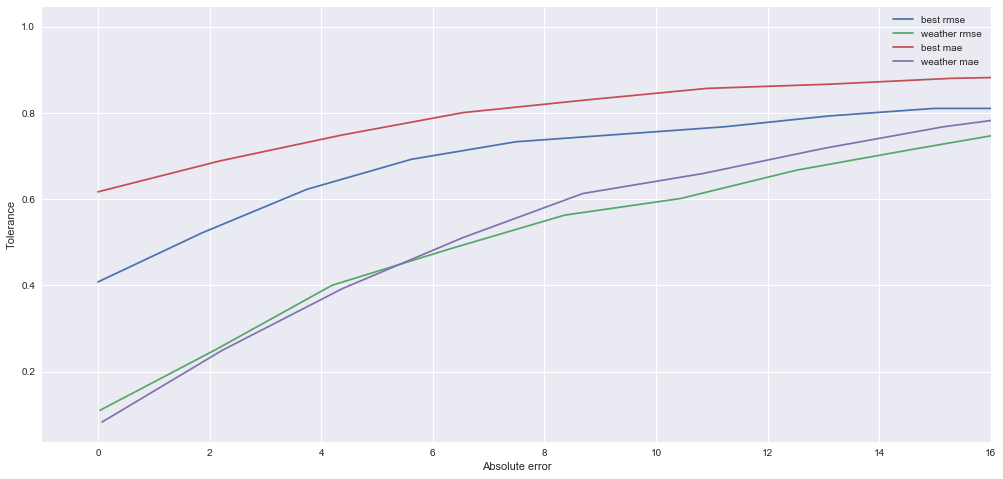

In [183]:

fig = plt.figure(figsize=(17,8))
ax = fig.add_subplot(1,1,1)

plt.plot(base_best_rmse[:-1], cumulative_best_rmse, label='best rmse')
plt.plot(base_weather_rmse[:-1], cumulative_weather_rmse, label='weather rmse')
plt.plot(base_best_mae[:-1], cumulative_best_mae, label='best mae')
plt.plot(base_weather_mae[:-1], cumulative_weather_mae, label='weather mae')

ax.set_xlim(-1,16)
ax.set_xlabel('Absolute error')
ax.set_ylabel('Tolerance')
plt.legend(loc='best')

plt.show()

<a id='featureselectionimp'></a>
## Feature Selection
---

We did our features selection with a brute force strategy, but depending on the application, this approach can be impractical. Therefore, comes the need to do a systematic analysis to help us choose the right features. Statistical tests can be used to select those features that have the strongest relationship with the output variable. The scikit-learn library provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features. Below, we will use chi-square test for select the four best features.

In [191]:
array = firedb.drop(['month','day'], axis=1).values
X = array[:,0:10]
Y = array[:,10]

lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(Y)

test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, encoded)

# summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)

[   299.036     83.273     40.33    8299.994  24665.44     481.685
    521.351   1262.382    221.665   1972.178]


From the code above, we can see that the four best features are: **DMC, DC, RH and rain**.

This combination wasn't found in our brute force test. Therefore, we this this features selection with many possible configurations of the KNN model.

In [192]:
hyper_params = range(1,20)
features = [ 'DMC', 'DC', 'RH', 'rain'  ]

output = 'area'

num_folds = [3, 5, 7, 9, 10, 11, 15, 19, 23]

#open the file in the 'write' mode
file = open('results_selected_features.csv','w')
writer = csv.writer(file) 

db_row = ['HYPER_PARAM', 'FEATURES', 'K_FOLDS', 'OUTPUT', 
          'AVG_RMSE', 'AVG_RMSE_%_AREA', 'STD_RMSE', 'CV_RMSE',
          'AVG_MAE', 'AVG_MAE_%_AREA', 'STD_MAE', 'CV_MAE']

#write the row mounted
writer.writerow(db_row)

#close the file
file.close()

In [193]:
start_time = time()

k = 0
k_total = len(hyper_params) * len(num_folds)

for hp in hyper_params:    
    for fold in num_folds:
        
        k += 1

        kf = KFold(fold, shuffle=True, random_state=1)
        model = KNeighborsRegressor(n_neighbors = hp, algorithm='auto')

        mses = cross_val_score(model, firedb[features],
                               firedb[output], scoring="neg_mean_squared_error", cv=kf)

        rmses = np.sqrt(np.absolute(mses))

        avg_rmse = np.mean(rmses)
        avg_rmse_per_area = avg_rmse / np.mean(firedb[output])

        std_rmse = np.std(rmses)
        cv_rmse = std_rmse / np.mean(firedb[output])

        maes = cross_val_score(model, firedb[features],
                               firedb[output], scoring="neg_mean_absolute_error", cv=kf)

        maes = np.absolute(maes)

        avg_mae = np.mean(maes)
        avg_mae_per_area = avg_mae / np.mean(firedb[output])

        std_mae = np.std(maes)
        cv_mae = std_mae / np.mean(firedb[output])


        db_row = [ hp, ', '.join(features), fold, output, 
                   avg_rmse, avg_rmse_per_area, std_rmse, cv_rmse,
                   avg_mae, avg_mae_per_area, std_mae, cv_mae ]


        #open the file that will act like a database in the 'append' mode
        #which allow us to append a row each time we open it
        file = open('results_selected_features.csv','a')
        writer = csv.writer(file)                        
        #write the row mounted
        writer.writerow(db_row)

        #close the file
        file.close()

end_time = time()
elapsed_time = end_time - start_time
print('Elapsed time: ', elapsed_time)

Elapsed time:  18.506715059280396


In [194]:
results = pd.read_csv('results_selected_features.csv')
results = results[ results['OUTPUT'] == 'area' ]
results.head()

HYPER_PARAM           FEATURES  K_FOLDS OUTPUT   AVG_RMSE  AVG_RMSE_%_AREA  \
0            1  DMC, DC, RH, rain        3   area  92.604746         7.208115   
1            1  DMC, DC, RH, rain        5   area  80.050364         6.230914   
2            1  DMC, DC, RH, rain        7   area  79.053481         6.153320   
3            1  DMC, DC, RH, rain        9   area  79.871493         6.216991   
4            1  DMC, DC, RH, rain       10   area  78.553606         6.114411   

    STD_RMSE   CV_RMSE    AVG_MAE  AVG_MAE_%_AREA    STD_MAE    CV_MAE  
0  11.088319  0.863086  21.516023        1.674752   3.110144  0.242086  
1  42.442920  3.303648  22.243062        1.731343   8.053616  0.626873  
2  51.555997  4.012986  22.931298        1.784913   9.906891  0.771127  
3  43.191967  3.361952  22.428974        1.745814   7.119504  0.554164  
4  52.389179  4.077839  23.198523        1.805713  10.431808  0.811985

In [195]:
mean_weight = 0.5
std_weight = 1-mean_weight

results['SCORE_RMSE'] = mean_weight*results['AVG_RMSE_%_AREA'] + std_weight*results['CV_RMSE']
results['SCORE_MAE'] = mean_weight*results['AVG_MAE_%_AREA'] + std_weight*results['CV_MAE']

results.head()

HYPER_PARAM           FEATURES  K_FOLDS OUTPUT   AVG_RMSE  AVG_RMSE_%_AREA  \
0            1  DMC, DC, RH, rain        3   area  92.604746         7.208115   
1            1  DMC, DC, RH, rain        5   area  80.050364         6.230914   
2            1  DMC, DC, RH, rain        7   area  79.053481         6.153320   
3            1  DMC, DC, RH, rain        9   area  79.871493         6.216991   
4            1  DMC, DC, RH, rain       10   area  78.553606         6.114411   

    STD_RMSE   CV_RMSE    AVG_MAE  AVG_MAE_%_AREA    STD_MAE    CV_MAE  \
0  11.088319  0.863086  21.516023        1.674752   3.110144  0.242086   
1  42.442920  3.303648  22.243062        1.731343   8.053616  0.626873   
2  51.555997  4.012986  22.931298        1.784913   9.906891  0.771127   
3  43.191967  3.361952  22.428974        1.745814   7.119504  0.554164   
4  52.389179  4.077839  23.198523        1.805713  10.431808  0.811985   

   SCORE_RMSE  SCORE_MAE  
0    4.035601   0.958419  
1    4.767281   1.179108  
2    5.083153   1.278020  
3    4.789472   1.149989  
4    5.096125   1.308849

In [196]:
results.sort_values(by='SCORE_RMSE')[:5]

HYPER_PARAM           FEATURES  K_FOLDS OUTPUT   AVG_RMSE  \
108           13  DMC, DC, RH, rain        3   area  55.374900   
117           14  DMC, DC, RH, rain        3   area  55.411278   
126           15  DMC, DC, RH, rain        3   area  55.058510   
135           16  DMC, DC, RH, rain        3   area  54.978875   
144           17  DMC, DC, RH, rain        3   area  54.452058   

     AVG_RMSE_%_AREA   STD_RMSE   CV_RMSE    AVG_MAE  AVG_MAE_%_AREA  \
108         4.310240  31.587890  2.458720  19.455754        1.514386   
117         4.313071  31.753652  2.471623  19.471482        1.515610   
126         4.285613  32.148551  2.502361  19.184795        1.493295   
135         4.279414  32.292899  2.513596  19.114284        1.487807   
144         4.238408  32.870609  2.558564  19.260402        1.499180   

      STD_MAE    CV_MAE  SCORE_RMSE  SCORE_MAE  
108  3.791652  0.295132    3.384480   0.904759  
117  3.820004  0.297339    3.392347   0.906475  
126  4.001722  0.311484    3.393987   0.902389  
135  3.921469  0.305237    3.396505   0.896522  
144  3.820033  0.297342    3.398486   0.898261

In [197]:
results.sort_values(by='SCORE_MAE')[:5]

HYPER_PARAM           FEATURES  K_FOLDS OUTPUT   AVG_RMSE  \
135           16  DMC, DC, RH, rain        3   area  54.978875   
144           17  DMC, DC, RH, rain        3   area  54.452058   
153           18  DMC, DC, RH, rain        3   area  54.325802   
126           15  DMC, DC, RH, rain        3   area  55.058510   
162           19  DMC, DC, RH, rain        3   area  54.343615   

     AVG_RMSE_%_AREA   STD_RMSE   CV_RMSE    AVG_MAE  AVG_MAE_%_AREA  \
135         4.279414  32.292899  2.513596  19.114284        1.487807   
144         4.238408  32.870609  2.558564  19.260402        1.499180   
153         4.228581  33.047614  2.572341  19.165581        1.491799   
126         4.285613  32.148551  2.502361  19.184795        1.493295   
162         4.229967  33.089861  2.575630  19.273527        1.500202   

      STD_MAE    CV_MAE  SCORE_RMSE  SCORE_MAE  
135  3.921469  0.305237    3.396505   0.896522  
144  3.820033  0.297342    3.398486   0.898261  
153  3.948202  0.307318    3.400461   0.899559  
126  4.001722  0.311484    3.393987   0.902389  
162  3.960715  0.308292    3.402798   0.904247

In [198]:
hp = int(results.sort_values(by='SCORE_MAE')[:1]['HYPER_PARAM'])
fold = int(results.sort_values(by='SCORE_MAE')[:1]['K_FOLDS'])
output = results.sort_values(by='SCORE_MAE')[:1]['OUTPUT']

kf = KFold(fold, shuffle=True, random_state=1)
model = KNeighborsRegressor(n_neighbors = hp, algorithm='auto')

predicted = cross_val_predict( model, firedb[features], firedb[output], cv=kf )

abs_error = np.absolute( predicted - firedb[output] )

values, base_four_selected_mae = np.histogram(abs_error, bins=500)
cumulative_four_selected_mae = np.cumsum(values) / len(abs_error)

In [199]:
hyper_params = range(1,20)
features = [ 'DMC', 'DC' ]

output = 'area'

num_folds = [3, 5, 7, 9, 10, 11, 15, 19, 23]

#open the file in the 'write' mode
file = open('results_selected_features.csv','w')
writer = csv.writer(file) 

db_row = ['HYPER_PARAM', 'FEATURES', 'K_FOLDS', 'OUTPUT', 
          'AVG_RMSE', 'AVG_RMSE_%_AREA', 'STD_RMSE', 'CV_RMSE',
          'AVG_MAE', 'AVG_MAE_%_AREA', 'STD_MAE', 'CV_MAE']

#write the row mounted
writer.writerow(db_row)

#close the file
file.close()

In [200]:
start_time = time()

k = 0
k_total = len(hyper_params) * len(num_folds)

for hp in hyper_params:    
    for fold in num_folds:
        
        k += 1

        kf = KFold(fold, shuffle=True, random_state=1)
        model = KNeighborsRegressor(n_neighbors = hp, algorithm='auto')

        mses = cross_val_score(model, firedb[features],
                               firedb[output], scoring="neg_mean_squared_error", cv=kf)

        rmses = np.sqrt(np.absolute(mses))

        avg_rmse = np.mean(rmses)
        avg_rmse_per_area = avg_rmse / np.mean(firedb[output])

        std_rmse = np.std(rmses)
        cv_rmse = std_rmse / np.mean(firedb[output])

        maes = cross_val_score(model, firedb[features],
                               firedb[output], scoring="neg_mean_absolute_error", cv=kf)

        maes = np.absolute(maes)

        avg_mae = np.mean(maes)
        avg_mae_per_area = avg_mae / np.mean(firedb[output])

        std_mae = np.std(maes)
        cv_mae = std_mae / np.mean(firedb[output])


        db_row = [ hp, ', '.join(features), fold, output, 
                   avg_rmse, avg_rmse_per_area, std_rmse, cv_rmse,
                   avg_mae, avg_mae_per_area, std_mae, cv_mae ]


        #open the file that will act like a database in the 'append' mode
        #which allow us to append a row each time we open it
        file = open('results_selected_features.csv','a')
        writer = csv.writer(file)                        
        #write the row mounted
        writer.writerow(db_row)

        #close the file
        file.close()

end_time = time()
elapsed_time = end_time - start_time
print('Elapsed time: ', elapsed_time)

Elapsed time:  15.310619831085205


In [201]:
results = pd.read_csv('results_selected_features.csv')
results = results[ results['OUTPUT'] == 'area' ]
results.head()

HYPER_PARAM FEATURES  K_FOLDS OUTPUT   AVG_RMSE  AVG_RMSE_%_AREA  \
0            1  DMC, DC        3   area  57.345568         4.463631   
1            1  DMC, DC        5   area  55.270504         4.302114   
2            1  DMC, DC        7   area  70.233253         5.466776   
3            1  DMC, DC        9   area  82.446772         6.417445   
4            1  DMC, DC       10   area  77.884809         6.062353   

    STD_RMSE   CV_RMSE    AVG_MAE  AVG_MAE_%_AREA    STD_MAE    CV_MAE  
0  30.024723  2.337047  20.175043        1.570373   7.365893  0.573342  
1  27.920305  2.173245  16.727721        1.302043   4.271207  0.332460  
2  51.941996  4.043031  21.596262        1.680997  12.723023  0.990327  
3  45.154161  3.514684  22.528295        1.753544   8.753559  0.681355  
4  46.146695  3.591940  21.673456        1.687006   8.660448  0.674107

In [202]:
mean_weight = 0.5
std_weight = 1-mean_weight

results['SCORE_RMSE'] = mean_weight*results['AVG_RMSE_%_AREA'] + std_weight*results['CV_RMSE']
results['SCORE_MAE'] = mean_weight*results['AVG_MAE_%_AREA'] + std_weight*results['CV_MAE']

results.head()

HYPER_PARAM FEATURES  K_FOLDS OUTPUT   AVG_RMSE  AVG_RMSE_%_AREA  \
0            1  DMC, DC        3   area  57.345568         4.463631   
1            1  DMC, DC        5   area  55.270504         4.302114   
2            1  DMC, DC        7   area  70.233253         5.466776   
3            1  DMC, DC        9   area  82.446772         6.417445   
4            1  DMC, DC       10   area  77.884809         6.062353   

    STD_RMSE   CV_RMSE    AVG_MAE  AVG_MAE_%_AREA    STD_MAE    CV_MAE  \
0  30.024723  2.337047  20.175043        1.570373   7.365893  0.573342   
1  27.920305  2.173245  16.727721        1.302043   4.271207  0.332460   
2  51.941996  4.043031  21.596262        1.680997  12.723023  0.990327   
3  45.154161  3.514684  22.528295        1.753544   8.753559  0.681355   
4  46.146695  3.591940  21.673456        1.687006   8.660448  0.674107   

   SCORE_RMSE  SCORE_MAE  
0    3.400339   1.071858  
1    3.237679   0.817251  
2    4.754904   1.335662  
3    4.966064   1.217450  
4    4.827147   1.180557

In [203]:
results.sort_values(by='SCORE_RMSE')[:5]

HYPER_PARAM FEATURES  K_FOLDS OUTPUT   AVG_RMSE  AVG_RMSE_%_AREA  \
1             1  DMC, DC        5   area  55.270504         4.302114   
54            7  DMC, DC        3   area  56.632116         4.408098   
5             1  DMC, DC       11   area  49.765413         3.873612   
0             1  DMC, DC        3   area  57.345568         4.463631   
45            6  DMC, DC        3   area  57.489219         4.474813   

     STD_RMSE   CV_RMSE    AVG_MAE  AVG_MAE_%_AREA   STD_MAE    CV_MAE  \
1   27.920305  2.173245  16.727721        1.302043  4.271207  0.332460   
54  30.331181  2.360901  19.311306        1.503142  4.259153  0.331522   
5   37.313697  2.904402  17.044507        1.326701  7.271597  0.566002   
0   30.024723  2.337047  20.175043        1.570373  7.365893  0.573342   
45  29.945633  2.330891  19.179409        1.492876  3.942509  0.306875   

    SCORE_RMSE  SCORE_MAE  
1     3.237679   0.817251  
54    3.384500   0.917332  
5     3.389007   0.946351  
0     3.400339   1.071858  
45    3.402852   0.899875

In [204]:
results.sort_values(by='SCORE_MAE')[:5]

HYPER_PARAM FEATURES  K_FOLDS OUTPUT   AVG_RMSE  AVG_RMSE_%_AREA  \
1             1  DMC, DC        5   area  55.270504         4.302114   
81           10  DMC, DC        3   area  55.581806         4.326345   
36            5  DMC, DC        3   area  59.380679         4.622039   
63            8  DMC, DC        3   area  56.954915         4.433224   
45            6  DMC, DC        3   area  57.489219         4.474813   

     STD_RMSE   CV_RMSE    AVG_MAE  AVG_MAE_%_AREA   STD_MAE    CV_MAE  \
1   27.920305  2.173245  16.727721        1.302043  4.271207  0.332460   
81  32.013777  2.491870  18.986017        1.477823  3.760719  0.292725   
36  28.391215  2.209899  19.255916        1.498831  3.519671  0.273962   
63  30.613526  2.382878  19.114145        1.487796  3.926034  0.305592   
45  29.945633  2.330891  19.179409        1.492876  3.942509  0.306875   

    SCORE_RMSE  SCORE_MAE  
1     3.237679   0.817251  
81    3.409107   0.885274  
36    3.415969   0.886397  
63    3.408051   0.896694  
45    3.402852   0.899875

In [205]:
hp = int(results.sort_values(by='SCORE_MAE')[:1]['HYPER_PARAM'])
fold = int(results.sort_values(by='SCORE_MAE')[:1]['K_FOLDS'])
output = results.sort_values(by='SCORE_MAE')[:1]['OUTPUT']

kf = KFold(fold, shuffle=True, random_state=1)
model = KNeighborsRegressor(n_neighbors = hp, algorithm='auto')

predicted = cross_val_predict( model, firedb[features], firedb[output], cv=kf )

abs_error = np.absolute( predicted - firedb[output] )

values, base_two_selected_mae = np.histogram(abs_error, bins=500)
cumulative_two_selected_mae = np.cumsum(values) / len(abs_error)


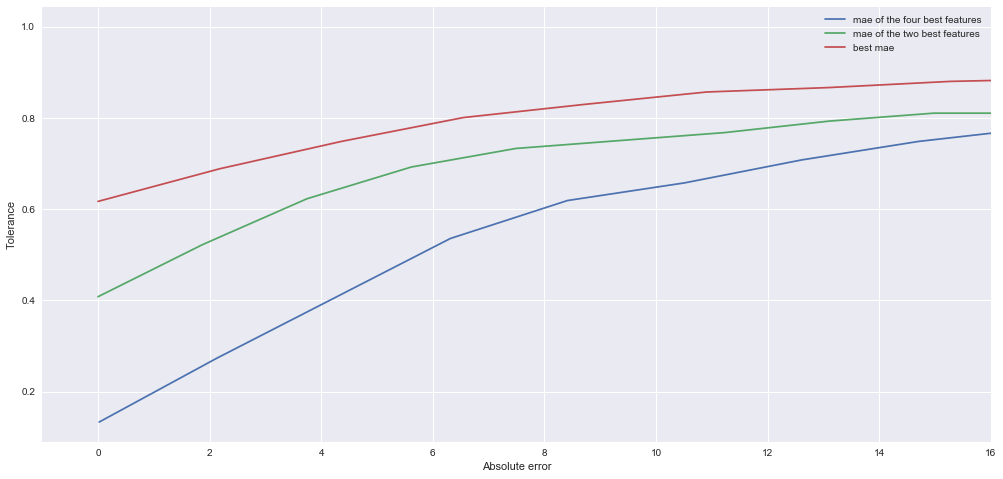

In [207]:
fig = plt.figure(figsize=(17,8))
ax = fig.add_subplot(1,1,1)

plt.plot(base_four_selected_mae[:-1], cumulative_four_selected_mae, label='mae of the four best features')
plt.plot(base_two_selected_mae[:-1], cumulative_two_selected_mae, label='mae of the two best features')
plt.plot(base_best_mae[:-1], cumulative_best_mae, label='best mae')

ax.set_xlim(-1,16)
ax.set_xlabel('Absolute error')
ax.set_ylabel('Tolerance')
plt.legend(loc='best')

plt.show()

<a id='results'></a>
## Results and comparitions 
---
<div style="text-align:justify">
The results achieved in this notebook is similar to the one found in [1](#references), in some ways, we achieve a even better result, if we take into consideration the RMSE. But the most impressive is the simplicity of the best model found which is composed by only one feature (rain) and only 1 (one) nearest neighborhood. This result was given by a 5-fold cross validation and 68,85% of the points are with error below 2 ha. 
</div>

|                                               | Our model | Benchmark      |
|-----------------------------------------------|-----------|----------------|
| **Percentage of points with error below 2ha** | 68,85%    | 61,00%         |
| **Best MAE**                                  | 12,82     | 12,71 (SVM)    |
| **Best RMSE**                                 | 55,27     | 63,70 (Naive)  |

<div style="text-align:justify">
In the reference paper the author explores Neural Nets, SVM, Random Forest, Naive, Multiple Regression and Decision Trees as predictors exploring four distinct models for each prediction algorithm. We had a good surprise when the experiment showed us that K-NN could make predictions as good as in the reference paper, as shown in the above table. Important to notice is that the feature in our model, rain, is easily measured and utilized in a specialist system to predict fires area in the forest. The feature 'RAIN' is also a common sense, from a long time ago, that in a humidy land is harder to spread fire.

Therefore, we can conclude that, despite the simplicity of the K-NN model, its possible to achieve very good results in regression problemns, which is done with a reasonable computation cost.
</div>


<a id='references'></a>
## References
---

1. P. Cortez and A. Morais. A Data Mining Approach to Predict Forest Fires using Meteorological Data. In J. Neves, M. F. Santos and J. Machado Eds., New Trends in Artificial Intelligence, Proceedings of the 13th EPIA 2007 - Portuguese Conference on Artificial Intelligence, December, Guimaraes, Portugal, pp. 512-523, 2007. APPIA, ISBN-13 978-989-95618-0-9. Available at: http://www.dsi.uminho.pt/~pcortez/fires.pdf
2. http://cwfis.cfs.nrcan.gc.ca/background/summary/fwi
3. https://www.nytimes.com/2017/10/16/world/europe/portugal-spain-fires.html
4. http://www.bbc.com/news/in-pictures-40317711
5. https://www.firescience.gov/projects/09-1-10-3/project/09-1-10-3_final_report.pdf
